In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

/home/raflicky/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [90]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [91]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [92]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [163]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [165]:
eur_usd, usd_mxn = import_some_files()

In [166]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [168]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [169]:
my_data_frame = all_variables.drop(['Date'], axis=1)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [150]:
#my_data_frame.to_csv("theXs")
#my_data_frame_sum.to_csv("theYs")

In [170]:
working_data = my_data_frame.iloc[0:2000]
working_data_sum = my_data_frame_sum.iloc[0:2000]
validate_data = my_data_frame.iloc[2000:]
validate_data_sum = my_data_frame_sum.iloc[2000:]

In [174]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [175]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [181]:
trainingX, trainingY = next_batch2(my_x, my_y, 37)
testingX, testingY = next_batch2(my_x, my_y, 37)

In [182]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 37)

In [183]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [184]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 1999 samples, validate on 1999 samples
Epoch 1/30000
 - 3s - loss: 1839.0583 - val_loss: 1835.1861
Epoch 2/30000
 - 1s - loss: 1831.4205 - val_loss: 1827.6014
Epoch 3/30000
 - 1s - loss: 1823.8385 - val_loss: 1820.0263
Epoch 4/30000
 - 1s - loss: 1816.2671 - val_loss: 1812.4709
Epoch 5/30000
 - 1s - loss: 1808.7134 - val_loss: 1804.9190
Epoch 6/30000
 - 1s - loss: 1801.1644 - val_loss: 1797.3736
Epoch 7/30000
 - 1s - loss: 1793.6191 - val_loss: 1789.8282
Epoch 8/30000
 - 1s - loss: 1786.0737 - val_loss: 1782.2828
Epoch 9/30000
 - 1s - loss: 1778.5283 - val_loss: 1774.7374
Epoch 10/30000
 - 1s - loss: 1770.9829 - val_loss: 1767.1920
Epoch 11/30000
 - 1s - loss: 1763.4375 - val_loss: 1759.6467
Epoch 12/30000
 - 1s - loss: 1755.8921 - val_loss: 1752.1013
Epoch 13/30000
 - 1s - loss: 1748.3467 - val_loss: 1744.5559
Epoch 14/30000
 - 1s - loss: 1740.8013 - val_loss: 1737.0104
Epoch 15/30000
 - 1s - loss: 1733.2559 - val_loss: 1729.4651
Epoch 16/30000
 - 1s - loss: 1725.7105 - val_l

Epoch 135/30000
 - 1s - loss: 943.8547 - val_loss: 941.4441
Epoch 136/30000
 - 1s - loss: 939.0687 - val_loss: 936.6661
Epoch 137/30000
 - 1s - loss: 934.3004 - val_loss: 931.9065
Epoch 138/30000
 - 1s - loss: 929.5542 - val_loss: 927.1870
Epoch 139/30000
 - 1s - loss: 924.8606 - val_loss: 922.5065
Epoch 140/30000
 - 1s - loss: 920.1799 - val_loss: 917.8290
Epoch 141/30000
 - 1s - loss: 915.5153 - val_loss: 913.1770
Epoch 142/30000
 - 1s - loss: 910.8645 - val_loss: 908.5380
Epoch 143/30000
 - 1s - loss: 906.2452 - val_loss: 903.9415
Epoch 144/30000
 - 1s - loss: 901.6680 - val_loss: 899.3864
Epoch 145/30000
 - 1s - loss: 897.1200 - val_loss: 894.8785
Epoch 146/30000
 - 1s - loss: 892.6614 - val_loss: 890.4359
Epoch 147/30000
 - 1s - loss: 888.2187 - val_loss: 885.9978
Epoch 148/30000
 - 1s - loss: 883.7847 - val_loss: 881.5966
Epoch 149/30000
 - 1s - loss: 879.4084 - val_loss: 877.2420
Epoch 150/30000
 - 1s - loss: 875.0677 - val_loss: 872.9297
Epoch 151/30000
 - 1s - loss: 870.7779 -

Epoch 272/30000
 - 1s - loss: 629.1960 - val_loss: 628.9192
Epoch 273/30000
 - 1s - loss: 628.6219 - val_loss: 628.3535
Epoch 274/30000
 - 1s - loss: 628.0554 - val_loss: 627.7914
Epoch 275/30000
 - 1s - loss: 627.4985 - val_loss: 627.2317
Epoch 276/30000
 - 1s - loss: 626.9387 - val_loss: 626.6719
Epoch 277/30000
 - 1s - loss: 626.3790 - val_loss: 626.1123
Epoch 278/30000
 - 1s - loss: 625.8193 - val_loss: 625.5548
Epoch 279/30000
 - 1s - loss: 625.2595 - val_loss: 624.9980
Epoch 280/30000
 - 1s - loss: 624.7058 - val_loss: 624.4482
Epoch 281/30000
 - 1s - loss: 624.1540 - val_loss: 623.9006
Epoch 282/30000
 - 1s - loss: 623.6145 - val_loss: 623.3570
Epoch 283/30000
 - 1s - loss: 623.0709 - val_loss: 622.8133
Epoch 284/30000
 - 1s - loss: 622.5273 - val_loss: 622.2698
Epoch 285/30000
 - 1s - loss: 621.9837 - val_loss: 621.7261
Epoch 286/30000
 - 1s - loss: 621.4401 - val_loss: 621.1845
Epoch 287/30000
 - 1s - loss: 620.8965 - val_loss: 620.6430
Epoch 288/30000
 - 1s - loss: 620.3600 -

Epoch 409/30000
 - 1s - loss: 564.7024 - val_loss: 564.5635
Epoch 410/30000
 - 1s - loss: 564.3563 - val_loss: 564.2175
Epoch 411/30000
 - 1s - loss: 564.0103 - val_loss: 563.8714
Epoch 412/30000
 - 1s - loss: 563.6642 - val_loss: 563.5253
Epoch 413/30000
 - 1s - loss: 563.3181 - val_loss: 563.1793
Epoch 414/30000
 - 1s - loss: 562.9721 - val_loss: 562.8344
Epoch 415/30000
 - 1s - loss: 562.6260 - val_loss: 562.4920
Epoch 416/30000
 - 1s - loss: 562.2842 - val_loss: 562.1506
Epoch 417/30000
 - 1s - loss: 561.9429 - val_loss: 561.8115
Epoch 418/30000
 - 1s - loss: 561.6016 - val_loss: 561.4790
Epoch 419/30000
 - 1s - loss: 561.2637 - val_loss: 561.1477
Epoch 420/30000
 - 1s - loss: 560.9419 - val_loss: 560.8251
Epoch 421/30000
 - 1s - loss: 560.6147 - val_loss: 560.5041
Epoch 422/30000
 - 1s - loss: 560.3025 - val_loss: 560.1901
Epoch 423/30000
 - 1s - loss: 559.9858 - val_loss: 559.8792
Epoch 424/30000
 - 1s - loss: 559.6785 - val_loss: 559.5742
Epoch 425/30000
 - 1s - loss: 559.3728 -

Epoch 546/30000
 - 1s - loss: 356.2673 - val_loss: 540.0371
Epoch 547/30000
 - 1s - loss: 360.7245 - val_loss: 535.6654
Epoch 548/30000
 - 1s - loss: 339.4272 - val_loss: 535.5101
Epoch 549/30000
 - 1s - loss: 335.3947 - val_loss: 523.2550
Epoch 550/30000
 - 1s - loss: 336.3029 - val_loss: 529.7155
Epoch 551/30000
 - 1s - loss: 330.5919 - val_loss: 531.8695
Epoch 552/30000
 - 1s - loss: 334.0842 - val_loss: 509.2881
Epoch 553/30000
 - 1s - loss: 326.4710 - val_loss: 484.8931
Epoch 554/30000
 - 1s - loss: 321.8566 - val_loss: 512.5936
Epoch 555/30000
 - 1s - loss: 319.5808 - val_loss: 486.6220
Epoch 556/30000
 - 1s - loss: 320.9911 - val_loss: 493.8648
Epoch 557/30000
 - 1s - loss: 316.1300 - val_loss: 481.3918
Epoch 558/30000
 - 1s - loss: 313.9833 - val_loss: 482.8790
Epoch 559/30000
 - 1s - loss: 306.5619 - val_loss: 469.5234
Epoch 560/30000
 - 1s - loss: 299.4269 - val_loss: 462.3620
Epoch 561/30000
 - 1s - loss: 304.2786 - val_loss: 452.4180
Epoch 562/30000
 - 1s - loss: 298.8375 -

Epoch 683/30000
 - 1s - loss: 206.3588 - val_loss: 226.2051
Epoch 684/30000
 - 1s - loss: 204.5642 - val_loss: 229.4554
Epoch 685/30000
 - 1s - loss: 203.9867 - val_loss: 229.1024
Epoch 686/30000
 - 1s - loss: 211.0900 - val_loss: 241.9412
Epoch 687/30000
 - 1s - loss: 222.0343 - val_loss: 229.4656
Epoch 688/30000
 - 1s - loss: 217.7489 - val_loss: 234.7699
Epoch 689/30000
 - 1s - loss: 208.7159 - val_loss: 233.8768
Epoch 690/30000
 - 1s - loss: 205.5749 - val_loss: 219.6665
Epoch 691/30000
 - 1s - loss: 201.5363 - val_loss: 223.2417
Epoch 692/30000
 - 1s - loss: 208.8389 - val_loss: 232.4188
Epoch 693/30000
 - 1s - loss: 206.5235 - val_loss: 220.1219
Epoch 694/30000
 - 1s - loss: 206.4818 - val_loss: 227.5438
Epoch 695/30000
 - 1s - loss: 207.6518 - val_loss: 213.1978
Epoch 696/30000
 - 1s - loss: 206.3863 - val_loss: 226.4209
Epoch 697/30000
 - 1s - loss: 212.6702 - val_loss: 242.2635
Epoch 698/30000
 - 1s - loss: 212.6553 - val_loss: 229.7223
Epoch 699/30000
 - 1s - loss: 208.6848 -

Epoch 820/30000
 - 1s - loss: 197.2574 - val_loss: 206.3740
Epoch 821/30000
 - 1s - loss: 196.2219 - val_loss: 210.2279
Epoch 822/30000
 - 1s - loss: 189.5739 - val_loss: 200.0411
Epoch 823/30000
 - 1s - loss: 196.2320 - val_loss: 209.5476
Epoch 824/30000
 - 1s - loss: 183.9543 - val_loss: 218.2165
Epoch 825/30000
 - 1s - loss: 195.0957 - val_loss: 199.8908
Epoch 826/30000
 - 1s - loss: 198.4642 - val_loss: 212.7776
Epoch 827/30000
 - 1s - loss: 200.2406 - val_loss: 208.1202
Epoch 828/30000
 - 1s - loss: 192.3324 - val_loss: 214.8980
Epoch 829/30000
 - 1s - loss: 187.9502 - val_loss: 199.4448
Epoch 830/30000
 - 1s - loss: 200.1354 - val_loss: 211.5793
Epoch 831/30000
 - 1s - loss: 198.0992 - val_loss: 193.0389
Epoch 832/30000
 - 1s - loss: 195.9345 - val_loss: 213.5619
Epoch 833/30000
 - 1s - loss: 186.9012 - val_loss: 211.4404
Epoch 834/30000
 - 1s - loss: 195.2647 - val_loss: 193.3252
Epoch 835/30000
 - 1s - loss: 188.3828 - val_loss: 205.1536
Epoch 836/30000
 - 1s - loss: 185.0840 -

Epoch 957/30000
 - 1s - loss: 196.2577 - val_loss: 193.8215
Epoch 958/30000
 - 1s - loss: 184.1199 - val_loss: 193.3609
Epoch 959/30000
 - 1s - loss: 191.0970 - val_loss: 184.1037
Epoch 960/30000
 - 1s - loss: 189.6595 - val_loss: 191.2875
Epoch 961/30000
 - 1s - loss: 189.1487 - val_loss: 182.8579
Epoch 962/30000
 - 1s - loss: 198.4654 - val_loss: 200.1914
Epoch 963/30000
 - 1s - loss: 196.2732 - val_loss: 184.2909
Epoch 964/30000
 - 1s - loss: 196.1745 - val_loss: 197.9789
Epoch 965/30000
 - 1s - loss: 187.2200 - val_loss: 198.5759
Epoch 966/30000
 - 1s - loss: 189.4361 - val_loss: 198.0202
Epoch 967/30000
 - 1s - loss: 195.0668 - val_loss: 194.0781
Epoch 968/30000
 - 1s - loss: 189.6497 - val_loss: 206.6393
Epoch 969/30000
 - 1s - loss: 197.1465 - val_loss: 210.3848
Epoch 970/30000
 - 1s - loss: 196.5831 - val_loss: 197.7173
Epoch 971/30000
 - 1s - loss: 195.7429 - val_loss: 195.3146
Epoch 972/30000
 - 1s - loss: 188.1969 - val_loss: 225.7160
Epoch 973/30000
 - 1s - loss: 194.5182 -

 - 1s - loss: 182.2165 - val_loss: 187.5850
Epoch 1093/30000
 - 1s - loss: 174.3773 - val_loss: 176.7306
Epoch 1094/30000
 - 1s - loss: 180.9219 - val_loss: 175.2975
Epoch 1095/30000
 - 1s - loss: 187.2895 - val_loss: 168.0805
Epoch 1096/30000
 - 1s - loss: 173.4565 - val_loss: 183.3449
Epoch 1097/30000
 - 1s - loss: 175.7412 - val_loss: 196.5044
Epoch 1098/30000
 - 1s - loss: 186.6641 - val_loss: 176.0419
Epoch 1099/30000
 - 1s - loss: 182.5101 - val_loss: 199.0327
Epoch 1100/30000
 - 1s - loss: 178.1461 - val_loss: 176.4975
Epoch 1101/30000
 - 1s - loss: 181.9721 - val_loss: 183.5389
Epoch 1102/30000
 - 1s - loss: 187.7942 - val_loss: 191.3974
Epoch 1103/30000
 - 1s - loss: 174.7186 - val_loss: 181.2231
Epoch 1104/30000
 - 1s - loss: 175.5257 - val_loss: 165.3604
Epoch 1105/30000
 - 1s - loss: 190.2742 - val_loss: 187.5804
Epoch 1106/30000
 - 1s - loss: 179.4234 - val_loss: 199.2797
Epoch 1107/30000
 - 1s - loss: 179.5433 - val_loss: 179.8105
Epoch 1108/30000
 - 1s - loss: 178.0685 -

Epoch 1227/30000
 - 1s - loss: 177.4073 - val_loss: 176.6811
Epoch 1228/30000
 - 1s - loss: 174.0313 - val_loss: 181.2150
Epoch 1229/30000
 - 1s - loss: 181.6867 - val_loss: 177.0598
Epoch 1230/30000
 - 1s - loss: 185.9053 - val_loss: 174.9271
Epoch 1231/30000
 - 1s - loss: 180.6275 - val_loss: 186.6308
Epoch 1232/30000
 - 1s - loss: 179.1363 - val_loss: 184.1606
Epoch 1233/30000
 - 1s - loss: 182.0885 - val_loss: 156.7458
Epoch 1234/30000
 - 1s - loss: 169.3123 - val_loss: 168.4129
Epoch 1235/30000
 - 1s - loss: 166.7353 - val_loss: 178.5733
Epoch 1236/30000
 - 1s - loss: 182.5952 - val_loss: 176.9600
Epoch 1237/30000
 - 1s - loss: 187.5016 - val_loss: 188.7341
Epoch 1238/30000
 - 1s - loss: 182.9832 - val_loss: 202.0474
Epoch 1239/30000
 - 1s - loss: 170.6731 - val_loss: 175.7276
Epoch 1240/30000
 - 1s - loss: 171.2280 - val_loss: 175.7491
Epoch 1241/30000
 - 1s - loss: 173.8096 - val_loss: 194.6394
Epoch 1242/30000
 - 1s - loss: 178.5347 - val_loss: 165.2989
Epoch 1243/30000
 - 1s -

Epoch 1362/30000
 - 1s - loss: 161.0785 - val_loss: 148.2431
Epoch 1363/30000
 - 1s - loss: 165.0113 - val_loss: 165.8831
Epoch 1364/30000
 - 1s - loss: 164.3906 - val_loss: 156.7081
Epoch 1365/30000
 - 1s - loss: 164.0710 - val_loss: 155.5877
Epoch 1366/30000
 - 1s - loss: 160.8913 - val_loss: 153.3020
Epoch 1367/30000
 - 1s - loss: 169.6335 - val_loss: 149.2716
Epoch 1368/30000
 - 1s - loss: 169.3676 - val_loss: 160.6553
Epoch 1369/30000
 - 1s - loss: 170.9098 - val_loss: 152.2478
Epoch 1370/30000
 - 1s - loss: 168.2160 - val_loss: 154.1440
Epoch 1371/30000
 - 1s - loss: 170.1817 - val_loss: 169.3526
Epoch 1372/30000
 - 1s - loss: 177.2882 - val_loss: 171.9302
Epoch 1373/30000
 - 1s - loss: 165.1124 - val_loss: 156.7477
Epoch 1374/30000
 - 1s - loss: 169.2254 - val_loss: 150.4187
Epoch 1375/30000
 - 1s - loss: 170.5899 - val_loss: 154.1702
Epoch 1376/30000
 - 1s - loss: 173.1628 - val_loss: 160.1444
Epoch 1377/30000
 - 1s - loss: 164.7090 - val_loss: 165.1201
Epoch 1378/30000
 - 1s -

Epoch 1497/30000
 - 1s - loss: 158.0881 - val_loss: 138.1989
Epoch 1498/30000
 - 1s - loss: 162.3527 - val_loss: 160.7393
Epoch 1499/30000
 - 1s - loss: 156.2792 - val_loss: 147.7248
Epoch 1500/30000
 - 1s - loss: 158.6414 - val_loss: 148.3710
Epoch 1501/30000
 - 1s - loss: 163.5863 - val_loss: 152.3564
Epoch 1502/30000
 - 1s - loss: 164.9294 - val_loss: 143.8303
Epoch 1503/30000
 - 1s - loss: 164.2524 - val_loss: 149.9481
Epoch 1504/30000
 - 1s - loss: 156.8120 - val_loss: 155.0964
Epoch 1505/30000
 - 1s - loss: 166.7607 - val_loss: 147.8088
Epoch 1506/30000
 - 1s - loss: 157.5826 - val_loss: 155.1770
Epoch 1507/30000
 - 1s - loss: 166.4351 - val_loss: 156.2352
Epoch 1508/30000
 - 1s - loss: 161.2128 - val_loss: 150.4551
Epoch 1509/30000
 - 1s - loss: 159.0320 - val_loss: 146.8423
Epoch 1510/30000
 - 1s - loss: 167.1486 - val_loss: 142.5954
Epoch 1511/30000
 - 1s - loss: 158.2113 - val_loss: 150.8911
Epoch 1512/30000
 - 1s - loss: 170.6887 - val_loss: 172.8953
Epoch 1513/30000
 - 1s -

Epoch 1632/30000
 - 1s - loss: 165.9924 - val_loss: 149.0565
Epoch 1633/30000
 - 1s - loss: 161.5398 - val_loss: 152.4054
Epoch 1634/30000
 - 1s - loss: 170.5862 - val_loss: 141.6690
Epoch 1635/30000
 - 1s - loss: 173.0909 - val_loss: 144.8593
Epoch 1636/30000
 - 1s - loss: 158.8561 - val_loss: 139.3352
Epoch 1637/30000
 - 1s - loss: 160.8109 - val_loss: 144.7030
Epoch 1638/30000
 - 1s - loss: 166.4237 - val_loss: 144.9710
Epoch 1639/30000
 - 1s - loss: 170.6003 - val_loss: 153.2806
Epoch 1640/30000
 - 1s - loss: 174.0485 - val_loss: 142.4670
Epoch 1641/30000
 - 1s - loss: 163.6375 - val_loss: 149.2251
Epoch 1642/30000
 - 1s - loss: 164.8929 - val_loss: 142.3963
Epoch 1643/30000
 - 1s - loss: 159.2239 - val_loss: 158.6031
Epoch 1644/30000
 - 1s - loss: 168.5761 - val_loss: 143.9774
Epoch 1645/30000
 - 1s - loss: 177.3484 - val_loss: 147.9748
Epoch 1646/30000
 - 1s - loss: 172.9336 - val_loss: 142.5645
Epoch 1647/30000
 - 1s - loss: 153.6618 - val_loss: 149.4877
Epoch 1648/30000
 - 1s -

Epoch 1767/30000
 - 1s - loss: 164.8826 - val_loss: 136.9516
Epoch 1768/30000
 - 1s - loss: 161.4151 - val_loss: 138.9214
Epoch 1769/30000
 - 1s - loss: 158.3391 - val_loss: 159.7616
Epoch 1770/30000
 - 1s - loss: 161.7951 - val_loss: 149.6705
Epoch 1771/30000
 - 1s - loss: 160.8502 - val_loss: 144.0131
Epoch 1772/30000
 - 1s - loss: 165.5267 - val_loss: 149.0088
Epoch 1773/30000
 - 1s - loss: 167.4578 - val_loss: 149.9022
Epoch 1774/30000
 - 1s - loss: 161.8665 - val_loss: 137.0806
Epoch 1775/30000
 - 1s - loss: 164.2161 - val_loss: 138.5660
Epoch 1776/30000
 - 1s - loss: 165.5141 - val_loss: 144.3627
Epoch 1777/30000
 - 1s - loss: 166.2354 - val_loss: 135.2319
Epoch 1778/30000
 - 1s - loss: 167.5974 - val_loss: 155.0284
Epoch 1779/30000
 - 1s - loss: 162.4308 - val_loss: 147.9546
Epoch 1780/30000
 - 1s - loss: 167.6190 - val_loss: 143.6771
Epoch 1781/30000
 - 1s - loss: 161.2302 - val_loss: 142.2640
Epoch 1782/30000
 - 1s - loss: 161.1511 - val_loss: 144.3516
Epoch 1783/30000
 - 1s -

Epoch 1902/30000
 - 1s - loss: 166.9870 - val_loss: 142.5447
Epoch 1903/30000
 - 1s - loss: 161.1465 - val_loss: 144.2062
Epoch 1904/30000
 - 1s - loss: 168.7508 - val_loss: 131.6916
Epoch 1905/30000
 - 1s - loss: 177.7453 - val_loss: 163.6172
Epoch 1906/30000
 - 1s - loss: 168.1258 - val_loss: 136.2845
Epoch 1907/30000
 - 1s - loss: 168.6783 - val_loss: 149.7323
Epoch 1908/30000
 - 1s - loss: 165.5240 - val_loss: 142.0605
Epoch 1909/30000
 - 1s - loss: 163.3709 - val_loss: 144.9976
Epoch 1910/30000
 - 1s - loss: 166.4637 - val_loss: 132.9361
Epoch 1911/30000
 - 1s - loss: 156.7229 - val_loss: 135.5946
Epoch 1912/30000
 - 1s - loss: 156.6448 - val_loss: 139.9753
Epoch 1913/30000
 - 1s - loss: 169.7250 - val_loss: 136.1946
Epoch 1914/30000
 - 1s - loss: 167.1963 - val_loss: 138.7543
Epoch 1915/30000
 - 1s - loss: 169.5893 - val_loss: 133.9718
Epoch 1916/30000
 - 1s - loss: 164.0682 - val_loss: 141.7143
Epoch 1917/30000
 - 1s - loss: 164.6206 - val_loss: 145.6908
Epoch 1918/30000
 - 1s -

Epoch 2037/30000
 - 1s - loss: 164.2191 - val_loss: 150.0022
Epoch 2038/30000
 - 1s - loss: 155.5510 - val_loss: 138.4779
Epoch 2039/30000
 - 1s - loss: 153.2121 - val_loss: 140.4858
Epoch 2040/30000
 - 1s - loss: 158.2601 - val_loss: 141.0752
Epoch 2041/30000
 - 1s - loss: 154.7491 - val_loss: 138.0943
Epoch 2042/30000
 - 1s - loss: 160.6223 - val_loss: 139.1959
Epoch 2043/30000
 - 1s - loss: 158.9049 - val_loss: 147.2609
Epoch 2044/30000
 - 1s - loss: 161.6065 - val_loss: 150.4175
Epoch 2045/30000
 - 1s - loss: 163.2820 - val_loss: 140.0296
Epoch 2046/30000
 - 1s - loss: 158.8966 - val_loss: 137.0999
Epoch 2047/30000
 - 1s - loss: 157.8585 - val_loss: 137.1506
Epoch 2048/30000
 - 1s - loss: 155.9511 - val_loss: 141.1775
Epoch 2049/30000
 - 1s - loss: 157.3615 - val_loss: 135.4175
Epoch 2050/30000
 - 1s - loss: 169.0164 - val_loss: 134.4098
Epoch 2051/30000
 - 1s - loss: 156.3449 - val_loss: 141.9899
Epoch 2052/30000
 - 1s - loss: 165.2555 - val_loss: 147.3450
Epoch 2053/30000
 - 1s -

Epoch 2172/30000
 - 1s - loss: 163.4629 - val_loss: 141.9722
Epoch 2173/30000
 - 1s - loss: 153.6610 - val_loss: 140.7103
Epoch 2174/30000
 - 1s - loss: 167.3162 - val_loss: 142.5860
Epoch 2175/30000
 - 1s - loss: 159.9561 - val_loss: 144.3235
Epoch 2176/30000
 - 1s - loss: 161.4570 - val_loss: 140.9904
Epoch 2177/30000
 - 1s - loss: 161.3648 - val_loss: 141.5766
Epoch 2178/30000
 - 1s - loss: 152.6094 - val_loss: 135.5325
Epoch 2179/30000
 - 1s - loss: 149.1553 - val_loss: 132.8494
Epoch 2180/30000
 - 1s - loss: 158.2271 - val_loss: 134.2180
Epoch 2181/30000
 - 1s - loss: 154.6057 - val_loss: 133.5617
Epoch 2182/30000
 - 1s - loss: 154.5515 - val_loss: 154.1414
Epoch 2183/30000
 - 1s - loss: 152.6213 - val_loss: 133.1807
Epoch 2184/30000
 - 1s - loss: 159.1672 - val_loss: 142.4636
Epoch 2185/30000
 - 1s - loss: 160.5225 - val_loss: 138.7712
Epoch 2186/30000
 - 1s - loss: 159.3490 - val_loss: 140.7237
Epoch 2187/30000
 - 1s - loss: 157.2572 - val_loss: 133.5176
Epoch 2188/30000
 - 1s -

Epoch 2307/30000
 - 1s - loss: 159.1435 - val_loss: 130.5603
Epoch 2308/30000
 - 1s - loss: 167.7591 - val_loss: 139.2227
Epoch 2309/30000
 - 1s - loss: 157.7633 - val_loss: 146.0953
Epoch 2310/30000
 - 1s - loss: 165.5359 - val_loss: 140.9675
Epoch 2311/30000
 - 1s - loss: 155.8055 - val_loss: 134.2876
Epoch 2312/30000
 - 1s - loss: 151.7317 - val_loss: 132.9663
Epoch 2313/30000
 - 1s - loss: 160.1326 - val_loss: 145.0085
Epoch 2314/30000
 - 1s - loss: 163.1436 - val_loss: 144.0948
Epoch 2315/30000
 - 1s - loss: 171.0598 - val_loss: 141.0320
Epoch 2316/30000
 - 1s - loss: 166.2614 - val_loss: 137.5145
Epoch 2317/30000
 - 1s - loss: 152.7138 - val_loss: 133.5039
Epoch 2318/30000
 - 1s - loss: 157.3359 - val_loss: 131.5032
Epoch 2319/30000
 - 1s - loss: 153.3909 - val_loss: 142.2985
Epoch 2320/30000
 - 1s - loss: 171.9926 - val_loss: 147.2698
Epoch 2321/30000
 - 1s - loss: 157.4320 - val_loss: 149.7961
Epoch 2322/30000
 - 1s - loss: 173.1867 - val_loss: 160.0848
Epoch 2323/30000
 - 1s -

Epoch 2442/30000
 - 1s - loss: 156.7252 - val_loss: 130.7264
Epoch 2443/30000
 - 1s - loss: 159.9331 - val_loss: 129.1330
Epoch 2444/30000
 - 1s - loss: 158.6825 - val_loss: 138.0202
Epoch 2445/30000
 - 1s - loss: 153.9423 - val_loss: 135.6074
Epoch 2446/30000
 - 1s - loss: 150.0665 - val_loss: 133.5560
Epoch 2447/30000
 - 1s - loss: 162.0949 - val_loss: 134.1395
Epoch 2448/30000
 - 1s - loss: 153.3233 - val_loss: 131.2002
Epoch 2449/30000
 - 1s - loss: 152.5567 - val_loss: 130.7697
Epoch 2450/30000
 - 1s - loss: 146.8009 - val_loss: 140.6611
Epoch 2451/30000
 - 1s - loss: 185.1578 - val_loss: 147.2607
Epoch 2452/30000
 - 1s - loss: 157.8498 - val_loss: 137.1449
Epoch 2453/30000
 - 1s - loss: 151.6443 - val_loss: 132.3508
Epoch 2454/30000
 - 1s - loss: 154.6184 - val_loss: 143.9361
Epoch 2455/30000
 - 1s - loss: 158.1664 - val_loss: 131.5249
Epoch 2456/30000
 - 1s - loss: 151.1291 - val_loss: 145.2853
Epoch 2457/30000
 - 1s - loss: 149.3136 - val_loss: 130.3000
Epoch 2458/30000
 - 1s -

Epoch 2577/30000
 - 1s - loss: 158.7448 - val_loss: 148.4795
Epoch 2578/30000
 - 1s - loss: 150.7181 - val_loss: 141.5637
Epoch 2579/30000
 - 1s - loss: 163.2896 - val_loss: 142.2485
Epoch 2580/30000
 - 1s - loss: 150.9296 - val_loss: 135.9104
Epoch 2581/30000
 - 1s - loss: 150.2957 - val_loss: 135.4566
Epoch 2582/30000
 - 1s - loss: 150.6734 - val_loss: 137.4018
Epoch 2583/30000
 - 1s - loss: 160.1675 - val_loss: 135.2316
Epoch 2584/30000
 - 1s - loss: 158.1106 - val_loss: 131.3274
Epoch 2585/30000
 - 1s - loss: 171.9923 - val_loss: 139.4880
Epoch 2586/30000
 - 1s - loss: 157.2114 - val_loss: 137.2099
Epoch 2587/30000
 - 1s - loss: 152.8234 - val_loss: 138.4725
Epoch 2588/30000
 - 1s - loss: 154.7961 - val_loss: 134.5458
Epoch 2589/30000
 - 1s - loss: 154.9805 - val_loss: 132.7518
Epoch 2590/30000
 - 1s - loss: 154.9340 - val_loss: 140.7570
Epoch 2591/30000
 - 1s - loss: 162.1727 - val_loss: 136.2803
Epoch 2592/30000
 - 1s - loss: 172.9479 - val_loss: 138.9436
Epoch 2593/30000
 - 1s -

Epoch 2712/30000
 - 1s - loss: 186.2743 - val_loss: 173.3089
Epoch 2713/30000
 - 1s - loss: 179.5375 - val_loss: 142.9682
Epoch 2714/30000
 - 1s - loss: 170.4401 - val_loss: 145.6826
Epoch 2715/30000
 - 1s - loss: 172.2582 - val_loss: 138.6904
Epoch 2716/30000
 - 1s - loss: 171.2168 - val_loss: 148.5146
Epoch 2717/30000
 - 1s - loss: 162.9335 - val_loss: 137.5594
Epoch 2718/30000
 - 1s - loss: 164.6645 - val_loss: 130.1356
Epoch 2719/30000
 - 1s - loss: 154.8315 - val_loss: 133.3724
Epoch 2720/30000
 - 1s - loss: 159.5417 - val_loss: 137.4622
Epoch 2721/30000
 - 1s - loss: 152.3546 - val_loss: 136.5042
Epoch 2722/30000
 - 1s - loss: 158.8758 - val_loss: 134.3615
Epoch 2723/30000
 - 1s - loss: 163.4036 - val_loss: 133.5396
Epoch 2724/30000
 - 1s - loss: 152.7071 - val_loss: 146.0666
Epoch 2725/30000
 - 1s - loss: 156.3399 - val_loss: 137.8175
Epoch 2726/30000
 - 1s - loss: 164.3765 - val_loss: 136.4633
Epoch 2727/30000
 - 1s - loss: 164.1062 - val_loss: 148.5737
Epoch 2728/30000
 - 1s -

Epoch 2847/30000
 - 1s - loss: 157.4145 - val_loss: 139.3116
Epoch 2848/30000
 - 1s - loss: 162.5188 - val_loss: 143.4005
Epoch 2849/30000
 - 1s - loss: 156.0415 - val_loss: 136.8697
Epoch 2850/30000
 - 1s - loss: 155.7937 - val_loss: 143.7376
Epoch 2851/30000
 - 1s - loss: 151.3185 - val_loss: 138.9361
Epoch 2852/30000
 - 1s - loss: 156.4901 - val_loss: 133.3336
Epoch 2853/30000
 - 1s - loss: 153.2289 - val_loss: 135.1353
Epoch 2854/30000
 - 1s - loss: 147.0805 - val_loss: 130.3131
Epoch 2855/30000
 - 1s - loss: 150.5298 - val_loss: 132.6759
Epoch 2856/30000
 - 1s - loss: 151.9546 - val_loss: 141.0402
Epoch 2857/30000
 - 1s - loss: 148.6397 - val_loss: 144.7140
Epoch 2858/30000
 - 1s - loss: 148.3952 - val_loss: 138.6294
Epoch 2859/30000
 - 1s - loss: 144.5083 - val_loss: 136.8279
Epoch 2860/30000
 - 1s - loss: 161.5202 - val_loss: 128.9950
Epoch 2861/30000
 - 1s - loss: 156.4753 - val_loss: 133.1384
Epoch 2862/30000
 - 1s - loss: 161.0668 - val_loss: 134.6242
Epoch 2863/30000
 - 1s -

Epoch 2982/30000
 - 1s - loss: 152.4619 - val_loss: 128.2017
Epoch 2983/30000
 - 1s - loss: 161.3972 - val_loss: 126.0543
Epoch 2984/30000
 - 1s - loss: 154.5223 - val_loss: 133.9406
Epoch 2985/30000
 - 1s - loss: 157.9992 - val_loss: 138.6449
Epoch 2986/30000
 - 1s - loss: 164.8685 - val_loss: 127.6260
Epoch 2987/30000
 - 1s - loss: 151.2638 - val_loss: 135.4086
Epoch 2988/30000
 - 1s - loss: 156.7425 - val_loss: 131.4841
Epoch 2989/30000
 - 1s - loss: 154.8014 - val_loss: 130.8088
Epoch 2990/30000
 - 1s - loss: 153.3711 - val_loss: 132.9592
Epoch 2991/30000
 - 1s - loss: 153.0397 - val_loss: 132.6724
Epoch 2992/30000
 - 1s - loss: 151.1227 - val_loss: 131.7988
Epoch 2993/30000
 - 1s - loss: 163.3678 - val_loss: 132.5215
Epoch 2994/30000
 - 1s - loss: 150.7301 - val_loss: 134.4027
Epoch 2995/30000
 - 1s - loss: 152.5362 - val_loss: 129.3067
Epoch 2996/30000
 - 1s - loss: 152.2733 - val_loss: 144.6161
Epoch 2997/30000
 - 1s - loss: 167.3023 - val_loss: 143.6234
Epoch 2998/30000
 - 1s -

Epoch 3117/30000
 - 1s - loss: 152.3699 - val_loss: 136.7449
Epoch 3118/30000
 - 1s - loss: 150.8422 - val_loss: 128.4638
Epoch 3119/30000
 - 1s - loss: 150.5415 - val_loss: 139.8483
Epoch 3120/30000
 - 1s - loss: 154.2673 - val_loss: 129.0054
Epoch 3121/30000
 - 1s - loss: 159.4558 - val_loss: 128.5476
Epoch 3122/30000
 - 1s - loss: 173.6482 - val_loss: 143.6869
Epoch 3123/30000
 - 1s - loss: 162.7217 - val_loss: 137.4369
Epoch 3124/30000
 - 1s - loss: 155.6596 - val_loss: 130.4528
Epoch 3125/30000
 - 1s - loss: 160.7764 - val_loss: 132.5186
Epoch 3126/30000
 - 1s - loss: 148.4313 - val_loss: 127.1871
Epoch 3127/30000
 - 1s - loss: 149.8224 - val_loss: 137.2922
Epoch 3128/30000
 - 1s - loss: 158.4334 - val_loss: 128.8689
Epoch 3129/30000
 - 1s - loss: 149.3568 - val_loss: 132.4770
Epoch 3130/30000
 - 1s - loss: 148.0291 - val_loss: 130.6583
Epoch 3131/30000
 - 1s - loss: 148.5524 - val_loss: 126.9962
Epoch 3132/30000
 - 1s - loss: 148.9625 - val_loss: 136.9691
Epoch 3133/30000
 - 1s -

Epoch 3252/30000
 - 1s - loss: 155.3003 - val_loss: 134.7865
Epoch 3253/30000
 - 1s - loss: 159.1114 - val_loss: 134.6610
Epoch 3254/30000
 - 1s - loss: 158.1818 - val_loss: 133.3630
Epoch 3255/30000
 - 1s - loss: 156.7012 - val_loss: 135.3641
Epoch 3256/30000
 - 1s - loss: 151.6241 - val_loss: 132.7052
Epoch 3257/30000
 - 1s - loss: 161.5130 - val_loss: 133.0956
Epoch 3258/30000
 - 1s - loss: 167.8501 - val_loss: 130.5517
Epoch 3259/30000
 - 1s - loss: 160.8610 - val_loss: 129.5612
Epoch 3260/30000
 - 1s - loss: 159.9388 - val_loss: 124.9185
Epoch 3261/30000
 - 1s - loss: 146.9064 - val_loss: 123.9949
Epoch 3262/30000
 - 1s - loss: 158.0898 - val_loss: 138.2537
Epoch 3263/30000
 - 1s - loss: 150.6230 - val_loss: 135.7200
Epoch 3264/30000
 - 1s - loss: 153.1234 - val_loss: 131.3545
Epoch 3265/30000
 - 1s - loss: 154.4028 - val_loss: 132.0219
Epoch 3266/30000
 - 1s - loss: 156.8128 - val_loss: 130.3434
Epoch 3267/30000
 - 1s - loss: 148.7619 - val_loss: 126.2702
Epoch 3268/30000
 - 1s -

Epoch 3387/30000
 - 1s - loss: 153.0819 - val_loss: 135.0799
Epoch 3388/30000
 - 1s - loss: 145.4639 - val_loss: 129.5776
Epoch 3389/30000
 - 1s - loss: 163.7241 - val_loss: 146.4806
Epoch 3390/30000
 - 1s - loss: 163.2189 - val_loss: 130.0075
Epoch 3391/30000
 - 1s - loss: 150.9886 - val_loss: 128.4322
Epoch 3392/30000
 - 1s - loss: 153.8352 - val_loss: 127.3087
Epoch 3393/30000
 - 1s - loss: 149.6150 - val_loss: 129.6974
Epoch 3394/30000
 - 1s - loss: 162.2012 - val_loss: 137.9400
Epoch 3395/30000
 - 1s - loss: 155.5635 - val_loss: 137.0546
Epoch 3396/30000
 - 1s - loss: 152.3784 - val_loss: 136.5154
Epoch 3397/30000
 - 1s - loss: 154.6227 - val_loss: 144.2945
Epoch 3398/30000
 - 1s - loss: 156.2601 - val_loss: 131.4540
Epoch 3399/30000
 - 1s - loss: 148.9906 - val_loss: 134.1249
Epoch 3400/30000
 - 1s - loss: 148.8611 - val_loss: 140.1321
Epoch 3401/30000
 - 1s - loss: 149.9348 - val_loss: 132.0390
Epoch 3402/30000
 - 1s - loss: 157.1033 - val_loss: 139.1836
Epoch 3403/30000
 - 1s -

Epoch 3522/30000
 - 1s - loss: 162.7839 - val_loss: 133.0460
Epoch 3523/30000
 - 1s - loss: 162.8350 - val_loss: 134.9876
Epoch 3524/30000
 - 1s - loss: 164.0694 - val_loss: 144.1783
Epoch 3525/30000
 - 1s - loss: 167.0481 - val_loss: 164.3308
Epoch 3526/30000
 - 1s - loss: 164.5152 - val_loss: 138.4022
Epoch 3527/30000
 - 1s - loss: 160.5838 - val_loss: 133.7083
Epoch 3528/30000
 - 1s - loss: 167.1538 - val_loss: 174.5623
Epoch 3529/30000
 - 1s - loss: 186.6815 - val_loss: 168.1846
Epoch 3530/30000
 - 1s - loss: 181.0329 - val_loss: 153.6129
Epoch 3531/30000
 - 1s - loss: 156.3442 - val_loss: 140.2387
Epoch 3532/30000
 - 1s - loss: 161.4603 - val_loss: 148.3981
Epoch 3533/30000
 - 1s - loss: 157.3707 - val_loss: 134.7088
Epoch 3534/30000
 - 1s - loss: 173.0241 - val_loss: 161.3448
Epoch 3535/30000
 - 1s - loss: 163.5074 - val_loss: 135.0731
Epoch 3536/30000
 - 1s - loss: 159.2429 - val_loss: 139.3587
Epoch 3537/30000
 - 1s - loss: 159.1383 - val_loss: 139.7823
Epoch 3538/30000
 - 1s -

Epoch 3657/30000
 - 1s - loss: 160.8148 - val_loss: 135.7422
Epoch 3658/30000
 - 1s - loss: 160.4596 - val_loss: 138.2136
Epoch 3659/30000
 - 1s - loss: 169.9978 - val_loss: 138.3744
Epoch 3660/30000
 - 1s - loss: 160.8256 - val_loss: 144.1216
Epoch 3661/30000
 - 1s - loss: 169.7412 - val_loss: 136.1979
Epoch 3662/30000
 - 1s - loss: 172.7482 - val_loss: 143.4871
Epoch 3663/30000
 - 1s - loss: 160.0020 - val_loss: 134.6790
Epoch 3664/30000
 - 1s - loss: 175.4273 - val_loss: 154.7080
Epoch 3665/30000
 - 1s - loss: 161.3950 - val_loss: 138.2097
Epoch 3666/30000
 - 1s - loss: 159.4142 - val_loss: 135.9850
Epoch 3667/30000
 - 1s - loss: 163.9906 - val_loss: 137.7630
Epoch 3668/30000
 - 1s - loss: 161.0942 - val_loss: 133.9303
Epoch 3669/30000
 - 1s - loss: 158.4948 - val_loss: 135.6338
Epoch 3670/30000
 - 1s - loss: 168.6878 - val_loss: 138.1374
Epoch 3671/30000
 - 1s - loss: 161.4699 - val_loss: 133.4336
Epoch 3672/30000
 - 1s - loss: 167.0630 - val_loss: 132.1893
Epoch 3673/30000
 - 1s -

Epoch 3792/30000
 - 1s - loss: 161.2429 - val_loss: 133.0119
Epoch 3793/30000
 - 1s - loss: 161.2307 - val_loss: 139.1451
Epoch 3794/30000
 - 1s - loss: 165.7791 - val_loss: 135.7951
Epoch 3795/30000
 - 1s - loss: 164.2145 - val_loss: 132.5895
Epoch 3796/30000
 - 1s - loss: 164.8162 - val_loss: 147.6316
Epoch 3797/30000
 - 1s - loss: 174.0016 - val_loss: 140.5253
Epoch 3798/30000
 - 1s - loss: 191.8816 - val_loss: 149.7588
Epoch 3799/30000
 - 1s - loss: 184.8002 - val_loss: 150.7020
Epoch 3800/30000
 - 1s - loss: 179.6271 - val_loss: 147.1738
Epoch 3801/30000
 - 1s - loss: 184.4919 - val_loss: 152.3123
Epoch 3802/30000
 - 1s - loss: 182.7519 - val_loss: 155.8903
Epoch 3803/30000
 - 1s - loss: 192.9097 - val_loss: 148.6950
Epoch 3804/30000
 - 1s - loss: 184.1515 - val_loss: 149.8535
Epoch 3805/30000
 - 1s - loss: 184.1513 - val_loss: 151.3282
Epoch 3806/30000
 - 1s - loss: 177.6520 - val_loss: 155.2437
Epoch 3807/30000
 - 1s - loss: 186.6061 - val_loss: 152.2119
Epoch 3808/30000
 - 1s -

Epoch 3927/30000
 - 1s - loss: 169.3740 - val_loss: 161.5688
Epoch 3928/30000
 - 1s - loss: 176.0088 - val_loss: 153.2457
Epoch 3929/30000
 - 1s - loss: 176.6660 - val_loss: 146.6475
Epoch 3930/30000
 - 1s - loss: 168.3695 - val_loss: 152.1550
Epoch 3931/30000
 - 1s - loss: 175.6968 - val_loss: 154.2541
Epoch 3932/30000
 - 1s - loss: 173.2972 - val_loss: 150.1764
Epoch 3933/30000
 - 1s - loss: 173.7254 - val_loss: 146.7915
Epoch 3934/30000
 - 1s - loss: 161.6491 - val_loss: 141.3208
Epoch 3935/30000
 - 1s - loss: 184.4851 - val_loss: 160.4038
Epoch 3936/30000
 - 1s - loss: 162.9396 - val_loss: 142.9868
Epoch 3937/30000
 - 1s - loss: 160.5173 - val_loss: 133.8856
Epoch 3938/30000
 - 1s - loss: 172.7872 - val_loss: 148.9434
Epoch 3939/30000
 - 1s - loss: 173.1506 - val_loss: 148.6564
Epoch 3940/30000
 - 1s - loss: 167.7195 - val_loss: 145.2636
Epoch 3941/30000
 - 1s - loss: 161.0962 - val_loss: 139.0342
Epoch 3942/30000
 - 1s - loss: 174.9755 - val_loss: 146.3985
Epoch 3943/30000
 - 1s -

Epoch 4062/30000
 - 1s - loss: 159.1926 - val_loss: 138.8043
Epoch 4063/30000
 - 1s - loss: 164.0291 - val_loss: 136.8368
Epoch 4064/30000
 - 1s - loss: 173.6076 - val_loss: 144.1106
Epoch 4065/30000
 - 1s - loss: 159.4944 - val_loss: 141.6647
Epoch 4066/30000
 - 1s - loss: 160.6458 - val_loss: 142.7994
Epoch 4067/30000
 - 1s - loss: 163.0894 - val_loss: 136.5684
Epoch 4068/30000
 - 1s - loss: 159.0948 - val_loss: 136.3881
Epoch 4069/30000
 - 1s - loss: 159.5930 - val_loss: 137.5111
Epoch 4070/30000
 - 1s - loss: 164.3637 - val_loss: 137.8851
Epoch 4071/30000
 - 1s - loss: 158.7445 - val_loss: 137.3084
Epoch 4072/30000
 - 1s - loss: 169.3896 - val_loss: 146.0278
Epoch 4073/30000
 - 1s - loss: 170.4586 - val_loss: 150.2629
Epoch 4074/30000
 - 1s - loss: 165.7692 - val_loss: 142.5939
Epoch 4075/30000
 - 1s - loss: 158.7997 - val_loss: 133.3429
Epoch 4076/30000
 - 1s - loss: 162.6615 - val_loss: 134.6685
Epoch 4077/30000
 - 1s - loss: 163.4942 - val_loss: 138.9118
Epoch 4078/30000
 - 1s -

Epoch 4197/30000
 - 1s - loss: 159.2275 - val_loss: 136.2534
Epoch 4198/30000
 - 1s - loss: 170.2848 - val_loss: 141.7999
Epoch 4199/30000
 - 1s - loss: 162.0922 - val_loss: 135.1072
Epoch 4200/30000
 - 1s - loss: 168.5069 - val_loss: 131.1196
Epoch 4201/30000
 - 1s - loss: 164.9182 - val_loss: 137.5792
Epoch 4202/30000
 - 1s - loss: 166.2656 - val_loss: 141.2451
Epoch 4203/30000
 - 1s - loss: 178.7144 - val_loss: 148.5078
Epoch 4204/30000
 - 1s - loss: 166.9012 - val_loss: 135.3670
Epoch 4205/30000
 - 1s - loss: 162.4641 - val_loss: 144.7434
Epoch 4206/30000
 - 1s - loss: 161.6080 - val_loss: 137.2110
Epoch 4207/30000
 - 1s - loss: 159.3630 - val_loss: 139.0738
Epoch 4208/30000
 - 1s - loss: 165.9115 - val_loss: 135.2463
Epoch 4209/30000
 - 1s - loss: 166.2817 - val_loss: 132.5359
Epoch 4210/30000
 - 1s - loss: 163.2884 - val_loss: 135.7763
Epoch 4211/30000
 - 1s - loss: 165.1545 - val_loss: 139.3783
Epoch 4212/30000
 - 1s - loss: 159.7641 - val_loss: 134.7818
Epoch 4213/30000
 - 1s -

Epoch 4332/30000
 - 1s - loss: 179.9267 - val_loss: 159.2888
Epoch 4333/30000
 - 1s - loss: 166.7184 - val_loss: 139.1347
Epoch 4334/30000
 - 1s - loss: 168.5094 - val_loss: 138.7902
Epoch 4335/30000
 - 1s - loss: 186.8927 - val_loss: 145.9192
Epoch 4336/30000
 - 1s - loss: 168.5954 - val_loss: 136.0524
Epoch 4337/30000
 - 1s - loss: 172.8726 - val_loss: 136.5042
Epoch 4338/30000
 - 1s - loss: 168.9809 - val_loss: 141.8318
Epoch 4339/30000
 - 1s - loss: 163.0976 - val_loss: 144.8732
Epoch 4340/30000
 - 1s - loss: 170.8509 - val_loss: 143.7211
Epoch 4341/30000
 - 1s - loss: 159.4108 - val_loss: 133.8459
Epoch 4342/30000
 - 1s - loss: 166.9680 - val_loss: 134.7884
Epoch 4343/30000
 - 1s - loss: 172.9916 - val_loss: 145.4098
Epoch 4344/30000
 - 1s - loss: 204.3120 - val_loss: 134.5414
Epoch 4345/30000
 - 1s - loss: 170.0478 - val_loss: 148.1524
Epoch 4346/30000
 - 1s - loss: 163.8026 - val_loss: 137.0344
Epoch 4347/30000
 - 1s - loss: 161.9751 - val_loss: 135.5578
Epoch 4348/30000
 - 1s -

Epoch 4467/30000
 - 1s - loss: 177.8249 - val_loss: 150.4800
Epoch 4468/30000
 - 1s - loss: 177.5047 - val_loss: 139.7918
Epoch 4469/30000
 - 1s - loss: 181.2254 - val_loss: 138.2990
Epoch 4470/30000
 - 1s - loss: 176.0146 - val_loss: 142.6877
Epoch 4471/30000
 - 1s - loss: 175.6916 - val_loss: 163.2882
Epoch 4472/30000
 - 1s - loss: 170.2892 - val_loss: 139.7208
Epoch 4473/30000
 - 1s - loss: 169.7417 - val_loss: 137.5196
Epoch 4474/30000
 - 1s - loss: 168.9289 - val_loss: 144.6484
Epoch 4475/30000
 - 1s - loss: 169.0321 - val_loss: 141.7786
Epoch 4476/30000
 - 1s - loss: 168.5327 - val_loss: 140.0479
Epoch 4477/30000
 - 1s - loss: 173.5657 - val_loss: 146.5720
Epoch 4478/30000
 - 1s - loss: 175.9956 - val_loss: 141.2968
Epoch 4479/30000
 - 1s - loss: 182.4497 - val_loss: 134.6511
Epoch 4480/30000
 - 1s - loss: 169.1232 - val_loss: 142.7284
Epoch 4481/30000
 - 1s - loss: 165.4916 - val_loss: 140.5404
Epoch 4482/30000
 - 1s - loss: 205.5301 - val_loss: 186.3491
Epoch 4483/30000
 - 1s -

Epoch 4602/30000
 - 1s - loss: 171.3354 - val_loss: 139.1306
Epoch 4603/30000
 - 1s - loss: 176.6086 - val_loss: 139.3634
Epoch 4604/30000
 - 1s - loss: 168.4003 - val_loss: 143.4600
Epoch 4605/30000
 - 1s - loss: 182.6412 - val_loss: 151.1321
Epoch 4606/30000
 - 1s - loss: 171.4441 - val_loss: 142.7657
Epoch 4607/30000
 - 1s - loss: 165.7335 - val_loss: 141.3071
Epoch 4608/30000
 - 1s - loss: 164.0154 - val_loss: 137.7414
Epoch 4609/30000
 - 1s - loss: 176.7494 - val_loss: 139.7390
Epoch 4610/30000
 - 1s - loss: 172.5863 - val_loss: 145.7745
Epoch 4611/30000
 - 1s - loss: 179.1215 - val_loss: 147.3633
Epoch 4612/30000
 - 1s - loss: 167.2023 - val_loss: 146.7178
Epoch 4613/30000
 - 1s - loss: 179.2775 - val_loss: 139.9234
Epoch 4614/30000
 - 1s - loss: 167.0837 - val_loss: 135.6374
Epoch 4615/30000
 - 1s - loss: 191.1511 - val_loss: 171.3391
Epoch 4616/30000
 - 1s - loss: 202.2679 - val_loss: 174.1861
Epoch 4617/30000
 - 1s - loss: 192.3847 - val_loss: 165.4941
Epoch 4618/30000
 - 1s -

Epoch 4737/30000
 - 1s - loss: 179.0580 - val_loss: 167.3031
Epoch 4738/30000
 - 1s - loss: 176.9326 - val_loss: 156.0494
Epoch 4739/30000
 - 1s - loss: 175.2695 - val_loss: 157.6737
Epoch 4740/30000
 - 1s - loss: 178.8120 - val_loss: 155.9811
Epoch 4741/30000
 - 1s - loss: 183.2130 - val_loss: 172.3301
Epoch 4742/30000
 - 1s - loss: 185.2503 - val_loss: 172.2235
Epoch 4743/30000
 - 1s - loss: 184.1537 - val_loss: 170.7086
Epoch 4744/30000
 - 1s - loss: 185.2395 - val_loss: 165.7032
Epoch 4745/30000
 - 1s - loss: 186.5338 - val_loss: 165.1661
Epoch 4746/30000
 - 1s - loss: 184.3105 - val_loss: 174.8175
Epoch 4747/30000
 - 1s - loss: 188.1368 - val_loss: 176.9109
Epoch 4748/30000
 - 1s - loss: 187.5351 - val_loss: 161.8907
Epoch 4749/30000
 - 1s - loss: 180.4395 - val_loss: 159.4874
Epoch 4750/30000
 - 1s - loss: 189.6665 - val_loss: 178.3092
Epoch 4751/30000
 - 1s - loss: 182.4203 - val_loss: 169.3237
Epoch 4752/30000
 - 1s - loss: 176.8975 - val_loss: 155.1488
Epoch 4753/30000
 - 1s -

Epoch 4872/30000
 - 1s - loss: 177.8416 - val_loss: 154.0529
Epoch 4873/30000
 - 1s - loss: 189.0152 - val_loss: 167.1512
Epoch 4874/30000
 - 1s - loss: 177.1767 - val_loss: 153.9892
Epoch 4875/30000
 - 1s - loss: 181.4128 - val_loss: 170.2987
Epoch 4876/30000
 - 1s - loss: 182.6744 - val_loss: 166.1568
Epoch 4877/30000
 - 1s - loss: 175.8024 - val_loss: 161.0886
Epoch 4878/30000
 - 1s - loss: 179.9379 - val_loss: 149.7044
Epoch 4879/30000
 - 1s - loss: 186.8512 - val_loss: 163.8178
Epoch 4880/30000
 - 1s - loss: 179.6240 - val_loss: 159.0577
Epoch 4881/30000
 - 1s - loss: 180.5611 - val_loss: 156.1933
Epoch 4882/30000
 - 1s - loss: 172.5823 - val_loss: 153.3388
Epoch 4883/30000
 - 1s - loss: 182.7028 - val_loss: 153.2815
Epoch 4884/30000
 - 1s - loss: 182.8638 - val_loss: 150.1734
Epoch 4885/30000
 - 1s - loss: 181.3680 - val_loss: 161.2689
Epoch 4886/30000
 - 1s - loss: 182.2620 - val_loss: 161.3754
Epoch 4887/30000
 - 1s - loss: 170.0358 - val_loss: 158.2904
Epoch 4888/30000
 - 1s -

Epoch 5007/30000
 - 1s - loss: 185.1977 - val_loss: 155.5782
Epoch 5008/30000
 - 1s - loss: 185.1293 - val_loss: 161.8432
Epoch 5009/30000
 - 1s - loss: 182.1616 - val_loss: 157.0774
Epoch 5010/30000
 - 1s - loss: 181.3729 - val_loss: 158.0750
Epoch 5011/30000
 - 1s - loss: 190.3036 - val_loss: 161.0213
Epoch 5012/30000
 - 1s - loss: 190.9698 - val_loss: 156.4025
Epoch 5013/30000
 - 1s - loss: 181.0815 - val_loss: 166.0346
Epoch 5014/30000
 - 1s - loss: 195.5326 - val_loss: 159.7799
Epoch 5015/30000
 - 1s - loss: 193.3142 - val_loss: 174.8572
Epoch 5016/30000
 - 1s - loss: 184.8316 - val_loss: 166.3420
Epoch 5017/30000
 - 1s - loss: 192.2069 - val_loss: 162.3952
Epoch 5018/30000
 - 1s - loss: 189.3089 - val_loss: 161.3732
Epoch 5019/30000
 - 1s - loss: 180.6680 - val_loss: 166.5041
Epoch 5020/30000
 - 1s - loss: 185.5078 - val_loss: 159.3567
Epoch 5021/30000
 - 1s - loss: 188.7162 - val_loss: 154.3533
Epoch 5022/30000
 - 1s - loss: 193.5110 - val_loss: 171.2169
Epoch 5023/30000
 - 1s -

Epoch 5142/30000
 - 1s - loss: 186.0833 - val_loss: 161.2680
Epoch 5143/30000
 - 1s - loss: 187.5798 - val_loss: 163.7382
Epoch 5144/30000
 - 1s - loss: 197.5673 - val_loss: 166.1049
Epoch 5145/30000
 - 1s - loss: 191.0747 - val_loss: 158.4648
Epoch 5146/30000
 - 1s - loss: 185.1449 - val_loss: 162.0770
Epoch 5147/30000
 - 1s - loss: 186.3564 - val_loss: 159.4592
Epoch 5148/30000
 - 1s - loss: 193.9670 - val_loss: 157.6964
Epoch 5149/30000
 - 1s - loss: 186.7164 - val_loss: 181.8862
Epoch 5150/30000
 - 1s - loss: 199.6441 - val_loss: 187.3997
Epoch 5151/30000
 - 1s - loss: 216.3661 - val_loss: 177.6380
Epoch 5152/30000
 - 1s - loss: 196.8125 - val_loss: 163.0465
Epoch 5153/30000
 - 1s - loss: 198.1669 - val_loss: 161.3613
Epoch 5154/30000
 - 1s - loss: 198.5083 - val_loss: 167.6522
Epoch 5155/30000
 - 1s - loss: 195.3868 - val_loss: 166.8219
Epoch 5156/30000
 - 1s - loss: 201.7955 - val_loss: 168.3439
Epoch 5157/30000
 - 1s - loss: 206.2544 - val_loss: 190.9832
Epoch 5158/30000
 - 1s -

Epoch 5277/30000
 - 1s - loss: 182.0274 - val_loss: 163.3380
Epoch 5278/30000
 - 1s - loss: 180.1709 - val_loss: 173.1650
Epoch 5279/30000
 - 1s - loss: 197.4165 - val_loss: 159.7776
Epoch 5280/30000
 - 1s - loss: 183.8290 - val_loss: 166.9815
Epoch 5281/30000
 - 1s - loss: 176.3527 - val_loss: 165.8351
Epoch 5282/30000
 - 1s - loss: 184.5306 - val_loss: 164.6871
Epoch 5283/30000
 - 1s - loss: 195.5632 - val_loss: 174.6733
Epoch 5284/30000
 - 1s - loss: 200.9259 - val_loss: 156.3844
Epoch 5285/30000
 - 1s - loss: 181.9968 - val_loss: 154.1333
Epoch 5286/30000
 - 1s - loss: 178.3255 - val_loss: 156.8318
Epoch 5287/30000
 - 1s - loss: 183.8292 - val_loss: 155.5244
Epoch 5288/30000
 - 1s - loss: 179.7538 - val_loss: 156.7678
Epoch 5289/30000
 - 1s - loss: 181.1077 - val_loss: 163.6585
Epoch 5290/30000
 - 1s - loss: 181.5281 - val_loss: 155.0580
Epoch 5291/30000
 - 1s - loss: 186.7356 - val_loss: 159.3805
Epoch 5292/30000
 - 1s - loss: 179.4127 - val_loss: 153.0521
Epoch 5293/30000
 - 1s -

Epoch 5412/30000
 - 1s - loss: 173.5948 - val_loss: 159.5573
Epoch 5413/30000
 - 1s - loss: 179.5233 - val_loss: 151.4493
Epoch 5414/30000
 - 1s - loss: 185.1945 - val_loss: 162.9750
Epoch 5415/30000
 - 1s - loss: 175.0882 - val_loss: 153.7302
Epoch 5416/30000
 - 1s - loss: 176.2975 - val_loss: 159.8029
Epoch 5417/30000
 - 1s - loss: 177.8552 - val_loss: 155.8531
Epoch 5418/30000
 - 1s - loss: 183.7401 - val_loss: 157.2714
Epoch 5419/30000
 - 1s - loss: 180.2333 - val_loss: 154.7267
Epoch 5420/30000
 - 1s - loss: 184.7172 - val_loss: 151.7061
Epoch 5421/30000
 - 1s - loss: 178.2822 - val_loss: 155.6229
Epoch 5422/30000
 - 1s - loss: 190.4852 - val_loss: 158.6888
Epoch 5423/30000
 - 1s - loss: 180.2264 - val_loss: 156.8170
Epoch 5424/30000
 - 1s - loss: 179.8034 - val_loss: 168.8647
Epoch 5425/30000
 - 1s - loss: 183.1303 - val_loss: 156.6661
Epoch 5426/30000
 - 1s - loss: 178.1404 - val_loss: 156.8037
Epoch 5427/30000
 - 1s - loss: 186.5935 - val_loss: 161.5576
Epoch 5428/30000
 - 1s -

Epoch 5547/30000
 - 1s - loss: 180.4029 - val_loss: 155.8470
Epoch 5548/30000
 - 1s - loss: 180.6860 - val_loss: 167.0641
Epoch 5549/30000
 - 1s - loss: 185.5156 - val_loss: 163.6543
Epoch 5550/30000
 - 1s - loss: 184.6373 - val_loss: 156.0914
Epoch 5551/30000
 - 1s - loss: 185.6007 - val_loss: 153.8631
Epoch 5552/30000
 - 1s - loss: 185.3288 - val_loss: 150.0845
Epoch 5553/30000
 - 1s - loss: 179.5423 - val_loss: 155.8388
Epoch 5554/30000
 - 1s - loss: 175.0525 - val_loss: 160.5101
Epoch 5555/30000
 - 1s - loss: 182.9235 - val_loss: 155.4161
Epoch 5556/30000
 - 1s - loss: 185.2813 - val_loss: 167.6301
Epoch 5557/30000
 - 1s - loss: 185.3841 - val_loss: 158.9035
Epoch 5558/30000
 - 1s - loss: 185.5263 - val_loss: 159.2974
Epoch 5559/30000
 - 1s - loss: 172.5658 - val_loss: 152.8336
Epoch 5560/30000
 - 1s - loss: 184.1139 - val_loss: 152.8477
Epoch 5561/30000
 - 1s - loss: 178.8948 - val_loss: 155.3617
Epoch 5562/30000
 - 1s - loss: 181.1349 - val_loss: 153.9146
Epoch 5563/30000
 - 1s -

Epoch 5682/30000
 - 1s - loss: 193.2645 - val_loss: 176.0996
Epoch 5683/30000
 - 1s - loss: 185.9992 - val_loss: 159.4889
Epoch 5684/30000
 - 1s - loss: 186.5769 - val_loss: 153.4256
Epoch 5685/30000
 - 1s - loss: 189.7499 - val_loss: 172.1608
Epoch 5686/30000
 - 1s - loss: 195.1265 - val_loss: 168.8281
Epoch 5687/30000
 - 1s - loss: 190.0722 - val_loss: 169.3518
Epoch 5688/30000
 - 1s - loss: 182.4895 - val_loss: 162.5378
Epoch 5689/30000
 - 1s - loss: 178.6817 - val_loss: 156.2983
Epoch 5690/30000
 - 1s - loss: 178.6158 - val_loss: 152.6505
Epoch 5691/30000
 - 1s - loss: 187.3793 - val_loss: 164.6326
Epoch 5692/30000
 - 1s - loss: 180.7601 - val_loss: 151.2421
Epoch 5693/30000
 - 1s - loss: 178.0388 - val_loss: 161.9459
Epoch 5694/30000
 - 1s - loss: 181.5452 - val_loss: 155.4245
Epoch 5695/30000
 - 1s - loss: 180.0694 - val_loss: 159.1106
Epoch 5696/30000
 - 1s - loss: 180.9402 - val_loss: 155.8750
Epoch 5697/30000
 - 1s - loss: 175.7947 - val_loss: 152.4690
Epoch 5698/30000
 - 1s -

Epoch 5817/30000
 - 1s - loss: 180.2233 - val_loss: 157.8304
Epoch 5818/30000
 - 1s - loss: 173.6464 - val_loss: 158.9496
Epoch 5819/30000
 - 1s - loss: 180.4980 - val_loss: 149.3457
Epoch 5820/30000
 - 1s - loss: 179.6631 - val_loss: 157.9917
Epoch 5821/30000
 - 1s - loss: 177.5001 - val_loss: 160.8166
Epoch 5822/30000
 - 1s - loss: 183.8786 - val_loss: 161.9492
Epoch 5823/30000
 - 1s - loss: 183.3241 - val_loss: 159.5575
Epoch 5824/30000
 - 1s - loss: 176.1604 - val_loss: 151.3308
Epoch 5825/30000
 - 1s - loss: 178.5961 - val_loss: 158.5831
Epoch 5826/30000
 - 1s - loss: 184.5739 - val_loss: 166.1764
Epoch 5827/30000
 - 1s - loss: 180.9726 - val_loss: 156.3225
Epoch 5828/30000
 - 1s - loss: 176.4950 - val_loss: 156.6513
Epoch 5829/30000
 - 1s - loss: 180.1240 - val_loss: 153.3027
Epoch 5830/30000
 - 1s - loss: 175.9139 - val_loss: 153.6386
Epoch 5831/30000
 - 1s - loss: 177.2991 - val_loss: 159.8235
Epoch 5832/30000
 - 1s - loss: 178.8557 - val_loss: 163.9021
Epoch 5833/30000
 - 1s -

Epoch 5952/30000
 - 1s - loss: 179.9024 - val_loss: 147.6203
Epoch 5953/30000
 - 1s - loss: 176.0306 - val_loss: 150.3726
Epoch 5954/30000
 - 1s - loss: 175.6927 - val_loss: 155.4478
Epoch 5955/30000
 - 1s - loss: 186.3351 - val_loss: 150.2470
Epoch 5956/30000
 - 1s - loss: 177.7453 - val_loss: 158.1213
Epoch 5957/30000
 - 1s - loss: 171.5821 - val_loss: 155.0537
Epoch 5958/30000
 - 1s - loss: 171.4165 - val_loss: 149.0851
Epoch 5959/30000
 - 1s - loss: 175.0324 - val_loss: 149.2429
Epoch 5960/30000
 - 1s - loss: 172.7824 - val_loss: 152.5974
Epoch 5961/30000
 - 1s - loss: 183.0326 - val_loss: 154.8311
Epoch 5962/30000
 - 1s - loss: 180.3693 - val_loss: 155.9992
Epoch 5963/30000
 - 1s - loss: 174.8104 - val_loss: 148.6120
Epoch 5964/30000
 - 1s - loss: 180.1829 - val_loss: 151.4849
Epoch 5965/30000
 - 1s - loss: 180.3921 - val_loss: 153.4717
Epoch 5966/30000
 - 1s - loss: 177.4368 - val_loss: 153.2119
Epoch 5967/30000
 - 1s - loss: 179.6383 - val_loss: 150.4110
Epoch 5968/30000
 - 1s -

Epoch 6087/30000
 - 1s - loss: 175.7577 - val_loss: 146.1341
Epoch 6088/30000
 - 1s - loss: 178.6171 - val_loss: 151.4731
Epoch 6089/30000
 - 1s - loss: 180.9114 - val_loss: 149.1887
Epoch 6090/30000
 - 1s - loss: 177.2152 - val_loss: 165.0194
Epoch 6091/30000
 - 1s - loss: 181.3442 - val_loss: 157.1883
Epoch 6092/30000
 - 1s - loss: 175.8623 - val_loss: 143.0231
Epoch 6093/30000
 - 1s - loss: 175.1717 - val_loss: 154.6918
Epoch 6094/30000
 - 1s - loss: 176.4817 - val_loss: 147.0052
Epoch 6095/30000
 - 1s - loss: 182.9347 - val_loss: 149.8738
Epoch 6096/30000
 - 1s - loss: 173.6652 - val_loss: 162.7544
Epoch 6097/30000
 - 1s - loss: 189.4512 - val_loss: 171.1520
Epoch 6098/30000
 - 1s - loss: 186.6616 - val_loss: 173.2310
Epoch 6099/30000
 - 1s - loss: 174.8805 - val_loss: 156.2692
Epoch 6100/30000
 - 1s - loss: 178.5703 - val_loss: 154.1673
Epoch 6101/30000
 - 1s - loss: 177.8723 - val_loss: 154.3572
Epoch 6102/30000
 - 1s - loss: 177.2942 - val_loss: 144.9792
Epoch 6103/30000
 - 1s -

Epoch 6222/30000
 - 1s - loss: 189.6628 - val_loss: 155.2594
Epoch 6223/30000
 - 1s - loss: 174.8195 - val_loss: 142.2142
Epoch 6224/30000
 - 1s - loss: 182.4871 - val_loss: 150.5170
Epoch 6225/30000
 - 1s - loss: 169.8814 - val_loss: 153.4232
Epoch 6226/30000
 - 1s - loss: 181.9044 - val_loss: 146.2439
Epoch 6227/30000
 - 1s - loss: 180.7229 - val_loss: 143.4169
Epoch 6228/30000
 - 1s - loss: 174.7994 - val_loss: 152.5371
Epoch 6229/30000
 - 1s - loss: 188.9137 - val_loss: 164.2453
Epoch 6230/30000
 - 1s - loss: 178.3484 - val_loss: 158.0751
Epoch 6231/30000
 - 1s - loss: 179.7233 - val_loss: 144.9125
Epoch 6232/30000
 - 1s - loss: 187.7951 - val_loss: 158.1483
Epoch 6233/30000
 - 1s - loss: 187.8812 - val_loss: 159.9125
Epoch 6234/30000
 - 1s - loss: 188.4120 - val_loss: 162.0010
Epoch 6235/30000
 - 1s - loss: 193.9967 - val_loss: 145.3111
Epoch 6236/30000
 - 1s - loss: 173.2657 - val_loss: 148.6003
Epoch 6237/30000
 - 1s - loss: 187.6602 - val_loss: 149.4676
Epoch 6238/30000
 - 1s -

Epoch 6357/30000
 - 1s - loss: 179.4548 - val_loss: 153.2053
Epoch 6358/30000
 - 1s - loss: 176.6555 - val_loss: 146.4490
Epoch 6359/30000
 - 1s - loss: 175.2380 - val_loss: 146.2668
Epoch 6360/30000
 - 1s - loss: 179.5805 - val_loss: 146.6343
Epoch 6361/30000
 - 1s - loss: 177.5847 - val_loss: 144.5442
Epoch 6362/30000
 - 1s - loss: 171.8512 - val_loss: 144.6039
Epoch 6363/30000
 - 1s - loss: 172.2133 - val_loss: 147.0992
Epoch 6364/30000
 - 1s - loss: 180.0585 - val_loss: 147.3150
Epoch 6365/30000
 - 1s - loss: 176.3792 - val_loss: 148.1797
Epoch 6366/30000
 - 1s - loss: 183.2843 - val_loss: 148.0887
Epoch 6367/30000
 - 1s - loss: 180.5126 - val_loss: 148.8541
Epoch 6368/30000
 - 1s - loss: 181.8365 - val_loss: 158.1451
Epoch 6369/30000
 - 1s - loss: 172.6790 - val_loss: 147.0430
Epoch 6370/30000
 - 1s - loss: 171.1748 - val_loss: 147.5766
Epoch 6371/30000
 - 1s - loss: 177.0899 - val_loss: 147.6983
Epoch 6372/30000
 - 1s - loss: 182.2054 - val_loss: 159.0875
Epoch 6373/30000
 - 1s -

Epoch 6492/30000
 - 1s - loss: 191.0510 - val_loss: 153.0860
Epoch 6493/30000
 - 1s - loss: 181.6290 - val_loss: 161.4120
Epoch 6494/30000
 - 1s - loss: 181.8826 - val_loss: 150.6227
Epoch 6495/30000
 - 1s - loss: 182.7840 - val_loss: 158.7281
Epoch 6496/30000
 - 1s - loss: 184.6060 - val_loss: 159.1347
Epoch 6497/30000
 - 1s - loss: 180.8760 - val_loss: 146.6581
Epoch 6498/30000
 - 1s - loss: 181.0239 - val_loss: 146.1216
Epoch 6499/30000
 - 1s - loss: 182.7806 - val_loss: 154.0650
Epoch 6500/30000
 - 1s - loss: 188.9749 - val_loss: 157.3176
Epoch 6501/30000
 - 1s - loss: 193.2459 - val_loss: 167.7021
Epoch 6502/30000
 - 1s - loss: 180.0044 - val_loss: 145.9142
Epoch 6503/30000
 - 1s - loss: 174.7362 - val_loss: 153.2729
Epoch 6504/30000
 - 1s - loss: 179.4652 - val_loss: 150.3013
Epoch 6505/30000
 - 1s - loss: 181.5821 - val_loss: 144.1726
Epoch 6506/30000
 - 1s - loss: 172.9624 - val_loss: 149.7740
Epoch 6507/30000
 - 1s - loss: 178.0968 - val_loss: 154.3157
Epoch 6508/30000
 - 1s -

Epoch 6627/30000
 - 1s - loss: 182.4791 - val_loss: 148.9538
Epoch 6628/30000
 - 1s - loss: 183.1223 - val_loss: 148.2765
Epoch 6629/30000
 - 1s - loss: 184.6171 - val_loss: 170.3629
Epoch 6630/30000
 - 1s - loss: 189.7505 - val_loss: 183.0428
Epoch 6631/30000
 - 1s - loss: 181.6475 - val_loss: 159.2541
Epoch 6632/30000
 - 1s - loss: 179.8433 - val_loss: 156.7178
Epoch 6633/30000
 - 1s - loss: 178.5031 - val_loss: 145.5314
Epoch 6634/30000
 - 1s - loss: 176.6941 - val_loss: 152.7354
Epoch 6635/30000
 - 1s - loss: 186.8558 - val_loss: 158.0908
Epoch 6636/30000
 - 1s - loss: 178.1550 - val_loss: 150.7631
Epoch 6637/30000
 - 1s - loss: 172.2492 - val_loss: 146.8391
Epoch 6638/30000
 - 1s - loss: 177.7395 - val_loss: 153.6563
Epoch 6639/30000
 - 1s - loss: 178.0482 - val_loss: 152.9061
Epoch 6640/30000
 - 1s - loss: 182.5115 - val_loss: 147.3249
Epoch 6641/30000
 - 1s - loss: 173.2942 - val_loss: 155.2881
Epoch 6642/30000
 - 1s - loss: 179.2102 - val_loss: 166.1572
Epoch 6643/30000
 - 1s -

Epoch 6762/30000
 - 1s - loss: 176.3329 - val_loss: 152.5736
Epoch 6763/30000
 - 1s - loss: 187.2212 - val_loss: 150.9371
Epoch 6764/30000
 - 1s - loss: 177.0981 - val_loss: 157.1493
Epoch 6765/30000
 - 1s - loss: 183.9237 - val_loss: 157.3507
Epoch 6766/30000
 - 1s - loss: 184.4327 - val_loss: 149.9356
Epoch 6767/30000
 - 1s - loss: 180.0910 - val_loss: 154.2147
Epoch 6768/30000
 - 1s - loss: 186.1349 - val_loss: 149.7719
Epoch 6769/30000
 - 1s - loss: 175.5621 - val_loss: 150.2779
Epoch 6770/30000
 - 1s - loss: 173.7596 - val_loss: 147.7201
Epoch 6771/30000
 - 1s - loss: 176.2341 - val_loss: 145.7982
Epoch 6772/30000
 - 1s - loss: 175.5998 - val_loss: 150.1452
Epoch 6773/30000
 - 1s - loss: 187.6633 - val_loss: 168.6222
Epoch 6774/30000
 - 1s - loss: 183.0647 - val_loss: 143.0013
Epoch 6775/30000
 - 1s - loss: 180.3907 - val_loss: 160.8029
Epoch 6776/30000
 - 1s - loss: 182.5821 - val_loss: 158.4511
Epoch 6777/30000
 - 1s - loss: 183.2943 - val_loss: 149.9039
Epoch 6778/30000
 - 1s -

Epoch 6897/30000
 - 1s - loss: 178.5521 - val_loss: 148.7978
Epoch 6898/30000
 - 1s - loss: 181.5837 - val_loss: 158.3365
Epoch 6899/30000
 - 1s - loss: 180.0693 - val_loss: 147.2961
Epoch 6900/30000
 - 1s - loss: 179.1820 - val_loss: 152.0382
Epoch 6901/30000
 - 1s - loss: 176.5927 - val_loss: 147.5220
Epoch 6902/30000
 - 1s - loss: 177.8348 - val_loss: 148.2290
Epoch 6903/30000
 - 1s - loss: 172.3952 - val_loss: 145.7749
Epoch 6904/30000
 - 1s - loss: 177.6766 - val_loss: 146.6829
Epoch 6905/30000
 - 1s - loss: 178.0408 - val_loss: 152.7611
Epoch 6906/30000
 - 1s - loss: 182.9948 - val_loss: 156.5688
Epoch 6907/30000
 - 1s - loss: 177.7704 - val_loss: 148.6256
Epoch 6908/30000
 - 1s - loss: 181.8527 - val_loss: 147.8404
Epoch 6909/30000
 - 1s - loss: 169.4759 - val_loss: 144.2278
Epoch 6910/30000
 - 1s - loss: 172.0020 - val_loss: 142.7531
Epoch 6911/30000
 - 1s - loss: 183.6533 - val_loss: 142.3793
Epoch 6912/30000
 - 1s - loss: 172.8611 - val_loss: 150.5639
Epoch 6913/30000
 - 1s -

Epoch 7032/30000
 - 1s - loss: 177.6154 - val_loss: 145.2323
Epoch 7033/30000
 - 1s - loss: 168.2319 - val_loss: 145.0772
Epoch 7034/30000
 - 1s - loss: 184.8013 - val_loss: 154.1908
Epoch 7035/30000
 - 1s - loss: 175.9423 - val_loss: 148.9201
Epoch 7036/30000
 - 1s - loss: 176.1660 - val_loss: 147.1571
Epoch 7037/30000
 - 1s - loss: 172.6940 - val_loss: 147.7900
Epoch 7038/30000
 - 1s - loss: 177.3431 - val_loss: 151.5782
Epoch 7039/30000
 - 1s - loss: 177.8348 - val_loss: 144.1081
Epoch 7040/30000
 - 1s - loss: 183.3315 - val_loss: 156.1214
Epoch 7041/30000
 - 1s - loss: 185.7431 - val_loss: 157.5375
Epoch 7042/30000
 - 1s - loss: 173.5039 - val_loss: 153.8619
Epoch 7043/30000
 - 1s - loss: 173.8150 - val_loss: 154.9335
Epoch 7044/30000
 - 1s - loss: 173.8418 - val_loss: 157.7027
Epoch 7045/30000
 - 1s - loss: 178.4270 - val_loss: 150.9354
Epoch 7046/30000
 - 1s - loss: 174.1922 - val_loss: 149.4260
Epoch 7047/30000
 - 1s - loss: 176.1655 - val_loss: 152.5165
Epoch 7048/30000
 - 1s -

Epoch 7167/30000
 - 1s - loss: 185.4406 - val_loss: 145.3093
Epoch 7168/30000
 - 1s - loss: 179.9669 - val_loss: 148.9228
Epoch 7169/30000
 - 1s - loss: 180.7804 - val_loss: 151.2189
Epoch 7170/30000
 - 1s - loss: 173.8328 - val_loss: 147.8238
Epoch 7171/30000
 - 1s - loss: 170.6335 - val_loss: 149.6478
Epoch 7172/30000
 - 1s - loss: 179.8557 - val_loss: 142.8150
Epoch 7173/30000
 - 1s - loss: 177.2348 - val_loss: 142.6895
Epoch 7174/30000
 - 1s - loss: 180.7287 - val_loss: 165.6118
Epoch 7175/30000
 - 1s - loss: 189.6855 - val_loss: 164.6422
Epoch 7176/30000
 - 1s - loss: 187.9532 - val_loss: 165.3764
Epoch 7177/30000
 - 1s - loss: 193.9069 - val_loss: 168.4039
Epoch 7178/30000
 - 1s - loss: 188.0436 - val_loss: 180.3517
Epoch 7179/30000
 - 1s - loss: 193.5585 - val_loss: 168.8426
Epoch 7180/30000
 - 1s - loss: 190.4299 - val_loss: 166.0460
Epoch 7181/30000
 - 1s - loss: 185.4698 - val_loss: 167.6658
Epoch 7182/30000
 - 1s - loss: 193.8099 - val_loss: 166.7314
Epoch 7183/30000
 - 1s -

Epoch 7302/30000
 - 1s - loss: 180.5705 - val_loss: 152.3176
Epoch 7303/30000
 - 1s - loss: 180.9087 - val_loss: 152.9617
Epoch 7304/30000
 - 1s - loss: 169.9081 - val_loss: 146.2445
Epoch 7305/30000
 - 1s - loss: 178.6708 - val_loss: 153.2611
Epoch 7306/30000
 - 1s - loss: 178.7606 - val_loss: 144.3686
Epoch 7307/30000
 - 1s - loss: 178.2030 - val_loss: 145.5465
Epoch 7308/30000
 - 1s - loss: 177.7753 - val_loss: 149.5335
Epoch 7309/30000
 - 1s - loss: 183.8627 - val_loss: 153.1383
Epoch 7310/30000
 - 1s - loss: 176.6155 - val_loss: 144.4356
Epoch 7311/30000
 - 1s - loss: 170.4473 - val_loss: 146.7918
Epoch 7312/30000
 - 1s - loss: 176.9164 - val_loss: 142.9949
Epoch 7313/30000
 - 1s - loss: 175.1138 - val_loss: 144.1272
Epoch 7314/30000
 - 1s - loss: 177.2935 - val_loss: 160.1075
Epoch 7315/30000
 - 1s - loss: 173.9164 - val_loss: 146.0018
Epoch 7316/30000
 - 1s - loss: 178.7452 - val_loss: 154.9858
Epoch 7317/30000
 - 1s - loss: 176.5563 - val_loss: 147.9483
Epoch 7318/30000
 - 1s -

Epoch 7437/30000
 - 1s - loss: 175.0498 - val_loss: 149.1589
Epoch 7438/30000
 - 1s - loss: 188.2598 - val_loss: 170.5412
Epoch 7439/30000
 - 1s - loss: 180.8448 - val_loss: 147.0682
Epoch 7440/30000
 - 1s - loss: 165.0344 - val_loss: 148.8881
Epoch 7441/30000
 - 1s - loss: 175.1490 - val_loss: 150.6769
Epoch 7442/30000
 - 1s - loss: 171.5858 - val_loss: 150.4737
Epoch 7443/30000
 - 1s - loss: 173.3618 - val_loss: 146.5396
Epoch 7444/30000
 - 1s - loss: 173.3965 - val_loss: 148.2653
Epoch 7445/30000
 - 1s - loss: 173.1760 - val_loss: 153.6557
Epoch 7446/30000
 - 1s - loss: 174.4864 - val_loss: 148.8738
Epoch 7447/30000
 - 1s - loss: 177.1780 - val_loss: 147.5347
Epoch 7448/30000
 - 1s - loss: 180.6545 - val_loss: 151.3840
Epoch 7449/30000
 - 1s - loss: 188.3972 - val_loss: 151.8073
Epoch 7450/30000
 - 1s - loss: 178.3212 - val_loss: 149.1800
Epoch 7451/30000
 - 1s - loss: 176.8491 - val_loss: 146.2369
Epoch 7452/30000
 - 1s - loss: 174.6883 - val_loss: 150.5945
Epoch 7453/30000
 - 1s -

Epoch 7572/30000
 - 1s - loss: 185.8978 - val_loss: 154.2887
Epoch 7573/30000
 - 1s - loss: 177.1653 - val_loss: 148.0580
Epoch 7574/30000
 - 1s - loss: 174.5365 - val_loss: 150.2324
Epoch 7575/30000
 - 1s - loss: 171.2780 - val_loss: 147.0969
Epoch 7576/30000
 - 1s - loss: 171.0862 - val_loss: 147.1701
Epoch 7577/30000
 - 1s - loss: 179.6882 - val_loss: 146.9069
Epoch 7578/30000
 - 1s - loss: 172.6967 - val_loss: 148.6696
Epoch 7579/30000
 - 1s - loss: 172.5296 - val_loss: 143.0345
Epoch 7580/30000
 - 1s - loss: 175.4019 - val_loss: 142.6644
Epoch 7581/30000
 - 1s - loss: 176.1708 - val_loss: 146.9699
Epoch 7582/30000
 - 1s - loss: 186.6854 - val_loss: 165.7060
Epoch 7583/30000
 - 1s - loss: 183.7709 - val_loss: 166.8729
Epoch 7584/30000
 - 1s - loss: 175.7737 - val_loss: 143.3540
Epoch 7585/30000
 - 1s - loss: 172.8345 - val_loss: 145.3755
Epoch 7586/30000
 - 1s - loss: 167.2766 - val_loss: 147.5556
Epoch 7587/30000
 - 1s - loss: 186.8277 - val_loss: 149.6916
Epoch 7588/30000
 - 1s -

Epoch 7707/30000
 - 1s - loss: 172.5611 - val_loss: 147.2998
Epoch 7708/30000
 - 1s - loss: 182.5426 - val_loss: 155.7674
Epoch 7709/30000
 - 1s - loss: 181.4118 - val_loss: 145.6591
Epoch 7710/30000
 - 1s - loss: 172.5451 - val_loss: 150.6724
Epoch 7711/30000
 - 1s - loss: 174.1381 - val_loss: 149.6361
Epoch 7712/30000
 - 1s - loss: 176.9736 - val_loss: 150.1338
Epoch 7713/30000
 - 1s - loss: 170.6228 - val_loss: 146.1868
Epoch 7714/30000
 - 1s - loss: 172.0658 - val_loss: 149.1412
Epoch 7715/30000
 - 1s - loss: 175.7680 - val_loss: 147.4513
Epoch 7716/30000
 - 1s - loss: 181.8389 - val_loss: 145.0115
Epoch 7717/30000
 - 1s - loss: 180.6716 - val_loss: 148.6885
Epoch 7718/30000
 - 1s - loss: 173.5471 - val_loss: 148.0876
Epoch 7719/30000
 - 1s - loss: 185.2988 - val_loss: 153.4966
Epoch 7720/30000
 - 1s - loss: 179.8164 - val_loss: 156.1567
Epoch 7721/30000
 - 1s - loss: 180.6828 - val_loss: 158.6747
Epoch 7722/30000
 - 1s - loss: 182.1031 - val_loss: 151.9492
Epoch 7723/30000
 - 1s -

Epoch 7842/30000
 - 1s - loss: 180.9083 - val_loss: 149.9467
Epoch 7843/30000
 - 1s - loss: 180.0276 - val_loss: 151.4935
Epoch 7844/30000
 - 1s - loss: 178.7532 - val_loss: 147.7929
Epoch 7845/30000
 - 1s - loss: 178.0837 - val_loss: 151.3397
Epoch 7846/30000
 - 1s - loss: 175.9929 - val_loss: 145.5412
Epoch 7847/30000
 - 1s - loss: 173.9550 - val_loss: 147.8887
Epoch 7848/30000
 - 1s - loss: 182.7527 - val_loss: 157.5320
Epoch 7849/30000
 - 1s - loss: 178.7981 - val_loss: 151.2392
Epoch 7850/30000
 - 1s - loss: 172.8285 - val_loss: 147.7660
Epoch 7851/30000
 - 1s - loss: 175.5013 - val_loss: 145.5055
Epoch 7852/30000
 - 1s - loss: 175.2573 - val_loss: 155.5981
Epoch 7853/30000
 - 1s - loss: 174.1019 - val_loss: 151.9882
Epoch 7854/30000
 - 1s - loss: 173.6217 - val_loss: 146.2674
Epoch 7855/30000
 - 1s - loss: 184.0257 - val_loss: 147.3865
Epoch 7856/30000
 - 1s - loss: 177.3564 - val_loss: 147.1659
Epoch 7857/30000
 - 1s - loss: 173.9505 - val_loss: 152.1253
Epoch 7858/30000
 - 1s -

Epoch 7977/30000
 - 1s - loss: 173.5003 - val_loss: 146.1872
Epoch 7978/30000
 - 1s - loss: 172.0783 - val_loss: 146.8004
Epoch 7979/30000
 - 1s - loss: 176.6231 - val_loss: 146.7488
Epoch 7980/30000
 - 1s - loss: 170.1005 - val_loss: 146.0707
Epoch 7981/30000
 - 1s - loss: 178.8865 - val_loss: 159.4576
Epoch 7982/30000
 - 1s - loss: 172.3012 - val_loss: 150.8486
Epoch 7983/30000
 - 1s - loss: 174.7046 - val_loss: 155.7123
Epoch 7984/30000
 - 1s - loss: 175.2681 - val_loss: 145.0805
Epoch 7985/30000
 - 1s - loss: 171.1661 - val_loss: 149.9350
Epoch 7986/30000
 - 1s - loss: 169.7307 - val_loss: 142.7328
Epoch 7987/30000
 - 1s - loss: 170.5325 - val_loss: 143.3622
Epoch 7988/30000
 - 1s - loss: 176.5501 - val_loss: 146.6731
Epoch 7989/30000
 - 1s - loss: 171.8481 - val_loss: 152.5108
Epoch 7990/30000
 - 1s - loss: 173.1391 - val_loss: 146.1221
Epoch 7991/30000
 - 1s - loss: 172.7230 - val_loss: 152.9205
Epoch 7992/30000
 - 1s - loss: 177.3390 - val_loss: 142.2516
Epoch 7993/30000
 - 1s -

Epoch 8112/30000
 - 1s - loss: 180.6186 - val_loss: 146.1980
Epoch 8113/30000
 - 1s - loss: 170.7926 - val_loss: 146.8239
Epoch 8114/30000
 - 1s - loss: 176.9459 - val_loss: 149.0924
Epoch 8115/30000
 - 1s - loss: 174.0728 - val_loss: 145.3177
Epoch 8116/30000
 - 1s - loss: 182.1068 - val_loss: 149.3397
Epoch 8117/30000
 - 1s - loss: 173.9942 - val_loss: 148.4082
Epoch 8118/30000
 - 1s - loss: 180.4492 - val_loss: 153.6561
Epoch 8119/30000
 - 1s - loss: 177.8083 - val_loss: 146.5188
Epoch 8120/30000
 - 1s - loss: 171.7582 - val_loss: 143.4506
Epoch 8121/30000
 - 1s - loss: 174.5541 - val_loss: 149.3114
Epoch 8122/30000
 - 1s - loss: 175.6903 - val_loss: 145.1591
Epoch 8123/30000
 - 1s - loss: 171.3314 - val_loss: 150.5319
Epoch 8124/30000
 - 1s - loss: 178.5991 - val_loss: 150.3665
Epoch 8125/30000
 - 1s - loss: 177.4113 - val_loss: 156.0775
Epoch 8126/30000
 - 1s - loss: 175.1166 - val_loss: 155.8536
Epoch 8127/30000
 - 1s - loss: 177.2990 - val_loss: 148.8569
Epoch 8128/30000
 - 1s -

Epoch 8247/30000
 - 1s - loss: 171.0804 - val_loss: 147.8384
Epoch 8248/30000
 - 1s - loss: 184.7080 - val_loss: 149.8085
Epoch 8249/30000
 - 1s - loss: 173.1188 - val_loss: 146.7482
Epoch 8250/30000
 - 1s - loss: 176.7469 - val_loss: 147.4218
Epoch 8251/30000
 - 1s - loss: 172.4885 - val_loss: 145.3453
Epoch 8252/30000
 - 1s - loss: 177.0484 - val_loss: 163.7092
Epoch 8253/30000
 - 1s - loss: 179.9444 - val_loss: 145.2609
Epoch 8254/30000
 - 1s - loss: 181.1376 - val_loss: 145.7460
Epoch 8255/30000
 - 1s - loss: 182.4771 - val_loss: 155.4374
Epoch 8256/30000
 - 1s - loss: 176.6041 - val_loss: 144.8236
Epoch 8257/30000
 - 1s - loss: 172.3034 - val_loss: 146.4202
Epoch 8258/30000
 - 1s - loss: 175.9839 - val_loss: 142.9186
Epoch 8259/30000
 - 1s - loss: 174.5319 - val_loss: 145.9577
Epoch 8260/30000
 - 1s - loss: 173.0604 - val_loss: 144.5832
Epoch 8261/30000
 - 1s - loss: 180.2911 - val_loss: 146.0776
Epoch 8262/30000
 - 1s - loss: 182.4524 - val_loss: 149.8897
Epoch 8263/30000
 - 1s -

Epoch 8382/30000
 - 1s - loss: 180.5589 - val_loss: 150.6154
Epoch 8383/30000
 - 1s - loss: 172.2451 - val_loss: 145.6534
Epoch 8384/30000
 - 1s - loss: 170.8846 - val_loss: 145.2632
Epoch 8385/30000
 - 1s - loss: 178.0528 - val_loss: 144.3536
Epoch 8386/30000
 - 1s - loss: 171.5327 - val_loss: 142.7220
Epoch 8387/30000
 - 1s - loss: 174.2283 - val_loss: 142.7357
Epoch 8388/30000
 - 1s - loss: 168.3230 - val_loss: 147.2663
Epoch 8389/30000
 - 1s - loss: 184.2941 - val_loss: 149.9341
Epoch 8390/30000
 - 1s - loss: 172.8649 - val_loss: 151.8984
Epoch 8391/30000
 - 1s - loss: 168.1480 - val_loss: 141.9687
Epoch 8392/30000
 - 1s - loss: 174.0819 - val_loss: 139.0163
Epoch 8393/30000
 - 1s - loss: 176.1837 - val_loss: 151.8048
Epoch 8394/30000
 - 1s - loss: 171.6767 - val_loss: 144.3378
Epoch 8395/30000
 - 1s - loss: 174.5847 - val_loss: 145.1165
Epoch 8396/30000
 - 1s - loss: 181.2489 - val_loss: 145.7892
Epoch 8397/30000
 - 1s - loss: 176.9724 - val_loss: 145.2959
Epoch 8398/30000
 - 1s -

Epoch 8517/30000
 - 1s - loss: 166.9916 - val_loss: 145.8626
Epoch 8518/30000
 - 1s - loss: 178.4672 - val_loss: 152.3696
Epoch 8519/30000
 - 1s - loss: 174.8651 - val_loss: 152.1436
Epoch 8520/30000
 - 1s - loss: 174.5908 - val_loss: 147.7242
Epoch 8521/30000
 - 1s - loss: 170.5706 - val_loss: 144.9409
Epoch 8522/30000
 - 1s - loss: 174.1912 - val_loss: 141.4881
Epoch 8523/30000
 - 1s - loss: 173.5191 - val_loss: 146.1872
Epoch 8524/30000
 - 1s - loss: 182.1040 - val_loss: 151.9704
Epoch 8525/30000
 - 1s - loss: 173.3631 - val_loss: 140.3127
Epoch 8526/30000
 - 1s - loss: 175.9474 - val_loss: 157.4659
Epoch 8527/30000
 - 1s - loss: 174.4477 - val_loss: 141.0576
Epoch 8528/30000
 - 1s - loss: 170.3824 - val_loss: 141.8167
Epoch 8529/30000
 - 1s - loss: 176.0945 - val_loss: 161.0980
Epoch 8530/30000
 - 1s - loss: 167.3703 - val_loss: 149.4582
Epoch 8531/30000
 - 1s - loss: 179.4431 - val_loss: 143.9592
Epoch 8532/30000
 - 1s - loss: 167.8861 - val_loss: 142.2060
Epoch 8533/30000
 - 1s -

Epoch 8652/30000
 - 1s - loss: 170.8440 - val_loss: 148.3185
Epoch 8653/30000
 - 1s - loss: 161.2288 - val_loss: 150.0331
Epoch 8654/30000
 - 1s - loss: 180.4647 - val_loss: 147.7619
Epoch 8655/30000
 - 1s - loss: 169.2155 - val_loss: 146.6454
Epoch 8656/30000
 - 1s - loss: 178.2348 - val_loss: 143.4080
Epoch 8657/30000
 - 1s - loss: 177.1122 - val_loss: 146.3497
Epoch 8658/30000
 - 1s - loss: 172.9471 - val_loss: 139.7291
Epoch 8659/30000
 - 1s - loss: 170.2010 - val_loss: 139.4958
Epoch 8660/30000
 - 1s - loss: 167.5667 - val_loss: 139.9085
Epoch 8661/30000
 - 1s - loss: 178.0927 - val_loss: 149.6225
Epoch 8662/30000
 - 1s - loss: 189.7797 - val_loss: 153.8629
Epoch 8663/30000
 - 1s - loss: 181.7352 - val_loss: 146.9703
Epoch 8664/30000
 - 1s - loss: 176.9887 - val_loss: 145.4719
Epoch 8665/30000
 - 1s - loss: 171.4259 - val_loss: 142.3585
Epoch 8666/30000
 - 1s - loss: 174.1747 - val_loss: 159.6281
Epoch 8667/30000
 - 1s - loss: 177.9469 - val_loss: 146.0955
Epoch 8668/30000
 - 1s -

Epoch 8787/30000
 - 1s - loss: 175.4555 - val_loss: 147.0176
Epoch 8788/30000
 - 1s - loss: 178.6725 - val_loss: 142.1315
Epoch 8789/30000
 - 1s - loss: 165.7245 - val_loss: 143.7031
Epoch 8790/30000
 - 1s - loss: 174.7387 - val_loss: 144.4165
Epoch 8791/30000
 - 1s - loss: 169.1945 - val_loss: 142.4602
Epoch 8792/30000
 - 1s - loss: 167.6224 - val_loss: 138.7357
Epoch 8793/30000
 - 1s - loss: 180.0358 - val_loss: 146.1643
Epoch 8794/30000
 - 1s - loss: 183.7766 - val_loss: 147.7712
Epoch 8795/30000
 - 1s - loss: 184.0161 - val_loss: 146.3792
Epoch 8796/30000
 - 1s - loss: 167.7074 - val_loss: 145.6441
Epoch 8797/30000
 - 1s - loss: 176.4163 - val_loss: 153.1643
Epoch 8798/30000
 - 1s - loss: 169.7938 - val_loss: 141.1462
Epoch 8799/30000
 - 1s - loss: 169.8969 - val_loss: 143.1825
Epoch 8800/30000
 - 1s - loss: 174.7942 - val_loss: 144.0974
Epoch 8801/30000
 - 1s - loss: 171.9198 - val_loss: 144.7219
Epoch 8802/30000
 - 1s - loss: 172.8452 - val_loss: 152.1894
Epoch 8803/30000
 - 1s -

Epoch 8922/30000
 - 1s - loss: 164.2014 - val_loss: 143.1628
Epoch 8923/30000
 - 1s - loss: 170.5669 - val_loss: 148.4263
Epoch 8924/30000
 - 1s - loss: 171.1304 - val_loss: 141.3056
Epoch 8925/30000
 - 1s - loss: 169.9280 - val_loss: 154.7782
Epoch 8926/30000
 - 1s - loss: 168.6060 - val_loss: 140.6466
Epoch 8927/30000
 - 1s - loss: 176.6348 - val_loss: 143.4033
Epoch 8928/30000
 - 1s - loss: 178.0027 - val_loss: 145.9729
Epoch 8929/30000
 - 1s - loss: 172.1925 - val_loss: 143.2115
Epoch 8930/30000
 - 1s - loss: 176.0368 - val_loss: 142.0500
Epoch 8931/30000
 - 1s - loss: 173.9412 - val_loss: 144.1803
Epoch 8932/30000
 - 1s - loss: 170.9050 - val_loss: 138.5217
Epoch 8933/30000
 - 1s - loss: 171.1669 - val_loss: 149.3987
Epoch 8934/30000
 - 1s - loss: 172.1357 - val_loss: 141.5882
Epoch 8935/30000
 - 1s - loss: 170.4061 - val_loss: 140.7321
Epoch 8936/30000
 - 1s - loss: 167.2425 - val_loss: 146.8049
Epoch 8937/30000
 - 1s - loss: 177.9438 - val_loss: 142.4548
Epoch 8938/30000
 - 1s -

Epoch 9057/30000
 - 1s - loss: 176.8290 - val_loss: 141.3534
Epoch 9058/30000
 - 1s - loss: 172.5673 - val_loss: 143.5072
Epoch 9059/30000
 - 1s - loss: 178.4557 - val_loss: 147.6294
Epoch 9060/30000
 - 1s - loss: 183.4389 - val_loss: 143.3633
Epoch 9061/30000
 - 1s - loss: 177.5591 - val_loss: 145.0341
Epoch 9062/30000
 - 1s - loss: 177.9155 - val_loss: 151.4037
Epoch 9063/30000
 - 1s - loss: 183.2286 - val_loss: 151.3605
Epoch 9064/30000
 - 1s - loss: 177.4274 - val_loss: 144.0322
Epoch 9065/30000
 - 1s - loss: 174.1688 - val_loss: 145.9211
Epoch 9066/30000
 - 1s - loss: 173.3747 - val_loss: 150.6224
Epoch 9067/30000
 - 1s - loss: 185.0754 - val_loss: 150.3984
Epoch 9068/30000
 - 1s - loss: 180.3404 - val_loss: 144.6239
Epoch 9069/30000
 - 1s - loss: 177.2958 - val_loss: 155.1790
Epoch 9070/30000
 - 1s - loss: 183.3743 - val_loss: 153.2791
Epoch 9071/30000
 - 1s - loss: 179.0077 - val_loss: 143.3679
Epoch 9072/30000
 - 1s - loss: 176.4478 - val_loss: 145.0321
Epoch 9073/30000
 - 1s -

Epoch 9192/30000
 - 1s - loss: 170.4042 - val_loss: 139.7057
Epoch 9193/30000
 - 1s - loss: 170.0000 - val_loss: 137.5749
Epoch 9194/30000
 - 1s - loss: 171.5752 - val_loss: 149.7404
Epoch 9195/30000
 - 1s - loss: 170.9765 - val_loss: 138.2670
Epoch 9196/30000
 - 1s - loss: 170.7177 - val_loss: 144.3652
Epoch 9197/30000
 - 1s - loss: 168.9476 - val_loss: 135.9479
Epoch 9198/30000
 - 1s - loss: 174.8611 - val_loss: 150.1469
Epoch 9199/30000
 - 1s - loss: 174.0839 - val_loss: 145.8257
Epoch 9200/30000
 - 1s - loss: 170.8438 - val_loss: 148.0664
Epoch 9201/30000
 - 1s - loss: 181.3087 - val_loss: 152.5972
Epoch 9202/30000
 - 1s - loss: 171.7879 - val_loss: 146.2602
Epoch 9203/30000
 - 1s - loss: 175.6233 - val_loss: 144.8380
Epoch 9204/30000
 - 1s - loss: 183.9858 - val_loss: 141.4813
Epoch 9205/30000
 - 1s - loss: 169.4727 - val_loss: 142.8779
Epoch 9206/30000
 - 1s - loss: 171.4118 - val_loss: 144.8170
Epoch 9207/30000
 - 1s - loss: 177.2305 - val_loss: 145.0451
Epoch 9208/30000
 - 1s -

Epoch 9327/30000
 - 1s - loss: 172.4862 - val_loss: 138.8364
Epoch 9328/30000
 - 1s - loss: 171.1814 - val_loss: 136.5248
Epoch 9329/30000
 - 1s - loss: 161.8541 - val_loss: 136.5928
Epoch 9330/30000
 - 1s - loss: 165.9303 - val_loss: 139.1132
Epoch 9331/30000
 - 1s - loss: 176.9843 - val_loss: 155.7341
Epoch 9332/30000
 - 1s - loss: 176.5212 - val_loss: 140.4122
Epoch 9333/30000
 - 1s - loss: 173.4163 - val_loss: 155.4934
Epoch 9334/30000
 - 1s - loss: 176.3439 - val_loss: 154.1547
Epoch 9335/30000
 - 1s - loss: 178.2201 - val_loss: 139.4619
Epoch 9336/30000
 - 1s - loss: 171.7575 - val_loss: 142.7193
Epoch 9337/30000
 - 1s - loss: 167.2015 - val_loss: 136.2936
Epoch 9338/30000
 - 1s - loss: 168.7019 - val_loss: 137.0772
Epoch 9339/30000
 - 1s - loss: 170.6843 - val_loss: 139.4666
Epoch 9340/30000
 - 1s - loss: 174.5830 - val_loss: 151.3636
Epoch 9341/30000
 - 1s - loss: 184.1097 - val_loss: 155.9873
Epoch 9342/30000
 - 1s - loss: 166.4818 - val_loss: 137.4547
Epoch 9343/30000
 - 1s -

Epoch 9462/30000
 - 1s - loss: 171.4483 - val_loss: 139.1463
Epoch 9463/30000
 - 1s - loss: 162.4936 - val_loss: 142.8998
Epoch 9464/30000
 - 1s - loss: 167.4727 - val_loss: 141.4275
Epoch 9465/30000
 - 1s - loss: 170.6129 - val_loss: 137.9839
Epoch 9466/30000
 - 1s - loss: 170.7254 - val_loss: 148.1081
Epoch 9467/30000
 - 1s - loss: 174.8355 - val_loss: 144.3720
Epoch 9468/30000
 - 1s - loss: 180.8056 - val_loss: 142.0949
Epoch 9469/30000
 - 1s - loss: 174.5780 - val_loss: 142.9148
Epoch 9470/30000
 - 1s - loss: 170.1243 - val_loss: 145.4685
Epoch 9471/30000
 - 1s - loss: 168.0277 - val_loss: 140.3374
Epoch 9472/30000
 - 1s - loss: 168.3386 - val_loss: 143.7037
Epoch 9473/30000
 - 1s - loss: 169.7320 - val_loss: 149.0613
Epoch 9474/30000
 - 1s - loss: 169.1795 - val_loss: 143.1064
Epoch 9475/30000
 - 1s - loss: 166.6361 - val_loss: 134.8621
Epoch 9476/30000
 - 1s - loss: 164.7947 - val_loss: 135.6626
Epoch 9477/30000
 - 1s - loss: 170.9520 - val_loss: 144.5561
Epoch 9478/30000
 - 1s -

Epoch 9597/30000
 - 1s - loss: 171.5951 - val_loss: 145.0382
Epoch 9598/30000
 - 1s - loss: 178.9835 - val_loss: 148.9698
Epoch 9599/30000
 - 1s - loss: 172.2941 - val_loss: 139.7400
Epoch 9600/30000
 - 1s - loss: 168.1425 - val_loss: 147.3740
Epoch 9601/30000
 - 1s - loss: 169.0342 - val_loss: 140.0897
Epoch 9602/30000
 - 1s - loss: 172.2809 - val_loss: 137.5923
Epoch 9603/30000
 - 1s - loss: 173.9751 - val_loss: 145.9244
Epoch 9604/30000
 - 1s - loss: 165.8683 - val_loss: 135.3771
Epoch 9605/30000
 - 1s - loss: 167.5322 - val_loss: 146.6102
Epoch 9606/30000
 - 1s - loss: 163.7302 - val_loss: 143.9545
Epoch 9607/30000
 - 1s - loss: 169.2958 - val_loss: 140.8656
Epoch 9608/30000
 - 1s - loss: 167.9495 - val_loss: 143.9437
Epoch 9609/30000
 - 1s - loss: 163.8380 - val_loss: 141.8793
Epoch 9610/30000
 - 1s - loss: 174.3083 - val_loss: 139.6249
Epoch 9611/30000
 - 1s - loss: 175.2656 - val_loss: 144.5470
Epoch 9612/30000
 - 1s - loss: 166.6298 - val_loss: 140.2761
Epoch 9613/30000
 - 1s -

Epoch 9732/30000
 - 1s - loss: 176.0219 - val_loss: 147.7551
Epoch 9733/30000
 - 1s - loss: 169.3618 - val_loss: 140.6866
Epoch 9734/30000
 - 1s - loss: 174.6668 - val_loss: 140.3030
Epoch 9735/30000
 - 1s - loss: 166.7718 - val_loss: 137.1333
Epoch 9736/30000
 - 1s - loss: 166.5822 - val_loss: 138.0173
Epoch 9737/30000
 - 1s - loss: 169.6575 - val_loss: 149.3724
Epoch 9738/30000
 - 1s - loss: 177.6865 - val_loss: 147.3978
Epoch 9739/30000
 - 1s - loss: 171.9939 - val_loss: 131.9068
Epoch 9740/30000
 - 1s - loss: 163.0132 - val_loss: 138.7780
Epoch 9741/30000
 - 1s - loss: 169.5196 - val_loss: 142.2380
Epoch 9742/30000
 - 1s - loss: 168.4885 - val_loss: 141.8753
Epoch 9743/30000
 - 1s - loss: 174.1863 - val_loss: 142.7852
Epoch 9744/30000
 - 1s - loss: 171.3985 - val_loss: 142.0753
Epoch 9745/30000
 - 1s - loss: 176.8755 - val_loss: 145.7347
Epoch 9746/30000
 - 1s - loss: 179.9193 - val_loss: 140.5777
Epoch 9747/30000
 - 1s - loss: 169.6996 - val_loss: 139.9689
Epoch 9748/30000
 - 1s -

Epoch 9867/30000
 - 1s - loss: 167.8345 - val_loss: 137.7783
Epoch 9868/30000
 - 1s - loss: 164.9733 - val_loss: 134.4769
Epoch 9869/30000
 - 1s - loss: 171.3051 - val_loss: 136.6077
Epoch 9870/30000
 - 1s - loss: 161.0629 - val_loss: 145.3217
Epoch 9871/30000
 - 1s - loss: 162.0954 - val_loss: 133.8077
Epoch 9872/30000
 - 1s - loss: 175.1851 - val_loss: 138.2187
Epoch 9873/30000
 - 1s - loss: 161.2306 - val_loss: 132.8434
Epoch 9874/30000
 - 1s - loss: 164.0441 - val_loss: 131.9475
Epoch 9875/30000
 - 1s - loss: 158.5555 - val_loss: 134.4256
Epoch 9876/30000
 - 1s - loss: 166.3928 - val_loss: 137.9023
Epoch 9877/30000
 - 1s - loss: 168.6515 - val_loss: 143.4085
Epoch 9878/30000
 - 1s - loss: 176.9555 - val_loss: 154.7488
Epoch 9879/30000
 - 1s - loss: 176.3048 - val_loss: 139.9037
Epoch 9880/30000
 - 1s - loss: 168.8802 - val_loss: 137.5431
Epoch 9881/30000
 - 1s - loss: 163.5446 - val_loss: 138.1352
Epoch 9882/30000
 - 1s - loss: 166.5237 - val_loss: 132.1389
Epoch 9883/30000
 - 1s -

 - 1s - loss: 167.8597 - val_loss: 139.1390
Epoch 10002/30000
 - 1s - loss: 172.4777 - val_loss: 146.8567
Epoch 10003/30000
 - 1s - loss: 165.8724 - val_loss: 132.9252
Epoch 10004/30000
 - 1s - loss: 167.2168 - val_loss: 131.4696
Epoch 10005/30000
 - 1s - loss: 158.5400 - val_loss: 134.2404
Epoch 10006/30000
 - 1s - loss: 168.7187 - val_loss: 142.4816
Epoch 10007/30000
 - 1s - loss: 173.2453 - val_loss: 153.2614
Epoch 10008/30000
 - 1s - loss: 175.3153 - val_loss: 141.8464
Epoch 10009/30000
 - 1s - loss: 174.1452 - val_loss: 148.9010
Epoch 10010/30000
 - 1s - loss: 179.0742 - val_loss: 145.7440
Epoch 10011/30000
 - 1s - loss: 167.4252 - val_loss: 141.8444
Epoch 10012/30000
 - 1s - loss: 169.5216 - val_loss: 141.9108
Epoch 10013/30000
 - 1s - loss: 166.6677 - val_loss: 134.4938
Epoch 10014/30000
 - 1s - loss: 174.3699 - val_loss: 152.3949
Epoch 10015/30000
 - 1s - loss: 163.7829 - val_loss: 142.1349
Epoch 10016/30000
 - 1s - loss: 165.5432 - val_loss: 138.5995
Epoch 10017/30000
 - 1s - 

Epoch 10134/30000
 - 1s - loss: 164.5501 - val_loss: 137.1569
Epoch 10135/30000
 - 1s - loss: 166.8855 - val_loss: 139.0498
Epoch 10136/30000
 - 1s - loss: 170.0740 - val_loss: 149.0357
Epoch 10137/30000
 - 1s - loss: 170.2815 - val_loss: 146.2950
Epoch 10138/30000
 - 1s - loss: 168.1018 - val_loss: 142.9276
Epoch 10139/30000
 - 1s - loss: 175.6448 - val_loss: 145.8491
Epoch 10140/30000
 - 1s - loss: 168.7034 - val_loss: 144.0251
Epoch 10141/30000
 - 1s - loss: 167.8138 - val_loss: 143.8045
Epoch 10142/30000
 - 1s - loss: 166.5402 - val_loss: 132.6263
Epoch 10143/30000
 - 1s - loss: 168.9368 - val_loss: 130.4139
Epoch 10144/30000
 - 1s - loss: 174.4237 - val_loss: 141.4703
Epoch 10145/30000
 - 1s - loss: 166.1550 - val_loss: 137.4339
Epoch 10146/30000
 - 1s - loss: 166.0080 - val_loss: 139.7204
Epoch 10147/30000
 - 1s - loss: 173.2782 - val_loss: 146.1016
Epoch 10148/30000
 - 1s - loss: 174.2734 - val_loss: 145.4068
Epoch 10149/30000
 - 1s - loss: 181.9935 - val_loss: 146.7388
Epoch 10

 - 1s - loss: 183.3678 - val_loss: 141.3343
Epoch 10267/30000
 - 1s - loss: 170.8464 - val_loss: 143.5526
Epoch 10268/30000
 - 1s - loss: 171.1304 - val_loss: 144.1115
Epoch 10269/30000
 - 1s - loss: 175.2961 - val_loss: 140.5884
Epoch 10270/30000
 - 1s - loss: 177.6053 - val_loss: 135.3441
Epoch 10271/30000
 - 1s - loss: 164.9005 - val_loss: 132.8862
Epoch 10272/30000
 - 1s - loss: 164.3035 - val_loss: 143.5879
Epoch 10273/30000
 - 1s - loss: 167.8438 - val_loss: 137.8452
Epoch 10274/30000
 - 1s - loss: 155.2291 - val_loss: 138.9221
Epoch 10275/30000
 - 1s - loss: 162.1440 - val_loss: 135.3035
Epoch 10276/30000
 - 1s - loss: 160.5973 - val_loss: 136.3037
Epoch 10277/30000
 - 1s - loss: 173.9735 - val_loss: 144.1992
Epoch 10278/30000
 - 1s - loss: 175.3927 - val_loss: 154.0870
Epoch 10279/30000
 - 1s - loss: 172.0929 - val_loss: 143.2915
Epoch 10280/30000
 - 1s - loss: 170.6796 - val_loss: 133.8159
Epoch 10281/30000
 - 1s - loss: 168.9768 - val_loss: 152.8554
Epoch 10282/30000
 - 1s - 

Epoch 10399/30000
 - 1s - loss: 171.9463 - val_loss: 146.2962
Epoch 10400/30000
 - 1s - loss: 163.3391 - val_loss: 131.1796
Epoch 10401/30000
 - 1s - loss: 169.1124 - val_loss: 133.6150
Epoch 10402/30000
 - 1s - loss: 164.9131 - val_loss: 139.4816
Epoch 10403/30000
 - 1s - loss: 167.6139 - val_loss: 141.0530
Epoch 10404/30000
 - 1s - loss: 164.3026 - val_loss: 140.9986
Epoch 10405/30000
 - 1s - loss: 158.4400 - val_loss: 138.9555
Epoch 10406/30000
 - 1s - loss: 173.2705 - val_loss: 151.0525
Epoch 10407/30000
 - 1s - loss: 170.9216 - val_loss: 136.3116
Epoch 10408/30000
 - 1s - loss: 167.4490 - val_loss: 129.3693
Epoch 10409/30000
 - 1s - loss: 171.9227 - val_loss: 143.6110
Epoch 10410/30000
 - 1s - loss: 159.9056 - val_loss: 143.8190
Epoch 10411/30000
 - 1s - loss: 166.3682 - val_loss: 138.0095
Epoch 10412/30000
 - 1s - loss: 165.6605 - val_loss: 133.7597
Epoch 10413/30000
 - 1s - loss: 162.0522 - val_loss: 132.5769
Epoch 10414/30000
 - 1s - loss: 170.5675 - val_loss: 143.3774
Epoch 10

 - 1s - loss: 166.2116 - val_loss: 147.1586
Epoch 10532/30000
 - 1s - loss: 166.5344 - val_loss: 134.2605
Epoch 10533/30000
 - 1s - loss: 169.0714 - val_loss: 137.9065
Epoch 10534/30000
 - 1s - loss: 168.4055 - val_loss: 147.2370
Epoch 10535/30000
 - 1s - loss: 171.2038 - val_loss: 143.4549
Epoch 10536/30000
 - 1s - loss: 166.1844 - val_loss: 149.3336
Epoch 10537/30000
 - 1s - loss: 175.5981 - val_loss: 149.1159
Epoch 10538/30000
 - 1s - loss: 181.1150 - val_loss: 144.8180
Epoch 10539/30000
 - 1s - loss: 167.2367 - val_loss: 147.4321
Epoch 10540/30000
 - 1s - loss: 165.0415 - val_loss: 135.7476
Epoch 10541/30000
 - 1s - loss: 166.6235 - val_loss: 133.2465
Epoch 10542/30000
 - 1s - loss: 162.9640 - val_loss: 131.5824
Epoch 10543/30000
 - 1s - loss: 171.4510 - val_loss: 147.2491
Epoch 10544/30000
 - 1s - loss: 172.0628 - val_loss: 143.5444
Epoch 10545/30000
 - 1s - loss: 177.8290 - val_loss: 152.1551
Epoch 10546/30000
 - 1s - loss: 177.1921 - val_loss: 136.2012
Epoch 10547/30000
 - 1s - 

Epoch 10664/30000
 - 1s - loss: 164.5262 - val_loss: 137.2103
Epoch 10665/30000
 - 1s - loss: 167.1190 - val_loss: 142.3526
Epoch 10666/30000
 - 1s - loss: 166.8130 - val_loss: 136.2472
Epoch 10667/30000
 - 1s - loss: 161.2359 - val_loss: 136.0371
Epoch 10668/30000
 - 1s - loss: 169.9513 - val_loss: 130.4209
Epoch 10669/30000
 - 1s - loss: 155.4493 - val_loss: 136.5491
Epoch 10670/30000
 - 1s - loss: 170.8294 - val_loss: 137.0694
Epoch 10671/30000
 - 1s - loss: 167.0162 - val_loss: 132.5775
Epoch 10672/30000
 - 1s - loss: 164.8036 - val_loss: 135.8528
Epoch 10673/30000
 - 1s - loss: 176.6328 - val_loss: 133.3064
Epoch 10674/30000
 - 1s - loss: 172.1529 - val_loss: 146.4131
Epoch 10675/30000
 - 1s - loss: 170.0187 - val_loss: 138.8568
Epoch 10676/30000
 - 1s - loss: 162.2475 - val_loss: 134.8155
Epoch 10677/30000
 - 1s - loss: 165.1361 - val_loss: 134.6152
Epoch 10678/30000
 - 1s - loss: 168.8796 - val_loss: 129.5936
Epoch 10679/30000
 - 1s - loss: 161.9764 - val_loss: 131.8309
Epoch 10

 - 1s - loss: 168.5873 - val_loss: 134.2461
Epoch 10797/30000
 - 1s - loss: 173.1757 - val_loss: 134.3270
Epoch 10798/30000
 - 1s - loss: 164.7878 - val_loss: 135.0696
Epoch 10799/30000
 - 1s - loss: 180.4282 - val_loss: 136.5426
Epoch 10800/30000
 - 1s - loss: 165.4181 - val_loss: 135.5505
Epoch 10801/30000
 - 1s - loss: 164.8003 - val_loss: 136.2320
Epoch 10802/30000
 - 1s - loss: 170.8192 - val_loss: 134.0757
Epoch 10803/30000
 - 1s - loss: 171.7860 - val_loss: 145.4700
Epoch 10804/30000
 - 1s - loss: 176.0929 - val_loss: 134.3953
Epoch 10805/30000
 - 1s - loss: 170.6201 - val_loss: 144.4746
Epoch 10806/30000
 - 1s - loss: 172.2326 - val_loss: 139.8306
Epoch 10807/30000
 - 1s - loss: 160.0650 - val_loss: 147.3570
Epoch 10808/30000
 - 1s - loss: 170.0097 - val_loss: 130.8265
Epoch 10809/30000
 - 1s - loss: 163.3589 - val_loss: 134.8097
Epoch 10810/30000
 - 1s - loss: 171.2803 - val_loss: 141.4240
Epoch 10811/30000
 - 1s - loss: 173.6713 - val_loss: 142.5594
Epoch 10812/30000
 - 1s - 

Epoch 10929/30000
 - 1s - loss: 173.2768 - val_loss: 140.7280
Epoch 10930/30000
 - 1s - loss: 172.6476 - val_loss: 141.6868
Epoch 10931/30000
 - 1s - loss: 177.4070 - val_loss: 159.5851
Epoch 10932/30000
 - 1s - loss: 167.7213 - val_loss: 130.8010
Epoch 10933/30000
 - 1s - loss: 167.1324 - val_loss: 132.8571
Epoch 10934/30000
 - 1s - loss: 165.9521 - val_loss: 127.4837
Epoch 10935/30000
 - 1s - loss: 168.7331 - val_loss: 147.5551
Epoch 10936/30000
 - 1s - loss: 167.7466 - val_loss: 126.3000
Epoch 10937/30000
 - 1s - loss: 165.3282 - val_loss: 131.3248
Epoch 10938/30000
 - 1s - loss: 174.7956 - val_loss: 129.1103
Epoch 10939/30000
 - 1s - loss: 167.7973 - val_loss: 148.9666
Epoch 10940/30000
 - 1s - loss: 161.3492 - val_loss: 126.4380
Epoch 10941/30000
 - 1s - loss: 162.0497 - val_loss: 133.9140
Epoch 10942/30000
 - 1s - loss: 170.2638 - val_loss: 144.1330
Epoch 10943/30000
 - 1s - loss: 168.6118 - val_loss: 135.0837
Epoch 10944/30000
 - 1s - loss: 163.1994 - val_loss: 131.8267
Epoch 10

 - 1s - loss: 166.6348 - val_loss: 137.0070
Epoch 11062/30000
 - 1s - loss: 166.5535 - val_loss: 142.0825
Epoch 11063/30000
 - 1s - loss: 170.1449 - val_loss: 138.3766
Epoch 11064/30000
 - 1s - loss: 166.6323 - val_loss: 147.3829
Epoch 11065/30000
 - 1s - loss: 168.5834 - val_loss: 138.6497
Epoch 11066/30000
 - 1s - loss: 169.6175 - val_loss: 142.1089
Epoch 11067/30000
 - 1s - loss: 171.7682 - val_loss: 134.2065
Epoch 11068/30000
 - 1s - loss: 161.1307 - val_loss: 132.1994
Epoch 11069/30000
 - 1s - loss: 174.7007 - val_loss: 131.3786
Epoch 11070/30000
 - 1s - loss: 161.4855 - val_loss: 133.0234
Epoch 11071/30000
 - 1s - loss: 166.5591 - val_loss: 133.8139
Epoch 11072/30000
 - 1s - loss: 164.5417 - val_loss: 139.8026
Epoch 11073/30000
 - 1s - loss: 170.9916 - val_loss: 146.4147
Epoch 11074/30000
 - 1s - loss: 174.9639 - val_loss: 145.5889
Epoch 11075/30000
 - 1s - loss: 170.1200 - val_loss: 130.7630
Epoch 11076/30000
 - 1s - loss: 167.6525 - val_loss: 145.4029
Epoch 11077/30000
 - 1s - 

Epoch 11194/30000
 - 1s - loss: 160.1599 - val_loss: 136.0731
Epoch 11195/30000
 - 1s - loss: 167.9647 - val_loss: 131.0925
Epoch 11196/30000
 - 1s - loss: 170.0861 - val_loss: 138.8700
Epoch 11197/30000
 - 1s - loss: 167.0719 - val_loss: 139.4371
Epoch 11198/30000
 - 1s - loss: 165.4442 - val_loss: 146.2737
Epoch 11199/30000
 - 1s - loss: 154.5682 - val_loss: 135.6554
Epoch 11200/30000
 - 1s - loss: 169.8061 - val_loss: 138.5194
Epoch 11201/30000
 - 1s - loss: 175.7052 - val_loss: 140.2889
Epoch 11202/30000
 - 1s - loss: 168.6210 - val_loss: 132.2286
Epoch 11203/30000
 - 1s - loss: 163.7146 - val_loss: 138.3278
Epoch 11204/30000
 - 1s - loss: 170.3838 - val_loss: 133.6219
Epoch 11205/30000
 - 1s - loss: 167.9179 - val_loss: 139.6658
Epoch 11206/30000
 - 1s - loss: 169.0840 - val_loss: 140.2463
Epoch 11207/30000
 - 1s - loss: 174.3135 - val_loss: 140.3821
Epoch 11208/30000
 - 1s - loss: 163.7849 - val_loss: 142.5991
Epoch 11209/30000
 - 1s - loss: 168.6080 - val_loss: 134.8920
Epoch 11

 - 1s - loss: 166.8160 - val_loss: 133.7968
Epoch 11327/30000
 - 1s - loss: 174.1911 - val_loss: 133.4460
Epoch 11328/30000
 - 1s - loss: 163.8758 - val_loss: 134.8157
Epoch 11329/30000
 - 1s - loss: 160.0356 - val_loss: 134.0035
Epoch 11330/30000
 - 1s - loss: 168.1333 - val_loss: 137.9014
Epoch 11331/30000
 - 1s - loss: 170.1405 - val_loss: 136.1793
Epoch 11332/30000
 - 1s - loss: 164.7199 - val_loss: 132.4853
Epoch 11333/30000
 - 1s - loss: 158.3125 - val_loss: 132.5054
Epoch 11334/30000
 - 1s - loss: 172.6701 - val_loss: 143.7339
Epoch 11335/30000
 - 1s - loss: 168.8589 - val_loss: 135.4047
Epoch 11336/30000
 - 1s - loss: 173.7785 - val_loss: 151.3972
Epoch 11337/30000
 - 1s - loss: 172.1023 - val_loss: 135.6261
Epoch 11338/30000
 - 1s - loss: 168.0165 - val_loss: 141.6428
Epoch 11339/30000
 - 1s - loss: 167.5924 - val_loss: 129.8988
Epoch 11340/30000
 - 1s - loss: 173.4735 - val_loss: 130.8906
Epoch 11341/30000
 - 1s - loss: 164.0627 - val_loss: 130.2291
Epoch 11342/30000
 - 1s - 

Epoch 11459/30000
 - 1s - loss: 169.6064 - val_loss: 133.0649
Epoch 11460/30000
 - 1s - loss: 173.1364 - val_loss: 142.7878
Epoch 11461/30000
 - 1s - loss: 166.2847 - val_loss: 130.1173
Epoch 11462/30000
 - 1s - loss: 169.1785 - val_loss: 140.3537
Epoch 11463/30000
 - 1s - loss: 168.4645 - val_loss: 154.8618
Epoch 11464/30000
 - 1s - loss: 167.8032 - val_loss: 136.7390
Epoch 11465/30000
 - 1s - loss: 176.1827 - val_loss: 150.2137
Epoch 11466/30000
 - 1s - loss: 165.2154 - val_loss: 137.9663
Epoch 11467/30000
 - 1s - loss: 164.6142 - val_loss: 137.5290
Epoch 11468/30000
 - 1s - loss: 170.0694 - val_loss: 135.3386
Epoch 11469/30000
 - 1s - loss: 166.5004 - val_loss: 133.4593
Epoch 11470/30000
 - 1s - loss: 168.7513 - val_loss: 135.1860
Epoch 11471/30000
 - 1s - loss: 163.0291 - val_loss: 136.2038
Epoch 11472/30000
 - 1s - loss: 168.3203 - val_loss: 140.0189
Epoch 11473/30000
 - 1s - loss: 164.1525 - val_loss: 132.1720
Epoch 11474/30000
 - 1s - loss: 168.5429 - val_loss: 137.5766
Epoch 11

 - 1s - loss: 172.4980 - val_loss: 137.4668
Epoch 11592/30000
 - 1s - loss: 162.9328 - val_loss: 133.9045
Epoch 11593/30000
 - 1s - loss: 167.3876 - val_loss: 143.0614
Epoch 11594/30000
 - 1s - loss: 165.0887 - val_loss: 132.8943
Epoch 11595/30000
 - 1s - loss: 175.4229 - val_loss: 152.6176
Epoch 11596/30000
 - 1s - loss: 172.9703 - val_loss: 150.8534
Epoch 11597/30000
 - 1s - loss: 175.8816 - val_loss: 158.6041
Epoch 11598/30000
 - 1s - loss: 177.3199 - val_loss: 149.4285
Epoch 11599/30000
 - 1s - loss: 173.6516 - val_loss: 144.3447
Epoch 11600/30000
 - 1s - loss: 159.1607 - val_loss: 132.5405
Epoch 11601/30000
 - 1s - loss: 164.2097 - val_loss: 131.8996
Epoch 11602/30000
 - 1s - loss: 168.8288 - val_loss: 129.2586
Epoch 11603/30000
 - 1s - loss: 164.9486 - val_loss: 128.6489
Epoch 11604/30000
 - 1s - loss: 165.5440 - val_loss: 130.4999
Epoch 11605/30000
 - 1s - loss: 168.8825 - val_loss: 145.9327
Epoch 11606/30000
 - 1s - loss: 184.3096 - val_loss: 143.9884
Epoch 11607/30000
 - 1s - 

Epoch 11724/30000
 - 1s - loss: 193.4483 - val_loss: 183.5392
Epoch 11725/30000
 - 1s - loss: 179.4425 - val_loss: 148.1193
Epoch 11726/30000
 - 1s - loss: 171.1415 - val_loss: 146.4907
Epoch 11727/30000
 - 1s - loss: 170.6652 - val_loss: 142.9462
Epoch 11728/30000
 - 1s - loss: 171.9242 - val_loss: 151.1799
Epoch 11729/30000
 - 1s - loss: 179.9587 - val_loss: 151.4159
Epoch 11730/30000
 - 1s - loss: 178.2106 - val_loss: 147.8519
Epoch 11731/30000
 - 1s - loss: 170.1804 - val_loss: 142.0216
Epoch 11732/30000
 - 1s - loss: 171.5495 - val_loss: 140.5552
Epoch 11733/30000
 - 1s - loss: 170.1714 - val_loss: 132.4687
Epoch 11734/30000
 - 1s - loss: 165.2897 - val_loss: 134.8995
Epoch 11735/30000
 - 1s - loss: 171.0586 - val_loss: 145.6359
Epoch 11736/30000
 - 1s - loss: 177.2190 - val_loss: 144.8548
Epoch 11737/30000
 - 1s - loss: 176.2889 - val_loss: 144.6532
Epoch 11738/30000
 - 1s - loss: 170.9382 - val_loss: 148.0734
Epoch 11739/30000
 - 1s - loss: 177.6350 - val_loss: 146.1472
Epoch 11

 - 1s - loss: 167.4694 - val_loss: 135.5613
Epoch 11857/30000
 - 1s - loss: 166.3048 - val_loss: 134.1445
Epoch 11858/30000
 - 1s - loss: 161.7913 - val_loss: 136.3649
Epoch 11859/30000
 - 1s - loss: 166.7161 - val_loss: 137.6436
Epoch 11860/30000
 - 1s - loss: 172.2835 - val_loss: 137.6691
Epoch 11861/30000
 - 1s - loss: 169.1073 - val_loss: 136.8499
Epoch 11862/30000
 - 1s - loss: 167.5043 - val_loss: 131.9994
Epoch 11863/30000
 - 1s - loss: 161.8614 - val_loss: 136.6110
Epoch 11864/30000
 - 1s - loss: 164.5861 - val_loss: 131.6279
Epoch 11865/30000
 - 1s - loss: 170.5315 - val_loss: 136.4812
Epoch 11866/30000
 - 1s - loss: 161.1257 - val_loss: 132.6462
Epoch 11867/30000
 - 1s - loss: 165.4973 - val_loss: 134.2436
Epoch 11868/30000
 - 1s - loss: 168.5810 - val_loss: 134.0572
Epoch 11869/30000
 - 1s - loss: 173.5374 - val_loss: 153.8290
Epoch 11870/30000
 - 1s - loss: 169.4498 - val_loss: 131.2679
Epoch 11871/30000
 - 1s - loss: 167.3836 - val_loss: 132.9543
Epoch 11872/30000
 - 1s - 

Epoch 11989/30000
 - 1s - loss: 173.9132 - val_loss: 130.5859
Epoch 11990/30000
 - 1s - loss: 176.2252 - val_loss: 131.3651
Epoch 11991/30000
 - 1s - loss: 163.3489 - val_loss: 141.2544
Epoch 11992/30000
 - 1s - loss: 173.2981 - val_loss: 144.1482
Epoch 11993/30000
 - 1s - loss: 174.5937 - val_loss: 142.6035
Epoch 11994/30000
 - 1s - loss: 172.4581 - val_loss: 133.3503
Epoch 11995/30000
 - 1s - loss: 166.6810 - val_loss: 145.5955
Epoch 11996/30000
 - 1s - loss: 164.2667 - val_loss: 135.6145
Epoch 11997/30000
 - 1s - loss: 169.5026 - val_loss: 138.0369
Epoch 11998/30000
 - 1s - loss: 164.0117 - val_loss: 137.2553
Epoch 11999/30000
 - 1s - loss: 167.8825 - val_loss: 138.5555
Epoch 12000/30000
 - 1s - loss: 166.7866 - val_loss: 136.3369
Epoch 12001/30000
 - 1s - loss: 171.5716 - val_loss: 134.7914
Epoch 12002/30000
 - 1s - loss: 167.8319 - val_loss: 133.0766
Epoch 12003/30000
 - 1s - loss: 163.0544 - val_loss: 130.3839
Epoch 12004/30000
 - 1s - loss: 160.8317 - val_loss: 132.3576
Epoch 12

 - 1s - loss: 158.5767 - val_loss: 134.1374
Epoch 12122/30000
 - 1s - loss: 169.6136 - val_loss: 133.3757
Epoch 12123/30000
 - 1s - loss: 169.5706 - val_loss: 129.5670
Epoch 12124/30000
 - 1s - loss: 164.2809 - val_loss: 141.2700
Epoch 12125/30000
 - 1s - loss: 169.5211 - val_loss: 127.1040
Epoch 12126/30000
 - 1s - loss: 163.7342 - val_loss: 128.8474
Epoch 12127/30000
 - 1s - loss: 159.2581 - val_loss: 134.0980
Epoch 12128/30000
 - 1s - loss: 168.1968 - val_loss: 143.3122
Epoch 12129/30000
 - 1s - loss: 167.8063 - val_loss: 131.1242
Epoch 12130/30000
 - 1s - loss: 168.3615 - val_loss: 139.6101
Epoch 12131/30000
 - 1s - loss: 164.7651 - val_loss: 138.4610
Epoch 12132/30000
 - 1s - loss: 170.6617 - val_loss: 141.2811
Epoch 12133/30000
 - 1s - loss: 164.3825 - val_loss: 136.1933
Epoch 12134/30000
 - 1s - loss: 158.5660 - val_loss: 139.4159
Epoch 12135/30000
 - 1s - loss: 171.0588 - val_loss: 148.4854
Epoch 12136/30000
 - 1s - loss: 174.0539 - val_loss: 150.9460
Epoch 12137/30000
 - 1s - 

Epoch 12254/30000
 - 1s - loss: 180.3353 - val_loss: 147.7538
Epoch 12255/30000
 - 1s - loss: 176.5196 - val_loss: 137.3039
Epoch 12256/30000
 - 1s - loss: 185.0141 - val_loss: 144.7992
Epoch 12257/30000
 - 1s - loss: 194.1845 - val_loss: 149.5654
Epoch 12258/30000
 - 1s - loss: 179.3856 - val_loss: 138.2429
Epoch 12259/30000
 - 1s - loss: 190.0486 - val_loss: 140.1433
Epoch 12260/30000
 - 1s - loss: 183.1663 - val_loss: 137.4060
Epoch 12261/30000
 - 1s - loss: 182.8905 - val_loss: 136.3903
Epoch 12262/30000
 - 1s - loss: 171.4271 - val_loss: 136.4733
Epoch 12263/30000
 - 1s - loss: 164.4063 - val_loss: 140.4514
Epoch 12264/30000
 - 1s - loss: 168.8852 - val_loss: 135.3281
Epoch 12265/30000
 - 1s - loss: 175.1992 - val_loss: 149.5494
Epoch 12266/30000
 - 1s - loss: 173.9095 - val_loss: 139.5042
Epoch 12267/30000
 - 1s - loss: 187.6567 - val_loss: 145.5637
Epoch 12268/30000
 - 1s - loss: 190.0799 - val_loss: 138.6468
Epoch 12269/30000
 - 1s - loss: 175.3935 - val_loss: 139.5409
Epoch 12

 - 1s - loss: 175.7870 - val_loss: 144.5075
Epoch 12387/30000
 - 1s - loss: 174.5445 - val_loss: 136.4609
Epoch 12388/30000
 - 1s - loss: 167.3336 - val_loss: 136.8995
Epoch 12389/30000
 - 1s - loss: 169.9502 - val_loss: 149.2567
Epoch 12390/30000
 - 1s - loss: 173.7952 - val_loss: 138.8710
Epoch 12391/30000
 - 1s - loss: 176.7128 - val_loss: 141.3868
Epoch 12392/30000
 - 1s - loss: 176.4880 - val_loss: 131.1517
Epoch 12393/30000
 - 1s - loss: 174.5975 - val_loss: 139.2763
Epoch 12394/30000
 - 1s - loss: 171.8570 - val_loss: 138.5044
Epoch 12395/30000
 - 1s - loss: 166.4814 - val_loss: 134.0785
Epoch 12396/30000
 - 1s - loss: 176.9127 - val_loss: 140.4281
Epoch 12397/30000
 - 1s - loss: 179.3212 - val_loss: 148.4449
Epoch 12398/30000
 - 1s - loss: 181.3801 - val_loss: 136.3734
Epoch 12399/30000
 - 1s - loss: 170.0548 - val_loss: 138.2178
Epoch 12400/30000
 - 1s - loss: 174.5311 - val_loss: 135.2392
Epoch 12401/30000
 - 1s - loss: 176.6231 - val_loss: 133.7908
Epoch 12402/30000
 - 1s - 

Epoch 12519/30000
 - 1s - loss: 174.1453 - val_loss: 136.7596
Epoch 12520/30000
 - 1s - loss: 178.0609 - val_loss: 141.9536
Epoch 12521/30000
 - 1s - loss: 178.1068 - val_loss: 141.6567
Epoch 12522/30000
 - 1s - loss: 177.6612 - val_loss: 143.5864
Epoch 12523/30000
 - 1s - loss: 181.2607 - val_loss: 146.9002
Epoch 12524/30000
 - 1s - loss: 181.3113 - val_loss: 142.4395
Epoch 12525/30000
 - 1s - loss: 175.8308 - val_loss: 139.0014
Epoch 12526/30000
 - 1s - loss: 180.6975 - val_loss: 135.1395
Epoch 12527/30000
 - 1s - loss: 171.1489 - val_loss: 133.5872
Epoch 12528/30000
 - 1s - loss: 180.8698 - val_loss: 139.4528
Epoch 12529/30000
 - 1s - loss: 182.3672 - val_loss: 147.0202
Epoch 12530/30000
 - 1s - loss: 181.5097 - val_loss: 149.6860
Epoch 12531/30000
 - 1s - loss: 183.7239 - val_loss: 139.4651
Epoch 12532/30000
 - 1s - loss: 176.4422 - val_loss: 136.6491
Epoch 12533/30000
 - 1s - loss: 174.2631 - val_loss: 132.5692
Epoch 12534/30000
 - 1s - loss: 168.6999 - val_loss: 142.7953
Epoch 12

 - 1s - loss: 170.4875 - val_loss: 135.7864
Epoch 12652/30000
 - 1s - loss: 170.2087 - val_loss: 137.9008
Epoch 12653/30000
 - 1s - loss: 175.4031 - val_loss: 138.1047
Epoch 12654/30000
 - 1s - loss: 175.9359 - val_loss: 131.8341
Epoch 12655/30000
 - 1s - loss: 172.5408 - val_loss: 136.7392
Epoch 12656/30000
 - 1s - loss: 170.9280 - val_loss: 131.6097
Epoch 12657/30000
 - 1s - loss: 172.9807 - val_loss: 137.5170
Epoch 12658/30000
 - 1s - loss: 174.8024 - val_loss: 139.6080
Epoch 12659/30000
 - 1s - loss: 172.5763 - val_loss: 140.1295
Epoch 12660/30000
 - 1s - loss: 177.8080 - val_loss: 150.6935
Epoch 12661/30000
 - 1s - loss: 176.3657 - val_loss: 136.5355
Epoch 12662/30000
 - 1s - loss: 172.0685 - val_loss: 141.0284
Epoch 12663/30000
 - 1s - loss: 189.7751 - val_loss: 140.3908
Epoch 12664/30000
 - 1s - loss: 174.5147 - val_loss: 147.3650
Epoch 12665/30000
 - 1s - loss: 168.3683 - val_loss: 135.9523
Epoch 12666/30000
 - 1s - loss: 175.4941 - val_loss: 137.6717
Epoch 12667/30000
 - 1s - 

Epoch 12784/30000
 - 1s - loss: 182.5084 - val_loss: 144.0016
Epoch 12785/30000
 - 1s - loss: 179.5908 - val_loss: 142.1552
Epoch 12786/30000
 - 1s - loss: 169.8799 - val_loss: 136.2546
Epoch 12787/30000
 - 1s - loss: 165.6011 - val_loss: 132.7419
Epoch 12788/30000
 - 1s - loss: 169.1002 - val_loss: 133.3062
Epoch 12789/30000
 - 1s - loss: 167.2845 - val_loss: 138.6218
Epoch 12790/30000
 - 1s - loss: 175.4914 - val_loss: 143.9372
Epoch 12791/30000
 - 1s - loss: 171.7770 - val_loss: 131.6760
Epoch 12792/30000
 - 1s - loss: 171.7876 - val_loss: 131.9377
Epoch 12793/30000
 - 1s - loss: 173.6486 - val_loss: 141.4981
Epoch 12794/30000
 - 1s - loss: 171.0938 - val_loss: 136.8407
Epoch 12795/30000
 - 1s - loss: 165.7946 - val_loss: 143.7241
Epoch 12796/30000
 - 1s - loss: 171.9400 - val_loss: 139.6437
Epoch 12797/30000
 - 1s - loss: 168.3040 - val_loss: 134.1665
Epoch 12798/30000
 - 1s - loss: 177.4481 - val_loss: 138.7238
Epoch 12799/30000
 - 1s - loss: 169.3994 - val_loss: 135.9381
Epoch 12

 - 1s - loss: 180.8313 - val_loss: 149.7768
Epoch 12917/30000
 - 1s - loss: 178.6109 - val_loss: 147.8150
Epoch 12918/30000
 - 1s - loss: 170.5621 - val_loss: 145.0441
Epoch 12919/30000
 - 1s - loss: 182.0869 - val_loss: 163.4299
Epoch 12920/30000
 - 1s - loss: 185.5836 - val_loss: 139.7149
Epoch 12921/30000
 - 1s - loss: 181.8342 - val_loss: 147.7943
Epoch 12922/30000
 - 1s - loss: 174.0327 - val_loss: 146.9241
Epoch 12923/30000
 - 1s - loss: 175.9519 - val_loss: 141.9956
Epoch 12924/30000
 - 1s - loss: 180.0007 - val_loss: 139.4558
Epoch 12925/30000
 - 1s - loss: 171.0265 - val_loss: 129.4740
Epoch 12926/30000
 - 1s - loss: 166.6815 - val_loss: 133.4680
Epoch 12927/30000
 - 1s - loss: 167.1528 - val_loss: 137.1298
Epoch 12928/30000
 - 1s - loss: 172.5942 - val_loss: 136.4123
Epoch 12929/30000
 - 1s - loss: 165.0027 - val_loss: 133.3123
Epoch 12930/30000
 - 1s - loss: 173.7297 - val_loss: 164.1546
Epoch 12931/30000
 - 1s - loss: 187.4636 - val_loss: 140.8484
Epoch 12932/30000
 - 1s - 

Epoch 13049/30000
 - 1s - loss: 172.4190 - val_loss: 136.3583
Epoch 13050/30000
 - 1s - loss: 169.3883 - val_loss: 135.9636
Epoch 13051/30000
 - 1s - loss: 175.3213 - val_loss: 144.5194
Epoch 13052/30000
 - 1s - loss: 178.9578 - val_loss: 151.3079
Epoch 13053/30000
 - 1s - loss: 171.7111 - val_loss: 138.4889
Epoch 13054/30000
 - 1s - loss: 178.8580 - val_loss: 137.8590
Epoch 13055/30000
 - 1s - loss: 178.7440 - val_loss: 143.4908
Epoch 13056/30000
 - 1s - loss: 171.3846 - val_loss: 134.7181
Epoch 13057/30000
 - 1s - loss: 174.0781 - val_loss: 130.3238
Epoch 13058/30000
 - 1s - loss: 169.1826 - val_loss: 134.8965
Epoch 13059/30000
 - 1s - loss: 172.6781 - val_loss: 137.9724
Epoch 13060/30000
 - 1s - loss: 178.0146 - val_loss: 134.1979
Epoch 13061/30000
 - 1s - loss: 177.7607 - val_loss: 133.5395
Epoch 13062/30000
 - 1s - loss: 182.9553 - val_loss: 131.4030
Epoch 13063/30000
 - 1s - loss: 178.4484 - val_loss: 142.7778
Epoch 13064/30000
 - 1s - loss: 175.5768 - val_loss: 155.2953
Epoch 13

 - 1s - loss: 172.3175 - val_loss: 139.6627
Epoch 13182/30000
 - 1s - loss: 176.2568 - val_loss: 143.4315
Epoch 13183/30000
 - 1s - loss: 179.0470 - val_loss: 146.9282
Epoch 13184/30000
 - 1s - loss: 181.8081 - val_loss: 149.9443
Epoch 13185/30000
 - 1s - loss: 182.0151 - val_loss: 147.3970
Epoch 13186/30000
 - 1s - loss: 184.3668 - val_loss: 152.7030
Epoch 13187/30000
 - 1s - loss: 177.9332 - val_loss: 147.7869
Epoch 13188/30000
 - 1s - loss: 176.6632 - val_loss: 147.5949
Epoch 13189/30000
 - 1s - loss: 184.9532 - val_loss: 148.1770
Epoch 13190/30000
 - 1s - loss: 180.1556 - val_loss: 140.4710
Epoch 13191/30000
 - 1s - loss: 176.2975 - val_loss: 144.8774
Epoch 13192/30000
 - 1s - loss: 179.0007 - val_loss: 140.3791
Epoch 13193/30000
 - 1s - loss: 176.2318 - val_loss: 143.1750
Epoch 13194/30000
 - 1s - loss: 178.0676 - val_loss: 135.1557
Epoch 13195/30000
 - 1s - loss: 165.4145 - val_loss: 136.5218
Epoch 13196/30000
 - 1s - loss: 173.1021 - val_loss: 145.2787
Epoch 13197/30000
 - 1s - 

Epoch 13314/30000
 - 1s - loss: 173.4788 - val_loss: 146.9889
Epoch 13315/30000
 - 1s - loss: 175.3753 - val_loss: 144.1973
Epoch 13316/30000
 - 1s - loss: 171.3235 - val_loss: 137.3155
Epoch 13317/30000
 - 1s - loss: 171.4418 - val_loss: 132.4281
Epoch 13318/30000
 - 1s - loss: 171.9903 - val_loss: 146.3982
Epoch 13319/30000
 - 1s - loss: 173.6784 - val_loss: 142.7326
Epoch 13320/30000
 - 1s - loss: 186.2656 - val_loss: 137.7373
Epoch 13321/30000
 - 1s - loss: 177.0620 - val_loss: 133.5845
Epoch 13322/30000
 - 1s - loss: 179.0616 - val_loss: 134.6429
Epoch 13323/30000
 - 1s - loss: 174.1789 - val_loss: 142.3676
Epoch 13324/30000
 - 1s - loss: 180.1532 - val_loss: 136.4066
Epoch 13325/30000
 - 1s - loss: 174.3794 - val_loss: 138.0716
Epoch 13326/30000
 - 1s - loss: 180.5535 - val_loss: 143.4960
Epoch 13327/30000
 - 1s - loss: 178.0490 - val_loss: 136.4046
Epoch 13328/30000
 - 1s - loss: 165.7127 - val_loss: 132.7954
Epoch 13329/30000
 - 1s - loss: 170.1746 - val_loss: 143.4240
Epoch 13

 - 1s - loss: 174.4302 - val_loss: 136.6049
Epoch 13447/30000
 - 1s - loss: 175.0209 - val_loss: 139.0498
Epoch 13448/30000
 - 1s - loss: 176.0994 - val_loss: 151.4261
Epoch 13449/30000
 - 1s - loss: 162.7258 - val_loss: 136.6947
Epoch 13450/30000
 - 1s - loss: 182.4188 - val_loss: 138.4237
Epoch 13451/30000
 - 1s - loss: 173.6548 - val_loss: 134.9588
Epoch 13452/30000
 - 1s - loss: 171.7135 - val_loss: 141.7539
Epoch 13453/30000
 - 1s - loss: 176.1650 - val_loss: 140.9243
Epoch 13454/30000
 - 1s - loss: 172.5658 - val_loss: 145.5734
Epoch 13455/30000
 - 1s - loss: 193.4184 - val_loss: 170.4319
Epoch 13456/30000
 - 1s - loss: 177.0748 - val_loss: 138.5987
Epoch 13457/30000
 - 1s - loss: 174.3379 - val_loss: 130.5015
Epoch 13458/30000
 - 1s - loss: 175.3732 - val_loss: 145.6467
Epoch 13459/30000
 - 1s - loss: 175.4121 - val_loss: 134.0520
Epoch 13460/30000
 - 1s - loss: 177.0855 - val_loss: 134.7896
Epoch 13461/30000
 - 1s - loss: 177.2249 - val_loss: 139.3495
Epoch 13462/30000
 - 1s - 

Epoch 13579/30000
 - 1s - loss: 167.9665 - val_loss: 135.1549
Epoch 13580/30000
 - 1s - loss: 172.3632 - val_loss: 133.3002
Epoch 13581/30000
 - 1s - loss: 173.7638 - val_loss: 145.3062
Epoch 13582/30000
 - 1s - loss: 172.1975 - val_loss: 133.2420
Epoch 13583/30000
 - 1s - loss: 169.2595 - val_loss: 132.4091
Epoch 13584/30000
 - 1s - loss: 182.8320 - val_loss: 143.3952
Epoch 13585/30000
 - 1s - loss: 187.2712 - val_loss: 149.2489
Epoch 13586/30000
 - 1s - loss: 178.2856 - val_loss: 147.9004
Epoch 13587/30000
 - 1s - loss: 164.7688 - val_loss: 136.0421
Epoch 13588/30000
 - 1s - loss: 170.5544 - val_loss: 130.5517
Epoch 13589/30000
 - 1s - loss: 175.2357 - val_loss: 140.9973
Epoch 13590/30000
 - 1s - loss: 171.1518 - val_loss: 130.3262
Epoch 13591/30000
 - 1s - loss: 171.2301 - val_loss: 157.1339
Epoch 13592/30000
 - 1s - loss: 183.4976 - val_loss: 142.3838
Epoch 13593/30000
 - 1s - loss: 165.4341 - val_loss: 137.5409
Epoch 13594/30000
 - 1s - loss: 181.1424 - val_loss: 159.1384
Epoch 13

 - 1s - loss: 163.9830 - val_loss: 130.4895
Epoch 13712/30000
 - 1s - loss: 168.3631 - val_loss: 145.9097
Epoch 13713/30000
 - 1s - loss: 182.1694 - val_loss: 136.6045
Epoch 13714/30000
 - 1s - loss: 177.6459 - val_loss: 131.2916
Epoch 13715/30000
 - 1s - loss: 172.4480 - val_loss: 136.8993
Epoch 13716/30000
 - 1s - loss: 174.6199 - val_loss: 129.5670
Epoch 13717/30000
 - 1s - loss: 176.8484 - val_loss: 141.8698
Epoch 13718/30000
 - 1s - loss: 178.9642 - val_loss: 132.3346
Epoch 13719/30000
 - 1s - loss: 178.3031 - val_loss: 143.0729
Epoch 13720/30000
 - 1s - loss: 167.8143 - val_loss: 136.3161
Epoch 13721/30000
 - 1s - loss: 178.5880 - val_loss: 132.8361
Epoch 13722/30000
 - 1s - loss: 171.8084 - val_loss: 136.7885
Epoch 13723/30000
 - 1s - loss: 178.4256 - val_loss: 141.4154
Epoch 13724/30000
 - 1s - loss: 177.2429 - val_loss: 145.7991
Epoch 13725/30000
 - 1s - loss: 165.1545 - val_loss: 135.0426
Epoch 13726/30000
 - 1s - loss: 175.5881 - val_loss: 143.2054
Epoch 13727/30000
 - 1s - 

Epoch 13844/30000
 - 1s - loss: 186.7637 - val_loss: 147.0915
Epoch 13845/30000
 - 1s - loss: 179.9143 - val_loss: 134.9154
Epoch 13846/30000
 - 1s - loss: 165.5661 - val_loss: 134.8703
Epoch 13847/30000
 - 1s - loss: 170.0811 - val_loss: 135.1597
Epoch 13848/30000
 - 1s - loss: 179.2932 - val_loss: 132.3234
Epoch 13849/30000
 - 1s - loss: 170.8468 - val_loss: 132.1212
Epoch 13850/30000
 - 1s - loss: 174.3164 - val_loss: 133.6400
Epoch 13851/30000
 - 1s - loss: 172.2203 - val_loss: 134.4209
Epoch 13852/30000
 - 1s - loss: 174.5173 - val_loss: 144.2899
Epoch 13853/30000
 - 1s - loss: 173.6828 - val_loss: 137.4095
Epoch 13854/30000
 - 1s - loss: 172.5237 - val_loss: 136.9861
Epoch 13855/30000
 - 1s - loss: 177.1597 - val_loss: 141.6355
Epoch 13856/30000
 - 1s - loss: 172.8304 - val_loss: 133.7190
Epoch 13857/30000
 - 1s - loss: 175.0266 - val_loss: 134.6636
Epoch 13858/30000
 - 1s - loss: 184.6556 - val_loss: 137.6842
Epoch 13859/30000
 - 1s - loss: 170.0545 - val_loss: 132.6794
Epoch 13

 - 1s - loss: 180.9204 - val_loss: 155.4744
Epoch 13977/30000
 - 1s - loss: 174.7528 - val_loss: 142.0987
Epoch 13978/30000
 - 1s - loss: 181.5580 - val_loss: 133.3458
Epoch 13979/30000
 - 1s - loss: 182.8253 - val_loss: 139.8471
Epoch 13980/30000
 - 1s - loss: 174.2248 - val_loss: 140.4071
Epoch 13981/30000
 - 1s - loss: 178.5320 - val_loss: 140.4213
Epoch 13982/30000
 - 1s - loss: 177.7027 - val_loss: 134.4467
Epoch 13983/30000
 - 1s - loss: 163.6387 - val_loss: 135.5585
Epoch 13984/30000
 - 1s - loss: 174.2877 - val_loss: 143.0113
Epoch 13985/30000
 - 1s - loss: 174.5312 - val_loss: 149.7978
Epoch 13986/30000
 - 1s - loss: 182.5892 - val_loss: 137.8186
Epoch 13987/30000
 - 1s - loss: 169.8430 - val_loss: 133.7772
Epoch 13988/30000
 - 1s - loss: 175.0132 - val_loss: 139.9312
Epoch 13989/30000
 - 1s - loss: 169.7099 - val_loss: 148.1733
Epoch 13990/30000
 - 1s - loss: 179.2712 - val_loss: 137.2380
Epoch 13991/30000
 - 1s - loss: 164.6390 - val_loss: 140.1861
Epoch 13992/30000
 - 1s - 

Epoch 14109/30000
 - 1s - loss: 174.4116 - val_loss: 136.1094
Epoch 14110/30000
 - 1s - loss: 170.9961 - val_loss: 146.8545
Epoch 14111/30000
 - 1s - loss: 174.3887 - val_loss: 141.8132
Epoch 14112/30000
 - 1s - loss: 173.8118 - val_loss: 133.0062
Epoch 14113/30000
 - 1s - loss: 176.4419 - val_loss: 134.5375
Epoch 14114/30000
 - 1s - loss: 181.7160 - val_loss: 140.0852
Epoch 14115/30000
 - 1s - loss: 170.4805 - val_loss: 143.0312
Epoch 14116/30000
 - 1s - loss: 182.9607 - val_loss: 158.8163
Epoch 14117/30000
 - 1s - loss: 186.2628 - val_loss: 145.3702
Epoch 14118/30000
 - 1s - loss: 176.1782 - val_loss: 143.6507
Epoch 14119/30000
 - 1s - loss: 178.3900 - val_loss: 152.4996
Epoch 14120/30000
 - 1s - loss: 187.7611 - val_loss: 146.9727
Epoch 14121/30000
 - 1s - loss: 164.8300 - val_loss: 139.6896
Epoch 14122/30000
 - 1s - loss: 185.9083 - val_loss: 154.1198
Epoch 14123/30000
 - 1s - loss: 202.3267 - val_loss: 164.8670
Epoch 14124/30000
 - 1s - loss: 196.7927 - val_loss: 172.2233
Epoch 14

 - 1s - loss: 180.1253 - val_loss: 151.8024
Epoch 14242/30000
 - 1s - loss: 186.5996 - val_loss: 146.6657
Epoch 14243/30000
 - 1s - loss: 186.9993 - val_loss: 143.2579
Epoch 14244/30000
 - 1s - loss: 185.7164 - val_loss: 139.0579
Epoch 14245/30000
 - 1s - loss: 176.5514 - val_loss: 137.8609
Epoch 14246/30000
 - 1s - loss: 177.9832 - val_loss: 146.3523
Epoch 14247/30000
 - 1s - loss: 188.8161 - val_loss: 162.2095
Epoch 14248/30000
 - 1s - loss: 194.0015 - val_loss: 155.6888
Epoch 14249/30000
 - 1s - loss: 184.8249 - val_loss: 154.0597
Epoch 14250/30000
 - 1s - loss: 187.6912 - val_loss: 145.9073
Epoch 14251/30000
 - 1s - loss: 190.7667 - val_loss: 160.3566
Epoch 14252/30000
 - 1s - loss: 179.2149 - val_loss: 150.2389
Epoch 14253/30000
 - 1s - loss: 181.9977 - val_loss: 147.6677
Epoch 14254/30000
 - 1s - loss: 181.0501 - val_loss: 139.2618
Epoch 14255/30000
 - 1s - loss: 181.1792 - val_loss: 146.1222
Epoch 14256/30000
 - 1s - loss: 178.7671 - val_loss: 146.2840
Epoch 14257/30000
 - 1s - 

Epoch 14374/30000
 - 1s - loss: 178.0319 - val_loss: 146.7658
Epoch 14375/30000
 - 1s - loss: 171.6796 - val_loss: 135.4039
Epoch 14376/30000
 - 1s - loss: 178.5294 - val_loss: 140.2947
Epoch 14377/30000
 - 1s - loss: 176.3262 - val_loss: 134.8979
Epoch 14378/30000
 - 1s - loss: 179.6422 - val_loss: 141.5589
Epoch 14379/30000
 - 1s - loss: 182.3411 - val_loss: 140.3046
Epoch 14380/30000
 - 1s - loss: 183.8683 - val_loss: 157.0336
Epoch 14381/30000
 - 1s - loss: 189.7504 - val_loss: 145.0720
Epoch 14382/30000
 - 1s - loss: 181.4619 - val_loss: 147.5725
Epoch 14383/30000
 - 1s - loss: 177.5169 - val_loss: 137.1477
Epoch 14384/30000
 - 1s - loss: 177.3005 - val_loss: 144.3156
Epoch 14385/30000
 - 1s - loss: 181.3903 - val_loss: 143.0022
Epoch 14386/30000
 - 1s - loss: 179.0835 - val_loss: 136.5001
Epoch 14387/30000
 - 1s - loss: 179.4928 - val_loss: 134.8442
Epoch 14388/30000
 - 1s - loss: 176.9595 - val_loss: 142.9536
Epoch 14389/30000
 - 1s - loss: 177.1856 - val_loss: 146.2571
Epoch 14

 - 1s - loss: 172.0412 - val_loss: 134.4393
Epoch 14507/30000
 - 1s - loss: 173.3690 - val_loss: 158.3237
Epoch 14508/30000
 - 1s - loss: 173.1222 - val_loss: 135.8980
Epoch 14509/30000
 - 1s - loss: 168.2232 - val_loss: 134.4321
Epoch 14510/30000
 - 1s - loss: 169.0910 - val_loss: 144.0628
Epoch 14511/30000
 - 1s - loss: 184.8365 - val_loss: 143.9482
Epoch 14512/30000
 - 1s - loss: 174.0313 - val_loss: 132.5503
Epoch 14513/30000
 - 1s - loss: 172.0137 - val_loss: 156.5139
Epoch 14514/30000
 - 1s - loss: 183.9767 - val_loss: 158.3217
Epoch 14515/30000
 - 1s - loss: 176.7380 - val_loss: 147.8887
Epoch 14516/30000
 - 1s - loss: 182.5485 - val_loss: 140.8959
Epoch 14517/30000
 - 1s - loss: 176.3529 - val_loss: 135.6876
Epoch 14518/30000
 - 1s - loss: 175.8981 - val_loss: 150.7493
Epoch 14519/30000
 - 1s - loss: 179.9243 - val_loss: 149.2564
Epoch 14520/30000
 - 1s - loss: 170.8415 - val_loss: 142.5467
Epoch 14521/30000
 - 1s - loss: 173.7544 - val_loss: 140.1060
Epoch 14522/30000
 - 1s - 

Epoch 14639/30000
 - 1s - loss: 178.6073 - val_loss: 140.0588
Epoch 14640/30000
 - 1s - loss: 171.9854 - val_loss: 135.2752
Epoch 14641/30000
 - 1s - loss: 180.8006 - val_loss: 159.6445
Epoch 14642/30000
 - 1s - loss: 182.9737 - val_loss: 148.2820
Epoch 14643/30000
 - 1s - loss: 184.6797 - val_loss: 152.8480
Epoch 14644/30000
 - 1s - loss: 181.2104 - val_loss: 141.6552
Epoch 14645/30000
 - 1s - loss: 184.0651 - val_loss: 144.7833
Epoch 14646/30000
 - 1s - loss: 178.7530 - val_loss: 142.2301
Epoch 14647/30000
 - 1s - loss: 180.8453 - val_loss: 140.1658
Epoch 14648/30000
 - 1s - loss: 181.9908 - val_loss: 135.2164
Epoch 14649/30000
 - 1s - loss: 181.0811 - val_loss: 139.7118
Epoch 14650/30000
 - 1s - loss: 170.1037 - val_loss: 138.3986
Epoch 14651/30000
 - 1s - loss: 173.9645 - val_loss: 140.0948
Epoch 14652/30000
 - 1s - loss: 176.2987 - val_loss: 138.4874
Epoch 14653/30000
 - 1s - loss: 184.7199 - val_loss: 147.9904
Epoch 14654/30000
 - 1s - loss: 180.4382 - val_loss: 144.5367
Epoch 14

 - 1s - loss: 173.1338 - val_loss: 133.7826
Epoch 14772/30000
 - 1s - loss: 178.2642 - val_loss: 148.3002
Epoch 14773/30000
 - 1s - loss: 177.8442 - val_loss: 142.9379
Epoch 14774/30000
 - 1s - loss: 177.2678 - val_loss: 143.2732
Epoch 14775/30000
 - 1s - loss: 177.2773 - val_loss: 148.3878
Epoch 14776/30000
 - 1s - loss: 184.8933 - val_loss: 144.8118
Epoch 14777/30000
 - 1s - loss: 179.0999 - val_loss: 137.6611
Epoch 14778/30000
 - 1s - loss: 174.4143 - val_loss: 148.3326
Epoch 14779/30000
 - 1s - loss: 173.1429 - val_loss: 140.4784
Epoch 14780/30000
 - 1s - loss: 178.1859 - val_loss: 135.3705
Epoch 14781/30000
 - 1s - loss: 181.1719 - val_loss: 150.0499
Epoch 14782/30000
 - 1s - loss: 189.8560 - val_loss: 161.9781
Epoch 14783/30000
 - 1s - loss: 195.7755 - val_loss: 162.2472
Epoch 14784/30000
 - 1s - loss: 190.0990 - val_loss: 162.2585
Epoch 14785/30000
 - 1s - loss: 193.7705 - val_loss: 142.3721
Epoch 14786/30000
 - 1s - loss: 189.9091 - val_loss: 151.7738
Epoch 14787/30000
 - 1s - 

Epoch 14904/30000
 - 1s - loss: 181.0164 - val_loss: 141.7735
Epoch 14905/30000
 - 1s - loss: 163.0761 - val_loss: 136.3473
Epoch 14906/30000
 - 1s - loss: 172.7860 - val_loss: 138.1267
Epoch 14907/30000
 - 1s - loss: 171.8565 - val_loss: 139.8975
Epoch 14908/30000
 - 1s - loss: 177.8155 - val_loss: 139.5976
Epoch 14909/30000
 - 1s - loss: 177.2082 - val_loss: 139.4524
Epoch 14910/30000
 - 1s - loss: 181.7003 - val_loss: 135.5498
Epoch 14911/30000
 - 1s - loss: 180.6267 - val_loss: 159.7510
Epoch 14912/30000
 - 1s - loss: 187.7236 - val_loss: 141.6964
Epoch 14913/30000
 - 1s - loss: 169.6351 - val_loss: 134.2730
Epoch 14914/30000
 - 1s - loss: 168.1154 - val_loss: 140.7607
Epoch 14915/30000
 - 1s - loss: 174.3161 - val_loss: 138.1988
Epoch 14916/30000
 - 1s - loss: 181.1292 - val_loss: 151.3262
Epoch 14917/30000
 - 1s - loss: 175.3112 - val_loss: 147.4368
Epoch 14918/30000
 - 1s - loss: 168.6925 - val_loss: 135.5690
Epoch 14919/30000
 - 1s - loss: 173.0371 - val_loss: 147.6820
Epoch 14

 - 1s - loss: 179.1325 - val_loss: 136.2961
Epoch 15037/30000
 - 1s - loss: 165.7597 - val_loss: 138.7766
Epoch 15038/30000
 - 1s - loss: 176.8991 - val_loss: 136.7603
Epoch 15039/30000
 - 1s - loss: 172.2300 - val_loss: 135.1342
Epoch 15040/30000
 - 1s - loss: 184.8084 - val_loss: 140.6067
Epoch 15041/30000
 - 1s - loss: 186.4608 - val_loss: 155.7174
Epoch 15042/30000
 - 1s - loss: 177.2682 - val_loss: 141.1268
Epoch 15043/30000
 - 1s - loss: 179.5405 - val_loss: 149.0149
Epoch 15044/30000
 - 1s - loss: 176.7461 - val_loss: 139.2437
Epoch 15045/30000
 - 1s - loss: 168.6843 - val_loss: 138.0675
Epoch 15046/30000
 - 1s - loss: 172.1727 - val_loss: 139.6128
Epoch 15047/30000
 - 1s - loss: 178.8129 - val_loss: 143.6890
Epoch 15048/30000
 - 1s - loss: 183.5718 - val_loss: 155.1445
Epoch 15049/30000
 - 1s - loss: 183.6809 - val_loss: 162.7543
Epoch 15050/30000
 - 1s - loss: 191.6263 - val_loss: 140.8258
Epoch 15051/30000
 - 1s - loss: 175.7394 - val_loss: 141.6188
Epoch 15052/30000
 - 1s - 

Epoch 15169/30000
 - 1s - loss: 180.1325 - val_loss: 145.3597
Epoch 15170/30000
 - 1s - loss: 172.7053 - val_loss: 138.8879
Epoch 15171/30000
 - 1s - loss: 172.4737 - val_loss: 139.1573
Epoch 15172/30000
 - 1s - loss: 163.9419 - val_loss: 134.2183
Epoch 15173/30000
 - 1s - loss: 176.8124 - val_loss: 140.0700
Epoch 15174/30000
 - 1s - loss: 175.4694 - val_loss: 144.5253
Epoch 15175/30000
 - 1s - loss: 179.6399 - val_loss: 146.8711
Epoch 15176/30000
 - 1s - loss: 187.7635 - val_loss: 145.3370
Epoch 15177/30000
 - 1s - loss: 175.3433 - val_loss: 146.2051
Epoch 15178/30000
 - 1s - loss: 182.1764 - val_loss: 145.4840
Epoch 15179/30000
 - 1s - loss: 166.9377 - val_loss: 142.9640
Epoch 15180/30000
 - 1s - loss: 176.4983 - val_loss: 135.5282
Epoch 15181/30000
 - 1s - loss: 172.1656 - val_loss: 133.0678
Epoch 15182/30000
 - 1s - loss: 172.5284 - val_loss: 141.6416
Epoch 15183/30000
 - 1s - loss: 182.1298 - val_loss: 139.8021
Epoch 15184/30000
 - 1s - loss: 178.9993 - val_loss: 140.3508
Epoch 15

 - 1s - loss: 173.9242 - val_loss: 135.6379
Epoch 15302/30000
 - 1s - loss: 172.7256 - val_loss: 142.6330
Epoch 15303/30000
 - 1s - loss: 181.6545 - val_loss: 141.6225
Epoch 15304/30000
 - 1s - loss: 168.4631 - val_loss: 150.4187
Epoch 15305/30000
 - 1s - loss: 178.9432 - val_loss: 148.3350
Epoch 15306/30000
 - 1s - loss: 181.6680 - val_loss: 155.8635
Epoch 15307/30000
 - 1s - loss: 191.6616 - val_loss: 158.9280
Epoch 15308/30000
 - 1s - loss: 179.7769 - val_loss: 152.0300
Epoch 15309/30000
 - 1s - loss: 173.4982 - val_loss: 140.8614
Epoch 15310/30000
 - 1s - loss: 174.0037 - val_loss: 138.5887
Epoch 15311/30000
 - 1s - loss: 183.1101 - val_loss: 148.9797
Epoch 15312/30000
 - 1s - loss: 187.1411 - val_loss: 147.8926
Epoch 15313/30000
 - 1s - loss: 183.8896 - val_loss: 141.9566
Epoch 15314/30000
 - 1s - loss: 179.8215 - val_loss: 143.3465
Epoch 15315/30000
 - 1s - loss: 180.3740 - val_loss: 139.1644
Epoch 15316/30000
 - 1s - loss: 180.2384 - val_loss: 142.7791
Epoch 15317/30000
 - 1s - 

Epoch 15434/30000
 - 1s - loss: 183.3190 - val_loss: 146.4997
Epoch 15435/30000
 - 1s - loss: 170.4400 - val_loss: 135.5165
Epoch 15436/30000
 - 1s - loss: 171.4490 - val_loss: 138.5272
Epoch 15437/30000
 - 1s - loss: 166.5958 - val_loss: 138.5177
Epoch 15438/30000
 - 1s - loss: 180.4590 - val_loss: 149.0894
Epoch 15439/30000
 - 1s - loss: 185.5534 - val_loss: 147.1217
Epoch 15440/30000
 - 1s - loss: 189.8541 - val_loss: 162.1536
Epoch 15441/30000
 - 1s - loss: 188.5511 - val_loss: 151.9313
Epoch 15442/30000
 - 1s - loss: 173.9551 - val_loss: 151.7022
Epoch 15443/30000
 - 1s - loss: 183.0116 - val_loss: 142.4333
Epoch 15444/30000
 - 1s - loss: 178.1764 - val_loss: 141.4481
Epoch 15445/30000
 - 1s - loss: 174.5187 - val_loss: 144.0999
Epoch 15446/30000
 - 1s - loss: 170.5028 - val_loss: 135.3795
Epoch 15447/30000
 - 1s - loss: 170.7248 - val_loss: 134.3414
Epoch 15448/30000
 - 1s - loss: 190.1541 - val_loss: 161.2369
Epoch 15449/30000
 - 1s - loss: 195.2385 - val_loss: 158.3922
Epoch 15

 - 1s - loss: 174.1637 - val_loss: 138.0560
Epoch 15567/30000
 - 1s - loss: 178.0209 - val_loss: 148.4534
Epoch 15568/30000
 - 1s - loss: 176.2905 - val_loss: 146.3300
Epoch 15569/30000
 - 1s - loss: 173.6806 - val_loss: 138.1276
Epoch 15570/30000
 - 1s - loss: 181.7591 - val_loss: 149.1565
Epoch 15571/30000
 - 1s - loss: 172.6479 - val_loss: 134.8463
Epoch 15572/30000
 - 1s - loss: 177.0286 - val_loss: 137.8438
Epoch 15573/30000
 - 1s - loss: 171.7940 - val_loss: 138.3376
Epoch 15574/30000
 - 1s - loss: 176.8548 - val_loss: 134.5619
Epoch 15575/30000
 - 1s - loss: 176.8108 - val_loss: 143.4187
Epoch 15576/30000
 - 1s - loss: 183.6903 - val_loss: 142.9343
Epoch 15577/30000
 - 1s - loss: 174.0051 - val_loss: 138.5706
Epoch 15578/30000
 - 1s - loss: 172.2493 - val_loss: 137.2164
Epoch 15579/30000
 - 1s - loss: 175.5335 - val_loss: 142.9419
Epoch 15580/30000
 - 1s - loss: 185.5018 - val_loss: 144.8118
Epoch 15581/30000
 - 1s - loss: 184.8413 - val_loss: 148.8186
Epoch 15582/30000
 - 1s - 

Epoch 15699/30000
 - 1s - loss: 177.6561 - val_loss: 162.1056
Epoch 15700/30000
 - 1s - loss: 184.9126 - val_loss: 154.8296
Epoch 15701/30000
 - 1s - loss: 179.0255 - val_loss: 141.6475
Epoch 15702/30000
 - 1s - loss: 179.7977 - val_loss: 137.4730
Epoch 15703/30000
 - 1s - loss: 175.9611 - val_loss: 136.5210
Epoch 15704/30000
 - 1s - loss: 176.9354 - val_loss: 137.4421
Epoch 15705/30000
 - 1s - loss: 185.6006 - val_loss: 147.0686
Epoch 15706/30000
 - 1s - loss: 181.1874 - val_loss: 158.4982
Epoch 15707/30000
 - 1s - loss: 180.8968 - val_loss: 144.1536
Epoch 15708/30000
 - 1s - loss: 184.4375 - val_loss: 145.0496
Epoch 15709/30000
 - 1s - loss: 178.8154 - val_loss: 151.9414
Epoch 15710/30000
 - 1s - loss: 182.2678 - val_loss: 151.1479
Epoch 15711/30000
 - 1s - loss: 182.0379 - val_loss: 149.1201
Epoch 15712/30000
 - 1s - loss: 179.3711 - val_loss: 150.4433
Epoch 15713/30000
 - 1s - loss: 185.3663 - val_loss: 151.0918
Epoch 15714/30000
 - 1s - loss: 184.3716 - val_loss: 149.6929
Epoch 15

 - 1s - loss: 199.1749 - val_loss: 153.5795
Epoch 15832/30000
 - 1s - loss: 185.0730 - val_loss: 155.5698
Epoch 15833/30000
 - 1s - loss: 201.8592 - val_loss: 156.2573
Epoch 15834/30000
 - 1s - loss: 185.6729 - val_loss: 147.2485
Epoch 15835/30000
 - 1s - loss: 186.9334 - val_loss: 176.7662
Epoch 15836/30000
 - 1s - loss: 196.1247 - val_loss: 159.4642
Epoch 15837/30000
 - 1s - loss: 192.3171 - val_loss: 169.0588
Epoch 15838/30000
 - 1s - loss: 196.1244 - val_loss: 155.4606
Epoch 15839/30000
 - 1s - loss: 184.4281 - val_loss: 155.2806
Epoch 15840/30000
 - 1s - loss: 186.9870 - val_loss: 148.0019
Epoch 15841/30000
 - 1s - loss: 187.6810 - val_loss: 148.2368
Epoch 15842/30000
 - 1s - loss: 180.9248 - val_loss: 152.0580
Epoch 15843/30000
 - 1s - loss: 184.0126 - val_loss: 160.5293
Epoch 15844/30000
 - 1s - loss: 179.6251 - val_loss: 146.1209
Epoch 15845/30000
 - 1s - loss: 178.4982 - val_loss: 143.5976
Epoch 15846/30000
 - 1s - loss: 179.6798 - val_loss: 141.1009
Epoch 15847/30000
 - 1s - 

Epoch 15964/30000
 - 1s - loss: 184.8151 - val_loss: 138.4724
Epoch 15965/30000
 - 1s - loss: 177.5730 - val_loss: 166.4183
Epoch 15966/30000
 - 1s - loss: 205.8177 - val_loss: 147.7766
Epoch 15967/30000
 - 1s - loss: 190.8072 - val_loss: 144.8954
Epoch 15968/30000
 - 1s - loss: 186.3947 - val_loss: 151.6715
Epoch 15969/30000
 - 1s - loss: 186.3887 - val_loss: 145.1903
Epoch 15970/30000
 - 1s - loss: 183.5451 - val_loss: 142.2117
Epoch 15971/30000
 - 1s - loss: 181.0993 - val_loss: 143.1679
Epoch 15972/30000
 - 1s - loss: 177.8817 - val_loss: 149.1161
Epoch 15973/30000
 - 1s - loss: 182.8832 - val_loss: 140.2724
Epoch 15974/30000
 - 1s - loss: 177.7180 - val_loss: 143.8015
Epoch 15975/30000
 - 1s - loss: 187.0452 - val_loss: 145.6816
Epoch 15976/30000
 - 1s - loss: 178.4229 - val_loss: 146.0356
Epoch 15977/30000
 - 1s - loss: 194.5070 - val_loss: 160.5026
Epoch 15978/30000
 - 1s - loss: 185.8392 - val_loss: 150.0469
Epoch 15979/30000
 - 1s - loss: 179.6966 - val_loss: 145.4169
Epoch 15

 - 1s - loss: 186.5050 - val_loss: 155.6325
Epoch 16097/30000
 - 1s - loss: 198.6398 - val_loss: 145.1084
Epoch 16098/30000
 - 1s - loss: 186.2588 - val_loss: 172.1975
Epoch 16099/30000
 - 1s - loss: 202.0221 - val_loss: 173.6321
Epoch 16100/30000
 - 1s - loss: 210.1442 - val_loss: 167.1639
Epoch 16101/30000
 - 1s - loss: 205.0420 - val_loss: 175.5386
Epoch 16102/30000
 - 1s - loss: 206.1340 - val_loss: 180.9206
Epoch 16103/30000
 - 1s - loss: 219.8019 - val_loss: 174.9098
Epoch 16104/30000
 - 1s - loss: 203.0071 - val_loss: 176.1671
Epoch 16105/30000
 - 1s - loss: 216.2538 - val_loss: 187.0483
Epoch 16106/30000
 - 1s - loss: 206.7857 - val_loss: 162.6732
Epoch 16107/30000
 - 1s - loss: 193.4307 - val_loss: 155.7239
Epoch 16108/30000
 - 1s - loss: 189.5770 - val_loss: 147.5468
Epoch 16109/30000
 - 1s - loss: 190.9569 - val_loss: 156.9848
Epoch 16110/30000
 - 1s - loss: 184.8851 - val_loss: 146.9679
Epoch 16111/30000
 - 1s - loss: 191.0791 - val_loss: 140.1738
Epoch 16112/30000
 - 1s - 

Epoch 16229/30000
 - 1s - loss: 183.0205 - val_loss: 136.9924
Epoch 16230/30000
 - 1s - loss: 180.2351 - val_loss: 137.6898
Epoch 16231/30000
 - 1s - loss: 184.8563 - val_loss: 136.4239
Epoch 16232/30000
 - 1s - loss: 172.7126 - val_loss: 139.1269
Epoch 16233/30000
 - 1s - loss: 178.2527 - val_loss: 143.2250
Epoch 16234/30000
 - 1s - loss: 186.3416 - val_loss: 141.0883
Epoch 16235/30000
 - 1s - loss: 178.3874 - val_loss: 148.3924
Epoch 16236/30000
 - 1s - loss: 179.3195 - val_loss: 138.5867
Epoch 16237/30000
 - 1s - loss: 180.9846 - val_loss: 138.1017
Epoch 16238/30000
 - 1s - loss: 176.0889 - val_loss: 141.9959
Epoch 16239/30000
 - 1s - loss: 185.6033 - val_loss: 138.8161
Epoch 16240/30000
 - 1s - loss: 175.7342 - val_loss: 138.5863
Epoch 16241/30000
 - 1s - loss: 178.9280 - val_loss: 138.5184
Epoch 16242/30000
 - 1s - loss: 185.2595 - val_loss: 141.9494
Epoch 16243/30000
 - 1s - loss: 181.0777 - val_loss: 133.4727
Epoch 16244/30000
 - 1s - loss: 179.5720 - val_loss: 138.3366
Epoch 16

 - 1s - loss: 182.1521 - val_loss: 144.4101
Epoch 16362/30000
 - 1s - loss: 179.9539 - val_loss: 147.2607
Epoch 16363/30000
 - 1s - loss: 183.3481 - val_loss: 145.8608
Epoch 16364/30000
 - 1s - loss: 189.1534 - val_loss: 166.3745
Epoch 16365/30000
 - 1s - loss: 181.6522 - val_loss: 146.8978
Epoch 16366/30000
 - 1s - loss: 191.8420 - val_loss: 153.3153
Epoch 16367/30000
 - 1s - loss: 191.4258 - val_loss: 184.9747
Epoch 16368/30000
 - 1s - loss: 190.5781 - val_loss: 144.5233
Epoch 16369/30000
 - 1s - loss: 177.6740 - val_loss: 139.3293
Epoch 16370/30000
 - 1s - loss: 175.1609 - val_loss: 141.3073
Epoch 16371/30000
 - 1s - loss: 169.0526 - val_loss: 144.1780
Epoch 16372/30000
 - 1s - loss: 175.6387 - val_loss: 150.7774
Epoch 16373/30000
 - 1s - loss: 187.7494 - val_loss: 157.2342
Epoch 16374/30000
 - 1s - loss: 177.7847 - val_loss: 147.7162
Epoch 16375/30000
 - 1s - loss: 170.4715 - val_loss: 144.0143
Epoch 16376/30000
 - 1s - loss: 177.1672 - val_loss: 145.0847
Epoch 16377/30000
 - 1s - 

Epoch 16494/30000
 - 1s - loss: 175.5419 - val_loss: 145.9924
Epoch 16495/30000
 - 1s - loss: 179.9194 - val_loss: 146.7639
Epoch 16496/30000
 - 1s - loss: 178.4958 - val_loss: 150.5353
Epoch 16497/30000
 - 1s - loss: 175.3304 - val_loss: 148.2672
Epoch 16498/30000
 - 1s - loss: 179.2919 - val_loss: 142.4663
Epoch 16499/30000
 - 1s - loss: 175.9441 - val_loss: 143.2820
Epoch 16500/30000
 - 1s - loss: 173.2504 - val_loss: 144.9376
Epoch 16501/30000
 - 1s - loss: 173.9986 - val_loss: 138.3689
Epoch 16502/30000
 - 1s - loss: 185.1633 - val_loss: 142.3846
Epoch 16503/30000
 - 1s - loss: 168.9924 - val_loss: 146.6815
Epoch 16504/30000
 - 1s - loss: 182.6576 - val_loss: 145.0105
Epoch 16505/30000
 - 1s - loss: 186.1966 - val_loss: 154.8128
Epoch 16506/30000
 - 1s - loss: 174.0104 - val_loss: 142.6677
Epoch 16507/30000
 - 1s - loss: 183.3804 - val_loss: 140.2573
Epoch 16508/30000
 - 1s - loss: 175.7826 - val_loss: 146.0871
Epoch 16509/30000
 - 1s - loss: 181.0787 - val_loss: 140.8561
Epoch 16

 - 1s - loss: 188.9106 - val_loss: 150.8440
Epoch 16627/30000
 - 1s - loss: 178.3983 - val_loss: 138.4880
Epoch 16628/30000
 - 1s - loss: 172.0084 - val_loss: 139.5768
Epoch 16629/30000
 - 1s - loss: 173.2444 - val_loss: 148.6475
Epoch 16630/30000
 - 1s - loss: 182.6997 - val_loss: 149.3620
Epoch 16631/30000
 - 1s - loss: 177.7050 - val_loss: 141.5114
Epoch 16632/30000
 - 1s - loss: 181.6502 - val_loss: 136.0686
Epoch 16633/30000
 - 1s - loss: 175.2974 - val_loss: 142.4486
Epoch 16634/30000
 - 1s - loss: 176.0842 - val_loss: 140.3237
Epoch 16635/30000
 - 1s - loss: 175.1625 - val_loss: 139.6061
Epoch 16636/30000
 - 1s - loss: 173.7753 - val_loss: 145.5816
Epoch 16637/30000
 - 1s - loss: 180.4144 - val_loss: 135.6124
Epoch 16638/30000
 - 1s - loss: 174.1768 - val_loss: 142.0770
Epoch 16639/30000
 - 1s - loss: 173.2583 - val_loss: 139.6803
Epoch 16640/30000
 - 1s - loss: 174.4167 - val_loss: 143.1195
Epoch 16641/30000
 - 1s - loss: 176.0332 - val_loss: 135.7744
Epoch 16642/30000
 - 1s - 

Epoch 16759/30000
 - 1s - loss: 177.6299 - val_loss: 143.1638
Epoch 16760/30000
 - 1s - loss: 185.9862 - val_loss: 155.4166
Epoch 16761/30000
 - 1s - loss: 196.5937 - val_loss: 169.3363
Epoch 16762/30000
 - 1s - loss: 190.0076 - val_loss: 152.9314
Epoch 16763/30000
 - 1s - loss: 182.5892 - val_loss: 146.2481
Epoch 16764/30000
 - 1s - loss: 191.6981 - val_loss: 139.2040
Epoch 16765/30000
 - 1s - loss: 186.8849 - val_loss: 148.4569
Epoch 16766/30000
 - 1s - loss: 197.0320 - val_loss: 148.8609
Epoch 16767/30000
 - 1s - loss: 181.8337 - val_loss: 144.6597
Epoch 16768/30000
 - 1s - loss: 178.9504 - val_loss: 137.0297
Epoch 16769/30000
 - 1s - loss: 179.1946 - val_loss: 139.4061
Epoch 16770/30000
 - 1s - loss: 170.7045 - val_loss: 145.0105
Epoch 16771/30000
 - 1s - loss: 181.5955 - val_loss: 149.9038
Epoch 16772/30000
 - 1s - loss: 177.1173 - val_loss: 154.5812
Epoch 16773/30000
 - 1s - loss: 182.3557 - val_loss: 154.5704
Epoch 16774/30000
 - 1s - loss: 187.4420 - val_loss: 157.4071
Epoch 16

 - 1s - loss: 171.7009 - val_loss: 140.5711
Epoch 16892/30000
 - 1s - loss: 180.0106 - val_loss: 137.8959
Epoch 16893/30000
 - 1s - loss: 179.2780 - val_loss: 149.7043
Epoch 16894/30000
 - 1s - loss: 172.6244 - val_loss: 138.1698
Epoch 16895/30000
 - 1s - loss: 177.0256 - val_loss: 146.0674
Epoch 16896/30000
 - 1s - loss: 185.7501 - val_loss: 139.7562
Epoch 16897/30000
 - 1s - loss: 177.5288 - val_loss: 140.9762
Epoch 16898/30000
 - 1s - loss: 168.4541 - val_loss: 137.6889
Epoch 16899/30000
 - 1s - loss: 179.9882 - val_loss: 147.4519
Epoch 16900/30000
 - 1s - loss: 176.6526 - val_loss: 140.8693
Epoch 16901/30000
 - 1s - loss: 179.3655 - val_loss: 141.5222
Epoch 16902/30000
 - 1s - loss: 174.4565 - val_loss: 139.1356
Epoch 16903/30000
 - 1s - loss: 175.4846 - val_loss: 141.4449
Epoch 16904/30000
 - 1s - loss: 171.4873 - val_loss: 137.2296
Epoch 16905/30000
 - 1s - loss: 174.4071 - val_loss: 143.3861
Epoch 16906/30000
 - 1s - loss: 175.6554 - val_loss: 145.6559
Epoch 16907/30000
 - 1s - 

Epoch 17024/30000
 - 1s - loss: 186.0425 - val_loss: 158.4455
Epoch 17025/30000
 - 1s - loss: 199.8843 - val_loss: 167.8796
Epoch 17026/30000
 - 1s - loss: 207.4338 - val_loss: 176.5879
Epoch 17027/30000
 - 1s - loss: 190.6599 - val_loss: 163.3355
Epoch 17028/30000
 - 1s - loss: 176.6364 - val_loss: 151.9656
Epoch 17029/30000
 - 1s - loss: 188.1070 - val_loss: 141.5091
Epoch 17030/30000
 - 1s - loss: 174.6323 - val_loss: 136.4053
Epoch 17031/30000
 - 1s - loss: 171.3072 - val_loss: 137.8915
Epoch 17032/30000
 - 1s - loss: 169.2883 - val_loss: 136.1494
Epoch 17033/30000
 - 1s - loss: 166.3240 - val_loss: 137.0608
Epoch 17034/30000
 - 1s - loss: 177.6787 - val_loss: 146.6265
Epoch 17035/30000
 - 1s - loss: 176.6645 - val_loss: 142.9242
Epoch 17036/30000
 - 1s - loss: 178.9782 - val_loss: 152.6619
Epoch 17037/30000
 - 1s - loss: 179.3212 - val_loss: 146.0980
Epoch 17038/30000
 - 1s - loss: 170.7342 - val_loss: 135.5119
Epoch 17039/30000
 - 1s - loss: 175.6760 - val_loss: 134.3029
Epoch 17

 - 1s - loss: 172.2730 - val_loss: 137.0521
Epoch 17157/30000
 - 1s - loss: 167.0577 - val_loss: 142.1895
Epoch 17158/30000
 - 1s - loss: 179.9271 - val_loss: 145.4454
Epoch 17159/30000
 - 1s - loss: 182.5641 - val_loss: 142.6592
Epoch 17160/30000
 - 1s - loss: 176.7668 - val_loss: 143.6284
Epoch 17161/30000
 - 1s - loss: 175.4021 - val_loss: 139.7238
Epoch 17162/30000
 - 1s - loss: 181.2015 - val_loss: 138.2040
Epoch 17163/30000
 - 1s - loss: 167.6161 - val_loss: 139.1928
Epoch 17164/30000
 - 1s - loss: 178.6579 - val_loss: 144.2277
Epoch 17165/30000
 - 1s - loss: 173.0528 - val_loss: 140.7084
Epoch 17166/30000
 - 1s - loss: 168.6280 - val_loss: 141.8778
Epoch 17167/30000
 - 1s - loss: 171.2752 - val_loss: 135.1330
Epoch 17168/30000
 - 1s - loss: 169.4139 - val_loss: 137.5149
Epoch 17169/30000
 - 1s - loss: 174.0612 - val_loss: 140.4873
Epoch 17170/30000
 - 1s - loss: 179.0734 - val_loss: 144.1245
Epoch 17171/30000
 - 1s - loss: 172.2130 - val_loss: 137.1666
Epoch 17172/30000
 - 1s - 

Epoch 17289/30000
 - 1s - loss: 168.8150 - val_loss: 134.9942
Epoch 17290/30000
 - 1s - loss: 176.3499 - val_loss: 150.3259
Epoch 17291/30000
 - 1s - loss: 174.6848 - val_loss: 140.0535
Epoch 17292/30000
 - 1s - loss: 173.1305 - val_loss: 138.1092
Epoch 17293/30000
 - 1s - loss: 176.3060 - val_loss: 138.9983
Epoch 17294/30000
 - 1s - loss: 178.9069 - val_loss: 143.1751
Epoch 17295/30000
 - 1s - loss: 171.3950 - val_loss: 139.0394
Epoch 17296/30000
 - 1s - loss: 172.4509 - val_loss: 136.1549
Epoch 17297/30000
 - 1s - loss: 168.1591 - val_loss: 143.3700
Epoch 17298/30000
 - 1s - loss: 173.0858 - val_loss: 144.7375
Epoch 17299/30000
 - 1s - loss: 179.1061 - val_loss: 178.1716
Epoch 17300/30000
 - 1s - loss: 182.6228 - val_loss: 149.3138
Epoch 17301/30000
 - 1s - loss: 175.4142 - val_loss: 149.3641
Epoch 17302/30000
 - 1s - loss: 178.7070 - val_loss: 148.4617
Epoch 17303/30000
 - 1s - loss: 169.1563 - val_loss: 138.6642
Epoch 17304/30000
 - 1s - loss: 185.9261 - val_loss: 141.9171
Epoch 17

 - 1s - loss: 170.7604 - val_loss: 133.4671
Epoch 17422/30000
 - 1s - loss: 176.7299 - val_loss: 141.4513
Epoch 17423/30000
 - 1s - loss: 179.9802 - val_loss: 159.3641
Epoch 17424/30000
 - 1s - loss: 176.8149 - val_loss: 148.5014
Epoch 17425/30000
 - 1s - loss: 186.1181 - val_loss: 132.9250
Epoch 17426/30000
 - 1s - loss: 172.7139 - val_loss: 140.5764
Epoch 17427/30000
 - 1s - loss: 180.1542 - val_loss: 135.4519
Epoch 17428/30000
 - 1s - loss: 176.2635 - val_loss: 133.8046
Epoch 17429/30000
 - 1s - loss: 174.2282 - val_loss: 134.2761
Epoch 17430/30000
 - 1s - loss: 168.9316 - val_loss: 140.6306
Epoch 17431/30000
 - 1s - loss: 170.9715 - val_loss: 149.8326
Epoch 17432/30000
 - 1s - loss: 189.1012 - val_loss: 150.0356
Epoch 17433/30000
 - 1s - loss: 174.0020 - val_loss: 139.9207
Epoch 17434/30000
 - 1s - loss: 176.1360 - val_loss: 145.5881
Epoch 17435/30000
 - 1s - loss: 180.8235 - val_loss: 149.4366
Epoch 17436/30000
 - 1s - loss: 188.5582 - val_loss: 146.1316
Epoch 17437/30000
 - 1s - 

Epoch 17554/30000
 - 1s - loss: 181.8109 - val_loss: 147.1008
Epoch 17555/30000
 - 1s - loss: 177.5367 - val_loss: 140.5720
Epoch 17556/30000
 - 1s - loss: 176.5013 - val_loss: 152.3256
Epoch 17557/30000
 - 1s - loss: 185.8323 - val_loss: 148.6542
Epoch 17558/30000
 - 1s - loss: 178.7225 - val_loss: 146.0743
Epoch 17559/30000
 - 1s - loss: 172.4000 - val_loss: 141.1950
Epoch 17560/30000
 - 1s - loss: 178.5732 - val_loss: 140.8893
Epoch 17561/30000
 - 1s - loss: 168.7257 - val_loss: 138.5248
Epoch 17562/30000
 - 1s - loss: 176.5220 - val_loss: 143.9170
Epoch 17563/30000
 - 1s - loss: 183.5464 - val_loss: 148.2784
Epoch 17564/30000
 - 1s - loss: 174.3037 - val_loss: 146.5425
Epoch 17565/30000
 - 1s - loss: 176.2503 - val_loss: 144.6370
Epoch 17566/30000
 - 1s - loss: 176.6175 - val_loss: 149.2740
Epoch 17567/30000
 - 1s - loss: 176.8812 - val_loss: 137.3308
Epoch 17568/30000
 - 1s - loss: 179.0117 - val_loss: 148.3989
Epoch 17569/30000
 - 1s - loss: 174.0299 - val_loss: 145.7155
Epoch 17

 - 1s - loss: 173.4248 - val_loss: 143.9448
Epoch 17687/30000
 - 1s - loss: 184.0910 - val_loss: 141.9569
Epoch 17688/30000
 - 1s - loss: 181.7482 - val_loss: 139.9132
Epoch 17689/30000
 - 1s - loss: 171.8372 - val_loss: 141.7349
Epoch 17690/30000
 - 1s - loss: 180.5952 - val_loss: 134.9356
Epoch 17691/30000
 - 1s - loss: 163.7198 - val_loss: 136.3508
Epoch 17692/30000
 - 1s - loss: 173.8656 - val_loss: 157.1648
Epoch 17693/30000
 - 1s - loss: 170.9904 - val_loss: 138.0630
Epoch 17694/30000
 - 1s - loss: 171.5872 - val_loss: 138.2385
Epoch 17695/30000
 - 1s - loss: 178.4896 - val_loss: 148.8056
Epoch 17696/30000
 - 1s - loss: 183.2729 - val_loss: 166.7222
Epoch 17697/30000
 - 1s - loss: 184.8650 - val_loss: 165.5804
Epoch 17698/30000
 - 1s - loss: 180.7805 - val_loss: 141.0853
Epoch 17699/30000
 - 1s - loss: 177.5753 - val_loss: 147.4800
Epoch 17700/30000
 - 1s - loss: 176.6628 - val_loss: 150.9855
Epoch 17701/30000
 - 1s - loss: 179.7040 - val_loss: 159.6040
Epoch 17702/30000
 - 1s - 

Epoch 17819/30000
 - 1s - loss: 175.1402 - val_loss: 155.2616
Epoch 17820/30000
 - 1s - loss: 167.2668 - val_loss: 147.7352
Epoch 17821/30000
 - 1s - loss: 167.2777 - val_loss: 136.6026
Epoch 17822/30000
 - 1s - loss: 174.6308 - val_loss: 133.9867
Epoch 17823/30000
 - 1s - loss: 177.9588 - val_loss: 141.3480
Epoch 17824/30000
 - 1s - loss: 168.4344 - val_loss: 149.2562
Epoch 17825/30000
 - 1s - loss: 181.3817 - val_loss: 146.5518
Epoch 17826/30000
 - 1s - loss: 177.4537 - val_loss: 145.6477
Epoch 17827/30000
 - 1s - loss: 180.6095 - val_loss: 161.7927
Epoch 17828/30000
 - 1s - loss: 174.9952 - val_loss: 144.1110
Epoch 17829/30000
 - 1s - loss: 184.4240 - val_loss: 152.7834
Epoch 17830/30000
 - 1s - loss: 185.4201 - val_loss: 148.7852
Epoch 17831/30000
 - 1s - loss: 172.1738 - val_loss: 140.9091
Epoch 17832/30000
 - 1s - loss: 174.9986 - val_loss: 139.8509
Epoch 17833/30000
 - 1s - loss: 175.9323 - val_loss: 142.4293
Epoch 17834/30000
 - 1s - loss: 183.2251 - val_loss: 146.1909
Epoch 17

 - 1s - loss: 180.9409 - val_loss: 150.3721
Epoch 17952/30000
 - 1s - loss: 177.1438 - val_loss: 146.2913
Epoch 17953/30000
 - 1s - loss: 177.4156 - val_loss: 144.0039
Epoch 17954/30000
 - 1s - loss: 176.7801 - val_loss: 151.6844
Epoch 17955/30000
 - 1s - loss: 179.1380 - val_loss: 145.6949
Epoch 17956/30000
 - 1s - loss: 179.7576 - val_loss: 147.4708
Epoch 17957/30000
 - 1s - loss: 172.3847 - val_loss: 145.5062
Epoch 17958/30000
 - 1s - loss: 177.2422 - val_loss: 145.9559
Epoch 17959/30000
 - 1s - loss: 179.7966 - val_loss: 151.5829
Epoch 17960/30000
 - 1s - loss: 180.1031 - val_loss: 147.1639
Epoch 17961/30000
 - 1s - loss: 176.3084 - val_loss: 138.9040
Epoch 17962/30000
 - 1s - loss: 176.1655 - val_loss: 141.4985
Epoch 17963/30000
 - 1s - loss: 173.8667 - val_loss: 150.4738
Epoch 17964/30000
 - 1s - loss: 178.1843 - val_loss: 142.4173
Epoch 17965/30000
 - 1s - loss: 179.3043 - val_loss: 157.7262
Epoch 17966/30000
 - 1s - loss: 182.2668 - val_loss: 148.8237
Epoch 17967/30000
 - 1s - 

Epoch 18084/30000
 - 1s - loss: 180.1128 - val_loss: 144.1099
Epoch 18085/30000
 - 1s - loss: 179.6362 - val_loss: 137.5692
Epoch 18086/30000
 - 1s - loss: 180.4794 - val_loss: 145.8571
Epoch 18087/30000
 - 1s - loss: 165.3491 - val_loss: 142.8765
Epoch 18088/30000
 - 1s - loss: 170.7187 - val_loss: 140.1446
Epoch 18089/30000
 - 1s - loss: 178.1692 - val_loss: 145.5999
Epoch 18090/30000
 - 1s - loss: 178.3300 - val_loss: 162.8926
Epoch 18091/30000
 - 1s - loss: 176.9385 - val_loss: 138.9299
Epoch 18092/30000
 - 1s - loss: 176.4589 - val_loss: 137.6141
Epoch 18093/30000
 - 1s - loss: 175.2319 - val_loss: 142.6557
Epoch 18094/30000
 - 1s - loss: 178.7619 - val_loss: 146.4319
Epoch 18095/30000
 - 1s - loss: 186.3307 - val_loss: 151.8716
Epoch 18096/30000
 - 1s - loss: 178.2192 - val_loss: 149.5227
Epoch 18097/30000
 - 1s - loss: 171.4443 - val_loss: 143.4668
Epoch 18098/30000
 - 1s - loss: 179.3857 - val_loss: 144.4569
Epoch 18099/30000
 - 1s - loss: 178.2804 - val_loss: 157.0323
Epoch 18

 - 1s - loss: 172.6610 - val_loss: 141.2879
Epoch 18217/30000
 - 1s - loss: 167.0509 - val_loss: 141.9292
Epoch 18218/30000
 - 1s - loss: 169.0498 - val_loss: 141.4056
Epoch 18219/30000
 - 1s - loss: 168.7626 - val_loss: 166.4832
Epoch 18220/30000
 - 1s - loss: 170.8294 - val_loss: 138.6972
Epoch 18221/30000
 - 1s - loss: 168.7355 - val_loss: 135.4804
Epoch 18222/30000
 - 1s - loss: 168.7695 - val_loss: 148.4309
Epoch 18223/30000
 - 1s - loss: 175.9099 - val_loss: 142.1916
Epoch 18224/30000
 - 1s - loss: 172.5903 - val_loss: 140.4674
Epoch 18225/30000
 - 1s - loss: 172.6166 - val_loss: 140.5020
Epoch 18226/30000
 - 1s - loss: 170.6327 - val_loss: 146.0792
Epoch 18227/30000
 - 1s - loss: 170.2078 - val_loss: 146.7404
Epoch 18228/30000
 - 1s - loss: 179.1081 - val_loss: 157.4995
Epoch 18229/30000
 - 1s - loss: 181.1495 - val_loss: 156.1098
Epoch 18230/30000
 - 1s - loss: 185.8846 - val_loss: 158.7476
Epoch 18231/30000
 - 1s - loss: 186.6825 - val_loss: 148.6949
Epoch 18232/30000
 - 1s - 

Epoch 18349/30000
 - 1s - loss: 174.7142 - val_loss: 145.7031
Epoch 18350/30000
 - 1s - loss: 170.9917 - val_loss: 138.1497
Epoch 18351/30000
 - 1s - loss: 174.2754 - val_loss: 140.7980
Epoch 18352/30000
 - 1s - loss: 170.0899 - val_loss: 140.8763
Epoch 18353/30000
 - 1s - loss: 173.1625 - val_loss: 139.7563
Epoch 18354/30000
 - 1s - loss: 163.3549 - val_loss: 160.3934
Epoch 18355/30000
 - 1s - loss: 171.6900 - val_loss: 145.6562
Epoch 18356/30000
 - 1s - loss: 172.2189 - val_loss: 134.7254
Epoch 18357/30000
 - 1s - loss: 171.6747 - val_loss: 142.6307
Epoch 18358/30000
 - 1s - loss: 167.5627 - val_loss: 143.8251
Epoch 18359/30000
 - 1s - loss: 174.0536 - val_loss: 137.3292
Epoch 18360/30000
 - 1s - loss: 173.0331 - val_loss: 146.2808
Epoch 18361/30000
 - 1s - loss: 181.9070 - val_loss: 142.4551
Epoch 18362/30000
 - 1s - loss: 167.0119 - val_loss: 141.7098
Epoch 18363/30000
 - 1s - loss: 168.5442 - val_loss: 146.3390
Epoch 18364/30000
 - 1s - loss: 172.4673 - val_loss: 135.7496
Epoch 18

 - 1s - loss: 180.6420 - val_loss: 157.3116
Epoch 18482/30000
 - 1s - loss: 174.9345 - val_loss: 133.6385
Epoch 18483/30000
 - 1s - loss: 162.8516 - val_loss: 139.4618
Epoch 18484/30000
 - 1s - loss: 164.8965 - val_loss: 135.6513
Epoch 18485/30000
 - 1s - loss: 174.1461 - val_loss: 148.3854
Epoch 18486/30000
 - 1s - loss: 171.4146 - val_loss: 144.2624
Epoch 18487/30000
 - 1s - loss: 172.3316 - val_loss: 145.6197
Epoch 18488/30000
 - 1s - loss: 173.5730 - val_loss: 139.7940
Epoch 18489/30000
 - 1s - loss: 165.2353 - val_loss: 138.3292
Epoch 18490/30000
 - 1s - loss: 170.3632 - val_loss: 141.7894
Epoch 18491/30000
 - 1s - loss: 171.9132 - val_loss: 140.5282
Epoch 18492/30000
 - 1s - loss: 176.8082 - val_loss: 147.3523
Epoch 18493/30000
 - 1s - loss: 170.1089 - val_loss: 136.6670
Epoch 18494/30000
 - 1s - loss: 179.3047 - val_loss: 138.2159
Epoch 18495/30000
 - 1s - loss: 175.2193 - val_loss: 140.1639
Epoch 18496/30000
 - 1s - loss: 178.6133 - val_loss: 153.7442
Epoch 18497/30000
 - 1s - 

Epoch 18614/30000
 - 1s - loss: 174.2367 - val_loss: 150.1149
Epoch 18615/30000
 - 1s - loss: 176.6637 - val_loss: 161.1898
Epoch 18616/30000
 - 1s - loss: 179.3007 - val_loss: 155.6558
Epoch 18617/30000
 - 1s - loss: 178.7618 - val_loss: 164.8997
Epoch 18618/30000
 - 1s - loss: 175.9914 - val_loss: 150.9777
Epoch 18619/30000
 - 1s - loss: 177.2807 - val_loss: 151.6541
Epoch 18620/30000
 - 1s - loss: 185.5133 - val_loss: 156.7409
Epoch 18621/30000
 - 1s - loss: 180.8539 - val_loss: 155.5157
Epoch 18622/30000
 - 1s - loss: 176.3090 - val_loss: 156.3118
Epoch 18623/30000
 - 1s - loss: 181.5644 - val_loss: 158.2227
Epoch 18624/30000
 - 1s - loss: 184.2644 - val_loss: 147.3582
Epoch 18625/30000
 - 1s - loss: 176.9757 - val_loss: 146.8131
Epoch 18626/30000
 - 1s - loss: 179.6455 - val_loss: 146.3726
Epoch 18627/30000
 - 1s - loss: 178.5054 - val_loss: 142.1415
Epoch 18628/30000
 - 1s - loss: 179.0214 - val_loss: 146.9893
Epoch 18629/30000
 - 1s - loss: 172.9659 - val_loss: 140.9498
Epoch 18

 - 1s - loss: 184.3681 - val_loss: 138.4888
Epoch 18747/30000
 - 1s - loss: 172.1576 - val_loss: 145.6905
Epoch 18748/30000
 - 1s - loss: 168.3369 - val_loss: 142.6142
Epoch 18749/30000
 - 1s - loss: 166.1944 - val_loss: 137.9121
Epoch 18750/30000
 - 1s - loss: 170.9205 - val_loss: 146.4565
Epoch 18751/30000
 - 1s - loss: 168.3694 - val_loss: 140.0692
Epoch 18752/30000
 - 1s - loss: 173.5289 - val_loss: 143.8845
Epoch 18753/30000
 - 1s - loss: 167.5708 - val_loss: 146.3262
Epoch 18754/30000
 - 1s - loss: 170.0349 - val_loss: 145.0517
Epoch 18755/30000
 - 1s - loss: 182.3866 - val_loss: 148.9842
Epoch 18756/30000
 - 1s - loss: 169.0186 - val_loss: 142.7630
Epoch 18757/30000
 - 1s - loss: 171.5472 - val_loss: 140.8679
Epoch 18758/30000
 - 1s - loss: 164.6704 - val_loss: 149.4311
Epoch 18759/30000
 - 1s - loss: 169.8850 - val_loss: 146.0555
Epoch 18760/30000
 - 1s - loss: 161.3062 - val_loss: 140.2469
Epoch 18761/30000
 - 1s - loss: 172.8894 - val_loss: 153.2846
Epoch 18762/30000
 - 1s - 

Epoch 18879/30000
 - 1s - loss: 175.7292 - val_loss: 143.8908
Epoch 18880/30000
 - 1s - loss: 170.4876 - val_loss: 138.2114
Epoch 18881/30000
 - 1s - loss: 170.2979 - val_loss: 143.4044
Epoch 18882/30000
 - 1s - loss: 171.3877 - val_loss: 155.8323
Epoch 18883/30000
 - 1s - loss: 174.5248 - val_loss: 138.7380
Epoch 18884/30000
 - 1s - loss: 171.2558 - val_loss: 147.3181
Epoch 18885/30000
 - 1s - loss: 173.1130 - val_loss: 143.3174
Epoch 18886/30000
 - 1s - loss: 175.7312 - val_loss: 137.6331
Epoch 18887/30000
 - 1s - loss: 175.8984 - val_loss: 137.9705
Epoch 18888/30000
 - 1s - loss: 171.7170 - val_loss: 144.0700
Epoch 18889/30000
 - 1s - loss: 168.2881 - val_loss: 155.7532
Epoch 18890/30000
 - 1s - loss: 175.8832 - val_loss: 149.5015
Epoch 18891/30000
 - 1s - loss: 174.8587 - val_loss: 156.9381
Epoch 18892/30000
 - 1s - loss: 175.7594 - val_loss: 149.2628
Epoch 18893/30000
 - 1s - loss: 178.1076 - val_loss: 144.4565
Epoch 18894/30000
 - 1s - loss: 172.3531 - val_loss: 144.3961
Epoch 18

 - 1s - loss: 165.7643 - val_loss: 134.5225
Epoch 19012/30000
 - 1s - loss: 170.4035 - val_loss: 151.0967
Epoch 19013/30000
 - 1s - loss: 173.4581 - val_loss: 140.2987
Epoch 19014/30000
 - 1s - loss: 178.2993 - val_loss: 147.4257
Epoch 19015/30000
 - 1s - loss: 186.3388 - val_loss: 147.4409
Epoch 19016/30000
 - 1s - loss: 185.7146 - val_loss: 152.0460
Epoch 19017/30000
 - 1s - loss: 178.2092 - val_loss: 158.5419
Epoch 19018/30000
 - 1s - loss: 179.9872 - val_loss: 149.5089
Epoch 19019/30000
 - 1s - loss: 172.1461 - val_loss: 153.7159
Epoch 19020/30000
 - 1s - loss: 177.0139 - val_loss: 152.8334
Epoch 19021/30000
 - 1s - loss: 177.2302 - val_loss: 143.0049
Epoch 19022/30000
 - 1s - loss: 172.2851 - val_loss: 152.0768
Epoch 19023/30000
 - 1s - loss: 170.5627 - val_loss: 148.0012
Epoch 19024/30000
 - 1s - loss: 171.9010 - val_loss: 143.6357
Epoch 19025/30000
 - 1s - loss: 173.7864 - val_loss: 151.6092
Epoch 19026/30000
 - 1s - loss: 177.1940 - val_loss: 151.3536
Epoch 19027/30000
 - 1s - 

Epoch 19144/30000
 - 1s - loss: 177.3556 - val_loss: 147.0681
Epoch 19145/30000
 - 1s - loss: 164.7836 - val_loss: 142.3229
Epoch 19146/30000
 - 1s - loss: 170.6755 - val_loss: 137.7564
Epoch 19147/30000
 - 1s - loss: 165.4987 - val_loss: 142.9634
Epoch 19148/30000
 - 1s - loss: 166.3336 - val_loss: 139.1366
Epoch 19149/30000
 - 1s - loss: 173.7466 - val_loss: 155.2235
Epoch 19150/30000
 - 1s - loss: 180.6701 - val_loss: 170.0935
Epoch 19151/30000
 - 1s - loss: 174.4888 - val_loss: 149.8828
Epoch 19152/30000
 - 1s - loss: 183.9572 - val_loss: 163.9972
Epoch 19153/30000
 - 1s - loss: 179.5618 - val_loss: 148.8477
Epoch 19154/30000
 - 1s - loss: 174.9361 - val_loss: 148.3957
Epoch 19155/30000
 - 1s - loss: 176.3670 - val_loss: 142.5410
Epoch 19156/30000
 - 1s - loss: 171.7509 - val_loss: 142.1375
Epoch 19157/30000
 - 1s - loss: 171.8730 - val_loss: 142.6174
Epoch 19158/30000
 - 1s - loss: 171.4428 - val_loss: 140.3858
Epoch 19159/30000
 - 1s - loss: 183.7019 - val_loss: 142.7011
Epoch 19

 - 1s - loss: 193.5808 - val_loss: 162.5942
Epoch 19277/30000
 - 1s - loss: 174.2361 - val_loss: 141.0424
Epoch 19278/30000
 - 1s - loss: 175.1742 - val_loss: 149.9150
Epoch 19279/30000
 - 1s - loss: 188.5273 - val_loss: 153.5616
Epoch 19280/30000
 - 1s - loss: 178.8918 - val_loss: 145.7245
Epoch 19281/30000
 - 1s - loss: 181.8126 - val_loss: 141.2538
Epoch 19282/30000
 - 1s - loss: 172.9869 - val_loss: 149.5357
Epoch 19283/30000
 - 1s - loss: 184.7837 - val_loss: 148.5095
Epoch 19284/30000
 - 1s - loss: 184.2576 - val_loss: 148.9508
Epoch 19285/30000
 - 1s - loss: 188.5843 - val_loss: 154.3055
Epoch 19286/30000
 - 1s - loss: 181.5901 - val_loss: 150.9978
Epoch 19287/30000
 - 1s - loss: 175.5075 - val_loss: 159.2211
Epoch 19288/30000
 - 1s - loss: 180.4121 - val_loss: 154.4291
Epoch 19289/30000
 - 1s - loss: 182.9793 - val_loss: 154.6092
Epoch 19290/30000
 - 1s - loss: 186.3381 - val_loss: 156.5564
Epoch 19291/30000
 - 1s - loss: 175.2133 - val_loss: 143.7119
Epoch 19292/30000
 - 1s - 

Epoch 19409/30000
 - 1s - loss: 185.3932 - val_loss: 145.9094
Epoch 19410/30000
 - 1s - loss: 182.9453 - val_loss: 154.5447
Epoch 19411/30000
 - 1s - loss: 177.6796 - val_loss: 149.6351
Epoch 19412/30000
 - 1s - loss: 181.4570 - val_loss: 149.7179
Epoch 19413/30000
 - 1s - loss: 182.6811 - val_loss: 147.6540
Epoch 19414/30000
 - 1s - loss: 174.6473 - val_loss: 150.2338
Epoch 19415/30000
 - 1s - loss: 185.7026 - val_loss: 145.4090
Epoch 19416/30000
 - 1s - loss: 183.8389 - val_loss: 149.7291
Epoch 19417/30000
 - 1s - loss: 186.1731 - val_loss: 156.8742
Epoch 19418/30000
 - 1s - loss: 192.9493 - val_loss: 161.7854
Epoch 19419/30000
 - 1s - loss: 190.9528 - val_loss: 158.9250
Epoch 19420/30000
 - 1s - loss: 188.5488 - val_loss: 150.1290
Epoch 19421/30000
 - 1s - loss: 181.3582 - val_loss: 147.0021
Epoch 19422/30000
 - 1s - loss: 172.9212 - val_loss: 150.8168
Epoch 19423/30000
 - 1s - loss: 181.4896 - val_loss: 147.8402
Epoch 19424/30000
 - 1s - loss: 177.5587 - val_loss: 152.2007
Epoch 19

 - 1s - loss: 189.9968 - val_loss: 159.1807
Epoch 19542/30000
 - 1s - loss: 195.4480 - val_loss: 163.7501
Epoch 19543/30000
 - 1s - loss: 193.2292 - val_loss: 178.9228
Epoch 19544/30000
 - 1s - loss: 196.1840 - val_loss: 185.8034
Epoch 19545/30000
 - 1s - loss: 198.6359 - val_loss: 159.5275
Epoch 19546/30000
 - 1s - loss: 187.9787 - val_loss: 169.5283
Epoch 19547/30000
 - 1s - loss: 181.5739 - val_loss: 156.9963
Epoch 19548/30000
 - 1s - loss: 175.1190 - val_loss: 145.4083
Epoch 19549/30000
 - 1s - loss: 182.3081 - val_loss: 146.8542
Epoch 19550/30000
 - 1s - loss: 175.6848 - val_loss: 149.7703
Epoch 19551/30000
 - 1s - loss: 192.2255 - val_loss: 155.7264
Epoch 19552/30000
 - 1s - loss: 184.3344 - val_loss: 154.9796
Epoch 19553/30000
 - 1s - loss: 179.4813 - val_loss: 152.4282
Epoch 19554/30000
 - 1s - loss: 181.1140 - val_loss: 156.3200
Epoch 19555/30000
 - 1s - loss: 185.3551 - val_loss: 154.5040
Epoch 19556/30000
 - 1s - loss: 179.0808 - val_loss: 147.9130
Epoch 19557/30000
 - 1s - 

Epoch 19674/30000
 - 1s - loss: 189.7953 - val_loss: 165.0680
Epoch 19675/30000
 - 1s - loss: 179.3708 - val_loss: 148.6578
Epoch 19676/30000
 - 1s - loss: 181.2998 - val_loss: 148.9528
Epoch 19677/30000
 - 1s - loss: 177.8774 - val_loss: 143.8410
Epoch 19678/30000
 - 1s - loss: 179.1710 - val_loss: 151.8826
Epoch 19679/30000
 - 1s - loss: 179.4683 - val_loss: 144.9066
Epoch 19680/30000
 - 1s - loss: 177.3215 - val_loss: 147.6959
Epoch 19681/30000
 - 1s - loss: 186.9955 - val_loss: 156.3658
Epoch 19682/30000
 - 1s - loss: 181.1588 - val_loss: 145.8718
Epoch 19683/30000
 - 1s - loss: 180.7736 - val_loss: 142.9265
Epoch 19684/30000
 - 1s - loss: 186.8819 - val_loss: 149.0079
Epoch 19685/30000
 - 1s - loss: 175.4363 - val_loss: 149.1456
Epoch 19686/30000
 - 1s - loss: 182.3324 - val_loss: 147.7952
Epoch 19687/30000
 - 1s - loss: 180.8618 - val_loss: 148.6890
Epoch 19688/30000
 - 1s - loss: 179.1088 - val_loss: 147.3300
Epoch 19689/30000
 - 1s - loss: 179.0442 - val_loss: 150.2075
Epoch 19

 - 1s - loss: 179.9581 - val_loss: 158.1292
Epoch 19807/30000
 - 1s - loss: 182.3595 - val_loss: 157.8319
Epoch 19808/30000
 - 1s - loss: 173.7505 - val_loss: 148.4492
Epoch 19809/30000
 - 1s - loss: 185.1166 - val_loss: 151.9530
Epoch 19810/30000
 - 1s - loss: 181.2734 - val_loss: 153.0701
Epoch 19811/30000
 - 1s - loss: 179.1433 - val_loss: 152.4596
Epoch 19812/30000
 - 1s - loss: 176.9385 - val_loss: 151.3484
Epoch 19813/30000
 - 1s - loss: 175.3240 - val_loss: 144.5696
Epoch 19814/30000
 - 1s - loss: 177.1877 - val_loss: 147.9796
Epoch 19815/30000
 - 1s - loss: 175.9884 - val_loss: 158.0369
Epoch 19816/30000
 - 1s - loss: 182.3137 - val_loss: 151.1773
Epoch 19817/30000
 - 1s - loss: 177.3268 - val_loss: 153.6170
Epoch 19818/30000
 - 1s - loss: 182.8190 - val_loss: 157.1291
Epoch 19819/30000
 - 1s - loss: 186.9331 - val_loss: 157.1425
Epoch 19820/30000
 - 1s - loss: 188.3261 - val_loss: 162.8177
Epoch 19821/30000
 - 1s - loss: 190.6959 - val_loss: 149.6545
Epoch 19822/30000
 - 1s - 

Epoch 19939/30000
 - 1s - loss: 177.6223 - val_loss: 150.5676
Epoch 19940/30000
 - 1s - loss: 183.2201 - val_loss: 150.1912
Epoch 19941/30000
 - 1s - loss: 186.5548 - val_loss: 163.6519
Epoch 19942/30000
 - 1s - loss: 193.8489 - val_loss: 156.7891
Epoch 19943/30000
 - 1s - loss: 181.2355 - val_loss: 160.4303
Epoch 19944/30000
 - 1s - loss: 194.1565 - val_loss: 179.7977
Epoch 19945/30000
 - 1s - loss: 202.0407 - val_loss: 176.6785
Epoch 19946/30000
 - 1s - loss: 202.2374 - val_loss: 164.3371
Epoch 19947/30000
 - 1s - loss: 188.3951 - val_loss: 161.4849
Epoch 19948/30000
 - 1s - loss: 185.7722 - val_loss: 148.0284
Epoch 19949/30000
 - 1s - loss: 178.2852 - val_loss: 143.3750
Epoch 19950/30000
 - 1s - loss: 176.8768 - val_loss: 147.9189
Epoch 19951/30000
 - 1s - loss: 170.7903 - val_loss: 152.9430
Epoch 19952/30000
 - 1s - loss: 182.5658 - val_loss: 145.5873
Epoch 19953/30000
 - 1s - loss: 180.4313 - val_loss: 143.7418
Epoch 19954/30000
 - 1s - loss: 181.9608 - val_loss: 146.2812
Epoch 19

 - 1s - loss: 178.3489 - val_loss: 151.3243
Epoch 20072/30000
 - 1s - loss: 178.6732 - val_loss: 154.5505
Epoch 20073/30000
 - 1s - loss: 180.2868 - val_loss: 156.3473
Epoch 20074/30000
 - 1s - loss: 179.1507 - val_loss: 147.1437
Epoch 20075/30000
 - 1s - loss: 175.4548 - val_loss: 145.7804
Epoch 20076/30000
 - 1s - loss: 186.4848 - val_loss: 149.0796
Epoch 20077/30000
 - 1s - loss: 175.4536 - val_loss: 144.9280
Epoch 20078/30000
 - 1s - loss: 177.5074 - val_loss: 154.1924
Epoch 20079/30000
 - 1s - loss: 180.1820 - val_loss: 138.1649
Epoch 20080/30000
 - 1s - loss: 178.5368 - val_loss: 136.7131
Epoch 20081/30000
 - 1s - loss: 175.8316 - val_loss: 146.2272
Epoch 20082/30000
 - 1s - loss: 179.0892 - val_loss: 150.9762
Epoch 20083/30000
 - 1s - loss: 180.6806 - val_loss: 146.9671
Epoch 20084/30000
 - 1s - loss: 170.8290 - val_loss: 148.6680
Epoch 20085/30000
 - 1s - loss: 184.5647 - val_loss: 145.3324
Epoch 20086/30000
 - 1s - loss: 179.3888 - val_loss: 151.2256
Epoch 20087/30000
 - 1s - 

Epoch 20204/30000
 - 1s - loss: 181.9363 - val_loss: 145.0324
Epoch 20205/30000
 - 1s - loss: 171.3117 - val_loss: 146.9934
Epoch 20206/30000
 - 1s - loss: 175.6794 - val_loss: 147.5870
Epoch 20207/30000
 - 1s - loss: 186.1570 - val_loss: 153.5047
Epoch 20208/30000
 - 1s - loss: 176.9953 - val_loss: 151.8583
Epoch 20209/30000
 - 1s - loss: 180.7235 - val_loss: 156.5239
Epoch 20210/30000
 - 1s - loss: 183.9658 - val_loss: 153.0613
Epoch 20211/30000
 - 1s - loss: 184.5699 - val_loss: 156.5597
Epoch 20212/30000
 - 1s - loss: 185.1318 - val_loss: 151.6598
Epoch 20213/30000
 - 1s - loss: 183.4300 - val_loss: 154.5827
Epoch 20214/30000
 - 1s - loss: 180.3473 - val_loss: 149.1114
Epoch 20215/30000
 - 1s - loss: 176.4519 - val_loss: 147.7343
Epoch 20216/30000
 - 1s - loss: 182.6088 - val_loss: 148.5313
Epoch 20217/30000
 - 1s - loss: 180.3810 - val_loss: 147.7211
Epoch 20218/30000
 - 1s - loss: 179.4971 - val_loss: 158.7611
Epoch 20219/30000
 - 1s - loss: 175.5140 - val_loss: 151.9412
Epoch 20

 - 1s - loss: 184.8041 - val_loss: 151.8900
Epoch 20337/30000
 - 1s - loss: 185.3433 - val_loss: 170.4798
Epoch 20338/30000
 - 1s - loss: 184.7571 - val_loss: 154.5899
Epoch 20339/30000
 - 1s - loss: 188.1545 - val_loss: 152.2636
Epoch 20340/30000
 - 1s - loss: 180.2014 - val_loss: 152.1033
Epoch 20341/30000
 - 1s - loss: 190.4546 - val_loss: 156.1307
Epoch 20342/30000
 - 1s - loss: 179.4104 - val_loss: 146.1929
Epoch 20343/30000
 - 1s - loss: 176.9136 - val_loss: 144.9052
Epoch 20344/30000
 - 1s - loss: 177.3907 - val_loss: 149.4158
Epoch 20345/30000
 - 1s - loss: 178.0417 - val_loss: 146.3396
Epoch 20346/30000
 - 1s - loss: 175.1064 - val_loss: 148.1773
Epoch 20347/30000
 - 1s - loss: 174.5067 - val_loss: 152.4242
Epoch 20348/30000
 - 1s - loss: 177.6356 - val_loss: 144.6794
Epoch 20349/30000
 - 1s - loss: 181.1251 - val_loss: 160.9624
Epoch 20350/30000
 - 1s - loss: 200.2695 - val_loss: 174.4709
Epoch 20351/30000
 - 1s - loss: 197.4654 - val_loss: 176.6016
Epoch 20352/30000
 - 1s - 

Epoch 20469/30000
 - 1s - loss: 183.6754 - val_loss: 146.9840
Epoch 20470/30000
 - 1s - loss: 172.9746 - val_loss: 142.3005
Epoch 20471/30000
 - 1s - loss: 177.5707 - val_loss: 143.8632
Epoch 20472/30000
 - 1s - loss: 178.3489 - val_loss: 140.8300
Epoch 20473/30000
 - 1s - loss: 178.7838 - val_loss: 150.7777
Epoch 20474/30000
 - 1s - loss: 174.5497 - val_loss: 147.4374
Epoch 20475/30000
 - 1s - loss: 171.0669 - val_loss: 144.8823
Epoch 20476/30000
 - 1s - loss: 177.2435 - val_loss: 146.8230
Epoch 20477/30000
 - 1s - loss: 176.9991 - val_loss: 148.0213
Epoch 20478/30000
 - 1s - loss: 180.2977 - val_loss: 143.1692
Epoch 20479/30000
 - 1s - loss: 168.7012 - val_loss: 143.6708
Epoch 20480/30000
 - 1s - loss: 182.2189 - val_loss: 148.3875
Epoch 20481/30000
 - 1s - loss: 172.5983 - val_loss: 140.3462
Epoch 20482/30000
 - 1s - loss: 179.8900 - val_loss: 147.5802
Epoch 20483/30000
 - 1s - loss: 177.6110 - val_loss: 152.0567
Epoch 20484/30000
 - 1s - loss: 183.2554 - val_loss: 158.9896
Epoch 20

 - 1s - loss: 171.8533 - val_loss: 141.5189
Epoch 20602/30000
 - 1s - loss: 182.0931 - val_loss: 146.5664
Epoch 20603/30000
 - 1s - loss: 170.3533 - val_loss: 147.1706
Epoch 20604/30000
 - 1s - loss: 174.5674 - val_loss: 141.6087
Epoch 20605/30000
 - 1s - loss: 167.8318 - val_loss: 141.6218
Epoch 20606/30000
 - 1s - loss: 171.7981 - val_loss: 148.9545
Epoch 20607/30000
 - 1s - loss: 177.3611 - val_loss: 141.2253
Epoch 20608/30000
 - 1s - loss: 175.6241 - val_loss: 143.0152
Epoch 20609/30000
 - 1s - loss: 186.2145 - val_loss: 155.6854
Epoch 20610/30000
 - 1s - loss: 184.6040 - val_loss: 153.2737
Epoch 20611/30000
 - 1s - loss: 175.9492 - val_loss: 156.3122
Epoch 20612/30000
 - 1s - loss: 173.9974 - val_loss: 142.9800
Epoch 20613/30000
 - 1s - loss: 174.4859 - val_loss: 154.4923
Epoch 20614/30000
 - 1s - loss: 187.2329 - val_loss: 156.3361
Epoch 20615/30000
 - 1s - loss: 176.0559 - val_loss: 144.6953
Epoch 20616/30000
 - 1s - loss: 176.6098 - val_loss: 147.8718
Epoch 20617/30000
 - 1s - 

Epoch 20734/30000
 - 1s - loss: 177.6763 - val_loss: 154.2530
Epoch 20735/30000
 - 1s - loss: 180.0855 - val_loss: 149.5496
Epoch 20736/30000
 - 1s - loss: 177.2963 - val_loss: 152.5952
Epoch 20737/30000
 - 1s - loss: 172.2549 - val_loss: 142.1073
Epoch 20738/30000
 - 1s - loss: 174.1466 - val_loss: 143.4045
Epoch 20739/30000
 - 1s - loss: 178.5316 - val_loss: 141.2398
Epoch 20740/30000
 - 1s - loss: 173.1438 - val_loss: 153.7431
Epoch 20741/30000
 - 1s - loss: 183.0601 - val_loss: 154.7722
Epoch 20742/30000
 - 1s - loss: 181.9193 - val_loss: 146.5860
Epoch 20743/30000
 - 1s - loss: 173.2623 - val_loss: 147.1870
Epoch 20744/30000
 - 1s - loss: 179.0050 - val_loss: 152.2563
Epoch 20745/30000
 - 1s - loss: 187.3441 - val_loss: 148.0595
Epoch 20746/30000
 - 1s - loss: 178.0460 - val_loss: 159.6301
Epoch 20747/30000
 - 1s - loss: 175.9715 - val_loss: 143.3040
Epoch 20748/30000
 - 1s - loss: 176.3191 - val_loss: 148.5979
Epoch 20749/30000
 - 1s - loss: 186.4599 - val_loss: 159.3149
Epoch 20

 - 1s - loss: 177.3542 - val_loss: 144.4707
Epoch 20867/30000
 - 1s - loss: 170.4605 - val_loss: 142.5458
Epoch 20868/30000
 - 1s - loss: 184.5777 - val_loss: 148.9449
Epoch 20869/30000
 - 1s - loss: 179.4400 - val_loss: 155.1320
Epoch 20870/30000
 - 1s - loss: 172.9135 - val_loss: 146.0651
Epoch 20871/30000
 - 1s - loss: 175.2282 - val_loss: 147.3209
Epoch 20872/30000
 - 1s - loss: 182.5891 - val_loss: 147.0789
Epoch 20873/30000
 - 1s - loss: 187.5240 - val_loss: 152.2631
Epoch 20874/30000
 - 1s - loss: 184.7276 - val_loss: 144.2049
Epoch 20875/30000
 - 1s - loss: 181.7773 - val_loss: 149.8146
Epoch 20876/30000
 - 1s - loss: 176.2246 - val_loss: 151.0639
Epoch 20877/30000
 - 1s - loss: 182.6595 - val_loss: 152.2970
Epoch 20878/30000
 - 1s - loss: 185.5888 - val_loss: 151.4590
Epoch 20879/30000
 - 1s - loss: 191.3672 - val_loss: 150.6269
Epoch 20880/30000
 - 1s - loss: 186.2463 - val_loss: 150.5364
Epoch 20881/30000
 - 1s - loss: 190.9381 - val_loss: 149.3905
Epoch 20882/30000
 - 1s - 

Epoch 20999/30000
 - 1s - loss: 177.6255 - val_loss: 144.1987
Epoch 21000/30000
 - 1s - loss: 182.9428 - val_loss: 155.8677
Epoch 21001/30000
 - 1s - loss: 191.6308 - val_loss: 154.5859
Epoch 21002/30000
 - 1s - loss: 184.6875 - val_loss: 153.6591
Epoch 21003/30000
 - 1s - loss: 176.1865 - val_loss: 142.0663
Epoch 21004/30000
 - 1s - loss: 181.9468 - val_loss: 142.1594
Epoch 21005/30000
 - 1s - loss: 180.3681 - val_loss: 155.1548
Epoch 21006/30000
 - 1s - loss: 190.5832 - val_loss: 151.5638
Epoch 21007/30000
 - 1s - loss: 177.3430 - val_loss: 147.1090
Epoch 21008/30000
 - 1s - loss: 177.8323 - val_loss: 153.3280
Epoch 21009/30000
 - 1s - loss: 185.1908 - val_loss: 164.5562
Epoch 21010/30000
 - 1s - loss: 196.6135 - val_loss: 163.6458
Epoch 21011/30000
 - 1s - loss: 203.0772 - val_loss: 179.9675
Epoch 21012/30000
 - 1s - loss: 196.6681 - val_loss: 157.8635
Epoch 21013/30000
 - 1s - loss: 176.0080 - val_loss: 144.4949
Epoch 21014/30000
 - 1s - loss: 170.0724 - val_loss: 149.9277
Epoch 21

 - 1s - loss: 181.8161 - val_loss: 158.2558
Epoch 21132/30000
 - 1s - loss: 189.0947 - val_loss: 171.9454
Epoch 21133/30000
 - 1s - loss: 187.4150 - val_loss: 164.7188
Epoch 21134/30000
 - 1s - loss: 186.3217 - val_loss: 150.6020
Epoch 21135/30000
 - 1s - loss: 178.6673 - val_loss: 139.3349
Epoch 21136/30000
 - 1s - loss: 171.7311 - val_loss: 138.7598
Epoch 21137/30000
 - 1s - loss: 175.3028 - val_loss: 148.2226
Epoch 21138/30000
 - 1s - loss: 185.9267 - val_loss: 156.1490
Epoch 21139/30000
 - 1s - loss: 175.8014 - val_loss: 140.8286
Epoch 21140/30000
 - 1s - loss: 178.4569 - val_loss: 146.7001
Epoch 21141/30000
 - 1s - loss: 174.5519 - val_loss: 148.1959
Epoch 21142/30000
 - 1s - loss: 180.4093 - val_loss: 148.7405
Epoch 21143/30000
 - 1s - loss: 181.3539 - val_loss: 141.1446
Epoch 21144/30000
 - 1s - loss: 178.0454 - val_loss: 162.7642
Epoch 21145/30000
 - 1s - loss: 185.3186 - val_loss: 150.2088
Epoch 21146/30000
 - 1s - loss: 178.7365 - val_loss: 154.9984
Epoch 21147/30000
 - 1s - 

Epoch 21264/30000
 - 1s - loss: 182.6791 - val_loss: 157.7489
Epoch 21265/30000
 - 1s - loss: 183.1794 - val_loss: 150.2243
Epoch 21266/30000
 - 1s - loss: 173.0689 - val_loss: 142.4891
Epoch 21267/30000
 - 1s - loss: 178.0844 - val_loss: 148.0315
Epoch 21268/30000
 - 1s - loss: 177.7856 - val_loss: 149.1265
Epoch 21269/30000
 - 1s - loss: 178.5432 - val_loss: 151.5049
Epoch 21270/30000
 - 1s - loss: 179.3906 - val_loss: 152.9863
Epoch 21271/30000
 - 1s - loss: 183.3714 - val_loss: 158.8665
Epoch 21272/30000
 - 1s - loss: 180.6931 - val_loss: 160.0219
Epoch 21273/30000
 - 1s - loss: 182.1151 - val_loss: 150.9205
Epoch 21274/30000
 - 1s - loss: 181.9246 - val_loss: 161.4554
Epoch 21275/30000
 - 1s - loss: 181.4832 - val_loss: 153.0430
Epoch 21276/30000
 - 1s - loss: 189.4633 - val_loss: 148.3565
Epoch 21277/30000
 - 1s - loss: 184.1387 - val_loss: 148.5381
Epoch 21278/30000
 - 1s - loss: 185.0731 - val_loss: 163.9469
Epoch 21279/30000
 - 1s - loss: 179.9636 - val_loss: 147.7495
Epoch 21

 - 1s - loss: 185.9284 - val_loss: 161.7339
Epoch 21397/30000
 - 1s - loss: 186.3770 - val_loss: 158.4013
Epoch 21398/30000
 - 1s - loss: 182.0425 - val_loss: 152.8427
Epoch 21399/30000
 - 1s - loss: 179.2891 - val_loss: 143.1468
Epoch 21400/30000
 - 1s - loss: 176.9588 - val_loss: 144.5219
Epoch 21401/30000
 - 1s - loss: 184.5187 - val_loss: 155.3219
Epoch 21402/30000
 - 1s - loss: 187.8066 - val_loss: 154.8652
Epoch 21403/30000
 - 1s - loss: 185.2097 - val_loss: 148.6175
Epoch 21404/30000
 - 1s - loss: 185.9443 - val_loss: 149.4390
Epoch 21405/30000
 - 1s - loss: 177.5240 - val_loss: 148.9554
Epoch 21406/30000
 - 1s - loss: 182.2863 - val_loss: 151.0796
Epoch 21407/30000
 - 1s - loss: 184.0148 - val_loss: 158.8036
Epoch 21408/30000
 - 1s - loss: 189.3579 - val_loss: 161.8331
Epoch 21409/30000
 - 1s - loss: 182.1132 - val_loss: 156.9619
Epoch 21410/30000
 - 1s - loss: 178.1513 - val_loss: 149.0244
Epoch 21411/30000
 - 1s - loss: 172.9795 - val_loss: 144.1763
Epoch 21412/30000
 - 1s - 

Epoch 21529/30000
 - 1s - loss: 176.1053 - val_loss: 143.0363
Epoch 21530/30000
 - 1s - loss: 171.2785 - val_loss: 156.0177
Epoch 21531/30000
 - 1s - loss: 182.0672 - val_loss: 147.7967
Epoch 21532/30000
 - 1s - loss: 178.7621 - val_loss: 138.6270
Epoch 21533/30000
 - 1s - loss: 174.6787 - val_loss: 141.0297
Epoch 21534/30000
 - 1s - loss: 174.5603 - val_loss: 145.4798
Epoch 21535/30000
 - 1s - loss: 183.1579 - val_loss: 154.6133
Epoch 21536/30000
 - 1s - loss: 185.9721 - val_loss: 148.8893
Epoch 21537/30000
 - 1s - loss: 183.7355 - val_loss: 158.6207
Epoch 21538/30000
 - 1s - loss: 186.7668 - val_loss: 144.2414
Epoch 21539/30000
 - 1s - loss: 174.3943 - val_loss: 138.9722
Epoch 21540/30000
 - 1s - loss: 172.7716 - val_loss: 145.5789
Epoch 21541/30000
 - 1s - loss: 173.6151 - val_loss: 147.0741
Epoch 21542/30000
 - 1s - loss: 169.9245 - val_loss: 142.9391
Epoch 21543/30000
 - 1s - loss: 179.7183 - val_loss: 147.9497
Epoch 21544/30000
 - 1s - loss: 177.1385 - val_loss: 144.7334
Epoch 21

 - 1s - loss: 176.0892 - val_loss: 144.6083
Epoch 21662/30000
 - 1s - loss: 182.8795 - val_loss: 156.3548
Epoch 21663/30000
 - 1s - loss: 172.9693 - val_loss: 139.9521
Epoch 21664/30000
 - 1s - loss: 174.7625 - val_loss: 143.9502
Epoch 21665/30000
 - 1s - loss: 173.7765 - val_loss: 149.0196
Epoch 21666/30000
 - 1s - loss: 174.5739 - val_loss: 143.8113
Epoch 21667/30000
 - 1s - loss: 180.8544 - val_loss: 146.3864
Epoch 21668/30000
 - 1s - loss: 195.8676 - val_loss: 153.4679
Epoch 21669/30000
 - 1s - loss: 177.1810 - val_loss: 152.3483
Epoch 21670/30000
 - 1s - loss: 175.4625 - val_loss: 145.4903
Epoch 21671/30000
 - 1s - loss: 167.1438 - val_loss: 143.7743
Epoch 21672/30000
 - 1s - loss: 167.5805 - val_loss: 144.5878
Epoch 21673/30000
 - 1s - loss: 174.2127 - val_loss: 148.7803
Epoch 21674/30000
 - 1s - loss: 186.3093 - val_loss: 153.0472
Epoch 21675/30000
 - 1s - loss: 181.8119 - val_loss: 143.8983
Epoch 21676/30000
 - 1s - loss: 174.2673 - val_loss: 149.5812
Epoch 21677/30000
 - 1s - 

Epoch 21794/30000
 - 1s - loss: 177.9437 - val_loss: 147.4002
Epoch 21795/30000
 - 1s - loss: 180.8948 - val_loss: 161.9275
Epoch 21796/30000
 - 1s - loss: 182.5145 - val_loss: 158.5625
Epoch 21797/30000
 - 1s - loss: 188.5241 - val_loss: 155.6999
Epoch 21798/30000
 - 1s - loss: 182.2537 - val_loss: 152.5499
Epoch 21799/30000
 - 1s - loss: 183.5589 - val_loss: 142.0047
Epoch 21800/30000
 - 1s - loss: 175.3123 - val_loss: 146.9761
Epoch 21801/30000
 - 1s - loss: 181.6779 - val_loss: 163.2242
Epoch 21802/30000
 - 1s - loss: 177.5034 - val_loss: 147.3730
Epoch 21803/30000
 - 1s - loss: 172.9074 - val_loss: 141.6836
Epoch 21804/30000
 - 1s - loss: 180.9612 - val_loss: 145.2367
Epoch 21805/30000
 - 1s - loss: 173.3860 - val_loss: 147.2052
Epoch 21806/30000
 - 1s - loss: 177.2563 - val_loss: 135.2663
Epoch 21807/30000
 - 1s - loss: 173.6910 - val_loss: 154.9369
Epoch 21808/30000
 - 1s - loss: 182.9538 - val_loss: 159.2751
Epoch 21809/30000
 - 1s - loss: 179.7499 - val_loss: 162.2939
Epoch 21

 - 1s - loss: 177.1030 - val_loss: 151.2585
Epoch 21927/30000
 - 1s - loss: 181.0453 - val_loss: 149.5861
Epoch 21928/30000
 - 1s - loss: 186.8175 - val_loss: 150.4112
Epoch 21929/30000
 - 1s - loss: 181.0407 - val_loss: 154.3816
Epoch 21930/30000
 - 1s - loss: 177.6689 - val_loss: 151.1310
Epoch 21931/30000
 - 1s - loss: 175.8624 - val_loss: 155.7380
Epoch 21932/30000
 - 1s - loss: 166.6463 - val_loss: 145.4243
Epoch 21933/30000
 - 1s - loss: 181.0939 - val_loss: 151.5025
Epoch 21934/30000
 - 1s - loss: 182.9689 - val_loss: 145.9849
Epoch 21935/30000
 - 1s - loss: 173.1001 - val_loss: 144.7086
Epoch 21936/30000
 - 1s - loss: 171.3316 - val_loss: 146.6807
Epoch 21937/30000
 - 1s - loss: 173.0134 - val_loss: 139.9593
Epoch 21938/30000
 - 1s - loss: 169.7704 - val_loss: 147.8677
Epoch 21939/30000
 - 1s - loss: 176.5134 - val_loss: 148.4108
Epoch 21940/30000
 - 1s - loss: 172.8829 - val_loss: 144.7404
Epoch 21941/30000
 - 1s - loss: 177.7109 - val_loss: 153.2493
Epoch 21942/30000
 - 1s - 

Epoch 22059/30000
 - 1s - loss: 187.4926 - val_loss: 152.2661
Epoch 22060/30000
 - 1s - loss: 178.7868 - val_loss: 142.7290
Epoch 22061/30000
 - 1s - loss: 180.0476 - val_loss: 149.2676
Epoch 22062/30000
 - 1s - loss: 180.9960 - val_loss: 149.8322
Epoch 22063/30000
 - 1s - loss: 187.8338 - val_loss: 151.1741
Epoch 22064/30000
 - 1s - loss: 181.1364 - val_loss: 150.0129
Epoch 22065/30000
 - 1s - loss: 187.2845 - val_loss: 160.8764
Epoch 22066/30000
 - 1s - loss: 187.3718 - val_loss: 150.3781
Epoch 22067/30000
 - 1s - loss: 182.9275 - val_loss: 150.3859
Epoch 22068/30000
 - 1s - loss: 186.0688 - val_loss: 150.2084
Epoch 22069/30000
 - 1s - loss: 188.1666 - val_loss: 156.9038
Epoch 22070/30000
 - 1s - loss: 187.1936 - val_loss: 145.7438
Epoch 22071/30000
 - 1s - loss: 186.6042 - val_loss: 171.7392
Epoch 22072/30000
 - 1s - loss: 188.0443 - val_loss: 149.2287
Epoch 22073/30000
 - 1s - loss: 186.7914 - val_loss: 152.7835
Epoch 22074/30000
 - 1s - loss: 182.5891 - val_loss: 144.7336
Epoch 22

 - 1s - loss: 183.2002 - val_loss: 161.3268
Epoch 22192/30000
 - 1s - loss: 190.2048 - val_loss: 164.7142
Epoch 22193/30000
 - 1s - loss: 200.0378 - val_loss: 168.4157
Epoch 22194/30000
 - 1s - loss: 186.4097 - val_loss: 150.2937
Epoch 22195/30000
 - 1s - loss: 182.3989 - val_loss: 149.0543
Epoch 22196/30000
 - 1s - loss: 181.8362 - val_loss: 157.0767
Epoch 22197/30000
 - 1s - loss: 181.6949 - val_loss: 149.1744
Epoch 22198/30000
 - 1s - loss: 185.2293 - val_loss: 144.2409
Epoch 22199/30000
 - 1s - loss: 187.5231 - val_loss: 163.3894
Epoch 22200/30000
 - 1s - loss: 183.6727 - val_loss: 150.3405
Epoch 22201/30000
 - 1s - loss: 184.8792 - val_loss: 153.4285
Epoch 22202/30000
 - 1s - loss: 182.6203 - val_loss: 151.1978
Epoch 22203/30000
 - 1s - loss: 188.4482 - val_loss: 157.6593
Epoch 22204/30000
 - 1s - loss: 191.1478 - val_loss: 152.7323
Epoch 22205/30000
 - 1s - loss: 182.2712 - val_loss: 145.5679
Epoch 22206/30000
 - 1s - loss: 175.2298 - val_loss: 140.5528
Epoch 22207/30000
 - 1s - 

Epoch 22324/30000
 - 1s - loss: 177.4787 - val_loss: 141.0676
Epoch 22325/30000
 - 1s - loss: 182.0543 - val_loss: 163.8782
Epoch 22326/30000
 - 1s - loss: 189.6108 - val_loss: 149.2480
Epoch 22327/30000
 - 1s - loss: 187.7969 - val_loss: 153.1966
Epoch 22328/30000
 - 1s - loss: 188.0660 - val_loss: 148.5920
Epoch 22329/30000
 - 1s - loss: 179.5814 - val_loss: 147.7934
Epoch 22330/30000
 - 1s - loss: 181.7368 - val_loss: 152.5105
Epoch 22331/30000
 - 1s - loss: 187.9062 - val_loss: 151.8297
Epoch 22332/30000
 - 1s - loss: 187.9615 - val_loss: 165.8100
Epoch 22333/30000
 - 1s - loss: 189.2414 - val_loss: 170.7478
Epoch 22334/30000
 - 1s - loss: 183.0797 - val_loss: 162.0102
Epoch 22335/30000
 - 1s - loss: 193.4736 - val_loss: 147.6638
Epoch 22336/30000
 - 1s - loss: 191.9193 - val_loss: 157.8541
Epoch 22337/30000
 - 1s - loss: 183.8563 - val_loss: 156.9049
Epoch 22338/30000
 - 1s - loss: 182.6724 - val_loss: 146.5061
Epoch 22339/30000
 - 1s - loss: 183.8462 - val_loss: 156.7254
Epoch 22

 - 1s - loss: 189.7776 - val_loss: 154.5031
Epoch 22457/30000
 - 1s - loss: 185.1541 - val_loss: 153.7072
Epoch 22458/30000
 - 1s - loss: 187.2988 - val_loss: 150.0069
Epoch 22459/30000
 - 1s - loss: 191.4535 - val_loss: 150.8796
Epoch 22460/30000
 - 1s - loss: 183.8521 - val_loss: 151.0026
Epoch 22461/30000
 - 1s - loss: 188.2246 - val_loss: 152.3722
Epoch 22462/30000
 - 1s - loss: 190.4679 - val_loss: 151.0657
Epoch 22463/30000
 - 1s - loss: 186.2756 - val_loss: 153.1128
Epoch 22464/30000
 - 1s - loss: 187.4602 - val_loss: 146.1051
Epoch 22465/30000
 - 1s - loss: 187.3357 - val_loss: 160.2181
Epoch 22466/30000
 - 1s - loss: 190.8249 - val_loss: 154.8005
Epoch 22467/30000
 - 1s - loss: 201.0610 - val_loss: 157.8951
Epoch 22468/30000
 - 1s - loss: 195.5052 - val_loss: 169.3207
Epoch 22469/30000
 - 1s - loss: 196.3618 - val_loss: 165.0245
Epoch 22470/30000
 - 1s - loss: 191.9430 - val_loss: 161.2085
Epoch 22471/30000
 - 1s - loss: 194.5579 - val_loss: 158.0515
Epoch 22472/30000
 - 1s - 

Epoch 22589/30000
 - 1s - loss: 192.9505 - val_loss: 158.5204
Epoch 22590/30000
 - 1s - loss: 188.7157 - val_loss: 155.0831
Epoch 22591/30000
 - 1s - loss: 190.2631 - val_loss: 150.6842
Epoch 22592/30000
 - 1s - loss: 188.4598 - val_loss: 157.6243
Epoch 22593/30000
 - 1s - loss: 179.9729 - val_loss: 147.1265
Epoch 22594/30000
 - 1s - loss: 184.3897 - val_loss: 150.8282
Epoch 22595/30000
 - 1s - loss: 180.0234 - val_loss: 174.2627
Epoch 22596/30000
 - 1s - loss: 201.6589 - val_loss: 169.4706
Epoch 22597/30000
 - 1s - loss: 187.1997 - val_loss: 170.8731
Epoch 22598/30000
 - 1s - loss: 184.5568 - val_loss: 147.0280
Epoch 22599/30000
 - 1s - loss: 179.6156 - val_loss: 151.0625
Epoch 22600/30000
 - 1s - loss: 182.3272 - val_loss: 144.6379
Epoch 22601/30000
 - 1s - loss: 182.4693 - val_loss: 150.4556
Epoch 22602/30000
 - 1s - loss: 189.9105 - val_loss: 147.8423
Epoch 22603/30000
 - 1s - loss: 178.6629 - val_loss: 147.8637
Epoch 22604/30000
 - 1s - loss: 185.3794 - val_loss: 153.0889
Epoch 22

 - 1s - loss: 178.4164 - val_loss: 142.5674
Epoch 22722/30000
 - 1s - loss: 181.4295 - val_loss: 147.0959
Epoch 22723/30000
 - 1s - loss: 181.1308 - val_loss: 150.3908
Epoch 22724/30000
 - 1s - loss: 194.1426 - val_loss: 161.5645
Epoch 22725/30000
 - 1s - loss: 196.3731 - val_loss: 162.7340
Epoch 22726/30000
 - 1s - loss: 190.7575 - val_loss: 160.4494
Epoch 22727/30000
 - 1s - loss: 191.9880 - val_loss: 158.4774
Epoch 22728/30000
 - 1s - loss: 194.5726 - val_loss: 158.9253
Epoch 22729/30000
 - 1s - loss: 190.9743 - val_loss: 157.5448
Epoch 22730/30000
 - 1s - loss: 192.7684 - val_loss: 155.7684
Epoch 22731/30000
 - 1s - loss: 188.4913 - val_loss: 156.7500
Epoch 22732/30000
 - 1s - loss: 190.5164 - val_loss: 162.5037
Epoch 22733/30000
 - 1s - loss: 201.4334 - val_loss: 182.6332
Epoch 22734/30000
 - 1s - loss: 196.0133 - val_loss: 183.5686
Epoch 22735/30000
 - 1s - loss: 188.1100 - val_loss: 152.5128
Epoch 22736/30000
 - 1s - loss: 179.8130 - val_loss: 143.0198
Epoch 22737/30000
 - 1s - 

Epoch 22854/30000
 - 1s - loss: 188.3331 - val_loss: 149.8275
Epoch 22855/30000
 - 1s - loss: 193.1879 - val_loss: 157.4961
Epoch 22856/30000
 - 1s - loss: 196.4773 - val_loss: 172.5661
Epoch 22857/30000
 - 1s - loss: 201.3025 - val_loss: 172.8688
Epoch 22858/30000
 - 1s - loss: 197.7426 - val_loss: 162.7365
Epoch 22859/30000
 - 1s - loss: 202.3204 - val_loss: 173.7032
Epoch 22860/30000
 - 1s - loss: 193.8473 - val_loss: 164.9509
Epoch 22861/30000
 - 1s - loss: 199.9137 - val_loss: 167.2637
Epoch 22862/30000
 - 1s - loss: 194.2094 - val_loss: 164.7726
Epoch 22863/30000
 - 1s - loss: 201.4940 - val_loss: 161.9791
Epoch 22864/30000
 - 1s - loss: 198.2212 - val_loss: 155.3798
Epoch 22865/30000
 - 1s - loss: 203.2992 - val_loss: 151.8223
Epoch 22866/30000
 - 1s - loss: 197.4357 - val_loss: 165.6750
Epoch 22867/30000
 - 1s - loss: 200.0904 - val_loss: 153.5267
Epoch 22868/30000
 - 1s - loss: 182.2730 - val_loss: 152.0167
Epoch 22869/30000
 - 1s - loss: 199.7239 - val_loss: 168.4011
Epoch 22

 - 1s - loss: 179.5608 - val_loss: 151.3965
Epoch 22987/30000
 - 1s - loss: 188.8640 - val_loss: 162.8495
Epoch 22988/30000
 - 1s - loss: 189.0611 - val_loss: 156.8369
Epoch 22989/30000
 - 1s - loss: 176.4648 - val_loss: 158.6237
Epoch 22990/30000
 - 1s - loss: 181.4385 - val_loss: 155.7131
Epoch 22991/30000
 - 1s - loss: 190.0320 - val_loss: 161.0119
Epoch 22992/30000
 - 1s - loss: 190.6853 - val_loss: 169.3547
Epoch 22993/30000
 - 1s - loss: 190.1801 - val_loss: 158.3562
Epoch 22994/30000
 - 1s - loss: 188.2649 - val_loss: 154.9944
Epoch 22995/30000
 - 1s - loss: 191.7422 - val_loss: 148.0955
Epoch 22996/30000
 - 1s - loss: 181.0466 - val_loss: 154.1044
Epoch 22997/30000
 - 1s - loss: 180.1015 - val_loss: 149.6160
Epoch 22998/30000
 - 1s - loss: 174.7279 - val_loss: 148.3616
Epoch 22999/30000
 - 1s - loss: 178.3979 - val_loss: 161.9551
Epoch 23000/30000
 - 1s - loss: 188.0755 - val_loss: 158.1860
Epoch 23001/30000
 - 1s - loss: 180.7410 - val_loss: 150.6548
Epoch 23002/30000
 - 1s - 

Epoch 23119/30000
 - 1s - loss: 196.7191 - val_loss: 162.0922
Epoch 23120/30000
 - 1s - loss: 186.8874 - val_loss: 152.4495
Epoch 23121/30000
 - 1s - loss: 179.0457 - val_loss: 147.8941
Epoch 23122/30000
 - 1s - loss: 180.1576 - val_loss: 146.6562
Epoch 23123/30000
 - 1s - loss: 192.1315 - val_loss: 172.4103
Epoch 23124/30000
 - 1s - loss: 189.2816 - val_loss: 164.1448
Epoch 23125/30000
 - 1s - loss: 192.9768 - val_loss: 161.9200
Epoch 23126/30000
 - 1s - loss: 186.2769 - val_loss: 156.9422
Epoch 23127/30000
 - 1s - loss: 186.6900 - val_loss: 158.6586
Epoch 23128/30000
 - 1s - loss: 180.7203 - val_loss: 153.4156
Epoch 23129/30000
 - 1s - loss: 186.4225 - val_loss: 152.8189
Epoch 23130/30000
 - 1s - loss: 184.3378 - val_loss: 160.5638
Epoch 23131/30000
 - 1s - loss: 175.4179 - val_loss: 145.7461
Epoch 23132/30000
 - 1s - loss: 175.5243 - val_loss: 147.5779
Epoch 23133/30000
 - 1s - loss: 179.3323 - val_loss: 152.6391
Epoch 23134/30000
 - 1s - loss: 173.5680 - val_loss: 143.6553
Epoch 23

 - 1s - loss: 186.8781 - val_loss: 158.2982
Epoch 23252/30000
 - 1s - loss: 193.3562 - val_loss: 161.5445
Epoch 23253/30000
 - 1s - loss: 184.4584 - val_loss: 152.5708
Epoch 23254/30000
 - 1s - loss: 183.9732 - val_loss: 149.6546
Epoch 23255/30000
 - 1s - loss: 185.1296 - val_loss: 148.7855
Epoch 23256/30000
 - 1s - loss: 180.6396 - val_loss: 148.0446
Epoch 23257/30000
 - 1s - loss: 186.4196 - val_loss: 153.7614
Epoch 23258/30000
 - 1s - loss: 180.9544 - val_loss: 148.3989
Epoch 23259/30000
 - 1s - loss: 181.3305 - val_loss: 149.5107
Epoch 23260/30000
 - 1s - loss: 181.5199 - val_loss: 148.3620
Epoch 23261/30000
 - 1s - loss: 179.5641 - val_loss: 145.9206
Epoch 23262/30000
 - 1s - loss: 183.9904 - val_loss: 161.4493
Epoch 23263/30000
 - 1s - loss: 194.5012 - val_loss: 168.6619
Epoch 23264/30000
 - 1s - loss: 189.5065 - val_loss: 159.8281
Epoch 23265/30000
 - 1s - loss: 183.6417 - val_loss: 157.4601
Epoch 23266/30000
 - 1s - loss: 190.9531 - val_loss: 167.4872
Epoch 23267/30000
 - 1s - 

Epoch 23384/30000
 - 1s - loss: 184.9775 - val_loss: 151.1009
Epoch 23385/30000
 - 1s - loss: 188.5087 - val_loss: 157.5088
Epoch 23386/30000
 - 1s - loss: 185.5564 - val_loss: 145.7975
Epoch 23387/30000
 - 1s - loss: 177.5438 - val_loss: 151.5987
Epoch 23388/30000
 - 1s - loss: 185.4428 - val_loss: 158.1052
Epoch 23389/30000
 - 1s - loss: 189.6458 - val_loss: 150.1571
Epoch 23390/30000
 - 1s - loss: 179.5019 - val_loss: 146.2701
Epoch 23391/30000
 - 1s - loss: 183.6818 - val_loss: 159.7454
Epoch 23392/30000
 - 1s - loss: 182.3888 - val_loss: 149.3278
Epoch 23393/30000
 - 1s - loss: 181.7855 - val_loss: 152.6771
Epoch 23394/30000
 - 1s - loss: 181.2029 - val_loss: 154.9123
Epoch 23395/30000
 - 1s - loss: 186.6257 - val_loss: 160.9984
Epoch 23396/30000
 - 1s - loss: 185.3342 - val_loss: 161.1873
Epoch 23397/30000
 - 1s - loss: 185.7389 - val_loss: 156.6112
Epoch 23398/30000
 - 1s - loss: 182.3352 - val_loss: 154.0974
Epoch 23399/30000
 - 1s - loss: 179.8730 - val_loss: 154.9856
Epoch 23

 - 1s - loss: 190.3402 - val_loss: 172.4588
Epoch 23517/30000
 - 1s - loss: 198.6051 - val_loss: 162.4823
Epoch 23518/30000
 - 1s - loss: 189.1365 - val_loss: 152.7450
Epoch 23519/30000
 - 1s - loss: 197.5339 - val_loss: 162.2626
Epoch 23520/30000
 - 1s - loss: 188.5536 - val_loss: 164.0014
Epoch 23521/30000
 - 1s - loss: 187.5041 - val_loss: 158.0855
Epoch 23522/30000
 - 1s - loss: 198.7740 - val_loss: 163.2551
Epoch 23523/30000
 - 1s - loss: 197.5569 - val_loss: 167.2745
Epoch 23524/30000
 - 1s - loss: 188.3431 - val_loss: 164.6502
Epoch 23525/30000
 - 1s - loss: 188.4649 - val_loss: 158.3726
Epoch 23526/30000
 - 1s - loss: 188.7240 - val_loss: 159.2470
Epoch 23527/30000
 - 1s - loss: 190.5393 - val_loss: 153.7274
Epoch 23528/30000
 - 1s - loss: 181.0655 - val_loss: 154.7908
Epoch 23529/30000
 - 1s - loss: 187.2382 - val_loss: 153.7312
Epoch 23530/30000
 - 1s - loss: 187.6837 - val_loss: 150.7131
Epoch 23531/30000
 - 1s - loss: 191.9170 - val_loss: 160.3116
Epoch 23532/30000
 - 1s - 

Epoch 23649/30000
 - 1s - loss: 181.6778 - val_loss: 153.1418
Epoch 23650/30000
 - 1s - loss: 177.0924 - val_loss: 148.8142
Epoch 23651/30000
 - 1s - loss: 179.6106 - val_loss: 150.3450
Epoch 23652/30000
 - 1s - loss: 187.4645 - val_loss: 156.2990
Epoch 23653/30000
 - 1s - loss: 190.5053 - val_loss: 163.1787
Epoch 23654/30000
 - 1s - loss: 179.2160 - val_loss: 148.0475
Epoch 23655/30000
 - 1s - loss: 186.0748 - val_loss: 147.5802
Epoch 23656/30000
 - 1s - loss: 185.9349 - val_loss: 148.3923
Epoch 23657/30000
 - 1s - loss: 185.4891 - val_loss: 158.3962
Epoch 23658/30000
 - 1s - loss: 191.8179 - val_loss: 163.7091
Epoch 23659/30000
 - 1s - loss: 192.1422 - val_loss: 165.5043
Epoch 23660/30000
 - 1s - loss: 187.3363 - val_loss: 160.2707
Epoch 23661/30000
 - 1s - loss: 185.9772 - val_loss: 162.0765
Epoch 23662/30000
 - 1s - loss: 190.2869 - val_loss: 162.0896
Epoch 23663/30000
 - 1s - loss: 180.4967 - val_loss: 144.5017
Epoch 23664/30000
 - 1s - loss: 175.9861 - val_loss: 141.9809
Epoch 23

 - 1s - loss: 192.4906 - val_loss: 170.0962
Epoch 23782/30000
 - 1s - loss: 190.4531 - val_loss: 160.7715
Epoch 23783/30000
 - 1s - loss: 183.8826 - val_loss: 156.5399
Epoch 23784/30000
 - 1s - loss: 187.2365 - val_loss: 158.1600
Epoch 23785/30000
 - 1s - loss: 191.5489 - val_loss: 170.6575
Epoch 23786/30000
 - 1s - loss: 194.9728 - val_loss: 167.4060
Epoch 23787/30000
 - 1s - loss: 182.0977 - val_loss: 160.3145
Epoch 23788/30000
 - 1s - loss: 179.6575 - val_loss: 154.2924
Epoch 23789/30000
 - 1s - loss: 177.0496 - val_loss: 149.8401
Epoch 23790/30000
 - 1s - loss: 188.9406 - val_loss: 157.7792
Epoch 23791/30000
 - 1s - loss: 194.8807 - val_loss: 161.8914
Epoch 23792/30000
 - 1s - loss: 190.9617 - val_loss: 161.7162
Epoch 23793/30000
 - 1s - loss: 191.2921 - val_loss: 160.0418
Epoch 23794/30000
 - 1s - loss: 191.6940 - val_loss: 158.0933
Epoch 23795/30000
 - 1s - loss: 188.5495 - val_loss: 157.6220
Epoch 23796/30000
 - 1s - loss: 186.6902 - val_loss: 154.3861
Epoch 23797/30000
 - 1s - 

Epoch 23914/30000
 - 1s - loss: 178.6715 - val_loss: 147.9009
Epoch 23915/30000
 - 1s - loss: 176.7416 - val_loss: 148.5748
Epoch 23916/30000
 - 1s - loss: 190.4746 - val_loss: 164.4639
Epoch 23917/30000
 - 1s - loss: 188.4317 - val_loss: 145.9227
Epoch 23918/30000
 - 1s - loss: 180.2623 - val_loss: 157.7401
Epoch 23919/30000
 - 1s - loss: 193.5995 - val_loss: 157.8752
Epoch 23920/30000
 - 1s - loss: 185.9659 - val_loss: 157.2092
Epoch 23921/30000
 - 1s - loss: 192.6497 - val_loss: 151.6225
Epoch 23922/30000
 - 1s - loss: 193.5331 - val_loss: 154.3253
Epoch 23923/30000
 - 1s - loss: 189.2514 - val_loss: 153.4350
Epoch 23924/30000
 - 1s - loss: 194.8319 - val_loss: 156.6060
Epoch 23925/30000
 - 1s - loss: 190.4202 - val_loss: 154.7965
Epoch 23926/30000
 - 1s - loss: 196.1248 - val_loss: 158.4171
Epoch 23927/30000
 - 1s - loss: 194.8808 - val_loss: 155.1048
Epoch 23928/30000
 - 1s - loss: 186.9282 - val_loss: 156.2692
Epoch 23929/30000
 - 1s - loss: 190.6711 - val_loss: 161.4709
Epoch 23

 - 1s - loss: 191.0622 - val_loss: 159.6967
Epoch 24047/30000
 - 1s - loss: 186.1601 - val_loss: 162.7940
Epoch 24048/30000
 - 1s - loss: 190.4553 - val_loss: 156.2765
Epoch 24049/30000
 - 1s - loss: 181.9541 - val_loss: 158.5701
Epoch 24050/30000
 - 1s - loss: 186.1193 - val_loss: 157.1571
Epoch 24051/30000
 - 1s - loss: 192.7128 - val_loss: 159.2208
Epoch 24052/30000
 - 1s - loss: 185.4198 - val_loss: 156.2130
Epoch 24053/30000
 - 1s - loss: 195.9291 - val_loss: 173.9707
Epoch 24054/30000
 - 1s - loss: 200.6835 - val_loss: 171.2556
Epoch 24055/30000
 - 1s - loss: 202.9242 - val_loss: 173.3627
Epoch 24056/30000
 - 1s - loss: 202.8659 - val_loss: 174.0281
Epoch 24057/30000
 - 1s - loss: 196.3576 - val_loss: 164.0256
Epoch 24058/30000
 - 1s - loss: 185.8091 - val_loss: 152.8595
Epoch 24059/30000
 - 1s - loss: 187.6803 - val_loss: 156.2555
Epoch 24060/30000
 - 1s - loss: 189.2427 - val_loss: 160.0963
Epoch 24061/30000
 - 1s - loss: 190.2196 - val_loss: 157.0624
Epoch 24062/30000
 - 1s - 

Epoch 24179/30000
 - 1s - loss: 185.2937 - val_loss: 152.0547
Epoch 24180/30000
 - 1s - loss: 184.4677 - val_loss: 158.2979
Epoch 24181/30000
 - 1s - loss: 188.7107 - val_loss: 161.1672
Epoch 24182/30000
 - 1s - loss: 206.8552 - val_loss: 169.6810
Epoch 24183/30000
 - 1s - loss: 200.9928 - val_loss: 172.8742
Epoch 24184/30000
 - 1s - loss: 192.6460 - val_loss: 152.6448
Epoch 24185/30000
 - 1s - loss: 183.9148 - val_loss: 158.4264
Epoch 24186/30000
 - 1s - loss: 188.0616 - val_loss: 154.1117
Epoch 24187/30000
 - 1s - loss: 188.0835 - val_loss: 152.5083
Epoch 24188/30000
 - 1s - loss: 184.4210 - val_loss: 151.6891
Epoch 24189/30000
 - 1s - loss: 183.0870 - val_loss: 155.6620
Epoch 24190/30000
 - 1s - loss: 184.8620 - val_loss: 156.0547
Epoch 24191/30000
 - 1s - loss: 184.5378 - val_loss: 154.4081
Epoch 24192/30000
 - 1s - loss: 180.9764 - val_loss: 155.0875
Epoch 24193/30000
 - 1s - loss: 187.7611 - val_loss: 154.8656
Epoch 24194/30000
 - 1s - loss: 200.0633 - val_loss: 160.0521
Epoch 24

 - 1s - loss: 209.6436 - val_loss: 194.8333
Epoch 24312/30000
 - 1s - loss: 221.4055 - val_loss: 196.5264
Epoch 24313/30000
 - 1s - loss: 194.2974 - val_loss: 167.3482
Epoch 24314/30000
 - 1s - loss: 201.5543 - val_loss: 169.6296
Epoch 24315/30000
 - 1s - loss: 194.8621 - val_loss: 166.6568
Epoch 24316/30000
 - 1s - loss: 198.5121 - val_loss: 163.0656
Epoch 24317/30000
 - 1s - loss: 194.5214 - val_loss: 160.8347
Epoch 24318/30000
 - 1s - loss: 192.4294 - val_loss: 159.5276
Epoch 24319/30000
 - 1s - loss: 198.6201 - val_loss: 167.7150
Epoch 24320/30000
 - 1s - loss: 195.0523 - val_loss: 166.4950
Epoch 24321/30000
 - 1s - loss: 193.0998 - val_loss: 155.3733
Epoch 24322/30000
 - 1s - loss: 196.9834 - val_loss: 162.2162
Epoch 24323/30000
 - 1s - loss: 195.1997 - val_loss: 173.2514
Epoch 24324/30000
 - 1s - loss: 201.7755 - val_loss: 177.6768
Epoch 24325/30000
 - 1s - loss: 190.9604 - val_loss: 164.9522
Epoch 24326/30000
 - 1s - loss: 193.9366 - val_loss: 165.9688
Epoch 24327/30000
 - 1s - 

Epoch 24444/30000
 - 1s - loss: 186.6919 - val_loss: 153.3317
Epoch 24445/30000
 - 1s - loss: 186.3007 - val_loss: 153.9661
Epoch 24446/30000
 - 1s - loss: 183.1090 - val_loss: 153.3025
Epoch 24447/30000
 - 1s - loss: 185.0637 - val_loss: 153.7216
Epoch 24448/30000
 - 1s - loss: 183.3223 - val_loss: 153.9539
Epoch 24449/30000
 - 1s - loss: 187.4079 - val_loss: 154.6733
Epoch 24450/30000
 - 1s - loss: 185.0324 - val_loss: 152.2344
Epoch 24451/30000
 - 1s - loss: 185.8331 - val_loss: 152.1911
Epoch 24452/30000
 - 1s - loss: 186.0529 - val_loss: 152.5748
Epoch 24453/30000
 - 1s - loss: 185.3178 - val_loss: 155.5283
Epoch 24454/30000
 - 1s - loss: 188.7842 - val_loss: 160.8006
Epoch 24455/30000
 - 1s - loss: 187.5902 - val_loss: 155.5610
Epoch 24456/30000
 - 1s - loss: 189.3320 - val_loss: 155.2011
Epoch 24457/30000
 - 1s - loss: 180.0595 - val_loss: 152.3376
Epoch 24458/30000
 - 1s - loss: 184.5180 - val_loss: 155.6184
Epoch 24459/30000
 - 1s - loss: 187.6980 - val_loss: 154.7764
Epoch 24

 - 1s - loss: 175.9641 - val_loss: 152.0276
Epoch 24577/30000
 - 1s - loss: 179.2715 - val_loss: 150.3743
Epoch 24578/30000
 - 1s - loss: 183.0700 - val_loss: 147.3934
Epoch 24579/30000
 - 1s - loss: 181.4653 - val_loss: 146.3480
Epoch 24580/30000
 - 1s - loss: 184.3145 - val_loss: 152.1092
Epoch 24581/30000
 - 1s - loss: 183.7194 - val_loss: 167.7074
Epoch 24582/30000
 - 1s - loss: 191.5158 - val_loss: 158.1773
Epoch 24583/30000
 - 1s - loss: 174.9612 - val_loss: 155.5138
Epoch 24584/30000
 - 1s - loss: 183.6463 - val_loss: 151.8203
Epoch 24585/30000
 - 1s - loss: 177.8823 - val_loss: 148.7510
Epoch 24586/30000
 - 1s - loss: 183.7798 - val_loss: 151.7799
Epoch 24587/30000
 - 1s - loss: 184.0102 - val_loss: 154.4695
Epoch 24588/30000
 - 1s - loss: 195.1721 - val_loss: 163.5759
Epoch 24589/30000
 - 1s - loss: 192.7112 - val_loss: 151.1766
Epoch 24590/30000
 - 1s - loss: 180.5147 - val_loss: 154.4279
Epoch 24591/30000
 - 1s - loss: 182.6265 - val_loss: 154.2987
Epoch 24592/30000
 - 1s - 

Epoch 24709/30000
 - 1s - loss: 192.0084 - val_loss: 175.3495
Epoch 24710/30000
 - 1s - loss: 197.1188 - val_loss: 168.6600
Epoch 24711/30000
 - 1s - loss: 197.2467 - val_loss: 168.5814
Epoch 24712/30000
 - 1s - loss: 188.6281 - val_loss: 169.1198
Epoch 24713/30000
 - 1s - loss: 191.6205 - val_loss: 170.6189
Epoch 24714/30000
 - 1s - loss: 191.5925 - val_loss: 163.2060
Epoch 24715/30000
 - 1s - loss: 185.9693 - val_loss: 160.0140
Epoch 24716/30000
 - 1s - loss: 186.2689 - val_loss: 165.0483
Epoch 24717/30000
 - 1s - loss: 190.4930 - val_loss: 163.8600
Epoch 24718/30000
 - 1s - loss: 192.8202 - val_loss: 171.1583
Epoch 24719/30000
 - 1s - loss: 190.5435 - val_loss: 160.7009
Epoch 24720/30000
 - 1s - loss: 194.8955 - val_loss: 157.9589
Epoch 24721/30000
 - 1s - loss: 200.1935 - val_loss: 165.7393
Epoch 24722/30000
 - 1s - loss: 188.6150 - val_loss: 157.4106
Epoch 24723/30000
 - 1s - loss: 191.9488 - val_loss: 160.5839
Epoch 24724/30000
 - 1s - loss: 193.8233 - val_loss: 160.4039
Epoch 24

 - 1s - loss: 186.8599 - val_loss: 147.8245
Epoch 24842/30000
 - 1s - loss: 186.6656 - val_loss: 154.3470
Epoch 24843/30000
 - 1s - loss: 195.9354 - val_loss: 157.3770
Epoch 24844/30000
 - 1s - loss: 197.3339 - val_loss: 153.7967
Epoch 24845/30000
 - 1s - loss: 185.0991 - val_loss: 157.5791
Epoch 24846/30000
 - 1s - loss: 184.3044 - val_loss: 149.6533
Epoch 24847/30000
 - 1s - loss: 184.0220 - val_loss: 146.9806
Epoch 24848/30000
 - 1s - loss: 191.9424 - val_loss: 155.4430
Epoch 24849/30000
 - 1s - loss: 194.5114 - val_loss: 156.9248
Epoch 24850/30000
 - 1s - loss: 179.5734 - val_loss: 148.1655
Epoch 24851/30000
 - 1s - loss: 188.9953 - val_loss: 161.9721
Epoch 24852/30000
 - 1s - loss: 189.3880 - val_loss: 156.4315
Epoch 24853/30000
 - 1s - loss: 179.6890 - val_loss: 151.9314
Epoch 24854/30000
 - 1s - loss: 188.5305 - val_loss: 150.0669
Epoch 24855/30000
 - 1s - loss: 183.5372 - val_loss: 151.3761
Epoch 24856/30000
 - 1s - loss: 185.3451 - val_loss: 152.1081
Epoch 24857/30000
 - 1s - 

Epoch 24974/30000
 - 1s - loss: 186.7654 - val_loss: 149.6001
Epoch 24975/30000
 - 1s - loss: 175.9459 - val_loss: 152.9953
Epoch 24976/30000
 - 1s - loss: 188.1872 - val_loss: 152.6109
Epoch 24977/30000
 - 1s - loss: 181.7310 - val_loss: 152.5765
Epoch 24978/30000
 - 1s - loss: 185.1287 - val_loss: 151.3746
Epoch 24979/30000
 - 1s - loss: 182.2691 - val_loss: 154.0901
Epoch 24980/30000
 - 1s - loss: 181.8246 - val_loss: 150.6137
Epoch 24981/30000
 - 1s - loss: 194.3760 - val_loss: 156.6728
Epoch 24982/30000
 - 1s - loss: 187.4688 - val_loss: 151.5781
Epoch 24983/30000
 - 1s - loss: 187.3698 - val_loss: 153.0967
Epoch 24984/30000
 - 1s - loss: 184.0944 - val_loss: 163.3929
Epoch 24985/30000
 - 1s - loss: 195.9042 - val_loss: 171.2244
Epoch 24986/30000
 - 1s - loss: 196.7728 - val_loss: 159.8264
Epoch 24987/30000
 - 1s - loss: 186.3975 - val_loss: 165.2559
Epoch 24988/30000
 - 1s - loss: 195.2890 - val_loss: 166.4802
Epoch 24989/30000
 - 1s - loss: 194.4728 - val_loss: 177.7894
Epoch 24

 - 1s - loss: 193.3820 - val_loss: 165.9341
Epoch 25107/30000
 - 1s - loss: 180.2519 - val_loss: 147.2868
Epoch 25108/30000
 - 1s - loss: 184.8050 - val_loss: 165.9232
Epoch 25109/30000
 - 1s - loss: 184.9049 - val_loss: 147.2570
Epoch 25110/30000
 - 1s - loss: 182.6469 - val_loss: 145.3479
Epoch 25111/30000
 - 1s - loss: 188.1839 - val_loss: 154.9583
Epoch 25112/30000
 - 1s - loss: 180.0883 - val_loss: 148.9401
Epoch 25113/30000
 - 1s - loss: 180.1893 - val_loss: 145.9516
Epoch 25114/30000
 - 1s - loss: 183.4847 - val_loss: 148.6277
Epoch 25115/30000
 - 1s - loss: 186.2737 - val_loss: 153.3506
Epoch 25116/30000
 - 1s - loss: 186.9743 - val_loss: 148.1410
Epoch 25117/30000
 - 1s - loss: 184.5222 - val_loss: 149.9465
Epoch 25118/30000
 - 1s - loss: 179.9792 - val_loss: 148.9718
Epoch 25119/30000
 - 1s - loss: 190.3010 - val_loss: 170.7316
Epoch 25120/30000
 - 1s - loss: 187.4800 - val_loss: 161.3091
Epoch 25121/30000
 - 1s - loss: 187.6698 - val_loss: 151.3089
Epoch 25122/30000
 - 1s - 

Epoch 25239/30000
 - 1s - loss: 189.1009 - val_loss: 161.2739
Epoch 25240/30000
 - 1s - loss: 194.2137 - val_loss: 158.9324
Epoch 25241/30000
 - 1s - loss: 190.5099 - val_loss: 162.3930
Epoch 25242/30000
 - 1s - loss: 191.0688 - val_loss: 152.8699
Epoch 25243/30000
 - 1s - loss: 179.8362 - val_loss: 150.7757
Epoch 25244/30000
 - 1s - loss: 184.7290 - val_loss: 147.3522
Epoch 25245/30000
 - 1s - loss: 185.9197 - val_loss: 150.9182
Epoch 25246/30000
 - 1s - loss: 181.4082 - val_loss: 145.5285
Epoch 25247/30000
 - 1s - loss: 181.6713 - val_loss: 149.5946
Epoch 25248/30000
 - 1s - loss: 179.8862 - val_loss: 150.9127
Epoch 25249/30000
 - 1s - loss: 183.2330 - val_loss: 155.3021
Epoch 25250/30000
 - 1s - loss: 190.9912 - val_loss: 167.9255
Epoch 25251/30000
 - 1s - loss: 194.5283 - val_loss: 157.0644
Epoch 25252/30000
 - 1s - loss: 186.8639 - val_loss: 159.2334
Epoch 25253/30000
 - 1s - loss: 187.2584 - val_loss: 152.8564
Epoch 25254/30000
 - 1s - loss: 186.0744 - val_loss: 150.0920
Epoch 25

 - 1s - loss: 191.0429 - val_loss: 163.2885
Epoch 25372/30000
 - 1s - loss: 183.1716 - val_loss: 149.2311
Epoch 25373/30000
 - 1s - loss: 190.3776 - val_loss: 161.0212
Epoch 25374/30000
 - 1s - loss: 186.9083 - val_loss: 161.7840
Epoch 25375/30000
 - 1s - loss: 180.6850 - val_loss: 152.7341
Epoch 25376/30000
 - 1s - loss: 182.4398 - val_loss: 155.5399
Epoch 25377/30000
 - 1s - loss: 188.8245 - val_loss: 163.4228
Epoch 25378/30000
 - 1s - loss: 183.0700 - val_loss: 146.3189
Epoch 25379/30000
 - 1s - loss: 181.8350 - val_loss: 153.0154
Epoch 25380/30000
 - 1s - loss: 180.2524 - val_loss: 150.3592
Epoch 25381/30000
 - 1s - loss: 183.4869 - val_loss: 154.5648
Epoch 25382/30000
 - 1s - loss: 185.9348 - val_loss: 154.8606
Epoch 25383/30000
 - 1s - loss: 184.3514 - val_loss: 146.6787
Epoch 25384/30000
 - 1s - loss: 184.8270 - val_loss: 163.8340
Epoch 25385/30000
 - 1s - loss: 178.7820 - val_loss: 147.9195
Epoch 25386/30000
 - 1s - loss: 173.7347 - val_loss: 146.3941
Epoch 25387/30000
 - 1s - 

Epoch 25504/30000
 - 1s - loss: 182.3965 - val_loss: 150.2598
Epoch 25505/30000
 - 1s - loss: 180.6776 - val_loss: 145.3402
Epoch 25506/30000
 - 1s - loss: 179.1531 - val_loss: 149.0238
Epoch 25507/30000
 - 1s - loss: 170.6967 - val_loss: 145.0711
Epoch 25508/30000
 - 1s - loss: 184.3662 - val_loss: 152.5139
Epoch 25509/30000
 - 1s - loss: 181.4123 - val_loss: 159.3985
Epoch 25510/30000
 - 1s - loss: 182.8098 - val_loss: 151.9107
Epoch 25511/30000
 - 1s - loss: 184.3690 - val_loss: 145.4901
Epoch 25512/30000
 - 1s - loss: 178.5103 - val_loss: 148.2733
Epoch 25513/30000
 - 1s - loss: 179.3085 - val_loss: 154.8670
Epoch 25514/30000
 - 1s - loss: 181.0694 - val_loss: 156.9738
Epoch 25515/30000
 - 1s - loss: 185.2612 - val_loss: 153.3799
Epoch 25516/30000
 - 1s - loss: 190.8160 - val_loss: 152.7123
Epoch 25517/30000
 - 1s - loss: 186.4714 - val_loss: 151.4203
Epoch 25518/30000
 - 1s - loss: 184.3149 - val_loss: 158.9009
Epoch 25519/30000
 - 1s - loss: 182.8762 - val_loss: 157.7018
Epoch 25

 - 1s - loss: 184.8375 - val_loss: 156.2934
Epoch 25637/30000
 - 1s - loss: 184.5975 - val_loss: 153.4042
Epoch 25638/30000
 - 1s - loss: 180.4585 - val_loss: 149.4818
Epoch 25639/30000
 - 1s - loss: 181.8244 - val_loss: 151.8087
Epoch 25640/30000
 - 1s - loss: 179.8337 - val_loss: 149.7479
Epoch 25641/30000
 - 1s - loss: 189.4399 - val_loss: 159.4640
Epoch 25642/30000
 - 1s - loss: 195.0407 - val_loss: 162.3080
Epoch 25643/30000
 - 1s - loss: 191.2928 - val_loss: 159.9055
Epoch 25644/30000
 - 1s - loss: 187.9623 - val_loss: 149.2665
Epoch 25645/30000
 - 1s - loss: 188.5538 - val_loss: 148.9424
Epoch 25646/30000
 - 1s - loss: 185.0262 - val_loss: 151.2781
Epoch 25647/30000
 - 1s - loss: 183.4177 - val_loss: 158.1466
Epoch 25648/30000
 - 1s - loss: 184.5579 - val_loss: 154.9813
Epoch 25649/30000
 - 1s - loss: 184.6715 - val_loss: 157.5159
Epoch 25650/30000
 - 1s - loss: 189.0028 - val_loss: 160.3681
Epoch 25651/30000
 - 1s - loss: 183.8584 - val_loss: 154.6905
Epoch 25652/30000
 - 1s - 

Epoch 25769/30000
 - 1s - loss: 193.4844 - val_loss: 165.0703
Epoch 25770/30000
 - 1s - loss: 189.4783 - val_loss: 164.3522
Epoch 25771/30000
 - 1s - loss: 195.8178 - val_loss: 167.9939
Epoch 25772/30000
 - 1s - loss: 188.6982 - val_loss: 165.3922
Epoch 25773/30000
 - 1s - loss: 191.2996 - val_loss: 167.3078
Epoch 25774/30000
 - 1s - loss: 186.5749 - val_loss: 159.9194
Epoch 25775/30000
 - 1s - loss: 191.5152 - val_loss: 166.5420
Epoch 25776/30000
 - 1s - loss: 195.9161 - val_loss: 167.3939
Epoch 25777/30000
 - 1s - loss: 190.4955 - val_loss: 165.6559
Epoch 25778/30000
 - 1s - loss: 198.7347 - val_loss: 172.2496
Epoch 25779/30000
 - 1s - loss: 204.1232 - val_loss: 177.0333
Epoch 25780/30000
 - 1s - loss: 200.7518 - val_loss: 171.1484
Epoch 25781/30000
 - 1s - loss: 206.3641 - val_loss: 184.8008
Epoch 25782/30000
 - 1s - loss: 208.1605 - val_loss: 181.1399
Epoch 25783/30000
 - 1s - loss: 214.5692 - val_loss: 186.7281
Epoch 25784/30000
 - 1s - loss: 207.0328 - val_loss: 191.2766
Epoch 25

 - 1s - loss: 181.1454 - val_loss: 151.6944
Epoch 25902/30000
 - 1s - loss: 188.3963 - val_loss: 149.6464
Epoch 25903/30000
 - 1s - loss: 192.7862 - val_loss: 160.2685
Epoch 25904/30000
 - 1s - loss: 186.9096 - val_loss: 156.1825
Epoch 25905/30000
 - 1s - loss: 182.7424 - val_loss: 153.5879
Epoch 25906/30000
 - 1s - loss: 182.2353 - val_loss: 151.4425
Epoch 25907/30000
 - 1s - loss: 175.7210 - val_loss: 154.6223
Epoch 25908/30000
 - 1s - loss: 186.5928 - val_loss: 158.5190
Epoch 25909/30000
 - 1s - loss: 185.9844 - val_loss: 150.9611
Epoch 25910/30000
 - 1s - loss: 179.4058 - val_loss: 144.9252
Epoch 25911/30000
 - 1s - loss: 188.7067 - val_loss: 154.7390
Epoch 25912/30000
 - 1s - loss: 191.7535 - val_loss: 162.6667
Epoch 25913/30000
 - 1s - loss: 190.0016 - val_loss: 159.3134
Epoch 25914/30000
 - 1s - loss: 180.8530 - val_loss: 145.9317
Epoch 25915/30000
 - 1s - loss: 190.9673 - val_loss: 163.6173
Epoch 25916/30000
 - 1s - loss: 188.9235 - val_loss: 171.1597
Epoch 25917/30000
 - 1s - 

Epoch 26034/30000
 - 1s - loss: 194.4198 - val_loss: 158.6377
Epoch 26035/30000
 - 1s - loss: 185.3733 - val_loss: 160.9363
Epoch 26036/30000
 - 1s - loss: 196.1308 - val_loss: 167.3285
Epoch 26037/30000
 - 1s - loss: 197.4497 - val_loss: 176.2181
Epoch 26038/30000
 - 1s - loss: 194.0822 - val_loss: 147.3252
Epoch 26039/30000
 - 1s - loss: 180.5954 - val_loss: 145.3312
Epoch 26040/30000
 - 1s - loss: 181.6550 - val_loss: 164.6762
Epoch 26041/30000
 - 1s - loss: 188.0754 - val_loss: 159.7850
Epoch 26042/30000
 - 1s - loss: 179.5334 - val_loss: 146.4207
Epoch 26043/30000
 - 1s - loss: 180.2208 - val_loss: 147.2121
Epoch 26044/30000
 - 1s - loss: 180.2500 - val_loss: 158.8307
Epoch 26045/30000
 - 1s - loss: 184.2124 - val_loss: 152.7704
Epoch 26046/30000
 - 1s - loss: 178.3707 - val_loss: 149.8502
Epoch 26047/30000
 - 1s - loss: 177.0060 - val_loss: 150.2321
Epoch 26048/30000
 - 1s - loss: 179.3677 - val_loss: 146.9323
Epoch 26049/30000
 - 1s - loss: 174.2051 - val_loss: 149.4439
Epoch 26

 - 1s - loss: 198.9006 - val_loss: 171.0352
Epoch 26167/30000
 - 1s - loss: 200.0874 - val_loss: 181.9216
Epoch 26168/30000
 - 1s - loss: 191.4180 - val_loss: 175.9173
Epoch 26169/30000
 - 1s - loss: 206.0792 - val_loss: 190.0877
Epoch 26170/30000
 - 1s - loss: 203.4573 - val_loss: 181.0846
Epoch 26171/30000
 - 1s - loss: 186.7178 - val_loss: 166.8307
Epoch 26172/30000
 - 1s - loss: 189.0077 - val_loss: 161.9350
Epoch 26173/30000
 - 1s - loss: 198.6616 - val_loss: 184.8137
Epoch 26174/30000
 - 1s - loss: 202.1101 - val_loss: 179.6734
Epoch 26175/30000
 - 1s - loss: 194.4952 - val_loss: 161.2303
Epoch 26176/30000
 - 1s - loss: 182.4036 - val_loss: 154.4919
Epoch 26177/30000
 - 1s - loss: 187.6868 - val_loss: 159.4007
Epoch 26178/30000
 - 1s - loss: 181.2721 - val_loss: 162.4447
Epoch 26179/30000
 - 1s - loss: 188.1740 - val_loss: 160.8908
Epoch 26180/30000
 - 1s - loss: 189.2508 - val_loss: 163.3844
Epoch 26181/30000
 - 1s - loss: 193.6280 - val_loss: 159.4719
Epoch 26182/30000
 - 1s - 

Epoch 26299/30000
 - 1s - loss: 188.1699 - val_loss: 170.9055
Epoch 26300/30000
 - 1s - loss: 193.5432 - val_loss: 157.4694
Epoch 26301/30000
 - 1s - loss: 186.6603 - val_loss: 156.3506
Epoch 26302/30000
 - 1s - loss: 196.0538 - val_loss: 173.5170
Epoch 26303/30000
 - 1s - loss: 200.9998 - val_loss: 174.1236
Epoch 26304/30000
 - 1s - loss: 200.1234 - val_loss: 173.0808
Epoch 26305/30000
 - 1s - loss: 206.8358 - val_loss: 190.7001
Epoch 26306/30000
 - 1s - loss: 212.4949 - val_loss: 175.3890
Epoch 26307/30000
 - 1s - loss: 206.5118 - val_loss: 178.9336
Epoch 26308/30000
 - 1s - loss: 199.5733 - val_loss: 163.3596
Epoch 26309/30000
 - 1s - loss: 187.2268 - val_loss: 151.9927
Epoch 26310/30000
 - 1s - loss: 184.2846 - val_loss: 155.0962
Epoch 26311/30000
 - 1s - loss: 187.7487 - val_loss: 150.8273
Epoch 26312/30000
 - 1s - loss: 178.8646 - val_loss: 156.9318
Epoch 26313/30000
 - 1s - loss: 193.4656 - val_loss: 152.4404
Epoch 26314/30000
 - 1s - loss: 183.7941 - val_loss: 150.5359
Epoch 26

 - 1s - loss: 178.8365 - val_loss: 144.7461
Epoch 26432/30000
 - 1s - loss: 182.3870 - val_loss: 153.8921
Epoch 26433/30000
 - 1s - loss: 185.0529 - val_loss: 151.0997
Epoch 26434/30000
 - 1s - loss: 178.7031 - val_loss: 153.8164
Epoch 26435/30000
 - 1s - loss: 178.5814 - val_loss: 156.6076
Epoch 26436/30000
 - 1s - loss: 178.6963 - val_loss: 144.7323
Epoch 26437/30000
 - 1s - loss: 178.8999 - val_loss: 152.4958
Epoch 26438/30000
 - 1s - loss: 182.8663 - val_loss: 152.5996
Epoch 26439/30000
 - 1s - loss: 174.6212 - val_loss: 143.6373
Epoch 26440/30000
 - 1s - loss: 182.6785 - val_loss: 153.1968
Epoch 26441/30000
 - 1s - loss: 185.5548 - val_loss: 150.3300
Epoch 26442/30000
 - 1s - loss: 180.7069 - val_loss: 148.2268
Epoch 26443/30000
 - 1s - loss: 177.4548 - val_loss: 147.6424
Epoch 26444/30000
 - 1s - loss: 175.1132 - val_loss: 143.0220
Epoch 26445/30000
 - 1s - loss: 176.8847 - val_loss: 148.5495
Epoch 26446/30000
 - 1s - loss: 178.9812 - val_loss: 144.1374
Epoch 26447/30000
 - 1s - 

Epoch 26564/30000
 - 1s - loss: 195.1258 - val_loss: 186.3808
Epoch 26565/30000
 - 1s - loss: 190.5783 - val_loss: 168.3735
Epoch 26566/30000
 - 1s - loss: 192.9014 - val_loss: 153.1197
Epoch 26567/30000
 - 1s - loss: 177.1091 - val_loss: 148.6819
Epoch 26568/30000
 - 1s - loss: 183.3066 - val_loss: 153.1023
Epoch 26569/30000
 - 1s - loss: 190.4033 - val_loss: 159.4135
Epoch 26570/30000
 - 1s - loss: 183.1697 - val_loss: 167.6200
Epoch 26571/30000
 - 1s - loss: 194.7770 - val_loss: 170.8751
Epoch 26572/30000
 - 1s - loss: 199.3577 - val_loss: 168.1686
Epoch 26573/30000
 - 1s - loss: 191.8582 - val_loss: 170.5759
Epoch 26574/30000
 - 1s - loss: 197.6381 - val_loss: 164.4646
Epoch 26575/30000
 - 1s - loss: 190.6261 - val_loss: 164.6758
Epoch 26576/30000
 - 1s - loss: 188.5713 - val_loss: 164.8296
Epoch 26577/30000
 - 1s - loss: 182.9606 - val_loss: 149.5180
Epoch 26578/30000
 - 1s - loss: 183.7664 - val_loss: 159.4231
Epoch 26579/30000
 - 1s - loss: 183.6402 - val_loss: 157.9715
Epoch 26

 - 1s - loss: 190.9077 - val_loss: 166.4075
Epoch 26697/30000
 - 1s - loss: 195.2500 - val_loss: 179.2436
Epoch 26698/30000
 - 1s - loss: 193.7168 - val_loss: 170.2960
Epoch 26699/30000
 - 1s - loss: 197.9711 - val_loss: 175.1692
Epoch 26700/30000
 - 1s - loss: 196.9926 - val_loss: 161.9458
Epoch 26701/30000
 - 1s - loss: 182.7781 - val_loss: 154.9515
Epoch 26702/30000
 - 1s - loss: 186.0551 - val_loss: 147.4557
Epoch 26703/30000
 - 1s - loss: 181.6893 - val_loss: 153.0604
Epoch 26704/30000
 - 1s - loss: 187.4232 - val_loss: 159.0039
Epoch 26705/30000
 - 1s - loss: 183.6096 - val_loss: 157.1373
Epoch 26706/30000
 - 1s - loss: 189.3028 - val_loss: 156.1254
Epoch 26707/30000
 - 1s - loss: 187.6877 - val_loss: 164.1775
Epoch 26708/30000
 - 1s - loss: 185.1417 - val_loss: 169.6232
Epoch 26709/30000
 - 1s - loss: 186.2126 - val_loss: 152.9621
Epoch 26710/30000
 - 1s - loss: 179.4951 - val_loss: 151.8343
Epoch 26711/30000
 - 1s - loss: 175.0500 - val_loss: 145.7966
Epoch 26712/30000
 - 1s - 

Epoch 26829/30000
 - 1s - loss: 184.0104 - val_loss: 150.4858
Epoch 26830/30000
 - 1s - loss: 188.8201 - val_loss: 151.7372
Epoch 26831/30000
 - 1s - loss: 180.3783 - val_loss: 151.1756
Epoch 26832/30000
 - 1s - loss: 191.4151 - val_loss: 157.0984
Epoch 26833/30000
 - 1s - loss: 180.4901 - val_loss: 151.2453
Epoch 26834/30000
 - 1s - loss: 180.3889 - val_loss: 144.2749
Epoch 26835/30000
 - 1s - loss: 183.0059 - val_loss: 146.4548
Epoch 26836/30000
 - 1s - loss: 181.5541 - val_loss: 146.9512
Epoch 26837/30000
 - 1s - loss: 175.3446 - val_loss: 146.4709
Epoch 26838/30000
 - 1s - loss: 183.2980 - val_loss: 144.2583
Epoch 26839/30000
 - 1s - loss: 182.8262 - val_loss: 161.5242
Epoch 26840/30000
 - 1s - loss: 188.6797 - val_loss: 156.9880
Epoch 26841/30000
 - 1s - loss: 190.4743 - val_loss: 157.3544
Epoch 26842/30000
 - 1s - loss: 194.0755 - val_loss: 163.9251
Epoch 26843/30000
 - 1s - loss: 191.0217 - val_loss: 147.2917
Epoch 26844/30000
 - 1s - loss: 175.1280 - val_loss: 144.0845
Epoch 26

 - 1s - loss: 185.5474 - val_loss: 156.7813
Epoch 26962/30000
 - 1s - loss: 187.0660 - val_loss: 153.8418
Epoch 26963/30000
 - 1s - loss: 189.0400 - val_loss: 166.3881
Epoch 26964/30000
 - 1s - loss: 196.9276 - val_loss: 161.3358
Epoch 26965/30000
 - 1s - loss: 197.2716 - val_loss: 170.0888
Epoch 26966/30000
 - 1s - loss: 190.7415 - val_loss: 155.7919
Epoch 26967/30000
 - 1s - loss: 186.0323 - val_loss: 160.7596
Epoch 26968/30000
 - 1s - loss: 194.2744 - val_loss: 165.6305
Epoch 26969/30000
 - 1s - loss: 189.0636 - val_loss: 159.4300
Epoch 26970/30000
 - 1s - loss: 196.4193 - val_loss: 166.4147
Epoch 26971/30000
 - 1s - loss: 190.5102 - val_loss: 160.0936
Epoch 26972/30000
 - 1s - loss: 190.7796 - val_loss: 159.0032
Epoch 26973/30000
 - 1s - loss: 191.6342 - val_loss: 161.3162
Epoch 26974/30000
 - 1s - loss: 188.5158 - val_loss: 161.3072
Epoch 26975/30000
 - 1s - loss: 198.5500 - val_loss: 177.9458
Epoch 26976/30000
 - 1s - loss: 202.8511 - val_loss: 176.3270
Epoch 26977/30000
 - 1s - 

Epoch 27094/30000
 - 1s - loss: 183.4882 - val_loss: 156.2086
Epoch 27095/30000
 - 1s - loss: 189.6907 - val_loss: 168.4004
Epoch 27096/30000
 - 1s - loss: 194.5068 - val_loss: 159.7895
Epoch 27097/30000
 - 1s - loss: 184.8041 - val_loss: 149.4549
Epoch 27098/30000
 - 1s - loss: 180.5145 - val_loss: 148.0808
Epoch 27099/30000
 - 1s - loss: 185.3452 - val_loss: 150.6895
Epoch 27100/30000
 - 1s - loss: 189.1336 - val_loss: 150.4956
Epoch 27101/30000
 - 1s - loss: 184.0063 - val_loss: 157.4395
Epoch 27102/30000
 - 1s - loss: 191.4043 - val_loss: 155.9421
Epoch 27103/30000
 - 1s - loss: 176.5426 - val_loss: 149.9902
Epoch 27104/30000
 - 1s - loss: 185.3222 - val_loss: 148.5267
Epoch 27105/30000
 - 1s - loss: 181.3115 - val_loss: 151.2993
Epoch 27106/30000
 - 1s - loss: 188.7002 - val_loss: 159.2916
Epoch 27107/30000
 - 1s - loss: 190.9371 - val_loss: 163.5259
Epoch 27108/30000
 - 1s - loss: 195.0820 - val_loss: 173.2262
Epoch 27109/30000
 - 1s - loss: 196.5486 - val_loss: 168.8552
Epoch 27

 - 1s - loss: 188.9125 - val_loss: 160.7082
Epoch 27227/30000
 - 1s - loss: 191.6514 - val_loss: 172.5382
Epoch 27228/30000
 - 1s - loss: 187.9017 - val_loss: 146.9658
Epoch 27229/30000
 - 1s - loss: 179.9228 - val_loss: 147.4842
Epoch 27230/30000
 - 1s - loss: 182.9804 - val_loss: 153.4726
Epoch 27231/30000
 - 1s - loss: 187.0648 - val_loss: 153.0677
Epoch 27232/30000
 - 1s - loss: 181.9748 - val_loss: 149.2808
Epoch 27233/30000
 - 1s - loss: 182.2840 - val_loss: 150.2255
Epoch 27234/30000
 - 1s - loss: 187.8836 - val_loss: 167.8518
Epoch 27235/30000
 - 1s - loss: 202.6353 - val_loss: 180.2686
Epoch 27236/30000
 - 1s - loss: 192.6425 - val_loss: 169.0299
Epoch 27237/30000
 - 1s - loss: 191.1674 - val_loss: 163.6925
Epoch 27238/30000
 - 1s - loss: 188.2613 - val_loss: 149.2573
Epoch 27239/30000
 - 1s - loss: 189.8290 - val_loss: 160.1037
Epoch 27240/30000
 - 1s - loss: 181.4757 - val_loss: 149.1479
Epoch 27241/30000
 - 1s - loss: 181.8486 - val_loss: 146.6755
Epoch 27242/30000
 - 1s - 

Epoch 27359/30000
 - 1s - loss: 179.3519 - val_loss: 149.5932
Epoch 27360/30000
 - 1s - loss: 179.2307 - val_loss: 147.0991
Epoch 27361/30000
 - 1s - loss: 177.1863 - val_loss: 147.6767
Epoch 27362/30000
 - 1s - loss: 182.8135 - val_loss: 145.4099
Epoch 27363/30000
 - 1s - loss: 192.9697 - val_loss: 162.8456
Epoch 27364/30000
 - 1s - loss: 187.4976 - val_loss: 152.7451
Epoch 27365/30000
 - 1s - loss: 190.7092 - val_loss: 161.3769
Epoch 27366/30000
 - 1s - loss: 187.2828 - val_loss: 149.0205
Epoch 27367/30000
 - 1s - loss: 176.9869 - val_loss: 148.4028
Epoch 27368/30000
 - 1s - loss: 183.2580 - val_loss: 151.8456
Epoch 27369/30000
 - 1s - loss: 186.2912 - val_loss: 154.2115
Epoch 27370/30000
 - 1s - loss: 187.5930 - val_loss: 160.9782
Epoch 27371/30000
 - 1s - loss: 195.1746 - val_loss: 170.4619
Epoch 27372/30000
 - 1s - loss: 196.0136 - val_loss: 175.4525
Epoch 27373/30000
 - 1s - loss: 196.3087 - val_loss: 174.9881
Epoch 27374/30000
 - 1s - loss: 200.0362 - val_loss: 170.7580
Epoch 27

 - 1s - loss: 182.7250 - val_loss: 145.6186
Epoch 27492/30000
 - 1s - loss: 185.4531 - val_loss: 145.2330
Epoch 27493/30000
 - 1s - loss: 184.6071 - val_loss: 152.0070
Epoch 27494/30000
 - 1s - loss: 190.0685 - val_loss: 152.7572
Epoch 27495/30000
 - 1s - loss: 183.9715 - val_loss: 151.7412
Epoch 27496/30000
 - 1s - loss: 185.2104 - val_loss: 148.1665
Epoch 27497/30000
 - 1s - loss: 178.6501 - val_loss: 150.2285
Epoch 27498/30000
 - 1s - loss: 179.4211 - val_loss: 155.0849
Epoch 27499/30000
 - 1s - loss: 192.8577 - val_loss: 161.4493
Epoch 27500/30000
 - 1s - loss: 187.7510 - val_loss: 153.7860
Epoch 27501/30000
 - 1s - loss: 187.9030 - val_loss: 155.3836
Epoch 27502/30000
 - 1s - loss: 179.3398 - val_loss: 153.5561
Epoch 27503/30000
 - 1s - loss: 183.6963 - val_loss: 152.6684
Epoch 27504/30000
 - 1s - loss: 183.0670 - val_loss: 151.3157
Epoch 27505/30000
 - 1s - loss: 183.0180 - val_loss: 153.7752
Epoch 27506/30000
 - 1s - loss: 181.4534 - val_loss: 151.6662
Epoch 27507/30000
 - 1s - 

Epoch 27624/30000
 - 1s - loss: 186.6730 - val_loss: 154.1917
Epoch 27625/30000
 - 1s - loss: 184.3134 - val_loss: 155.3707
Epoch 27626/30000
 - 1s - loss: 177.5798 - val_loss: 150.4893
Epoch 27627/30000
 - 1s - loss: 178.7955 - val_loss: 148.1249
Epoch 27628/30000
 - 1s - loss: 182.3637 - val_loss: 145.9048
Epoch 27629/30000
 - 1s - loss: 177.7810 - val_loss: 152.9383
Epoch 27630/30000
 - 1s - loss: 175.3618 - val_loss: 142.0024
Epoch 27631/30000
 - 1s - loss: 176.9263 - val_loss: 148.5033
Epoch 27632/30000
 - 1s - loss: 179.2779 - val_loss: 149.0503
Epoch 27633/30000
 - 1s - loss: 172.7734 - val_loss: 142.8887
Epoch 27634/30000
 - 1s - loss: 176.4514 - val_loss: 142.5362
Epoch 27635/30000
 - 1s - loss: 176.2921 - val_loss: 153.9767
Epoch 27636/30000
 - 1s - loss: 181.5263 - val_loss: 151.2072
Epoch 27637/30000
 - 1s - loss: 180.3336 - val_loss: 150.3869
Epoch 27638/30000
 - 1s - loss: 176.5065 - val_loss: 151.0759
Epoch 27639/30000
 - 1s - loss: 176.7365 - val_loss: 150.2591
Epoch 27

 - 1s - loss: 182.8499 - val_loss: 151.2558
Epoch 27757/30000
 - 1s - loss: 183.9809 - val_loss: 152.3887
Epoch 27758/30000
 - 1s - loss: 180.2067 - val_loss: 150.2034
Epoch 27759/30000
 - 1s - loss: 181.7721 - val_loss: 149.4178
Epoch 27760/30000
 - 1s - loss: 194.7700 - val_loss: 158.7591
Epoch 27761/30000
 - 1s - loss: 187.3989 - val_loss: 156.8038
Epoch 27762/30000
 - 1s - loss: 183.8382 - val_loss: 152.2209
Epoch 27763/30000
 - 1s - loss: 181.8277 - val_loss: 159.1395
Epoch 27764/30000
 - 1s - loss: 189.0891 - val_loss: 162.0289
Epoch 27765/30000
 - 1s - loss: 186.7604 - val_loss: 155.8166
Epoch 27766/30000
 - 1s - loss: 188.8440 - val_loss: 155.2747
Epoch 27767/30000
 - 1s - loss: 186.9682 - val_loss: 153.5109
Epoch 27768/30000
 - 1s - loss: 182.7893 - val_loss: 159.0461
Epoch 27769/30000
 - 1s - loss: 179.0285 - val_loss: 142.5433
Epoch 27770/30000
 - 1s - loss: 182.5430 - val_loss: 156.6088
Epoch 27771/30000
 - 1s - loss: 181.1621 - val_loss: 142.0742
Epoch 27772/30000
 - 1s - 

Epoch 27889/30000
 - 1s - loss: 182.3433 - val_loss: 154.9137
Epoch 27890/30000
 - 1s - loss: 185.1291 - val_loss: 150.7333
Epoch 27891/30000
 - 1s - loss: 178.0822 - val_loss: 144.7210
Epoch 27892/30000
 - 1s - loss: 185.0513 - val_loss: 152.6554
Epoch 27893/30000
 - 1s - loss: 180.7512 - val_loss: 148.8017
Epoch 27894/30000
 - 1s - loss: 182.8946 - val_loss: 143.9376
Epoch 27895/30000
 - 1s - loss: 177.8717 - val_loss: 146.0466
Epoch 27896/30000
 - 1s - loss: 180.7508 - val_loss: 149.6866
Epoch 27897/30000
 - 1s - loss: 174.9732 - val_loss: 147.1291
Epoch 27898/30000
 - 1s - loss: 178.7296 - val_loss: 148.7784
Epoch 27899/30000
 - 1s - loss: 174.4817 - val_loss: 144.8455
Epoch 27900/30000
 - 1s - loss: 180.1096 - val_loss: 152.7997
Epoch 27901/30000
 - 1s - loss: 177.7225 - val_loss: 147.6532
Epoch 27902/30000
 - 1s - loss: 177.8974 - val_loss: 144.2450
Epoch 27903/30000
 - 1s - loss: 173.3173 - val_loss: 145.2982
Epoch 27904/30000
 - 1s - loss: 179.4293 - val_loss: 152.2433
Epoch 27

 - 1s - loss: 178.3344 - val_loss: 146.4993
Epoch 28022/30000
 - 1s - loss: 186.6430 - val_loss: 168.3988
Epoch 28023/30000
 - 1s - loss: 193.5024 - val_loss: 154.2105
Epoch 28024/30000
 - 1s - loss: 183.0183 - val_loss: 157.8990
Epoch 28025/30000
 - 1s - loss: 183.0225 - val_loss: 155.7573
Epoch 28026/30000
 - 1s - loss: 184.5683 - val_loss: 142.4916
Epoch 28027/30000
 - 1s - loss: 179.9409 - val_loss: 151.1036
Epoch 28028/30000
 - 1s - loss: 183.3771 - val_loss: 154.6949
Epoch 28029/30000
 - 1s - loss: 183.6875 - val_loss: 156.2103
Epoch 28030/30000
 - 1s - loss: 179.7368 - val_loss: 145.3691
Epoch 28031/30000
 - 1s - loss: 185.7572 - val_loss: 158.0461
Epoch 28032/30000
 - 1s - loss: 183.5356 - val_loss: 157.3561
Epoch 28033/30000
 - 1s - loss: 185.3527 - val_loss: 152.4521
Epoch 28034/30000
 - 1s - loss: 181.9733 - val_loss: 151.4613
Epoch 28035/30000
 - 1s - loss: 182.3113 - val_loss: 147.4126
Epoch 28036/30000
 - 1s - loss: 173.8715 - val_loss: 146.8736
Epoch 28037/30000
 - 1s - 

Epoch 28154/30000
 - 1s - loss: 197.9539 - val_loss: 164.2644
Epoch 28155/30000
 - 1s - loss: 191.7179 - val_loss: 155.3550
Epoch 28156/30000
 - 1s - loss: 194.7037 - val_loss: 155.1538
Epoch 28157/30000
 - 1s - loss: 191.5917 - val_loss: 156.9398
Epoch 28158/30000
 - 1s - loss: 190.2877 - val_loss: 152.4905
Epoch 28159/30000
 - 1s - loss: 183.9515 - val_loss: 153.4170
Epoch 28160/30000
 - 1s - loss: 184.5411 - val_loss: 156.0019
Epoch 28161/30000
 - 1s - loss: 185.4299 - val_loss: 152.7098
Epoch 28162/30000
 - 1s - loss: 182.5540 - val_loss: 154.3393
Epoch 28163/30000
 - 1s - loss: 182.1429 - val_loss: 153.4034
Epoch 28164/30000
 - 1s - loss: 183.9215 - val_loss: 151.7351
Epoch 28165/30000
 - 1s - loss: 181.4589 - val_loss: 151.2837
Epoch 28166/30000
 - 1s - loss: 180.8781 - val_loss: 149.7639
Epoch 28167/30000
 - 1s - loss: 189.1109 - val_loss: 159.6289
Epoch 28168/30000
 - 1s - loss: 183.8485 - val_loss: 150.9167
Epoch 28169/30000
 - 1s - loss: 181.2894 - val_loss: 150.7306
Epoch 28

 - 1s - loss: 186.0097 - val_loss: 149.8950
Epoch 28287/30000
 - 1s - loss: 184.8267 - val_loss: 145.1023
Epoch 28288/30000
 - 1s - loss: 180.2874 - val_loss: 153.4635
Epoch 28289/30000
 - 1s - loss: 186.8046 - val_loss: 152.3849
Epoch 28290/30000
 - 1s - loss: 187.3657 - val_loss: 161.2180
Epoch 28291/30000
 - 1s - loss: 188.7953 - val_loss: 169.8131
Epoch 28292/30000
 - 1s - loss: 188.7641 - val_loss: 154.5409
Epoch 28293/30000
 - 1s - loss: 184.7450 - val_loss: 159.4381
Epoch 28294/30000
 - 1s - loss: 194.0043 - val_loss: 169.0661
Epoch 28295/30000
 - 1s - loss: 194.6483 - val_loss: 166.1959
Epoch 28296/30000
 - 1s - loss: 195.0183 - val_loss: 162.5956
Epoch 28297/30000
 - 1s - loss: 189.8392 - val_loss: 160.2086
Epoch 28298/30000
 - 1s - loss: 194.6534 - val_loss: 153.0279
Epoch 28299/30000
 - 1s - loss: 186.9264 - val_loss: 153.1727
Epoch 28300/30000
 - 1s - loss: 183.8345 - val_loss: 168.6768
Epoch 28301/30000
 - 1s - loss: 184.8703 - val_loss: 151.2287
Epoch 28302/30000
 - 1s - 

Epoch 28419/30000
 - 1s - loss: 174.3814 - val_loss: 147.2986
Epoch 28420/30000
 - 1s - loss: 170.0193 - val_loss: 151.3665
Epoch 28421/30000
 - 1s - loss: 184.8912 - val_loss: 159.7594
Epoch 28422/30000
 - 1s - loss: 180.0052 - val_loss: 154.7520
Epoch 28423/30000
 - 1s - loss: 186.2703 - val_loss: 146.5177
Epoch 28424/30000
 - 1s - loss: 180.6657 - val_loss: 150.6187
Epoch 28425/30000
 - 1s - loss: 187.1665 - val_loss: 155.8372
Epoch 28426/30000
 - 1s - loss: 189.6243 - val_loss: 151.5097
Epoch 28427/30000
 - 1s - loss: 179.2319 - val_loss: 151.4597
Epoch 28428/30000
 - 1s - loss: 182.9981 - val_loss: 157.5214
Epoch 28429/30000
 - 1s - loss: 179.2562 - val_loss: 152.0225
Epoch 28430/30000
 - 1s - loss: 185.0513 - val_loss: 154.7761
Epoch 28431/30000
 - 1s - loss: 183.1363 - val_loss: 156.4228
Epoch 28432/30000
 - 1s - loss: 175.2294 - val_loss: 146.0389
Epoch 28433/30000
 - 1s - loss: 183.5799 - val_loss: 159.2747
Epoch 28434/30000
 - 1s - loss: 180.6818 - val_loss: 154.9578
Epoch 28

 - 1s - loss: 191.1511 - val_loss: 162.1766
Epoch 28552/30000
 - 1s - loss: 189.4652 - val_loss: 158.7096
Epoch 28553/30000
 - 1s - loss: 186.3173 - val_loss: 152.3347
Epoch 28554/30000
 - 1s - loss: 181.7886 - val_loss: 153.6286
Epoch 28555/30000
 - 1s - loss: 178.2193 - val_loss: 152.8184
Epoch 28556/30000
 - 1s - loss: 192.0882 - val_loss: 163.0822
Epoch 28557/30000
 - 1s - loss: 192.2999 - val_loss: 167.7051
Epoch 28558/30000
 - 1s - loss: 182.1726 - val_loss: 158.9802
Epoch 28559/30000
 - 1s - loss: 181.7725 - val_loss: 146.6236
Epoch 28560/30000
 - 1s - loss: 176.7026 - val_loss: 147.8774
Epoch 28561/30000
 - 1s - loss: 183.0040 - val_loss: 145.3196
Epoch 28562/30000
 - 1s - loss: 180.6275 - val_loss: 158.2876
Epoch 28563/30000
 - 1s - loss: 184.1427 - val_loss: 155.1115
Epoch 28564/30000
 - 1s - loss: 176.5373 - val_loss: 148.5385
Epoch 28565/30000
 - 1s - loss: 181.0975 - val_loss: 143.0612
Epoch 28566/30000
 - 1s - loss: 179.4348 - val_loss: 151.7039
Epoch 28567/30000
 - 1s - 

Epoch 28684/30000
 - 1s - loss: 196.1692 - val_loss: 171.2455
Epoch 28685/30000
 - 1s - loss: 188.8513 - val_loss: 163.4726
Epoch 28686/30000
 - 1s - loss: 191.0311 - val_loss: 164.6282
Epoch 28687/30000
 - 1s - loss: 190.5954 - val_loss: 161.0741
Epoch 28688/30000
 - 1s - loss: 184.8874 - val_loss: 164.6587
Epoch 28689/30000
 - 1s - loss: 190.6736 - val_loss: 160.8954
Epoch 28690/30000
 - 1s - loss: 195.9439 - val_loss: 166.0596
Epoch 28691/30000
 - 1s - loss: 196.2274 - val_loss: 161.4521
Epoch 28692/30000
 - 1s - loss: 191.6396 - val_loss: 154.9463
Epoch 28693/30000
 - 1s - loss: 188.9215 - val_loss: 155.7824
Epoch 28694/30000
 - 1s - loss: 190.7059 - val_loss: 155.8451
Epoch 28695/30000
 - 1s - loss: 184.5414 - val_loss: 165.6757
Epoch 28696/30000
 - 1s - loss: 196.0451 - val_loss: 172.8035
Epoch 28697/30000
 - 1s - loss: 202.9129 - val_loss: 181.6263
Epoch 28698/30000
 - 1s - loss: 204.8078 - val_loss: 170.8891
Epoch 28699/30000
 - 1s - loss: 202.2680 - val_loss: 168.0431
Epoch 28

 - 1s - loss: 185.8137 - val_loss: 148.6429
Epoch 28817/30000
 - 1s - loss: 185.8809 - val_loss: 156.9103
Epoch 28818/30000
 - 1s - loss: 186.0209 - val_loss: 155.3053
Epoch 28819/30000
 - 1s - loss: 182.3751 - val_loss: 144.9623
Epoch 28820/30000
 - 1s - loss: 182.8273 - val_loss: 147.8436
Epoch 28821/30000
 - 1s - loss: 189.6054 - val_loss: 143.6526
Epoch 28822/30000
 - 1s - loss: 178.7591 - val_loss: 144.5271
Epoch 28823/30000
 - 1s - loss: 182.6693 - val_loss: 146.9994
Epoch 28824/30000
 - 1s - loss: 179.0563 - val_loss: 142.4511
Epoch 28825/30000
 - 1s - loss: 186.1648 - val_loss: 147.2233
Epoch 28826/30000
 - 1s - loss: 185.2310 - val_loss: 151.9730
Epoch 28827/30000
 - 1s - loss: 186.8215 - val_loss: 154.1478
Epoch 28828/30000
 - 1s - loss: 187.8236 - val_loss: 161.3649
Epoch 28829/30000
 - 1s - loss: 183.6500 - val_loss: 151.0131
Epoch 28830/30000
 - 1s - loss: 182.3331 - val_loss: 148.3231
Epoch 28831/30000
 - 1s - loss: 180.9414 - val_loss: 155.2383
Epoch 28832/30000
 - 1s - 

Epoch 28949/30000
 - 1s - loss: 187.9042 - val_loss: 153.2382
Epoch 28950/30000
 - 1s - loss: 186.0954 - val_loss: 152.8788
Epoch 28951/30000
 - 1s - loss: 191.7713 - val_loss: 172.9087
Epoch 28952/30000
 - 1s - loss: 186.5348 - val_loss: 150.6486
Epoch 28953/30000
 - 1s - loss: 181.0286 - val_loss: 148.1578
Epoch 28954/30000
 - 1s - loss: 179.3121 - val_loss: 150.1733
Epoch 28955/30000
 - 1s - loss: 177.3237 - val_loss: 143.2508
Epoch 28956/30000
 - 1s - loss: 171.2539 - val_loss: 144.4296
Epoch 28957/30000
 - 1s - loss: 182.9496 - val_loss: 146.8367
Epoch 28958/30000
 - 1s - loss: 176.7380 - val_loss: 148.8713
Epoch 28959/30000
 - 1s - loss: 176.9711 - val_loss: 142.0753
Epoch 28960/30000
 - 1s - loss: 172.6541 - val_loss: 146.0099
Epoch 28961/30000
 - 1s - loss: 181.5222 - val_loss: 155.6650
Epoch 28962/30000
 - 1s - loss: 179.5256 - val_loss: 157.1857
Epoch 28963/30000
 - 1s - loss: 192.9486 - val_loss: 166.4905
Epoch 28964/30000
 - 1s - loss: 192.2963 - val_loss: 165.0242
Epoch 28

 - 1s - loss: 183.3978 - val_loss: 158.5433
Epoch 29082/30000
 - 1s - loss: 176.6256 - val_loss: 151.6038
Epoch 29083/30000
 - 1s - loss: 176.7966 - val_loss: 147.8950
Epoch 29084/30000
 - 1s - loss: 180.8280 - val_loss: 151.6714
Epoch 29085/30000
 - 1s - loss: 185.3292 - val_loss: 160.8862
Epoch 29086/30000
 - 1s - loss: 187.1675 - val_loss: 154.4063
Epoch 29087/30000
 - 1s - loss: 176.2367 - val_loss: 151.3469
Epoch 29088/30000
 - 1s - loss: 180.8665 - val_loss: 153.5971
Epoch 29089/30000
 - 1s - loss: 188.5483 - val_loss: 156.3954
Epoch 29090/30000
 - 1s - loss: 175.9261 - val_loss: 153.5423
Epoch 29091/30000
 - 1s - loss: 180.5013 - val_loss: 150.6890
Epoch 29092/30000
 - 1s - loss: 178.6521 - val_loss: 154.1504
Epoch 29093/30000
 - 1s - loss: 183.5805 - val_loss: 156.5924
Epoch 29094/30000
 - 1s - loss: 177.0575 - val_loss: 155.8619
Epoch 29095/30000
 - 1s - loss: 186.2796 - val_loss: 167.9772
Epoch 29096/30000
 - 1s - loss: 187.4164 - val_loss: 165.2257
Epoch 29097/30000
 - 1s - 

Epoch 29214/30000
 - 1s - loss: 202.8211 - val_loss: 200.0536
Epoch 29215/30000
 - 1s - loss: 213.1673 - val_loss: 205.8917
Epoch 29216/30000
 - 1s - loss: 202.8069 - val_loss: 180.3443
Epoch 29217/30000
 - 1s - loss: 191.5996 - val_loss: 173.5037
Epoch 29218/30000
 - 1s - loss: 187.2282 - val_loss: 162.4307
Epoch 29219/30000
 - 1s - loss: 186.8093 - val_loss: 158.6827
Epoch 29220/30000
 - 1s - loss: 183.8524 - val_loss: 155.3210
Epoch 29221/30000
 - 1s - loss: 181.5033 - val_loss: 150.9098
Epoch 29222/30000
 - 1s - loss: 180.3514 - val_loss: 155.7300
Epoch 29223/30000
 - 1s - loss: 184.2512 - val_loss: 155.0851
Epoch 29224/30000
 - 1s - loss: 175.2528 - val_loss: 149.9210
Epoch 29225/30000
 - 1s - loss: 178.9672 - val_loss: 152.2813
Epoch 29226/30000
 - 1s - loss: 178.6411 - val_loss: 160.4005
Epoch 29227/30000
 - 1s - loss: 181.9613 - val_loss: 156.1000
Epoch 29228/30000
 - 1s - loss: 178.9908 - val_loss: 152.3970
Epoch 29229/30000
 - 1s - loss: 187.9635 - val_loss: 161.1736
Epoch 29

 - 1s - loss: 201.0437 - val_loss: 165.3704
Epoch 29347/30000
 - 1s - loss: 192.5622 - val_loss: 163.7249
Epoch 29348/30000
 - 1s - loss: 186.7413 - val_loss: 156.4577
Epoch 29349/30000
 - 1s - loss: 190.3291 - val_loss: 166.1005
Epoch 29350/30000
 - 1s - loss: 189.2627 - val_loss: 156.8350
Epoch 29351/30000
 - 1s - loss: 188.9469 - val_loss: 171.7225
Epoch 29352/30000
 - 1s - loss: 190.7254 - val_loss: 157.6921
Epoch 29353/30000
 - 1s - loss: 195.4972 - val_loss: 162.0222
Epoch 29354/30000
 - 1s - loss: 186.1224 - val_loss: 145.9725
Epoch 29355/30000
 - 1s - loss: 178.4066 - val_loss: 147.9411
Epoch 29356/30000
 - 1s - loss: 176.9106 - val_loss: 151.7984
Epoch 29357/30000
 - 1s - loss: 181.0649 - val_loss: 146.3609
Epoch 29358/30000
 - 1s - loss: 180.2286 - val_loss: 146.7197
Epoch 29359/30000
 - 1s - loss: 185.2235 - val_loss: 153.4100
Epoch 29360/30000
 - 1s - loss: 189.1350 - val_loss: 167.7248
Epoch 29361/30000
 - 1s - loss: 189.5568 - val_loss: 149.6106
Epoch 29362/30000
 - 1s - 

Epoch 29479/30000
 - 1s - loss: 187.8272 - val_loss: 154.9705
Epoch 29480/30000
 - 1s - loss: 185.4673 - val_loss: 146.7872
Epoch 29481/30000
 - 1s - loss: 178.4202 - val_loss: 146.9056
Epoch 29482/30000
 - 1s - loss: 177.4051 - val_loss: 148.2288
Epoch 29483/30000
 - 1s - loss: 170.8425 - val_loss: 139.4406
Epoch 29484/30000
 - 1s - loss: 186.2676 - val_loss: 152.4854
Epoch 29485/30000
 - 1s - loss: 186.9472 - val_loss: 158.3295
Epoch 29486/30000
 - 1s - loss: 185.5146 - val_loss: 162.0939
Epoch 29487/30000
 - 1s - loss: 187.7373 - val_loss: 157.6441
Epoch 29488/30000
 - 1s - loss: 182.6480 - val_loss: 149.7905
Epoch 29489/30000
 - 1s - loss: 181.3939 - val_loss: 141.0235
Epoch 29490/30000
 - 1s - loss: 177.0128 - val_loss: 150.6741
Epoch 29491/30000
 - 1s - loss: 176.2869 - val_loss: 151.0577
Epoch 29492/30000
 - 1s - loss: 185.5165 - val_loss: 144.3795
Epoch 29493/30000
 - 1s - loss: 184.3923 - val_loss: 153.5303
Epoch 29494/30000
 - 1s - loss: 183.8041 - val_loss: 149.1125
Epoch 29

 - 1s - loss: 185.3650 - val_loss: 151.3165
Epoch 29612/30000
 - 1s - loss: 184.1189 - val_loss: 151.4596
Epoch 29613/30000
 - 1s - loss: 180.9826 - val_loss: 145.1224
Epoch 29614/30000
 - 1s - loss: 177.8188 - val_loss: 149.5343
Epoch 29615/30000
 - 1s - loss: 186.0803 - val_loss: 150.9953
Epoch 29616/30000
 - 1s - loss: 182.7045 - val_loss: 157.5720
Epoch 29617/30000
 - 1s - loss: 184.9011 - val_loss: 145.9002
Epoch 29618/30000
 - 1s - loss: 185.9197 - val_loss: 156.0600
Epoch 29619/30000
 - 1s - loss: 177.5734 - val_loss: 144.9594
Epoch 29620/30000
 - 1s - loss: 182.6454 - val_loss: 144.2422
Epoch 29621/30000
 - 1s - loss: 178.5636 - val_loss: 145.4911
Epoch 29622/30000
 - 1s - loss: 175.4981 - val_loss: 141.0165
Epoch 29623/30000
 - 1s - loss: 178.3135 - val_loss: 151.7749
Epoch 29624/30000
 - 1s - loss: 186.4622 - val_loss: 160.2628
Epoch 29625/30000
 - 1s - loss: 198.2906 - val_loss: 180.8541
Epoch 29626/30000
 - 1s - loss: 188.4528 - val_loss: 160.7913
Epoch 29627/30000
 - 1s - 

Epoch 29744/30000
 - 1s - loss: 181.8877 - val_loss: 154.1466
Epoch 29745/30000
 - 1s - loss: 177.4532 - val_loss: 145.7058
Epoch 29746/30000
 - 1s - loss: 182.9465 - val_loss: 150.1396
Epoch 29747/30000
 - 1s - loss: 182.9694 - val_loss: 148.5616
Epoch 29748/30000
 - 1s - loss: 178.4318 - val_loss: 144.6246
Epoch 29749/30000
 - 1s - loss: 175.4380 - val_loss: 145.6744
Epoch 29750/30000
 - 1s - loss: 177.5126 - val_loss: 149.6134
Epoch 29751/30000
 - 1s - loss: 181.0078 - val_loss: 151.6363
Epoch 29752/30000
 - 1s - loss: 183.2188 - val_loss: 156.1796
Epoch 29753/30000
 - 1s - loss: 189.6007 - val_loss: 151.8234
Epoch 29754/30000
 - 1s - loss: 175.8011 - val_loss: 149.2919
Epoch 29755/30000
 - 1s - loss: 179.5672 - val_loss: 148.1798
Epoch 29756/30000
 - 1s - loss: 178.4421 - val_loss: 150.2457
Epoch 29757/30000
 - 1s - loss: 189.1750 - val_loss: 162.2320
Epoch 29758/30000
 - 1s - loss: 190.1323 - val_loss: 172.3750
Epoch 29759/30000
 - 1s - loss: 187.3044 - val_loss: 155.8058
Epoch 29

 - 1s - loss: 183.2014 - val_loss: 144.8598
Epoch 29877/30000
 - 1s - loss: 176.4000 - val_loss: 143.6997
Epoch 29878/30000
 - 1s - loss: 178.0026 - val_loss: 142.1036
Epoch 29879/30000
 - 1s - loss: 177.0522 - val_loss: 144.7351
Epoch 29880/30000
 - 1s - loss: 177.8997 - val_loss: 143.0287
Epoch 29881/30000
 - 1s - loss: 179.8931 - val_loss: 158.2807
Epoch 29882/30000
 - 1s - loss: 190.8539 - val_loss: 164.0958
Epoch 29883/30000
 - 1s - loss: 187.0733 - val_loss: 150.0228
Epoch 29884/30000
 - 1s - loss: 179.8967 - val_loss: 148.0077
Epoch 29885/30000
 - 1s - loss: 173.1475 - val_loss: 152.9639
Epoch 29886/30000
 - 1s - loss: 189.4767 - val_loss: 164.5554
Epoch 29887/30000
 - 1s - loss: 183.1804 - val_loss: 147.7843
Epoch 29888/30000
 - 1s - loss: 179.3486 - val_loss: 147.2188
Epoch 29889/30000
 - 1s - loss: 179.5159 - val_loss: 153.8634
Epoch 29890/30000
 - 1s - loss: 174.0755 - val_loss: 149.6933
Epoch 29891/30000
 - 1s - loss: 176.1793 - val_loss: 145.6239
Epoch 29892/30000
 - 1s - 

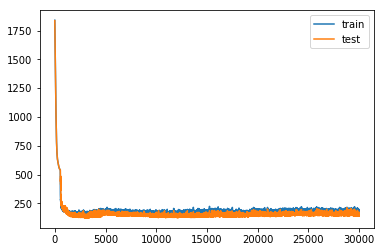

In [186]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=30000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [187]:
yhat = model.predict(validateX)

[0, 500, 0, 55000]

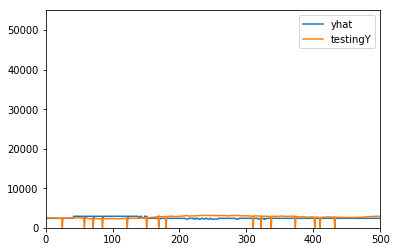

In [188]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
#pyplot.show()
plt.axis([0,500,0,55000])

In [189]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
9753.948546262787
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10113.578513511638
10083.80029389604
10762.929777983445
10762.929777983445
10762.929777983445
10762.929777983445
13156.416798704264
12876.582190856054
12670.523153751932
12401.715894992825
12748.917020707013
13412.530299878252
13412.530299878252
13412.530299878252
13009.317094498772
13470.268294651261
13449.901577699511
14115.078655592746
14115.078655592746
14115.078655592746
12703.952322704263
11669.24876774855
11358.58031568587
10940.715231690265
11556.789369609762
11822.083293562977
12181.538416036294
11228.018161648888
10768.386988006358
10682.902428269332
10382.911972575264
10358.593534322483
10877.568627659963
10903.10471085705
10714.9610117

IndexError: index 518 is out of bounds for axis 0 with size 518

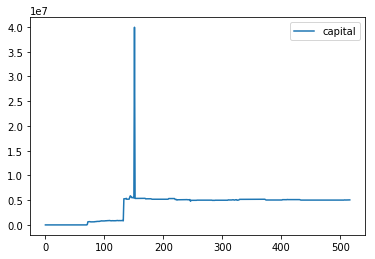

In [191]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [193]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

In [284]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(.5))
model.add(Dense(1))

Train on 1999 samples, validate on 1999 samples
Epoch 1/20000
 - 4s - loss: 37487.9763 - val_loss: 37485.3740
Epoch 2/20000
 - 0s - loss: 37479.2761 - val_loss: 37475.7800
Epoch 3/20000
 - 0s - loss: 37473.9212 - val_loss: 37471.9266
Epoch 4/20000
 - 0s - loss: 37470.1735 - val_loss: 37467.5917
Epoch 5/20000
 - 0s - loss: 37465.7087 - val_loss: 37462.2128
Epoch 6/20000
 - 0s - loss: 37459.9210 - val_loss: 37456.8197
Epoch 7/20000
 - 0s - loss: 37455.0788 - val_loss: 37453.1310
Epoch 8/20000
 - 0s - loss: 37451.4120 - val_loss: 37449.5650
Epoch 9/20000
 - 0s - loss: 37447.7443 - val_loss: 37446.0714
Epoch 10/20000
 - 0s - loss: 37444.4684 - val_loss: 37442.6528
Epoch 11/20000
 - 0s - loss: 37440.8582 - val_loss: 37439.2729
Epoch 12/20000
 - 0s - loss: 37437.5392 - val_loss: 37435.9288
Epoch 13/20000
 - 0s - loss: 37434.3339 - val_loss: 37432.6272
Epoch 14/20000
 - 0s - loss: 37431.0214 - val_loss: 37429.3454
Epoch 15/20000
 - 0s - loss: 37427.8480 - val_loss: 37426.0983
Epoch 16/20000
 

Epoch 130/20000
 - 0s - loss: 37073.1484 - val_loss: 37071.7289
Epoch 131/20000
 - 0s - loss: 37072.0330 - val_loss: 37068.6817
Epoch 132/20000
 - 0s - loss: 37066.8862 - val_loss: 37065.6198
Epoch 133/20000
 - 0s - loss: 37065.7418 - val_loss: 37062.5687
Epoch 134/20000
 - 0s - loss: 37060.6986 - val_loss: 37059.5104
Epoch 135/20000
 - 0s - loss: 37057.8250 - val_loss: 37056.4546
Epoch 136/20000
 - 0s - loss: 37055.9861 - val_loss: 37053.3998
Epoch 137/20000
 - 0s - loss: 37053.1489 - val_loss: 37050.3454
Epoch 138/20000
 - 0s - loss: 37049.7312 - val_loss: 37047.2949
Epoch 139/20000
 - 0s - loss: 37046.8640 - val_loss: 37044.2413
Epoch 140/20000
 - 0s - loss: 37043.0993 - val_loss: 37041.1854
Epoch 141/20000
 - 0s - loss: 37040.9295 - val_loss: 37038.1355
Epoch 142/20000
 - 0s - loss: 37036.6970 - val_loss: 37035.0759
Epoch 143/20000
 - 0s - loss: 37035.0851 - val_loss: 37032.0288
Epoch 144/20000
 - 0s - loss: 37028.8589 - val_loss: 37028.9585
Epoch 145/20000
 - 0s - loss: 37027.5647

 - 0s - loss: 36682.9404 - val_loss: 36680.4626
Epoch 259/20000
 - 0s - loss: 36679.4714 - val_loss: 36677.4085
Epoch 260/20000
 - 0s - loss: 36677.9575 - val_loss: 36674.3543
Epoch 261/20000
 - 0s - loss: 36673.0416 - val_loss: 36671.3030
Epoch 262/20000
 - 1s - loss: 36669.1563 - val_loss: 36668.2443
Epoch 263/20000
 - 0s - loss: 36664.2978 - val_loss: 36665.1784
Epoch 264/20000
 - 1s - loss: 36658.8225 - val_loss: 36662.1074
Epoch 265/20000
 - 0s - loss: 36663.2528 - val_loss: 36659.0567
Epoch 266/20000
 - 0s - loss: 36658.8734 - val_loss: 36656.0099
Epoch 267/20000
 - 0s - loss: 36651.9995 - val_loss: 36652.9455
Epoch 268/20000
 - 0s - loss: 36652.6304 - val_loss: 36649.8892
Epoch 269/20000
 - 0s - loss: 36647.0778 - val_loss: 36646.8302
Epoch 270/20000
 - 0s - loss: 36644.9149 - val_loss: 36643.7750
Epoch 271/20000
 - 0s - loss: 36644.8993 - val_loss: 36640.7283
Epoch 272/20000
 - 0s - loss: 36638.1006 - val_loss: 36637.6698
Epoch 273/20000
 - 0s - loss: 36634.6392 - val_loss: 366

Epoch 387/20000
 - 0s - loss: 36289.6349 - val_loss: 36286.2127
Epoch 388/20000
 - 0s - loss: 36284.5565 - val_loss: 36283.1548
Epoch 389/20000
 - 0s - loss: 36286.3841 - val_loss: 36280.1075
Epoch 390/20000
 - 0s - loss: 36283.5318 - val_loss: 36277.0607
Epoch 391/20000
 - 0s - loss: 36272.2140 - val_loss: 36274.0015
Epoch 392/20000
 - 0s - loss: 36270.4867 - val_loss: 36270.9387
Epoch 393/20000
 - 0s - loss: 36270.2990 - val_loss: 36267.8808
Epoch 394/20000
 - 0s - loss: 36268.8203 - val_loss: 36264.8269
Epoch 395/20000
 - 0s - loss: 36260.8803 - val_loss: 36261.7680
Epoch 396/20000
 - 0s - loss: 36258.8679 - val_loss: 36258.7092
Epoch 397/20000
 - 0s - loss: 36262.2897 - val_loss: 36255.6619
Epoch 398/20000
 - 0s - loss: 36255.9319 - val_loss: 36252.6075
Epoch 399/20000
 - 0s - loss: 36248.8073 - val_loss: 36249.5487
Epoch 400/20000
 - 0s - loss: 36253.9552 - val_loss: 36246.5009
Epoch 401/20000
 - 0s - loss: 36240.9796 - val_loss: 36243.4384
Epoch 402/20000
 - 0s - loss: 36242.0931

 - 0s - loss: 35893.4687 - val_loss: 35894.9865
Epoch 516/20000
 - 0s - loss: 35896.0877 - val_loss: 35891.9317
Epoch 517/20000
 - 1s - loss: 35887.6601 - val_loss: 35888.8737
Epoch 518/20000
 - 0s - loss: 35884.6844 - val_loss: 35885.8107
Epoch 519/20000
 - 0s - loss: 35882.9941 - val_loss: 35882.7557
Epoch 520/20000
 - 0s - loss: 35892.3273 - val_loss: 35879.7159
Epoch 521/20000
 - 0s - loss: 35877.5406 - val_loss: 35876.6620
Epoch 522/20000
 - 0s - loss: 35873.6037 - val_loss: 35873.6037
Epoch 523/20000
 - 0s - loss: 35870.7113 - val_loss: 35870.5486
Epoch 524/20000
 - 0s - loss: 35864.5037 - val_loss: 35867.4791
Epoch 525/20000
 - 0s - loss: 35865.0460 - val_loss: 35864.4198
Epoch 526/20000
 - 0s - loss: 35865.1034 - val_loss: 35861.3671
Epoch 527/20000
 - 0s - loss: 35855.9289 - val_loss: 35858.3072
Epoch 528/20000
 - 0s - loss: 35857.4670 - val_loss: 35855.2486
Epoch 529/20000
 - 0s - loss: 35857.2127 - val_loss: 35852.1977
Epoch 530/20000
 - 0s - loss: 35846.0613 - val_loss: 358

Epoch 644/20000
 - 0s - loss: 35499.2318 - val_loss: 35500.7444
Epoch 645/20000
 - 0s - loss: 35492.4298 - val_loss: 35497.6772
Epoch 646/20000
 - 0s - loss: 35499.3645 - val_loss: 35494.6238
Epoch 647/20000
 - 0s - loss: 35494.2533 - val_loss: 35491.5682
Epoch 648/20000
 - 0s - loss: 35493.3248 - val_loss: 35488.5175
Epoch 649/20000
 - 1s - loss: 35487.1809 - val_loss: 35485.4629
Epoch 650/20000
 - 1s - loss: 35480.9471 - val_loss: 35482.3997
Epoch 651/20000
 - 0s - loss: 35476.5228 - val_loss: 35479.3380
Epoch 652/20000
 - 1s - loss: 35486.6384 - val_loss: 35476.2909
Epoch 653/20000
 - 1s - loss: 35466.0583 - val_loss: 35473.2289
Epoch 654/20000
 - 1s - loss: 35475.3966 - val_loss: 35470.1745
Epoch 655/20000
 - 1s - loss: 35468.5250 - val_loss: 35467.1194
Epoch 656/20000
 - 0s - loss: 35462.7754 - val_loss: 35464.0569
Epoch 657/20000
 - 0s - loss: 35464.8282 - val_loss: 35461.0013
Epoch 658/20000
 - 0s - loss: 35452.7771 - val_loss: 35457.9392
Epoch 659/20000
 - 0s - loss: 35455.0398

 - 0s - loss: 35108.0281 - val_loss: 35109.5256
Epoch 773/20000
 - 0s - loss: 35109.9255 - val_loss: 35106.4644
Epoch 774/20000
 - 0s - loss: 35098.7488 - val_loss: 35103.4006
Epoch 775/20000
 - 0s - loss: 35107.1217 - val_loss: 35100.3533
Epoch 776/20000
 - 0s - loss: 35097.3111 - val_loss: 35097.2948
Epoch 777/20000
 - 1s - loss: 35094.8727 - val_loss: 35094.2367
Epoch 778/20000
 - 0s - loss: 35087.3801 - val_loss: 35091.1738
Epoch 779/20000
 - 1s - loss: 35089.9552 - val_loss: 35088.1192
Epoch 780/20000
 - 1s - loss: 35084.8922 - val_loss: 35085.0608
Epoch 781/20000
 - 1s - loss: 35087.3159 - val_loss: 35082.0097
Epoch 782/20000
 - 1s - loss: 35077.5488 - val_loss: 35078.9510
Epoch 783/20000
 - 1s - loss: 35078.9901 - val_loss: 35075.8925
Epoch 784/20000
 - 1s - loss: 35073.9500 - val_loss: 35072.8381
Epoch 785/20000
 - 1s - loss: 35072.3600 - val_loss: 35069.7830
Epoch 786/20000
 - 0s - loss: 35063.9907 - val_loss: 35066.7244
Epoch 787/20000
 - 0s - loss: 35069.9685 - val_loss: 350

Epoch 901/20000
 - 0s - loss: 34713.6073 - val_loss: 34715.2873
Epoch 902/20000
 - 0s - loss: 34709.8959 - val_loss: 34712.2290
Epoch 903/20000
 - 0s - loss: 34717.1216 - val_loss: 34709.1739
Epoch 904/20000
 - 1s - loss: 34714.4100 - val_loss: 34706.1241
Epoch 905/20000
 - 0s - loss: 34696.6520 - val_loss: 34703.0608
Epoch 906/20000
 - 0s - loss: 34698.5504 - val_loss: 34700.0012
Epoch 907/20000
 - 0s - loss: 34705.4376 - val_loss: 34696.9476
Epoch 908/20000
 - 0s - loss: 34700.8124 - val_loss: 34693.8958
Epoch 909/20000
 - 0s - loss: 34691.2030 - val_loss: 34690.8374
Epoch 910/20000
 - 0s - loss: 34682.5077 - val_loss: 34687.7759
Epoch 911/20000
 - 0s - loss: 34690.6325 - val_loss: 34684.7171
Epoch 912/20000
 - 0s - loss: 34678.0377 - val_loss: 34681.6587
Epoch 913/20000
 - 0s - loss: 34693.0418 - val_loss: 34678.6152
Epoch 914/20000
 - 0s - loss: 34681.1139 - val_loss: 34675.5607
Epoch 915/20000
 - 0s - loss: 34666.9139 - val_loss: 34672.4948
Epoch 916/20000
 - 0s - loss: 34659.4223

Epoch 1029/20000
 - 0s - loss: 34315.2526 - val_loss: 34324.1001
Epoch 1030/20000
 - 0s - loss: 34313.5287 - val_loss: 34321.0330
Epoch 1031/20000
 - 0s - loss: 34314.3710 - val_loss: 34317.9706
Epoch 1032/20000
 - 0s - loss: 34312.8608 - val_loss: 34314.9081
Epoch 1033/20000
 - 0s - loss: 34314.4517 - val_loss: 34311.8501
Epoch 1034/20000
 - 0s - loss: 34297.8077 - val_loss: 34308.7869
Epoch 1035/20000
 - 0s - loss: 34306.3972 - val_loss: 34305.7266
Epoch 1036/20000
 - 0s - loss: 34308.0153 - val_loss: 34302.6699
Epoch 1037/20000
 - 0s - loss: 34315.7532 - val_loss: 34299.6267
Epoch 1038/20000
 - 0s - loss: 34300.8309 - val_loss: 34296.5727
Epoch 1039/20000
 - 0s - loss: 34295.9305 - val_loss: 34293.5183
Epoch 1040/20000
 - 0s - loss: 34299.4867 - val_loss: 34290.4630
Epoch 1041/20000
 - 0s - loss: 34284.8046 - val_loss: 34287.4039
Epoch 1042/20000
 - 0s - loss: 34280.5802 - val_loss: 34284.3452
Epoch 1043/20000
 - 0s - loss: 34291.4958 - val_loss: 34281.2943
Epoch 1044/20000
 - 0s - 

 - 1s - loss: 33941.3505 - val_loss: 33938.9430
Epoch 1156/20000
 - 1s - loss: 33940.4640 - val_loss: 33935.8884
Epoch 1157/20000
 - 1s - loss: 33931.5731 - val_loss: 33932.8300
Epoch 1158/20000
 - 0s - loss: 33927.7343 - val_loss: 33929.7682
Epoch 1159/20000
 - 1s - loss: 33939.6362 - val_loss: 33926.7246
Epoch 1160/20000
 - 0s - loss: 33930.8455 - val_loss: 33923.6695
Epoch 1161/20000
 - 0s - loss: 33923.3511 - val_loss: 33920.6186
Epoch 1162/20000
 - 0s - loss: 33908.3007 - val_loss: 33917.5529
Epoch 1163/20000
 - 0s - loss: 33921.5981 - val_loss: 33914.4961
Epoch 1164/20000
 - 1s - loss: 33902.9224 - val_loss: 33911.4357
Epoch 1165/20000
 - 1s - loss: 33908.4286 - val_loss: 33908.3766
Epoch 1166/20000
 - 0s - loss: 33900.6980 - val_loss: 33905.3146
Epoch 1167/20000
 - 0s - loss: 33900.5456 - val_loss: 33902.2559
Epoch 1168/20000
 - 0s - loss: 33890.9156 - val_loss: 33899.1955
Epoch 1169/20000
 - 0s - loss: 33902.6692 - val_loss: 33896.1393
Epoch 1170/20000
 - 0s - loss: 33906.3759 

Epoch 1282/20000
 - 1s - loss: 33571.3142 - val_loss: 33550.8255
Epoch 1283/20000
 - 0s - loss: 33553.7561 - val_loss: 33547.7748
Epoch 1284/20000
 - 0s - loss: 33553.6296 - val_loss: 33544.7206
Epoch 1285/20000
 - 1s - loss: 33546.3423 - val_loss: 33541.6620
Epoch 1286/20000
 - 1s - loss: 33549.4910 - val_loss: 33538.6113
Epoch 1287/20000
 - 1s - loss: 33535.5341 - val_loss: 33535.5535
Epoch 1288/20000
 - 0s - loss: 33557.2984 - val_loss: 33532.5093
Epoch 1289/20000
 - 1s - loss: 33540.9460 - val_loss: 33529.4664
Epoch 1290/20000
 - 0s - loss: 33523.7893 - val_loss: 33526.4020
Epoch 1291/20000
 - 1s - loss: 33519.6361 - val_loss: 33523.3408
Epoch 1292/20000
 - 1s - loss: 33500.2815 - val_loss: 33520.2682
Epoch 1293/20000
 - 0s - loss: 33514.2248 - val_loss: 33517.2050
Epoch 1294/20000
 - 1s - loss: 33512.3790 - val_loss: 33514.1425
Epoch 1295/20000
 - 0s - loss: 33520.8635 - val_loss: 33511.0908
Epoch 1296/20000
 - 0s - loss: 33510.4280 - val_loss: 33508.0370
Epoch 1297/20000
 - 0s - 

 - 0s - loss: 33172.5087 - val_loss: 33165.7021
Epoch 1409/20000
 - 0s - loss: 33168.2225 - val_loss: 33162.6472
Epoch 1410/20000
 - 0s - loss: 33157.6927 - val_loss: 33159.5879
Epoch 1411/20000
 - 0s - loss: 33164.4618 - val_loss: 33156.5367
Epoch 1412/20000
 - 1s - loss: 33159.3173 - val_loss: 33153.4823
Epoch 1413/20000
 - 1s - loss: 33157.9897 - val_loss: 33150.4278
Epoch 1414/20000
 - 0s - loss: 33156.7434 - val_loss: 33147.3733
Epoch 1415/20000
 - 0s - loss: 33164.3869 - val_loss: 33144.3298
Epoch 1416/20000
 - 0s - loss: 33122.1755 - val_loss: 33141.2614
Epoch 1417/20000
 - 0s - loss: 33149.4072 - val_loss: 33138.2088
Epoch 1418/20000
 - 0s - loss: 33145.9689 - val_loss: 33135.1540
Epoch 1419/20000
 - 0s - loss: 33133.3292 - val_loss: 33132.0995
Epoch 1420/20000
 - 0s - loss: 33133.6546 - val_loss: 33129.0456
Epoch 1421/20000
 - 0s - loss: 33111.4341 - val_loss: 33125.9790
Epoch 1422/20000
 - 0s - loss: 33116.6357 - val_loss: 33122.9164
Epoch 1423/20000
 - 0s - loss: 33139.5970 

Epoch 1535/20000
 - 0s - loss: 32792.7539 - val_loss: 32777.5610
Epoch 1536/20000
 - 0s - loss: 32777.0112 - val_loss: 32774.5054
Epoch 1537/20000
 - 1s - loss: 32779.9530 - val_loss: 32771.4517
Epoch 1538/20000
 - 1s - loss: 32755.4802 - val_loss: 32768.3923
Epoch 1539/20000
 - 1s - loss: 32755.9359 - val_loss: 32765.3263
Epoch 1540/20000
 - 1s - loss: 32766.9215 - val_loss: 32762.2675
Epoch 1541/20000
 - 1s - loss: 32763.9696 - val_loss: 32759.2155
Epoch 1542/20000
 - 1s - loss: 32750.1091 - val_loss: 32756.1586
Epoch 1543/20000
 - 1s - loss: 32747.7002 - val_loss: 32753.0956
Epoch 1544/20000
 - 1s - loss: 32742.5180 - val_loss: 32750.0330
Epoch 1545/20000
 - 1s - loss: 32736.0013 - val_loss: 32746.9706
Epoch 1546/20000
 - 1s - loss: 32751.8659 - val_loss: 32743.9129
Epoch 1547/20000
 - 1s - loss: 32744.0558 - val_loss: 32740.8607
Epoch 1548/20000
 - 0s - loss: 32737.9196 - val_loss: 32737.8059
Epoch 1549/20000
 - 0s - loss: 32730.8218 - val_loss: 32734.7449
Epoch 1550/20000
 - 0s - 

 - 0s - loss: 32388.9081 - val_loss: 32392.4359
Epoch 1662/20000
 - 0s - loss: 32396.7228 - val_loss: 32389.3816
Epoch 1663/20000
 - 0s - loss: 32381.5902 - val_loss: 32386.3251
Epoch 1664/20000
 - 0s - loss: 32384.8398 - val_loss: 32383.2678
Epoch 1665/20000
 - 0s - loss: 32380.6700 - val_loss: 32380.2128
Epoch 1666/20000
 - 0s - loss: 32377.3563 - val_loss: 32377.1563
Epoch 1667/20000
 - 0s - loss: 32386.7888 - val_loss: 32374.1040
Epoch 1668/20000
 - 0s - loss: 32385.8946 - val_loss: 32371.0535
Epoch 1669/20000
 - 0s - loss: 32381.6842 - val_loss: 32368.0040
Epoch 1670/20000
 - 0s - loss: 32349.6808 - val_loss: 32364.9414
Epoch 1671/20000
 - 0s - loss: 32349.8319 - val_loss: 32361.8767
Epoch 1672/20000
 - 0s - loss: 32352.8506 - val_loss: 32358.8177
Epoch 1673/20000
 - 0s - loss: 32353.1696 - val_loss: 32355.7558
Epoch 1674/20000
 - 0s - loss: 32353.2491 - val_loss: 32352.6975
Epoch 1675/20000
 - 0s - loss: 32347.2220 - val_loss: 32349.6423
Epoch 1676/20000
 - 0s - loss: 32348.1448 

Epoch 1788/20000
 - 0s - loss: 32008.9835 - val_loss: 32004.2736
Epoch 1789/20000
 - 0s - loss: 32010.2161 - val_loss: 32001.2166
Epoch 1790/20000
 - 0s - loss: 31991.3838 - val_loss: 31998.1618
Epoch 1791/20000
 - 0s - loss: 32004.9129 - val_loss: 31995.1111
Epoch 1792/20000
 - 0s - loss: 31976.6863 - val_loss: 31992.0470
Epoch 1793/20000
 - 0s - loss: 32021.4542 - val_loss: 31989.0016
Epoch 1794/20000
 - 0s - loss: 31988.3534 - val_loss: 31985.9489
Epoch 1795/20000
 - 0s - loss: 31997.1306 - val_loss: 31982.8966
Epoch 1796/20000
 - 0s - loss: 31983.1420 - val_loss: 31979.8455
Epoch 1797/20000
 - 0s - loss: 31998.6056 - val_loss: 31976.7948
Epoch 1798/20000
 - 0s - loss: 31989.7317 - val_loss: 31973.7510
Epoch 1799/20000
 - 0s - loss: 31969.4280 - val_loss: 31970.6891
Epoch 1800/20000
 - 0s - loss: 31965.3166 - val_loss: 31967.6308
Epoch 1801/20000
 - 0s - loss: 31981.4083 - val_loss: 31964.5809
Epoch 1802/20000
 - 0s - loss: 31952.3726 - val_loss: 31961.5161
Epoch 1803/20000
 - 0s - 

 - 0s - loss: 31610.5735 - val_loss: 31619.1348
Epoch 1915/20000
 - 0s - loss: 31609.9221 - val_loss: 31616.0760
Epoch 1916/20000
 - 0s - loss: 31614.8780 - val_loss: 31613.0194
Epoch 1917/20000
 - 0s - loss: 31596.1953 - val_loss: 31609.9629
Epoch 1918/20000
 - 0s - loss: 31617.0044 - val_loss: 31606.9080
Epoch 1919/20000
 - 0s - loss: 31583.2241 - val_loss: 31603.8476
Epoch 1920/20000
 - 0s - loss: 31618.5136 - val_loss: 31600.7939
Epoch 1921/20000
 - 0s - loss: 31607.3566 - val_loss: 31597.7474
Epoch 1922/20000
 - 0s - loss: 31576.0171 - val_loss: 31594.6797
Epoch 1923/20000
 - 0s - loss: 31599.8898 - val_loss: 31591.6308
Epoch 1924/20000
 - 0s - loss: 31575.7055 - val_loss: 31588.5692
Epoch 1925/20000
 - 0s - loss: 31594.7344 - val_loss: 31585.5169
Epoch 1926/20000
 - 0s - loss: 31604.3104 - val_loss: 31582.4667
Epoch 1927/20000
 - 0s - loss: 31575.3012 - val_loss: 31579.4164
Epoch 1928/20000
 - 0s - loss: 31569.9880 - val_loss: 31576.3551
Epoch 1929/20000
 - 0s - loss: 31556.9174 

Epoch 2041/20000
 - 0s - loss: 31232.2144 - val_loss: 31231.0175
Epoch 2042/20000
 - 0s - loss: 31232.1912 - val_loss: 31227.9654
Epoch 2043/20000
 - 0s - loss: 31217.6371 - val_loss: 31224.9042
Epoch 2044/20000
 - 0s - loss: 31228.2897 - val_loss: 31221.8504
Epoch 2045/20000
 - 0s - loss: 31223.6298 - val_loss: 31218.7981
Epoch 2046/20000
 - 0s - loss: 31225.6718 - val_loss: 31215.7403
Epoch 2047/20000
 - 0s - loss: 31177.4900 - val_loss: 31212.6740
Epoch 2048/20000
 - 0s - loss: 31224.5701 - val_loss: 31209.6190
Epoch 2049/20000
 - 0s - loss: 31197.0037 - val_loss: 31206.5642
Epoch 2050/20000
 - 0s - loss: 31199.9237 - val_loss: 31203.5017
Epoch 2051/20000
 - 0s - loss: 31191.4685 - val_loss: 31200.4427
Epoch 2052/20000
 - 0s - loss: 31193.5442 - val_loss: 31197.3850
Epoch 2053/20000
 - 0s - loss: 31194.2618 - val_loss: 31194.3266
Epoch 2054/20000
 - 0s - loss: 31193.9818 - val_loss: 31191.2737
Epoch 2055/20000
 - 0s - loss: 31182.0015 - val_loss: 31188.2129
Epoch 2056/20000
 - 0s - 

 - 0s - loss: 30842.1851 - val_loss: 30845.9278
Epoch 2168/20000
 - 0s - loss: 30824.8102 - val_loss: 30842.8651
Epoch 2169/20000
 - 0s - loss: 30864.6782 - val_loss: 30839.8183
Epoch 2170/20000
 - 0s - loss: 30828.2138 - val_loss: 30836.7598
Epoch 2171/20000
 - 0s - loss: 30840.2600 - val_loss: 30833.7050
Epoch 2172/20000
 - 0s - loss: 30828.1312 - val_loss: 30830.6462
Epoch 2173/20000
 - 0s - loss: 30857.2524 - val_loss: 30827.5993
Epoch 2174/20000
 - 0s - loss: 30829.2148 - val_loss: 30824.5461
Epoch 2175/20000
 - 0s - loss: 30816.4553 - val_loss: 30821.4903
Epoch 2176/20000
 - 0s - loss: 30814.8120 - val_loss: 30818.4318
Epoch 2177/20000
 - 0s - loss: 30833.9323 - val_loss: 30815.3804
Epoch 2178/20000
 - 0s - loss: 30813.8137 - val_loss: 30812.3263
Epoch 2179/20000
 - 0s - loss: 30814.4141 - val_loss: 30809.2693
Epoch 2180/20000
 - 0s - loss: 30808.1848 - val_loss: 30806.2129
Epoch 2181/20000
 - 0s - loss: 30778.8882 - val_loss: 30803.1502
Epoch 2182/20000
 - 0s - loss: 30797.1665 

Epoch 2294/20000
 - 0s - loss: 30441.7035 - val_loss: 30457.7558
Epoch 2295/20000
 - 0s - loss: 30459.1730 - val_loss: 30454.7053
Epoch 2296/20000
 - 0s - loss: 30415.1465 - val_loss: 30451.6358
Epoch 2297/20000
 - 0s - loss: 30443.1131 - val_loss: 30448.5703
Epoch 2298/20000
 - 0s - loss: 30442.5058 - val_loss: 30445.5175
Epoch 2299/20000
 - 0s - loss: 30455.0714 - val_loss: 30442.4667
Epoch 2300/20000
 - 0s - loss: 30458.9357 - val_loss: 30439.4163
Epoch 2301/20000
 - 0s - loss: 30455.1504 - val_loss: 30436.3692
Epoch 2302/20000
 - 0s - loss: 30448.1986 - val_loss: 30433.3192
Epoch 2303/20000
 - 0s - loss: 30438.7523 - val_loss: 30430.2695
Epoch 2304/20000
 - 0s - loss: 30438.7759 - val_loss: 30427.2154
Epoch 2305/20000
 - 0s - loss: 30444.4213 - val_loss: 30424.1664
Epoch 2306/20000
 - 0s - loss: 30438.0892 - val_loss: 30421.1178
Epoch 2307/20000
 - 0s - loss: 30431.9160 - val_loss: 30418.0642
Epoch 2308/20000
 - 0s - loss: 30418.4504 - val_loss: 30415.0100
Epoch 2309/20000
 - 0s - 

 - 0s - loss: 30100.3323 - val_loss: 30072.7129
Epoch 2421/20000
 - 0s - loss: 30045.4678 - val_loss: 30069.6502
Epoch 2422/20000
 - 0s - loss: 30069.5038 - val_loss: 30066.5915
Epoch 2423/20000
 - 0s - loss: 30051.8963 - val_loss: 30063.5292
Epoch 2424/20000
 - 0s - loss: 30064.1579 - val_loss: 30060.4715
Epoch 2425/20000
 - 0s - loss: 30061.3204 - val_loss: 30057.4198
Epoch 2426/20000
 - 0s - loss: 30085.9501 - val_loss: 30054.3688
Epoch 2427/20000
 - 0s - loss: 30057.3675 - val_loss: 30051.3151
Epoch 2428/20000
 - 0s - loss: 29992.9676 - val_loss: 30048.2450
Epoch 2429/20000
 - 0s - loss: 30056.2497 - val_loss: 30045.1857
Epoch 2430/20000
 - 0s - loss: 30042.3681 - val_loss: 30042.1308
Epoch 2431/20000
 - 0s - loss: 30000.8499 - val_loss: 30039.0640
Epoch 2432/20000
 - 0s - loss: 30032.0555 - val_loss: 30036.0019
Epoch 2433/20000
 - 0s - loss: 30067.2098 - val_loss: 30032.9553
Epoch 2434/20000
 - 0s - loss: 30019.9690 - val_loss: 30029.9004
Epoch 2435/20000
 - 0s - loss: 30016.9910 

Epoch 2547/20000
 - 0s - loss: 29689.1516 - val_loss: 29684.5724
Epoch 2548/20000
 - 0s - loss: 29695.9500 - val_loss: 29681.5178
Epoch 2549/20000
 - 0s - loss: 29706.7807 - val_loss: 29678.4705
Epoch 2550/20000
 - 0s - loss: 29670.8953 - val_loss: 29675.4142
Epoch 2551/20000
 - 0s - loss: 29689.6433 - val_loss: 29672.3550
Epoch 2552/20000
 - 0s - loss: 29686.7000 - val_loss: 29669.3096
Epoch 2553/20000
 - 0s - loss: 29659.7046 - val_loss: 29666.2501
Epoch 2554/20000
 - 0s - loss: 29675.0346 - val_loss: 29663.1972
Epoch 2555/20000
 - 0s - loss: 29637.9770 - val_loss: 29660.1306
Epoch 2556/20000
 - 0s - loss: 29689.0157 - val_loss: 29657.0799
Epoch 2557/20000
 - 0s - loss: 29647.9306 - val_loss: 29654.0254
Epoch 2558/20000
 - 0s - loss: 29663.5436 - val_loss: 29650.9705
Epoch 2559/20000
 - 0s - loss: 29629.9542 - val_loss: 29647.9080
Epoch 2560/20000
 - 0s - loss: 29652.7584 - val_loss: 29644.8537
Epoch 2561/20000
 - 0s - loss: 29668.3124 - val_loss: 29641.7988
Epoch 2562/20000
 - 0s - 

 - 0s - loss: 29312.4577 - val_loss: 29299.4298
Epoch 2674/20000
 - 0s - loss: 29268.1672 - val_loss: 29296.3655
Epoch 2675/20000
 - 0s - loss: 29276.0267 - val_loss: 29293.3012
Epoch 2676/20000
 - 0s - loss: 29308.4796 - val_loss: 29290.2486
Epoch 2677/20000
 - 0s - loss: 29299.1343 - val_loss: 29287.2011
Epoch 2678/20000
 - 0s - loss: 29279.7313 - val_loss: 29284.1428
Epoch 2679/20000
 - 0s - loss: 29290.5061 - val_loss: 29281.0896
Epoch 2680/20000
 - 0s - loss: 29272.9428 - val_loss: 29278.0365
Epoch 2681/20000
 - 0s - loss: 29272.9701 - val_loss: 29274.9801
Epoch 2682/20000
 - 0s - loss: 29267.0774 - val_loss: 29271.9196
Epoch 2683/20000
 - 0s - loss: 29242.3372 - val_loss: 29268.8596
Epoch 2684/20000
 - 0s - loss: 29302.7589 - val_loss: 29265.8139
Epoch 2685/20000
 - 0s - loss: 29236.2980 - val_loss: 29262.7514
Epoch 2686/20000
 - 0s - loss: 29251.7419 - val_loss: 29259.6929
Epoch 2687/20000
 - 0s - loss: 29283.3144 - val_loss: 29256.6447
Epoch 2688/20000
 - 0s - loss: 29203.2797 

Epoch 2800/20000
 - 0s - loss: 28915.3178 - val_loss: 28911.2870
Epoch 2801/20000
 - 0s - loss: 28905.9011 - val_loss: 28908.2325
Epoch 2802/20000
 - 0s - loss: 28908.3217 - val_loss: 28905.1780
Epoch 2803/20000
 - 0s - loss: 28942.7012 - val_loss: 28902.1311
Epoch 2804/20000
 - 0s - loss: 28906.6551 - val_loss: 28899.0820
Epoch 2805/20000
 - 0s - loss: 28907.3640 - val_loss: 28896.0290
Epoch 2806/20000
 - 0s - loss: 28865.2778 - val_loss: 28892.9666
Epoch 2807/20000
 - 0s - loss: 28888.7412 - val_loss: 28889.9080
Epoch 2808/20000
 - 0s - loss: 28901.5888 - val_loss: 28886.8573
Epoch 2809/20000
 - 0s - loss: 28877.0217 - val_loss: 28883.7951
Epoch 2810/20000
 - 0s - loss: 28888.5900 - val_loss: 28880.7439
Epoch 2811/20000
 - 0s - loss: 28869.5692 - val_loss: 28877.6816
Epoch 2812/20000
 - 0s - loss: 28887.3329 - val_loss: 28874.6311
Epoch 2813/20000
 - 0s - loss: 28867.9613 - val_loss: 28871.5725
Epoch 2814/20000
 - 0s - loss: 28873.0717 - val_loss: 28868.5215
Epoch 2815/20000
 - 0s - 

 - 0s - loss: 28532.9775 - val_loss: 28526.2090
Epoch 2927/20000
 - 0s - loss: 28522.1383 - val_loss: 28523.1504
Epoch 2928/20000
 - 0s - loss: 28500.8347 - val_loss: 28520.0861
Epoch 2929/20000
 - 0s - loss: 28500.1723 - val_loss: 28517.0217
Epoch 2930/20000
 - 0s - loss: 28512.6906 - val_loss: 28513.9664
Epoch 2931/20000
 - 0s - loss: 28516.1996 - val_loss: 28510.9143
Epoch 2932/20000
 - 0s - loss: 28496.3784 - val_loss: 28507.8490
Epoch 2933/20000
 - 0s - loss: 28502.3652 - val_loss: 28504.7987
Epoch 2934/20000
 - 1s - loss: 28484.5064 - val_loss: 28501.7361
Epoch 2935/20000
 - 0s - loss: 28466.6965 - val_loss: 28498.6698
Epoch 2936/20000
 - 1s - loss: 28515.7561 - val_loss: 28495.6153
Epoch 2937/20000
 - 0s - loss: 28505.1242 - val_loss: 28492.5679
Epoch 2938/20000
 - 0s - loss: 28492.3188 - val_loss: 28489.5115
Epoch 2939/20000
 - 0s - loss: 28493.3661 - val_loss: 28486.4549
Epoch 2940/20000
 - 0s - loss: 28461.8725 - val_loss: 28483.3947
Epoch 2941/20000
 - 1s - loss: 28511.8747 

Epoch 3053/20000
 - 0s - loss: 28192.7155 - val_loss: 28138.0799
Epoch 3054/20000
 - 0s - loss: 28149.3537 - val_loss: 28135.0197
Epoch 3055/20000
 - 0s - loss: 28146.4619 - val_loss: 28131.9740
Epoch 3056/20000
 - 0s - loss: 28130.0234 - val_loss: 28128.9143
Epoch 3057/20000
 - 0s - loss: 28113.8282 - val_loss: 28125.8549
Epoch 3058/20000
 - 0s - loss: 28098.2919 - val_loss: 28122.7868
Epoch 3059/20000
 - 0s - loss: 28127.3157 - val_loss: 28119.7286
Epoch 3060/20000
 - 1s - loss: 28126.0976 - val_loss: 28116.6778
Epoch 3061/20000
 - 0s - loss: 28116.1236 - val_loss: 28113.6171
Epoch 3062/20000
 - 0s - loss: 28113.9756 - val_loss: 28110.5606
Epoch 3063/20000
 - 0s - loss: 28112.8610 - val_loss: 28107.5077
Epoch 3064/20000
 - 1s - loss: 28127.2509 - val_loss: 28104.4587
Epoch 3065/20000
 - 0s - loss: 28110.1961 - val_loss: 28101.4043
Epoch 3066/20000
 - 0s - loss: 28125.5963 - val_loss: 28098.3571
Epoch 3067/20000
 - 0s - loss: 28104.1123 - val_loss: 28095.2990
Epoch 3068/20000
 - 1s - 

 - 1s - loss: 27717.5255 - val_loss: 27752.9510
Epoch 3180/20000
 - 0s - loss: 27731.5357 - val_loss: 27749.8845
Epoch 3181/20000
 - 1s - loss: 27735.5163 - val_loss: 27746.8265
Epoch 3182/20000
 - 1s - loss: 27726.7757 - val_loss: 27743.7634
Epoch 3183/20000
 - 1s - loss: 27739.3885 - val_loss: 27740.7071
Epoch 3184/20000
 - 1s - loss: 27750.9585 - val_loss: 27737.6543
Epoch 3185/20000
 - 1s - loss: 27731.3682 - val_loss: 27734.5990
Epoch 3186/20000
 - 1s - loss: 27745.4441 - val_loss: 27731.5448
Epoch 3187/20000
 - 1s - loss: 27708.7748 - val_loss: 27728.4862
Epoch 3188/20000
 - 1s - loss: 27741.0796 - val_loss: 27725.4317
Epoch 3189/20000
 - 1s - loss: 27695.2106 - val_loss: 27722.3692
Epoch 3190/20000
 - 0s - loss: 27727.8399 - val_loss: 27719.3142
Epoch 3191/20000
 - 1s - loss: 27746.3012 - val_loss: 27716.2674
Epoch 3192/20000
 - 1s - loss: 27706.3811 - val_loss: 27713.2091
Epoch 3193/20000
 - 1s - loss: 27715.7778 - val_loss: 27710.1544
Epoch 3194/20000
 - 0s - loss: 27730.8713 

Epoch 3306/20000
 - 0s - loss: 27426.4293 - val_loss: 27364.8029
Epoch 3307/20000
 - 0s - loss: 27380.2242 - val_loss: 27361.7559
Epoch 3308/20000
 - 0s - loss: 27386.2497 - val_loss: 27358.7049
Epoch 3309/20000
 - 0s - loss: 27310.4934 - val_loss: 27355.6365
Epoch 3310/20000
 - 0s - loss: 27343.1475 - val_loss: 27352.5686
Epoch 3311/20000
 - 1s - loss: 27365.5085 - val_loss: 27349.5174
Epoch 3312/20000
 - 1s - loss: 27337.4019 - val_loss: 27346.4591
Epoch 3313/20000
 - 0s - loss: 27346.8664 - val_loss: 27343.4042
Epoch 3314/20000
 - 0s - loss: 27286.5031 - val_loss: 27340.3359
Epoch 3315/20000
 - 0s - loss: 27375.3255 - val_loss: 27337.2829
Epoch 3316/20000
 - 0s - loss: 27353.3524 - val_loss: 27334.2346
Epoch 3317/20000
 - 0s - loss: 27340.8663 - val_loss: 27331.1739
Epoch 3318/20000
 - 0s - loss: 27308.1040 - val_loss: 27328.1170
Epoch 3319/20000
 - 0s - loss: 27377.3995 - val_loss: 27325.0646
Epoch 3320/20000
 - 1s - loss: 27363.7494 - val_loss: 27322.0251
Epoch 3321/20000
 - 1s - 

 - 1s - loss: 27020.4437 - val_loss: 26979.6563
Epoch 3433/20000
 - 1s - loss: 26967.6849 - val_loss: 26976.5993
Epoch 3434/20000
 - 0s - loss: 26938.7582 - val_loss: 26973.5349
Epoch 3435/20000
 - 1s - loss: 27004.6693 - val_loss: 26970.4822
Epoch 3436/20000
 - 0s - loss: 26994.0163 - val_loss: 26967.4359
Epoch 3437/20000
 - 1s - loss: 26957.4379 - val_loss: 26964.3809
Epoch 3438/20000
 - 0s - loss: 26939.7003 - val_loss: 26961.3165
Epoch 3439/20000
 - 1s - loss: 26963.3421 - val_loss: 26958.2601
Epoch 3440/20000
 - 0s - loss: 26927.0326 - val_loss: 26955.1975
Epoch 3441/20000
 - 0s - loss: 26939.9671 - val_loss: 26952.1351
Epoch 3442/20000
 - 0s - loss: 26898.9216 - val_loss: 26949.0665
Epoch 3443/20000
 - 0s - loss: 26967.4597 - val_loss: 26946.0141
Epoch 3444/20000
 - 0s - loss: 26947.9753 - val_loss: 26942.9590
Epoch 3445/20000
 - 0s - loss: 26936.2662 - val_loss: 26939.9005
Epoch 3446/20000
 - 0s - loss: 26954.0189 - val_loss: 26936.8494
Epoch 3447/20000
 - 0s - loss: 26941.1903 

Epoch 3559/20000
 - 1s - loss: 26612.6497 - val_loss: 26591.4982
Epoch 3560/20000
 - 1s - loss: 26541.5559 - val_loss: 26588.4316
Epoch 3561/20000
 - 0s - loss: 26605.6639 - val_loss: 26585.3712
Epoch 3562/20000
 - 0s - loss: 26579.0211 - val_loss: 26582.3142
Epoch 3563/20000
 - 0s - loss: 26587.9167 - val_loss: 26579.2599
Epoch 3564/20000
 - 0s - loss: 26576.9113 - val_loss: 26576.2051
Epoch 3565/20000
 - 0s - loss: 26504.2332 - val_loss: 26573.1347
Epoch 3566/20000
 - 0s - loss: 26583.9315 - val_loss: 26570.0760
Epoch 3567/20000
 - 0s - loss: 26601.1424 - val_loss: 26567.0274
Epoch 3568/20000
 - 0s - loss: 26580.3298 - val_loss: 26563.9744
Epoch 3569/20000
 - 0s - loss: 26591.4143 - val_loss: 26560.9239
Epoch 3570/20000
 - 0s - loss: 26550.4765 - val_loss: 26557.8670
Epoch 3571/20000
 - 0s - loss: 26595.5876 - val_loss: 26554.8183
Epoch 3572/20000
 - 0s - loss: 26550.7476 - val_loss: 26551.7601
Epoch 3573/20000
 - 0s - loss: 26543.2407 - val_loss: 26548.7010
Epoch 3574/20000
 - 0s - 

 - 0s - loss: 26219.2514 - val_loss: 26206.3186
Epoch 3686/20000
 - 1s - loss: 26209.6069 - val_loss: 26203.2660
Epoch 3687/20000
 - 0s - loss: 26239.3096 - val_loss: 26200.2171
Epoch 3688/20000
 - 1s - loss: 26221.3796 - val_loss: 26197.1663
Epoch 3689/20000
 - 0s - loss: 26195.1370 - val_loss: 26194.1150
Epoch 3690/20000
 - 0s - loss: 26167.9739 - val_loss: 26191.0487
Epoch 3691/20000
 - 0s - loss: 26167.0248 - val_loss: 26187.9860
Epoch 3692/20000
 - 0s - loss: 26178.6662 - val_loss: 26184.9313
Epoch 3693/20000
 - 1s - loss: 26188.6804 - val_loss: 26181.8731
Epoch 3694/20000
 - 0s - loss: 26196.7999 - val_loss: 26178.8200
Epoch 3695/20000
 - 0s - loss: 26166.0534 - val_loss: 26175.7660
Epoch 3696/20000
 - 0s - loss: 26193.2508 - val_loss: 26172.7068
Epoch 3697/20000
 - 0s - loss: 26191.2361 - val_loss: 26169.6580
Epoch 3698/20000
 - 0s - loss: 26153.2097 - val_loss: 26166.5996
Epoch 3699/20000
 - 0s - loss: 26170.5797 - val_loss: 26163.5449
Epoch 3700/20000
 - 0s - loss: 26173.4594 

Epoch 3812/20000
 - 1s - loss: 25805.8082 - val_loss: 25818.1775
Epoch 3813/20000
 - 1s - loss: 25773.5760 - val_loss: 25815.1112
Epoch 3814/20000
 - 1s - loss: 25822.1649 - val_loss: 25812.0508
Epoch 3815/20000
 - 0s - loss: 25800.5261 - val_loss: 25808.9942
Epoch 3816/20000
 - 1s - loss: 25826.8880 - val_loss: 25805.9398
Epoch 3817/20000
 - 1s - loss: 25788.4184 - val_loss: 25802.8847
Epoch 3818/20000
 - 0s - loss: 25792.9599 - val_loss: 25799.8243
Epoch 3819/20000
 - 0s - loss: 25804.7816 - val_loss: 25796.7674
Epoch 3820/20000
 - 0s - loss: 25780.2520 - val_loss: 25793.7049
Epoch 3821/20000
 - 0s - loss: 25768.7671 - val_loss: 25790.6462
Epoch 3822/20000
 - 0s - loss: 25797.2539 - val_loss: 25787.5858
Epoch 3823/20000
 - 0s - loss: 25755.1461 - val_loss: 25784.5251
Epoch 3824/20000
 - 0s - loss: 25807.1820 - val_loss: 25781.4707
Epoch 3825/20000
 - 0s - loss: 25791.2019 - val_loss: 25778.4197
Epoch 3826/20000
 - 0s - loss: 25785.0163 - val_loss: 25775.3612
Epoch 3827/20000
 - 1s - 

 - 1s - loss: 25402.8308 - val_loss: 25433.0331
Epoch 3939/20000
 - 1s - loss: 25461.7903 - val_loss: 25429.9805
Epoch 3940/20000
 - 0s - loss: 25422.6507 - val_loss: 25426.9199
Epoch 3941/20000
 - 0s - loss: 25438.6499 - val_loss: 25423.8689
Epoch 3942/20000
 - 1s - loss: 25410.4711 - val_loss: 25420.8127
Epoch 3943/20000
 - 0s - loss: 25440.7828 - val_loss: 25417.7560
Epoch 3944/20000
 - 0s - loss: 25414.4609 - val_loss: 25414.6977
Epoch 3945/20000
 - 0s - loss: 25409.8647 - val_loss: 25411.6424
Epoch 3946/20000
 - 0s - loss: 25427.7987 - val_loss: 25408.5901
Epoch 3947/20000
 - 0s - loss: 25356.9694 - val_loss: 25405.5250
Epoch 3948/20000
 - 0s - loss: 25389.9290 - val_loss: 25402.4591
Epoch 3949/20000
 - 0s - loss: 25418.5140 - val_loss: 25399.4047
Epoch 3950/20000
 - 0s - loss: 25396.1217 - val_loss: 25396.3495
Epoch 3951/20000
 - 0s - loss: 25365.9726 - val_loss: 25393.2868
Epoch 3952/20000
 - 0s - loss: 25381.2930 - val_loss: 25390.2289
Epoch 3953/20000
 - 1s - loss: 25355.9912 

Epoch 4065/20000
 - 1s - loss: 25036.4260 - val_loss: 25044.8105
Epoch 4066/20000
 - 1s - loss: 25084.3674 - val_loss: 25041.7636
Epoch 4067/20000
 - 1s - loss: 25003.1449 - val_loss: 25038.7034
Epoch 4068/20000
 - 1s - loss: 25067.3296 - val_loss: 25035.6465
Epoch 4069/20000
 - 0s - loss: 25034.0485 - val_loss: 25032.5935
Epoch 4070/20000
 - 0s - loss: 25061.7343 - val_loss: 25029.5449
Epoch 4071/20000
 - 1s - loss: 24992.7501 - val_loss: 25026.4862
Epoch 4072/20000
 - 1s - loss: 25035.3227 - val_loss: 25023.4275
Epoch 4073/20000
 - 0s - loss: 25038.9419 - val_loss: 25020.3732
Epoch 4074/20000
 - 1s - loss: 25019.6097 - val_loss: 25017.3202
Epoch 4075/20000
 - 0s - loss: 24951.1697 - val_loss: 25014.2522
Epoch 4076/20000
 - 0s - loss: 25071.0320 - val_loss: 25011.1994
Epoch 4077/20000
 - 0s - loss: 24993.8157 - val_loss: 25008.1430
Epoch 4078/20000
 - 0s - loss: 25001.5973 - val_loss: 25005.0917
Epoch 4079/20000
 - 1s - loss: 24967.7064 - val_loss: 25002.0250
Epoch 4080/20000
 - 1s - 

 - 0s - loss: 24609.3254 - val_loss: 24659.6837
Epoch 4192/20000
 - 0s - loss: 24643.4896 - val_loss: 24656.6254
Epoch 4193/20000
 - 1s - loss: 24652.1091 - val_loss: 24653.5701
Epoch 4194/20000
 - 0s - loss: 24688.4633 - val_loss: 24650.5232
Epoch 4195/20000
 - 0s - loss: 24605.0467 - val_loss: 24647.4607
Epoch 4196/20000
 - 0s - loss: 24616.0217 - val_loss: 24644.3963
Epoch 4197/20000
 - 0s - loss: 24596.9900 - val_loss: 24641.3339
Epoch 4198/20000
 - 0s - loss: 24629.0483 - val_loss: 24638.2732
Epoch 4199/20000
 - 0s - loss: 24633.7519 - val_loss: 24635.2149
Epoch 4200/20000
 - 0s - loss: 24607.5885 - val_loss: 24632.1581
Epoch 4201/20000
 - 0s - loss: 24597.7771 - val_loss: 24629.0936
Epoch 4202/20000
 - 0s - loss: 24674.9913 - val_loss: 24626.0471
Epoch 4203/20000
 - 0s - loss: 24632.5665 - val_loss: 24622.9943
Epoch 4204/20000
 - 0s - loss: 24620.1077 - val_loss: 24619.9355
Epoch 4205/20000
 - 0s - loss: 24636.3853 - val_loss: 24616.8826
Epoch 4206/20000
 - 0s - loss: 24557.9497 

Epoch 4318/20000
 - 0s - loss: 24266.6329 - val_loss: 24271.4671
Epoch 4319/20000
 - 0s - loss: 24304.9633 - val_loss: 24268.4203
Epoch 4320/20000
 - 0s - loss: 24220.4359 - val_loss: 24265.3574
Epoch 4321/20000
 - 0s - loss: 24281.7616 - val_loss: 24262.3046
Epoch 4322/20000
 - 0s - loss: 24240.4511 - val_loss: 24259.2462
Epoch 4323/20000
 - 0s - loss: 24323.9889 - val_loss: 24256.2012
Epoch 4324/20000
 - 0s - loss: 24273.4123 - val_loss: 24253.1502
Epoch 4325/20000
 - 0s - loss: 24218.7228 - val_loss: 24250.0919
Epoch 4326/20000
 - 0s - loss: 24247.4310 - val_loss: 24247.0332
Epoch 4327/20000
 - 0s - loss: 24263.1922 - val_loss: 24243.9762
Epoch 4328/20000
 - 0s - loss: 24276.2636 - val_loss: 24240.9315
Epoch 4329/20000
 - 0s - loss: 24255.5386 - val_loss: 24237.8805
Epoch 4330/20000
 - 0s - loss: 24239.3962 - val_loss: 24234.8201
Epoch 4331/20000
 - 0s - loss: 24233.4536 - val_loss: 24231.7662
Epoch 4332/20000
 - 0s - loss: 24210.5108 - val_loss: 24228.7053
Epoch 4333/20000
 - 0s - 

 - 0s - loss: 23849.4995 - val_loss: 23886.3451
Epoch 4445/20000
 - 0s - loss: 23963.7163 - val_loss: 23883.2986
Epoch 4446/20000
 - 0s - loss: 23855.0437 - val_loss: 23880.2441
Epoch 4447/20000
 - 0s - loss: 23880.0908 - val_loss: 23877.1858
Epoch 4448/20000
 - 0s - loss: 23870.4497 - val_loss: 23874.1289
Epoch 4449/20000
 - 0s - loss: 23826.6362 - val_loss: 23871.0608
Epoch 4450/20000
 - 0s - loss: 23870.9246 - val_loss: 23868.0039
Epoch 4451/20000
 - 0s - loss: 23881.1795 - val_loss: 23864.9535
Epoch 4452/20000
 - 0s - loss: 23899.2716 - val_loss: 23861.8980
Epoch 4453/20000
 - 0s - loss: 23813.5694 - val_loss: 23858.8399
Epoch 4454/20000
 - 0s - loss: 23858.0247 - val_loss: 23855.7795
Epoch 4455/20000
 - 0s - loss: 23869.3632 - val_loss: 23852.7243
Epoch 4456/20000
 - 0s - loss: 23841.8046 - val_loss: 23849.6703
Epoch 4457/20000
 - 0s - loss: 23811.9367 - val_loss: 23846.6037
Epoch 4458/20000
 - 0s - loss: 23859.9458 - val_loss: 23843.5525
Epoch 4459/20000
 - 0s - loss: 23861.4557 

Epoch 4571/20000
 - 0s - loss: 23473.9256 - val_loss: 23498.1932
Epoch 4572/20000
 - 0s - loss: 23464.7819 - val_loss: 23495.1310
Epoch 4573/20000
 - 0s - loss: 23493.9115 - val_loss: 23492.0726
Epoch 4574/20000
 - 0s - loss: 23511.8170 - val_loss: 23489.0212
Epoch 4575/20000
 - 0s - loss: 23420.4360 - val_loss: 23485.9588
Epoch 4576/20000
 - 0s - loss: 23518.0788 - val_loss: 23482.9065
Epoch 4577/20000
 - 0s - loss: 23533.0126 - val_loss: 23479.8572
Epoch 4578/20000
 - 0s - loss: 23485.4312 - val_loss: 23476.8046
Epoch 4579/20000
 - 0s - loss: 23491.2347 - val_loss: 23473.7522
Epoch 4580/20000
 - 0s - loss: 23530.5248 - val_loss: 23470.7034
Epoch 4581/20000
 - 0s - loss: 23488.4653 - val_loss: 23467.6502
Epoch 4582/20000
 - 0s - loss: 23451.7526 - val_loss: 23464.5855
Epoch 4583/20000
 - 0s - loss: 23471.9694 - val_loss: 23461.5331
Epoch 4584/20000
 - 0s - loss: 23481.8030 - val_loss: 23458.4804
Epoch 4585/20000
 - 0s - loss: 23479.2976 - val_loss: 23455.4275
Epoch 4586/20000
 - 0s - 

 - 0s - loss: 23100.5228 - val_loss: 23113.1369
Epoch 4698/20000
 - 0s - loss: 23139.9027 - val_loss: 23110.0802
Epoch 4699/20000
 - 0s - loss: 23100.1725 - val_loss: 23107.0251
Epoch 4700/20000
 - 0s - loss: 23074.9680 - val_loss: 23103.9626
Epoch 4701/20000
 - 0s - loss: 23121.9391 - val_loss: 23100.9003
Epoch 4702/20000
 - 0s - loss: 23086.1828 - val_loss: 23097.8452
Epoch 4703/20000
 - 0s - loss: 23098.7764 - val_loss: 23094.7864
Epoch 4704/20000
 - 0s - loss: 23038.2586 - val_loss: 23091.7205
Epoch 4705/20000
 - 0s - loss: 23089.3901 - val_loss: 23088.6578
Epoch 4706/20000
 - 0s - loss: 23086.0385 - val_loss: 23085.5994
Epoch 4707/20000
 - 0s - loss: 23089.0792 - val_loss: 23082.5448
Epoch 4708/20000
 - 1s - loss: 23121.7712 - val_loss: 23079.4904
Epoch 4709/20000
 - 0s - loss: 23049.6842 - val_loss: 23076.4315
Epoch 4710/20000
 - 0s - loss: 23016.0195 - val_loss: 23073.3633
Epoch 4711/20000
 - 0s - loss: 23102.4763 - val_loss: 23070.3104
Epoch 4712/20000
 - 0s - loss: 23086.0609 

Epoch 4824/20000
 - 0s - loss: 22749.6401 - val_loss: 22724.9430
Epoch 4825/20000
 - 0s - loss: 22732.5013 - val_loss: 22721.8888
Epoch 4826/20000
 - 0s - loss: 22715.1362 - val_loss: 22718.8302
Epoch 4827/20000
 - 0s - loss: 22702.9014 - val_loss: 22715.7714
Epoch 4828/20000
 - 0s - loss: 22728.0646 - val_loss: 22712.7245
Epoch 4829/20000
 - 0s - loss: 22720.0146 - val_loss: 22709.6698
Epoch 4830/20000
 - 0s - loss: 22717.6610 - val_loss: 22706.6171
Epoch 4831/20000
 - 0s - loss: 22751.0166 - val_loss: 22703.5649
Epoch 4832/20000
 - 0s - loss: 22670.2823 - val_loss: 22700.5179
Epoch 4833/20000
 - 0s - loss: 22678.5556 - val_loss: 22697.4587
Epoch 4834/20000
 - 0s - loss: 22708.3275 - val_loss: 22694.4045
Epoch 4835/20000
 - 0s - loss: 22707.5195 - val_loss: 22691.3494
Epoch 4836/20000
 - 0s - loss: 22684.3973 - val_loss: 22688.2948
Epoch 4837/20000
 - 0s - loss: 22722.3406 - val_loss: 22685.2505
Epoch 4838/20000
 - 0s - loss: 22665.0690 - val_loss: 22682.1837
Epoch 4839/20000
 - 0s - 

 - 0s - loss: 22355.3289 - val_loss: 22339.9510
Epoch 4951/20000
 - 0s - loss: 22354.4706 - val_loss: 22336.8930
Epoch 4952/20000
 - 0s - loss: 22358.0496 - val_loss: 22333.8438
Epoch 4953/20000
 - 0s - loss: 22346.5218 - val_loss: 22330.7952
Epoch 4954/20000
 - 0s - loss: 22352.8659 - val_loss: 22327.7440
Epoch 4955/20000
 - 0s - loss: 22307.4129 - val_loss: 22324.6852
Epoch 4956/20000
 - 0s - loss: 22336.2248 - val_loss: 22321.6232
Epoch 4957/20000
 - 0s - loss: 22348.8810 - val_loss: 22318.5647
Epoch 4958/20000
 - 0s - loss: 22311.5417 - val_loss: 22315.5058
Epoch 4959/20000
 - 0s - loss: 22284.1757 - val_loss: 22312.4451
Epoch 4960/20000
 - 0s - loss: 22350.9596 - val_loss: 22309.3890
Epoch 4961/20000
 - 0s - loss: 22353.1627 - val_loss: 22306.3340
Epoch 4962/20000
 - 0s - loss: 22359.0119 - val_loss: 22303.2867
Epoch 4963/20000
 - 0s - loss: 22296.0386 - val_loss: 22300.2284
Epoch 4964/20000
 - 0s - loss: 22287.4370 - val_loss: 22297.1738
Epoch 4965/20000
 - 0s - loss: 22296.5356 

Epoch 5077/20000
 - 0s - loss: 22006.2078 - val_loss: 21951.9044
Epoch 5078/20000
 - 0s - loss: 21926.0163 - val_loss: 21948.8418
Epoch 5079/20000
 - 0s - loss: 22022.8886 - val_loss: 21945.7930
Epoch 5080/20000
 - 0s - loss: 22020.0373 - val_loss: 21942.7482
Epoch 5081/20000
 - 0s - loss: 21973.0758 - val_loss: 21939.6951
Epoch 5082/20000
 - 0s - loss: 21954.2523 - val_loss: 21936.6498
Epoch 5083/20000
 - 0s - loss: 21932.7638 - val_loss: 21933.5956
Epoch 5084/20000
 - 0s - loss: 21920.8091 - val_loss: 21930.5526
Epoch 5085/20000
 - 0s - loss: 21911.0215 - val_loss: 21927.4944
Epoch 5086/20000
 - 0s - loss: 21947.4644 - val_loss: 21924.4399
Epoch 5087/20000
 - 0s - loss: 21920.2320 - val_loss: 21921.3791
Epoch 5088/20000
 - 0s - loss: 21946.4044 - val_loss: 21918.3229
Epoch 5089/20000
 - 0s - loss: 21896.2186 - val_loss: 21915.2637
Epoch 5090/20000
 - 0s - loss: 21899.0008 - val_loss: 21912.1979
Epoch 5091/20000
 - 0s - loss: 21932.0968 - val_loss: 21909.1349
Epoch 5092/20000
 - 0s - 

 - 0s - loss: 21540.3039 - val_loss: 21566.9064
Epoch 5204/20000
 - 0s - loss: 21577.7939 - val_loss: 21563.8613
Epoch 5205/20000
 - 0s - loss: 21570.8880 - val_loss: 21560.8102
Epoch 5206/20000
 - 0s - loss: 21506.3354 - val_loss: 21557.7558
Epoch 5207/20000
 - 0s - loss: 21527.2143 - val_loss: 21554.6915
Epoch 5208/20000
 - 0s - loss: 21578.4734 - val_loss: 21551.6463
Epoch 5209/20000
 - 0s - loss: 21503.4396 - val_loss: 21548.5838
Epoch 5210/20000
 - 0s - loss: 21566.9030 - val_loss: 21545.5250
Epoch 5211/20000
 - 0s - loss: 21539.8375 - val_loss: 21542.4709
Epoch 5212/20000
 - 0s - loss: 21576.1575 - val_loss: 21539.4237
Epoch 5213/20000
 - 0s - loss: 21583.0445 - val_loss: 21536.3770
Epoch 5214/20000
 - 0s - loss: 21524.0976 - val_loss: 21533.3245
Epoch 5215/20000
 - 0s - loss: 21552.2319 - val_loss: 21530.2680
Epoch 5216/20000
 - 0s - loss: 21551.8148 - val_loss: 21527.2166
Epoch 5217/20000
 - 0s - loss: 21527.6751 - val_loss: 21524.1578
Epoch 5218/20000
 - 0s - loss: 21496.7177 

Epoch 5330/20000
 - 0s - loss: 21188.9676 - val_loss: 21179.1096
Epoch 5331/20000
 - 0s - loss: 21205.2484 - val_loss: 21176.0665
Epoch 5332/20000
 - 0s - loss: 21154.6192 - val_loss: 21173.0077
Epoch 5333/20000
 - 0s - loss: 21247.1466 - val_loss: 21169.9628
Epoch 5334/20000
 - 0s - loss: 21186.3979 - val_loss: 21166.9044
Epoch 5335/20000
 - 0s - loss: 21187.4295 - val_loss: 21163.8596
Epoch 5336/20000
 - 0s - loss: 21172.5607 - val_loss: 21160.7953
Epoch 5337/20000
 - 0s - loss: 21108.8155 - val_loss: 21157.7440
Epoch 5338/20000
 - 0s - loss: 21100.8468 - val_loss: 21154.6639
Epoch 5339/20000
 - 0s - loss: 21184.7935 - val_loss: 21151.6229
Epoch 5340/20000
 - 0s - loss: 21137.2582 - val_loss: 21148.5701
Epoch 5341/20000
 - 0s - loss: 21181.8621 - val_loss: 21145.5137
Epoch 5342/20000
 - 0s - loss: 21147.9745 - val_loss: 21142.4666
Epoch 5343/20000
 - 0s - loss: 21151.0403 - val_loss: 21139.4099
Epoch 5344/20000
 - 0s - loss: 21125.6565 - val_loss: 21136.3615
Epoch 5345/20000
 - 0s - 

 - 0s - loss: 20798.0257 - val_loss: 20794.5314
Epoch 5457/20000
 - 0s - loss: 20798.8158 - val_loss: 20791.4804
Epoch 5458/20000
 - 0s - loss: 20841.3422 - val_loss: 20788.4336
Epoch 5459/20000
 - 0s - loss: 20822.1143 - val_loss: 20785.3908
Epoch 5460/20000
 - 0s - loss: 20791.3390 - val_loss: 20782.3418
Epoch 5461/20000
 - 0s - loss: 20786.1870 - val_loss: 20779.2889
Epoch 5462/20000
 - 0s - loss: 20790.4321 - val_loss: 20776.2324
Epoch 5463/20000
 - 0s - loss: 20762.3885 - val_loss: 20773.1818
Epoch 5464/20000
 - 0s - loss: 20848.9635 - val_loss: 20770.1271
Epoch 5465/20000
 - 0s - loss: 20780.4904 - val_loss: 20767.0726
Epoch 5466/20000
 - 0s - loss: 20745.9749 - val_loss: 20764.0197
Epoch 5467/20000
 - 0s - loss: 20798.2772 - val_loss: 20760.9532
Epoch 5468/20000
 - 0s - loss: 20744.2383 - val_loss: 20757.8926
Epoch 5469/20000
 - 0s - loss: 20850.5645 - val_loss: 20754.8827
Epoch 5470/20000
 - 0s - loss: 20745.8233 - val_loss: 20751.8301
Epoch 5471/20000
 - 0s - loss: 20728.9770 

Epoch 5583/20000
 - 0s - loss: 20398.1701 - val_loss: 20407.8075
Epoch 5584/20000
 - 0s - loss: 20411.6067 - val_loss: 20404.7757
Epoch 5585/20000
 - 0s - loss: 20495.7945 - val_loss: 20401.7462
Epoch 5586/20000
 - 0s - loss: 20466.8753 - val_loss: 20398.7224
Epoch 5587/20000
 - 0s - loss: 20355.9516 - val_loss: 20395.6779
Epoch 5588/20000
 - 0s - loss: 20366.8914 - val_loss: 20392.6357
Epoch 5589/20000
 - 0s - loss: 20384.4125 - val_loss: 20389.6208
Epoch 5590/20000
 - 0s - loss: 20425.2573 - val_loss: 20386.5886
Epoch 5591/20000
 - 0s - loss: 20423.4990 - val_loss: 20383.5521
Epoch 5592/20000
 - 0s - loss: 20376.5255 - val_loss: 20380.5370
Epoch 5593/20000
 - 0s - loss: 20447.0802 - val_loss: 20377.5183
Epoch 5594/20000
 - 0s - loss: 20371.5115 - val_loss: 20374.4837
Epoch 5595/20000
 - 0s - loss: 20321.1201 - val_loss: 20371.4413
Epoch 5596/20000
 - 0s - loss: 20404.0617 - val_loss: 20368.4206
Epoch 5597/20000
 - 0s - loss: 20384.2251 - val_loss: 20365.3958
Epoch 5598/20000
 - 0s - 

 - 0s - loss: 20030.7574 - val_loss: 20026.3960
Epoch 5710/20000
 - 0s - loss: 20070.8631 - val_loss: 20023.3864
Epoch 5711/20000
 - 0s - loss: 20039.6206 - val_loss: 20020.3626
Epoch 5712/20000
 - 0s - loss: 19995.7962 - val_loss: 20017.3370
Epoch 5713/20000
 - 0s - loss: 20067.1157 - val_loss: 20014.3155
Epoch 5714/20000
 - 0s - loss: 20051.9867 - val_loss: 20011.2822
Epoch 5715/20000
 - 0s - loss: 20003.9508 - val_loss: 20008.2738
Epoch 5716/20000
 - 0s - loss: 20022.8734 - val_loss: 20005.2441
Epoch 5717/20000
 - 0s - loss: 20031.9401 - val_loss: 20002.2231
Epoch 5718/20000
 - 0s - loss: 20018.3795 - val_loss: 19999.2012
Epoch 5719/20000
 - 0s - loss: 20097.4504 - val_loss: 19996.1873
Epoch 5720/20000
 - 0s - loss: 19949.2479 - val_loss: 19993.1637
Epoch 5721/20000
 - 0s - loss: 20006.5277 - val_loss: 19990.1210
Epoch 5722/20000
 - 0s - loss: 20036.4162 - val_loss: 19987.0954
Epoch 5723/20000
 - 0s - loss: 19933.4774 - val_loss: 19984.0756
Epoch 5724/20000
 - 0s - loss: 20007.7997 

Epoch 5836/20000
 - 0s - loss: 19651.3706 - val_loss: 19643.5633
Epoch 5837/20000
 - 0s - loss: 19634.6930 - val_loss: 19640.5625
Epoch 5838/20000
 - 0s - loss: 19675.6328 - val_loss: 19637.5717
Epoch 5839/20000
 - 0s - loss: 19721.6962 - val_loss: 19634.5746
Epoch 5840/20000
 - 0s - loss: 19631.2797 - val_loss: 19631.5742
Epoch 5841/20000
 - 0s - loss: 19653.4169 - val_loss: 19628.5923
Epoch 5842/20000
 - 0s - loss: 19608.9811 - val_loss: 19625.5976
Epoch 5843/20000
 - 0s - loss: 19609.2658 - val_loss: 19622.5856
Epoch 5844/20000
 - 0s - loss: 19606.0087 - val_loss: 19619.6062
Epoch 5845/20000
 - 0s - loss: 19654.6040 - val_loss: 19616.6016
Epoch 5846/20000
 - 1s - loss: 19624.3764 - val_loss: 19613.5835
Epoch 5847/20000
 - 0s - loss: 19672.8225 - val_loss: 19610.5814
Epoch 5848/20000
 - 0s - loss: 19574.7798 - val_loss: 19607.5687
Epoch 5849/20000
 - 0s - loss: 19651.0629 - val_loss: 19604.5758
Epoch 5850/20000
 - 0s - loss: 19631.3489 - val_loss: 19601.5945
Epoch 5851/20000
 - 0s - 

 - 0s - loss: 19232.4373 - val_loss: 19266.6806
Epoch 5963/20000
 - 0s - loss: 19342.5094 - val_loss: 19263.6938
Epoch 5964/20000
 - 0s - loss: 19257.5245 - val_loss: 19260.7127
Epoch 5965/20000
 - 0s - loss: 19261.3918 - val_loss: 19257.7244
Epoch 5966/20000
 - 0s - loss: 19206.4887 - val_loss: 19254.7418
Epoch 5967/20000
 - 0s - loss: 19285.6072 - val_loss: 19251.7705
Epoch 5968/20000
 - 0s - loss: 19285.7691 - val_loss: 19248.8019
Epoch 5969/20000
 - 0s - loss: 19312.5837 - val_loss: 19245.8394
Epoch 5970/20000
 - 0s - loss: 19304.1902 - val_loss: 19242.8887
Epoch 5971/20000
 - 0s - loss: 19288.2738 - val_loss: 19239.9145
Epoch 5972/20000
 - 0s - loss: 19275.6089 - val_loss: 19236.9425
Epoch 5973/20000
 - 0s - loss: 19240.5773 - val_loss: 19233.9628
Epoch 5974/20000
 - 0s - loss: 19301.2510 - val_loss: 19231.0024
Epoch 5975/20000
 - 0s - loss: 19227.9227 - val_loss: 19228.0035
Epoch 5976/20000
 - 0s - loss: 19272.9137 - val_loss: 19225.0334
Epoch 5977/20000
 - 0s - loss: 19349.4690 

Epoch 6089/20000
 - 0s - loss: 18917.9733 - val_loss: 18890.2876
Epoch 6090/20000
 - 0s - loss: 18905.7358 - val_loss: 18887.3262
Epoch 6091/20000
 - 0s - loss: 18907.0664 - val_loss: 18884.3557
Epoch 6092/20000
 - 0s - loss: 18927.3841 - val_loss: 18881.3968
Epoch 6093/20000
 - 0s - loss: 18866.9605 - val_loss: 18878.4317
Epoch 6094/20000
 - 0s - loss: 18946.2636 - val_loss: 18875.4745
Epoch 6095/20000
 - 0s - loss: 18914.0019 - val_loss: 18872.5393
Epoch 6096/20000
 - 0s - loss: 18956.6993 - val_loss: 18869.5912
Epoch 6097/20000
 - 0s - loss: 18845.7663 - val_loss: 18866.6499
Epoch 6098/20000
 - 0s - loss: 18926.0911 - val_loss: 18863.6978
Epoch 6099/20000
 - 0s - loss: 18812.0014 - val_loss: 18860.7455
Epoch 6100/20000
 - 0s - loss: 18849.4289 - val_loss: 18857.7802
Epoch 6101/20000
 - 0s - loss: 18900.3370 - val_loss: 18854.8563
Epoch 6102/20000
 - 0s - loss: 18909.6212 - val_loss: 18851.9003
Epoch 6103/20000
 - 0s - loss: 18886.2406 - val_loss: 18848.9403
Epoch 6104/20000
 - 0s - 

 - 0s - loss: 18634.2968 - val_loss: 18520.5701
Epoch 6216/20000
 - 0s - loss: 18564.0395 - val_loss: 18517.6546
Epoch 6217/20000
 - 0s - loss: 18600.3831 - val_loss: 18514.7509
Epoch 6218/20000
 - 0s - loss: 18503.0579 - val_loss: 18511.8303
Epoch 6219/20000
 - 0s - loss: 18522.7876 - val_loss: 18508.9057
Epoch 6220/20000
 - 0s - loss: 18471.9731 - val_loss: 18505.9620
Epoch 6221/20000
 - 0s - loss: 18527.9674 - val_loss: 18503.0623
Epoch 6222/20000
 - 0s - loss: 18509.9429 - val_loss: 18500.1561
Epoch 6223/20000
 - 0s - loss: 18589.9482 - val_loss: 18497.2676
Epoch 6224/20000
 - 0s - loss: 18551.5229 - val_loss: 18494.3470
Epoch 6225/20000
 - 0s - loss: 18531.3574 - val_loss: 18491.4376
Epoch 6226/20000
 - 0s - loss: 18476.7643 - val_loss: 18488.5187
Epoch 6227/20000
 - 0s - loss: 18527.3335 - val_loss: 18485.6107
Epoch 6228/20000
 - 0s - loss: 18578.0541 - val_loss: 18482.6917
Epoch 6229/20000
 - 0s - loss: 18586.9070 - val_loss: 18479.7770
Epoch 6230/20000
 - 0s - loss: 18525.7451 

Epoch 6342/20000
 - 0s - loss: 18180.6500 - val_loss: 18152.1682
Epoch 6343/20000
 - 0s - loss: 18185.3325 - val_loss: 18149.3020
Epoch 6344/20000
 - 0s - loss: 18233.2945 - val_loss: 18146.4240
Epoch 6345/20000
 - 0s - loss: 18202.4598 - val_loss: 18143.5560
Epoch 6346/20000
 - 0s - loss: 18173.8901 - val_loss: 18140.6819
Epoch 6347/20000
 - 0s - loss: 18179.8727 - val_loss: 18137.8157
Epoch 6348/20000
 - 0s - loss: 18194.7707 - val_loss: 18134.9549
Epoch 6349/20000
 - 0s - loss: 18290.0207 - val_loss: 18132.0961
Epoch 6350/20000
 - 0s - loss: 18214.4364 - val_loss: 18129.2335
Epoch 6351/20000
 - 0s - loss: 18184.8560 - val_loss: 18126.3409
Epoch 6352/20000
 - 0s - loss: 18151.5125 - val_loss: 18123.4798
Epoch 6353/20000
 - 0s - loss: 18186.0425 - val_loss: 18120.6117
Epoch 6354/20000
 - 0s - loss: 18111.0196 - val_loss: 18117.7290
Epoch 6355/20000
 - 0s - loss: 18073.5037 - val_loss: 18114.8563
Epoch 6356/20000
 - 0s - loss: 18129.4609 - val_loss: 18111.9511
Epoch 6357/20000
 - 0s - 

 - 0s - loss: 17855.5100 - val_loss: 17795.5831
Epoch 6469/20000
 - 0s - loss: 17827.3716 - val_loss: 17792.7992
Epoch 6470/20000
 - 0s - loss: 17925.7989 - val_loss: 17790.0232
Epoch 6471/20000
 - 0s - loss: 17897.4458 - val_loss: 17787.2414
Epoch 6472/20000
 - 0s - loss: 17828.5991 - val_loss: 17784.4411
Epoch 6473/20000
 - 0s - loss: 17809.8871 - val_loss: 17781.6465
Epoch 6474/20000
 - 0s - loss: 17941.0387 - val_loss: 17778.8594
Epoch 6475/20000
 - 0s - loss: 17786.3507 - val_loss: 17776.0735
Epoch 6476/20000
 - 0s - loss: 17805.2710 - val_loss: 17773.3013
Epoch 6477/20000
 - 0s - loss: 17840.3968 - val_loss: 17770.5089
Epoch 6478/20000
 - 0s - loss: 17789.6741 - val_loss: 17767.7341
Epoch 6479/20000
 - 0s - loss: 17868.7455 - val_loss: 17764.9484
Epoch 6480/20000
 - 0s - loss: 17789.6810 - val_loss: 17762.1520
Epoch 6481/20000
 - 0s - loss: 17812.9079 - val_loss: 17759.3998
Epoch 6482/20000
 - 0s - loss: 17815.6262 - val_loss: 17756.6148
Epoch 6483/20000
 - 0s - loss: 17797.6939 

Epoch 6595/20000
 - 0s - loss: 17568.9374 - val_loss: 17444.7800
Epoch 6596/20000
 - 0s - loss: 17462.8128 - val_loss: 17442.0336
Epoch 6597/20000
 - 0s - loss: 17467.2555 - val_loss: 17439.3193
Epoch 6598/20000
 - 0s - loss: 17491.2353 - val_loss: 17436.5671
Epoch 6599/20000
 - 0s - loss: 17540.5173 - val_loss: 17433.8476
Epoch 6600/20000
 - 0s - loss: 17441.0505 - val_loss: 17431.1139
Epoch 6601/20000
 - 0s - loss: 17506.4202 - val_loss: 17428.3630
Epoch 6602/20000
 - 0s - loss: 17457.3991 - val_loss: 17425.6294
Epoch 6603/20000
 - 0s - loss: 17455.5799 - val_loss: 17422.8849
Epoch 6604/20000
 - 0s - loss: 17388.3682 - val_loss: 17420.1152
Epoch 6605/20000
 - 0s - loss: 17428.7148 - val_loss: 17417.3701
Epoch 6606/20000
 - 0s - loss: 17431.6402 - val_loss: 17414.6369
Epoch 6607/20000
 - 0s - loss: 17482.8948 - val_loss: 17411.9052
Epoch 6608/20000
 - 0s - loss: 17508.5478 - val_loss: 17409.1789
Epoch 6609/20000
 - 0s - loss: 17504.6702 - val_loss: 17406.4618
Epoch 6610/20000
 - 0s - 

 - 0s - loss: 17171.2675 - val_loss: 17105.5173
Epoch 6722/20000
 - 0s - loss: 17139.1649 - val_loss: 17102.8696
Epoch 6723/20000
 - 0s - loss: 17187.7287 - val_loss: 17100.2270
Epoch 6724/20000
 - 0s - loss: 17072.0360 - val_loss: 17097.5878
Epoch 6725/20000
 - 0s - loss: 17144.5968 - val_loss: 17094.9414
Epoch 6726/20000
 - 0s - loss: 17181.8080 - val_loss: 17092.2813
Epoch 6727/20000
 - 0s - loss: 17112.4984 - val_loss: 17089.6139
Epoch 6728/20000
 - 0s - loss: 17175.1287 - val_loss: 17086.9674
Epoch 6729/20000
 - 0s - loss: 17138.0743 - val_loss: 17084.3269
Epoch 6730/20000
 - 0s - loss: 17165.8016 - val_loss: 17081.7004
Epoch 6731/20000
 - 0s - loss: 17156.0914 - val_loss: 17079.0701
Epoch 6732/20000
 - 0s - loss: 17154.3825 - val_loss: 17076.3956
Epoch 6733/20000
 - 0s - loss: 17170.4490 - val_loss: 17073.7549
Epoch 6734/20000
 - 0s - loss: 17083.3663 - val_loss: 17071.0962
Epoch 6735/20000
 - 0s - loss: 17103.6410 - val_loss: 17068.4594
Epoch 6736/20000
 - 0s - loss: 17087.1290 

Epoch 6848/20000
 - 0s - loss: 16838.5661 - val_loss: 16772.3375
Epoch 6849/20000
 - 0s - loss: 16793.4020 - val_loss: 16769.7225
Epoch 6850/20000
 - 0s - loss: 16870.9300 - val_loss: 16767.0983
Epoch 6851/20000
 - 0s - loss: 16842.3810 - val_loss: 16764.4773
Epoch 6852/20000
 - 0s - loss: 16798.5486 - val_loss: 16761.8971
Epoch 6853/20000
 - 0s - loss: 16870.6305 - val_loss: 16759.2837
Epoch 6854/20000
 - 0s - loss: 16871.2684 - val_loss: 16756.7052
Epoch 6855/20000
 - 0s - loss: 16782.0233 - val_loss: 16754.0952
Epoch 6856/20000
 - 0s - loss: 16883.3452 - val_loss: 16751.5293
Epoch 6857/20000
 - 0s - loss: 16804.8977 - val_loss: 16748.9715
Epoch 6858/20000
 - 0s - loss: 16800.0847 - val_loss: 16746.3659
Epoch 6859/20000
 - 0s - loss: 16792.1328 - val_loss: 16743.7785
Epoch 6860/20000
 - 0s - loss: 16792.1286 - val_loss: 16741.1938
Epoch 6861/20000
 - 0s - loss: 16823.0394 - val_loss: 16738.5833
Epoch 6862/20000
 - 0s - loss: 16931.1820 - val_loss: 16736.0044
Epoch 6863/20000
 - 0s - 

 - 0s - loss: 16456.2336 - val_loss: 16447.2474
Epoch 6975/20000
 - 0s - loss: 16597.4176 - val_loss: 16444.7269
Epoch 6976/20000
 - 0s - loss: 16562.4055 - val_loss: 16442.1591
Epoch 6977/20000
 - 0s - loss: 16537.8017 - val_loss: 16439.6282
Epoch 6978/20000
 - 0s - loss: 16478.9255 - val_loss: 16437.0604
Epoch 6979/20000
 - 0s - loss: 16532.8918 - val_loss: 16434.5104
Epoch 6980/20000
 - 0s - loss: 16486.1180 - val_loss: 16431.9545
Epoch 6981/20000
 - 0s - loss: 16460.1276 - val_loss: 16429.4254
Epoch 6982/20000
 - 0s - loss: 16577.7699 - val_loss: 16426.9011
Epoch 6983/20000
 - 0s - loss: 16425.5317 - val_loss: 16424.3354
Epoch 6984/20000
 - 0s - loss: 16459.2701 - val_loss: 16421.7870
Epoch 6985/20000
 - 0s - loss: 16509.5487 - val_loss: 16419.2293
Epoch 6986/20000
 - 0s - loss: 16409.6852 - val_loss: 16416.6693
Epoch 6987/20000
 - 0s - loss: 16460.8337 - val_loss: 16414.0822
Epoch 6988/20000
 - 0s - loss: 16504.8297 - val_loss: 16411.5282
Epoch 6989/20000
 - 0s - loss: 16426.1278 

Epoch 7101/20000
 - 0s - loss: 16215.1244 - val_loss: 16124.8449
Epoch 7102/20000
 - 0s - loss: 16135.6235 - val_loss: 16122.3109
Epoch 7103/20000
 - 0s - loss: 16170.8589 - val_loss: 16119.7933
Epoch 7104/20000
 - 0s - loss: 16170.4845 - val_loss: 16117.2885
Epoch 7105/20000
 - 0s - loss: 16117.9210 - val_loss: 16114.7719
Epoch 7106/20000
 - 0s - loss: 16151.1321 - val_loss: 16112.2634
Epoch 7107/20000
 - 0s - loss: 16193.0866 - val_loss: 16109.7501
Epoch 7108/20000
 - 0s - loss: 16119.9415 - val_loss: 16107.2089
Epoch 7109/20000
 - 0s - loss: 16135.2483 - val_loss: 16104.6850
Epoch 7110/20000
 - 0s - loss: 16101.8508 - val_loss: 16102.1803
Epoch 7111/20000
 - 0s - loss: 16252.7674 - val_loss: 16099.6720
Epoch 7112/20000
 - 0s - loss: 16237.0988 - val_loss: 16097.1674
Epoch 7113/20000
 - 0s - loss: 16177.0839 - val_loss: 16094.6472
Epoch 7114/20000
 - 0s - loss: 16157.4532 - val_loss: 16092.1304
Epoch 7115/20000
 - 0s - loss: 16169.9289 - val_loss: 16089.6185
Epoch 7116/20000
 - 0s - 

 - 0s - loss: 15914.5359 - val_loss: 15810.9234
Epoch 7228/20000
 - 0s - loss: 15892.6955 - val_loss: 15808.4844
Epoch 7229/20000
 - 0s - loss: 15882.7768 - val_loss: 15805.9907
Epoch 7230/20000
 - 0s - loss: 15840.8697 - val_loss: 15803.5539
Epoch 7231/20000
 - 0s - loss: 15880.2224 - val_loss: 15801.0943
Epoch 7232/20000
 - 0s - loss: 15835.8086 - val_loss: 15798.6263
Epoch 7233/20000
 - 0s - loss: 15825.9160 - val_loss: 15796.1582
Epoch 7234/20000
 - 0s - loss: 15820.3283 - val_loss: 15793.7066
Epoch 7235/20000
 - 0s - loss: 15805.8617 - val_loss: 15791.2361
Epoch 7236/20000
 - 0s - loss: 15849.0339 - val_loss: 15788.7452
Epoch 7237/20000
 - 0s - loss: 15907.0447 - val_loss: 15786.2956
Epoch 7238/20000
 - 0s - loss: 15906.2162 - val_loss: 15783.8338
Epoch 7239/20000
 - 0s - loss: 15858.2570 - val_loss: 15781.3480
Epoch 7240/20000
 - 0s - loss: 15809.3683 - val_loss: 15778.9054
Epoch 7241/20000
 - 0s - loss: 15867.0644 - val_loss: 15776.4401
Epoch 7242/20000
 - 0s - loss: 15777.5370 

Epoch 7354/20000
 - 0s - loss: 15586.6038 - val_loss: 15501.2860
Epoch 7355/20000
 - 0s - loss: 15549.0707 - val_loss: 15498.8860
Epoch 7356/20000
 - 0s - loss: 15595.8838 - val_loss: 15496.4711
Epoch 7357/20000
 - 0s - loss: 15518.7837 - val_loss: 15494.0746
Epoch 7358/20000
 - 0s - loss: 15473.1447 - val_loss: 15491.6648
Epoch 7359/20000
 - 0s - loss: 15531.7350 - val_loss: 15489.2589
Epoch 7360/20000
 - 0s - loss: 15514.4325 - val_loss: 15486.8485
Epoch 7361/20000
 - 0s - loss: 15571.0255 - val_loss: 15484.4606
Epoch 7362/20000
 - 0s - loss: 15459.8414 - val_loss: 15482.0629
Epoch 7363/20000
 - 0s - loss: 15471.8714 - val_loss: 15479.6463
Epoch 7364/20000
 - 0s - loss: 15600.5558 - val_loss: 15477.2207
Epoch 7365/20000
 - 0s - loss: 15570.3339 - val_loss: 15474.8190
Epoch 7366/20000
 - 0s - loss: 15482.8784 - val_loss: 15472.4096
Epoch 7367/20000
 - 0s - loss: 15499.7364 - val_loss: 15470.0009
Epoch 7368/20000
 - 0s - loss: 15593.9956 - val_loss: 15467.5926
Epoch 7369/20000
 - 0s - 

 - 0s - loss: 15260.9549 - val_loss: 15200.7893
Epoch 7481/20000
 - 0s - loss: 15251.0760 - val_loss: 15198.4048
Epoch 7482/20000
 - 0s - loss: 15229.9932 - val_loss: 15196.0304
Epoch 7483/20000
 - 0s - loss: 15215.1812 - val_loss: 15193.6899
Epoch 7484/20000
 - 0s - loss: 15301.6400 - val_loss: 15191.3306
Epoch 7485/20000
 - 0s - loss: 15115.7468 - val_loss: 15188.9547
Epoch 7486/20000
 - 0s - loss: 15209.0277 - val_loss: 15186.5755
Epoch 7487/20000
 - 0s - loss: 15290.8565 - val_loss: 15184.2010
Epoch 7488/20000
 - 0s - loss: 15221.9981 - val_loss: 15181.8201
Epoch 7489/20000
 - 0s - loss: 15247.2941 - val_loss: 15179.4563
Epoch 7490/20000
 - 0s - loss: 15233.9245 - val_loss: 15177.0800
Epoch 7491/20000
 - 0s - loss: 15308.2834 - val_loss: 15174.7348
Epoch 7492/20000
 - 0s - loss: 15277.8354 - val_loss: 15172.3836
Epoch 7493/20000
 - 0s - loss: 15222.4088 - val_loss: 15170.0265
Epoch 7494/20000
 - 0s - loss: 15192.1004 - val_loss: 15167.6620
Epoch 7495/20000
 - 0s - loss: 15218.0012 

Epoch 7607/20000
 - 0s - loss: 14988.7524 - val_loss: 14902.5021
Epoch 7608/20000
 - 0s - loss: 15105.7213 - val_loss: 14900.1680
Epoch 7609/20000
 - 0s - loss: 15064.1130 - val_loss: 14897.8529
Epoch 7610/20000
 - 0s - loss: 14973.1179 - val_loss: 14895.5271
Epoch 7611/20000
 - 0s - loss: 14897.5220 - val_loss: 14893.1989
Epoch 7612/20000
 - 0s - loss: 15019.2878 - val_loss: 14890.8458
Epoch 7613/20000
 - 0s - loss: 14986.4086 - val_loss: 14888.5012
Epoch 7614/20000
 - 0s - loss: 14868.7559 - val_loss: 14886.1582
Epoch 7615/20000
 - 0s - loss: 14967.6790 - val_loss: 14883.7991
Epoch 7616/20000
 - 0s - loss: 14960.7883 - val_loss: 14881.4740
Epoch 7617/20000
 - 0s - loss: 14973.5945 - val_loss: 14879.1657
Epoch 7618/20000
 - 0s - loss: 14919.7710 - val_loss: 14876.8405
Epoch 7619/20000
 - 0s - loss: 14931.7002 - val_loss: 14874.5231
Epoch 7620/20000
 - 0s - loss: 15063.8203 - val_loss: 14872.1789
Epoch 7621/20000
 - 0s - loss: 14903.8383 - val_loss: 14869.8313
Epoch 7622/20000
 - 0s - 

 - 0s - loss: 14646.0077 - val_loss: 14610.3677
Epoch 7734/20000
 - 0s - loss: 14673.1997 - val_loss: 14608.0510
Epoch 7735/20000
 - 0s - loss: 14635.3954 - val_loss: 14605.7395
Epoch 7736/20000
 - 0s - loss: 14701.4330 - val_loss: 14603.4428
Epoch 7737/20000
 - 0s - loss: 14612.4829 - val_loss: 14601.1497
Epoch 7738/20000
 - 0s - loss: 14711.5907 - val_loss: 14598.8701
Epoch 7739/20000
 - 0s - loss: 14723.5040 - val_loss: 14596.5981
Epoch 7740/20000
 - 0s - loss: 14694.0045 - val_loss: 14594.3121
Epoch 7741/20000
 - 0s - loss: 14507.8425 - val_loss: 14592.0036
Epoch 7742/20000
 - 0s - loss: 14662.7480 - val_loss: 14589.6846
Epoch 7743/20000
 - 0s - loss: 14673.1548 - val_loss: 14587.4089
Epoch 7744/20000
 - 0s - loss: 14619.8705 - val_loss: 14585.1535
Epoch 7745/20000
 - 0s - loss: 14668.9429 - val_loss: 14582.8525
Epoch 7746/20000
 - 0s - loss: 14597.8243 - val_loss: 14580.5490
Epoch 7747/20000
 - 0s - loss: 14692.7357 - val_loss: 14578.2777
Epoch 7748/20000
 - 0s - loss: 14634.8330 

Epoch 7860/20000
 - 0s - loss: 14406.4135 - val_loss: 14322.2507
Epoch 7861/20000
 - 0s - loss: 14424.0147 - val_loss: 14319.9813
Epoch 7862/20000
 - 0s - loss: 14349.3288 - val_loss: 14317.7179
Epoch 7863/20000
 - 0s - loss: 14339.1761 - val_loss: 14315.4467
Epoch 7864/20000
 - 0s - loss: 14376.2136 - val_loss: 14313.2100
Epoch 7865/20000
 - 0s - loss: 14340.3721 - val_loss: 14310.9601
Epoch 7866/20000
 - 0s - loss: 14301.6865 - val_loss: 14308.6805
Epoch 7867/20000
 - 0s - loss: 14384.5569 - val_loss: 14306.4519
Epoch 7868/20000
 - 0s - loss: 14316.0985 - val_loss: 14304.2119
Epoch 7869/20000
 - 0s - loss: 14435.4168 - val_loss: 14301.9536
Epoch 7870/20000
 - 0s - loss: 14435.6032 - val_loss: 14299.7418
Epoch 7871/20000
 - 0s - loss: 14385.8352 - val_loss: 14297.4573
Epoch 7872/20000
 - 0s - loss: 14342.0519 - val_loss: 14295.2091
Epoch 7873/20000
 - 0s - loss: 14345.2010 - val_loss: 14292.9475
Epoch 7874/20000
 - 1s - loss: 14321.6723 - val_loss: 14290.7066
Epoch 7875/20000
 - 0s - 

 - 0s - loss: 14078.6299 - val_loss: 14041.5674
Epoch 7987/20000
 - 0s - loss: 14033.4788 - val_loss: 14039.3528
Epoch 7988/20000
 - 0s - loss: 14111.2524 - val_loss: 14037.1599
Epoch 7989/20000
 - 0s - loss: 14075.3004 - val_loss: 14034.9422
Epoch 7990/20000
 - 0s - loss: 14016.5808 - val_loss: 14032.7421
Epoch 7991/20000
 - 0s - loss: 14115.0350 - val_loss: 14030.5258
Epoch 7992/20000
 - 0s - loss: 14063.7634 - val_loss: 14028.3279
Epoch 7993/20000
 - 0s - loss: 14152.8279 - val_loss: 14026.1362
Epoch 7994/20000
 - 0s - loss: 14105.8038 - val_loss: 14023.9525
Epoch 7995/20000
 - 0s - loss: 14092.3123 - val_loss: 14021.7478
Epoch 7996/20000
 - 0s - loss: 14083.3168 - val_loss: 14019.5203
Epoch 7997/20000
 - 0s - loss: 14012.3694 - val_loss: 14017.3065
Epoch 7998/20000
 - 0s - loss: 14139.2650 - val_loss: 14015.1092
Epoch 7999/20000
 - 0s - loss: 14076.3938 - val_loss: 14012.8974
Epoch 8000/20000
 - 0s - loss: 14088.7339 - val_loss: 14010.6905
Epoch 8001/20000
 - 0s - loss: 14044.3863 

Epoch 8113/20000
 - 0s - loss: 13842.2687 - val_loss: 13765.1397
Epoch 8114/20000
 - 0s - loss: 13779.7723 - val_loss: 13762.9880
Epoch 8115/20000
 - 0s - loss: 13782.3436 - val_loss: 13760.8463
Epoch 8116/20000
 - 0s - loss: 13794.1038 - val_loss: 13758.6995
Epoch 8117/20000
 - 0s - loss: 13759.8840 - val_loss: 13756.5184
Epoch 8118/20000
 - 0s - loss: 13863.1691 - val_loss: 13754.3616
Epoch 8119/20000
 - 0s - loss: 13704.8250 - val_loss: 13752.2019
Epoch 8120/20000
 - 0s - loss: 13868.3648 - val_loss: 13750.0327
Epoch 8121/20000
 - 0s - loss: 13856.8774 - val_loss: 13747.8951
Epoch 8122/20000
 - 0s - loss: 13801.6408 - val_loss: 13745.7568
Epoch 8123/20000
 - 0s - loss: 13750.7913 - val_loss: 13743.6129
Epoch 8124/20000
 - 0s - loss: 13866.9716 - val_loss: 13741.4755
Epoch 8125/20000
 - 0s - loss: 13883.0192 - val_loss: 13739.3398
Epoch 8126/20000
 - 0s - loss: 13787.1297 - val_loss: 13737.2025
Epoch 8127/20000
 - 0s - loss: 13729.7803 - val_loss: 13735.0562
Epoch 8128/20000
 - 0s - 

 - 0s - loss: 13662.8521 - val_loss: 13497.4205
Epoch 8240/20000
 - 0s - loss: 13563.0863 - val_loss: 13495.3405
Epoch 8241/20000
 - 0s - loss: 13565.9117 - val_loss: 13493.2616
Epoch 8242/20000
 - 0s - loss: 13599.6302 - val_loss: 13491.1579
Epoch 8243/20000
 - 0s - loss: 13684.9537 - val_loss: 13489.0714
Epoch 8244/20000
 - 0s - loss: 13599.7319 - val_loss: 13486.9770
Epoch 8245/20000
 - 0s - loss: 13522.0140 - val_loss: 13484.8751
Epoch 8246/20000
 - 0s - loss: 13550.9531 - val_loss: 13482.7709
Epoch 8247/20000
 - 0s - loss: 13494.6947 - val_loss: 13480.6738
Epoch 8248/20000
 - 0s - loss: 13490.9502 - val_loss: 13478.5902
Epoch 8249/20000
 - 0s - loss: 13503.1468 - val_loss: 13476.5053
Epoch 8250/20000
 - 0s - loss: 13539.1675 - val_loss: 13474.4188
Epoch 8251/20000
 - 0s - loss: 13552.6804 - val_loss: 13472.3244
Epoch 8252/20000
 - 0s - loss: 13530.9003 - val_loss: 13470.2462
Epoch 8253/20000
 - 0s - loss: 13564.5695 - val_loss: 13468.1580
Epoch 8254/20000
 - 0s - loss: 13502.2392 

Epoch 8366/20000
 - 0s - loss: 13271.8602 - val_loss: 13233.3691
Epoch 8367/20000
 - 0s - loss: 13332.3750 - val_loss: 13231.3134
Epoch 8368/20000
 - 1s - loss: 13350.2588 - val_loss: 13229.2542
Epoch 8369/20000
 - 0s - loss: 13218.0700 - val_loss: 13227.1843
Epoch 8370/20000
 - 0s - loss: 13314.8990 - val_loss: 13225.1239
Epoch 8371/20000
 - 0s - loss: 13254.7690 - val_loss: 13223.0775
Epoch 8372/20000
 - 0s - loss: 13353.5188 - val_loss: 13221.0200
Epoch 8373/20000
 - 0s - loss: 13323.2205 - val_loss: 13218.9954
Epoch 8374/20000
 - 0s - loss: 13421.4748 - val_loss: 13216.9535
Epoch 8375/20000
 - 0s - loss: 13309.0447 - val_loss: 13214.8945
Epoch 8376/20000
 - 0s - loss: 13265.2111 - val_loss: 13212.8215
Epoch 8377/20000
 - 0s - loss: 13286.0601 - val_loss: 13210.7811
Epoch 8378/20000
 - 0s - loss: 13287.7321 - val_loss: 13208.7271
Epoch 8379/20000
 - 0s - loss: 13169.1801 - val_loss: 13206.6555
Epoch 8380/20000
 - 0s - loss: 13307.0507 - val_loss: 13204.6059
Epoch 8381/20000
 - 0s - 

 - 0s - loss: 12986.5484 - val_loss: 12976.4436
Epoch 8493/20000
 - 0s - loss: 13130.9985 - val_loss: 12974.4296
Epoch 8494/20000
 - 0s - loss: 12968.8534 - val_loss: 12972.4064
Epoch 8495/20000
 - 0s - loss: 12987.7964 - val_loss: 12970.3781
Epoch 8496/20000
 - 0s - loss: 13041.7411 - val_loss: 12968.3596
Epoch 8497/20000
 - 0s - loss: 12925.2991 - val_loss: 12966.3313
Epoch 8498/20000
 - 0s - loss: 13029.5548 - val_loss: 12964.2927
Epoch 8499/20000
 - 0s - loss: 12984.2059 - val_loss: 12962.2722
Epoch 8500/20000
 - 0s - loss: 12942.3627 - val_loss: 12960.2363
Epoch 8501/20000
 - 0s - loss: 13037.5714 - val_loss: 12958.2301
Epoch 8502/20000
 - 0s - loss: 13062.4813 - val_loss: 12956.2035
Epoch 8503/20000
 - 0s - loss: 13020.0557 - val_loss: 12954.1723
Epoch 8504/20000
 - 0s - loss: 12982.6835 - val_loss: 12952.1311
Epoch 8505/20000
 - 0s - loss: 12987.6157 - val_loss: 12950.1305
Epoch 8506/20000
 - 0s - loss: 12994.3747 - val_loss: 12948.1173
Epoch 8507/20000
 - 0s - loss: 13011.9731 

Epoch 8619/20000
 - 0s - loss: 12742.3455 - val_loss: 12721.5737
Epoch 8620/20000
 - 0s - loss: 12823.9710 - val_loss: 12719.5987
Epoch 8621/20000
 - 0s - loss: 12835.3430 - val_loss: 12717.6327
Epoch 8622/20000
 - 0s - loss: 12717.3003 - val_loss: 12715.6421
Epoch 8623/20000
 - 0s - loss: 12765.7282 - val_loss: 12713.6327
Epoch 8624/20000
 - 0s - loss: 12841.1214 - val_loss: 12711.6438
Epoch 8625/20000
 - 0s - loss: 12845.6707 - val_loss: 12709.6776
Epoch 8626/20000
 - 0s - loss: 12752.0328 - val_loss: 12707.6758
Epoch 8627/20000
 - 0s - loss: 12790.1420 - val_loss: 12705.6981
Epoch 8628/20000
 - 0s - loss: 12774.5381 - val_loss: 12703.6948
Epoch 8629/20000
 - 0s - loss: 12750.2710 - val_loss: 12701.6927
Epoch 8630/20000
 - 0s - loss: 12748.7049 - val_loss: 12699.7121
Epoch 8631/20000
 - 0s - loss: 12773.6103 - val_loss: 12697.7486
Epoch 8632/20000
 - 0s - loss: 12710.3498 - val_loss: 12695.7557
Epoch 8633/20000
 - 0s - loss: 12745.6911 - val_loss: 12693.7367
Epoch 8634/20000
 - 0s - 

 - 0s - loss: 12548.2392 - val_loss: 12473.3574
Epoch 8746/20000
 - 0s - loss: 12512.2099 - val_loss: 12471.3947
Epoch 8747/20000
 - 0s - loss: 12541.9205 - val_loss: 12469.4303
Epoch 8748/20000
 - 0s - loss: 12552.9324 - val_loss: 12467.4554
Epoch 8749/20000
 - 0s - loss: 12544.7122 - val_loss: 12465.5108
Epoch 8750/20000
 - 0s - loss: 12607.5828 - val_loss: 12463.5495
Epoch 8751/20000
 - 0s - loss: 12534.3146 - val_loss: 12461.5806
Epoch 8752/20000
 - 0s - loss: 12503.4909 - val_loss: 12459.6254
Epoch 8753/20000
 - 0s - loss: 12460.6599 - val_loss: 12457.6595
Epoch 8754/20000
 - 0s - loss: 12547.9617 - val_loss: 12455.7155
Epoch 8755/20000
 - 0s - loss: 12530.8245 - val_loss: 12453.7585
Epoch 8756/20000
 - 0s - loss: 12508.8568 - val_loss: 12451.7881
Epoch 8757/20000
 - 0s - loss: 12580.3183 - val_loss: 12449.8437
Epoch 8758/20000
 - 0s - loss: 12509.2374 - val_loss: 12447.9299
Epoch 8759/20000
 - 0s - loss: 12473.2536 - val_loss: 12445.9991
Epoch 8760/20000
 - 0s - loss: 12543.7513 

Epoch 8872/20000
 - 0s - loss: 12293.9408 - val_loss: 12226.9421
Epoch 8873/20000
 - 0s - loss: 12284.9682 - val_loss: 12225.0313
Epoch 8874/20000
 - 0s - loss: 12243.1136 - val_loss: 12223.0988
Epoch 8875/20000
 - 0s - loss: 12239.3470 - val_loss: 12221.1860
Epoch 8876/20000
 - 0s - loss: 12236.6481 - val_loss: 12219.2491
Epoch 8877/20000
 - 0s - loss: 12283.9400 - val_loss: 12217.3274
Epoch 8878/20000
 - 0s - loss: 12271.7991 - val_loss: 12215.4103
Epoch 8879/20000
 - 0s - loss: 12351.8439 - val_loss: 12213.4732
Epoch 8880/20000
 - 0s - loss: 12375.9131 - val_loss: 12211.5531
Epoch 8881/20000
 - 0s - loss: 12311.4536 - val_loss: 12209.6268
Epoch 8882/20000
 - 0s - loss: 12234.6015 - val_loss: 12207.6643
Epoch 8883/20000
 - 0s - loss: 12268.6455 - val_loss: 12205.7206
Epoch 8884/20000
 - 0s - loss: 12231.7724 - val_loss: 12203.8056
Epoch 8885/20000
 - 0s - loss: 12281.3746 - val_loss: 12201.8643
Epoch 8886/20000
 - 0s - loss: 12255.1278 - val_loss: 12199.9644
Epoch 8887/20000
 - 0s - 

 - 0s - loss: 12036.6353 - val_loss: 11985.5995
Epoch 8999/20000
 - 0s - loss: 11964.0930 - val_loss: 11983.6845
Epoch 9000/20000
 - 0s - loss: 11979.1073 - val_loss: 11981.7711
Epoch 9001/20000
 - 0s - loss: 11987.2918 - val_loss: 11979.9107
Epoch 9002/20000
 - 0s - loss: 12020.8506 - val_loss: 11978.0111
Epoch 9003/20000
 - 0s - loss: 11959.1701 - val_loss: 11976.0843
Epoch 9004/20000
 - 0s - loss: 11958.0525 - val_loss: 11974.1830
Epoch 9005/20000
 - 0s - loss: 12032.4104 - val_loss: 11972.2727
Epoch 9006/20000
 - 0s - loss: 11977.9035 - val_loss: 11970.3667
Epoch 9007/20000
 - 0s - loss: 12154.4230 - val_loss: 11968.4548
Epoch 9008/20000
 - 0s - loss: 12117.7304 - val_loss: 11966.5733
Epoch 9009/20000
 - 0s - loss: 11988.3633 - val_loss: 11964.6688
Epoch 9010/20000
 - 0s - loss: 12014.1815 - val_loss: 11962.7632
Epoch 9011/20000
 - 0s - loss: 12026.1659 - val_loss: 11960.8467
Epoch 9012/20000
 - 0s - loss: 12040.9473 - val_loss: 11958.9379
Epoch 9013/20000
 - 0s - loss: 12056.6315 

Epoch 9125/20000
 - 0s - loss: 11865.5229 - val_loss: 11745.3282
Epoch 9126/20000
 - 0s - loss: 11785.8384 - val_loss: 11743.4589
Epoch 9127/20000
 - 0s - loss: 11841.4035 - val_loss: 11741.6229
Epoch 9128/20000
 - 0s - loss: 11924.5603 - val_loss: 11739.7502
Epoch 9129/20000
 - 0s - loss: 11829.5474 - val_loss: 11737.8733
Epoch 9130/20000
 - 0s - loss: 11811.3221 - val_loss: 11736.0086
Epoch 9131/20000
 - 0s - loss: 11790.8194 - val_loss: 11734.1513
Epoch 9132/20000
 - 0s - loss: 11820.5802 - val_loss: 11732.2681
Epoch 9133/20000
 - 0s - loss: 11743.3899 - val_loss: 11730.3850
Epoch 9134/20000
 - 0s - loss: 11824.9225 - val_loss: 11728.5021
Epoch 9135/20000
 - 0s - loss: 11711.8660 - val_loss: 11726.6462
Epoch 9136/20000
 - 0s - loss: 11879.9527 - val_loss: 11724.7994
Epoch 9137/20000
 - 0s - loss: 11798.0456 - val_loss: 11722.9255
Epoch 9138/20000
 - 0s - loss: 11761.9163 - val_loss: 11721.0275
Epoch 9139/20000
 - 0s - loss: 11849.9640 - val_loss: 11719.1613
Epoch 9140/20000
 - 0s - 

 - 0s - loss: 11484.4552 - val_loss: 11510.5533
Epoch 9252/20000
 - 0s - loss: 11647.5917 - val_loss: 11508.7058
Epoch 9253/20000
 - 0s - loss: 11450.6227 - val_loss: 11506.8434
Epoch 9254/20000
 - 0s - loss: 11555.4520 - val_loss: 11504.9974
Epoch 9255/20000
 - 0s - loss: 11606.5613 - val_loss: 11503.1560
Epoch 9256/20000
 - 0s - loss: 11636.9000 - val_loss: 11501.3011
Epoch 9257/20000
 - 0s - loss: 11521.3948 - val_loss: 11499.4582
Epoch 9258/20000
 - 0s - loss: 11482.6498 - val_loss: 11497.5928
Epoch 9259/20000
 - 0s - loss: 11647.7203 - val_loss: 11495.7604
Epoch 9260/20000
 - 0s - loss: 11505.6824 - val_loss: 11493.9070
Epoch 9261/20000
 - 0s - loss: 11536.3383 - val_loss: 11492.0488
Epoch 9262/20000
 - 0s - loss: 11547.6548 - val_loss: 11490.2033
Epoch 9263/20000
 - 0s - loss: 11656.6830 - val_loss: 11488.3707
Epoch 9264/20000
 - 0s - loss: 11591.6328 - val_loss: 11486.5081
Epoch 9265/20000
 - 0s - loss: 11527.6916 - val_loss: 11484.6445
Epoch 9266/20000
 - 0s - loss: 11588.1657 

Epoch 9378/20000
 - 0s - loss: 11368.6781 - val_loss: 11276.3429
Epoch 9379/20000
 - 0s - loss: 11345.5297 - val_loss: 11274.5222
Epoch 9380/20000
 - 0s - loss: 11398.5074 - val_loss: 11272.7205
Epoch 9381/20000
 - 0s - loss: 11328.4456 - val_loss: 11270.8994
Epoch 9382/20000
 - 0s - loss: 11439.3411 - val_loss: 11269.0861
Epoch 9383/20000
 - 0s - loss: 11358.7281 - val_loss: 11267.2665
Epoch 9384/20000
 - 0s - loss: 11365.5471 - val_loss: 11265.4022
Epoch 9385/20000
 - 0s - loss: 11314.1849 - val_loss: 11263.5526
Epoch 9386/20000
 - 0s - loss: 11368.8109 - val_loss: 11261.7089
Epoch 9387/20000
 - 0s - loss: 11240.0951 - val_loss: 11259.8657
Epoch 9388/20000
 - 0s - loss: 11312.0566 - val_loss: 11257.9950
Epoch 9389/20000
 - 0s - loss: 11339.9743 - val_loss: 11256.1558
Epoch 9390/20000
 - 0s - loss: 11374.8516 - val_loss: 11254.3065
Epoch 9391/20000
 - 0s - loss: 11392.8424 - val_loss: 11252.4796
Epoch 9392/20000
 - 0s - loss: 11289.9345 - val_loss: 11250.6570
Epoch 9393/20000
 - 0s - 

 - 0s - loss: 11178.9495 - val_loss: 11046.8132
Epoch 9505/20000
 - 0s - loss: 11092.1222 - val_loss: 11045.0017
Epoch 9506/20000
 - 0s - loss: 11291.0875 - val_loss: 11043.1841
Epoch 9507/20000
 - 0s - loss: 11240.3498 - val_loss: 11041.3905
Epoch 9508/20000
 - 0s - loss: 11072.4135 - val_loss: 11039.5791
Epoch 9509/20000
 - 0s - loss: 11192.9033 - val_loss: 11037.7662
Epoch 9510/20000
 - 0s - loss: 11093.2886 - val_loss: 11035.9518
Epoch 9511/20000
 - 0s - loss: 11133.3880 - val_loss: 11034.1155
Epoch 9512/20000
 - 0s - loss: 11187.4710 - val_loss: 11032.3312
Epoch 9513/20000
 - 0s - loss: 11081.4164 - val_loss: 11030.5434
Epoch 9514/20000
 - 0s - loss: 11130.5012 - val_loss: 11028.7386
Epoch 9515/20000
 - 0s - loss: 11108.8564 - val_loss: 11026.9210
Epoch 9516/20000
 - 0s - loss: 11097.7778 - val_loss: 11025.1233
Epoch 9517/20000
 - 0s - loss: 11146.1934 - val_loss: 11023.3376
Epoch 9518/20000
 - 0s - loss: 11205.6180 - val_loss: 11021.5201
Epoch 9519/20000
 - 0s - loss: 11096.4328 

Epoch 9631/20000
 - 0s - loss: 10959.0401 - val_loss: 10819.5042
Epoch 9632/20000
 - 0s - loss: 10999.4178 - val_loss: 10817.7436
Epoch 9633/20000
 - 0s - loss: 10973.7727 - val_loss: 10815.9934
Epoch 9634/20000
 - 0s - loss: 10868.1169 - val_loss: 10814.1958
Epoch 9635/20000
 - 0s - loss: 10971.5991 - val_loss: 10812.4485
Epoch 9636/20000
 - 0s - loss: 10927.6609 - val_loss: 10810.7006
Epoch 9637/20000
 - 0s - loss: 10927.6756 - val_loss: 10808.9456
Epoch 9638/20000
 - 0s - loss: 10797.2966 - val_loss: 10807.1562
Epoch 9639/20000
 - 0s - loss: 11006.4822 - val_loss: 10805.3906
Epoch 9640/20000
 - 0s - loss: 10830.7747 - val_loss: 10803.6236
Epoch 9641/20000
 - 0s - loss: 10925.5333 - val_loss: 10801.8696
Epoch 9642/20000
 - 0s - loss: 11006.9389 - val_loss: 10800.1141
Epoch 9643/20000
 - 0s - loss: 10925.6082 - val_loss: 10798.3205
Epoch 9644/20000
 - 0s - loss: 10845.7982 - val_loss: 10796.5769
Epoch 9645/20000
 - 0s - loss: 10848.0846 - val_loss: 10794.8155
Epoch 9646/20000
 - 0s - 

 - 0s - loss: 10671.8815 - val_loss: 10599.0492
Epoch 9758/20000
 - 0s - loss: 10788.2104 - val_loss: 10597.3316
Epoch 9759/20000
 - 0s - loss: 10683.9057 - val_loss: 10595.5962
Epoch 9760/20000
 - 0s - loss: 10671.5874 - val_loss: 10593.8802
Epoch 9761/20000
 - 0s - loss: 10664.4914 - val_loss: 10592.1331
Epoch 9762/20000
 - 0s - loss: 10648.6566 - val_loss: 10590.3670
Epoch 9763/20000
 - 0s - loss: 10630.3724 - val_loss: 10588.6476
Epoch 9764/20000
 - 0s - loss: 10621.5646 - val_loss: 10586.9006
Epoch 9765/20000
 - 0s - loss: 10676.5946 - val_loss: 10585.1816
Epoch 9766/20000
 - 0s - loss: 10651.7829 - val_loss: 10583.4593
Epoch 9767/20000
 - 0s - loss: 10617.3850 - val_loss: 10581.7272
Epoch 9768/20000
 - 0s - loss: 10593.7564 - val_loss: 10579.9536
Epoch 9769/20000
 - 0s - loss: 10819.9335 - val_loss: 10578.2521
Epoch 9770/20000
 - 0s - loss: 10736.6480 - val_loss: 10576.5213
Epoch 9771/20000
 - 0s - loss: 10626.1352 - val_loss: 10574.7684
Epoch 9772/20000
 - 0s - loss: 10682.4697 

Epoch 9884/20000
 - 0s - loss: 10414.6158 - val_loss: 10380.8271
Epoch 9885/20000
 - 0s - loss: 10514.6242 - val_loss: 10379.1024
Epoch 9886/20000
 - 0s - loss: 10509.0394 - val_loss: 10377.4237
Epoch 9887/20000
 - 0s - loss: 10522.4666 - val_loss: 10375.6860
Epoch 9888/20000
 - 0s - loss: 10438.5796 - val_loss: 10373.9776
Epoch 9889/20000
 - 0s - loss: 10491.4156 - val_loss: 10372.2625
Epoch 9890/20000
 - 0s - loss: 10500.2480 - val_loss: 10370.5557
Epoch 9891/20000
 - 0s - loss: 10463.8087 - val_loss: 10368.8434
Epoch 9892/20000
 - 0s - loss: 10423.3496 - val_loss: 10367.1106
Epoch 9893/20000
 - 0s - loss: 10455.3220 - val_loss: 10365.4101
Epoch 9894/20000
 - 0s - loss: 10483.9244 - val_loss: 10363.7178
Epoch 9895/20000
 - 0s - loss: 10456.9481 - val_loss: 10362.0372
Epoch 9896/20000
 - 0s - loss: 10427.3052 - val_loss: 10360.3262
Epoch 9897/20000
 - 0s - loss: 10562.2360 - val_loss: 10358.6253
Epoch 9898/20000
 - 0s - loss: 10438.2043 - val_loss: 10356.9016
Epoch 9899/20000
 - 0s - 

Epoch 10010/20000
 - 0s - loss: 10332.7783 - val_loss: 10168.3550
Epoch 10011/20000
 - 0s - loss: 10211.8699 - val_loss: 10166.6778
Epoch 10012/20000
 - 0s - loss: 10215.3935 - val_loss: 10164.9951
Epoch 10013/20000
 - 0s - loss: 10277.8750 - val_loss: 10163.3015
Epoch 10014/20000
 - 0s - loss: 10253.7999 - val_loss: 10161.6364
Epoch 10015/20000
 - 0s - loss: 10216.6459 - val_loss: 10159.9883
Epoch 10016/20000
 - 0s - loss: 10209.8687 - val_loss: 10158.2729
Epoch 10017/20000
 - 0s - loss: 10341.1157 - val_loss: 10156.6351
Epoch 10018/20000
 - 0s - loss: 10226.8084 - val_loss: 10154.9454
Epoch 10019/20000
 - 0s - loss: 10305.9364 - val_loss: 10153.2834
Epoch 10020/20000
 - 0s - loss: 10399.2117 - val_loss: 10151.6337
Epoch 10021/20000
 - 0s - loss: 10197.4588 - val_loss: 10149.9732
Epoch 10022/20000
 - 0s - loss: 10281.0995 - val_loss: 10148.3108
Epoch 10023/20000
 - 0s - loss: 10220.0527 - val_loss: 10146.6343
Epoch 10024/20000
 - 0s - loss: 10345.7709 - val_loss: 10144.9502
Epoch 1002

Epoch 10135/20000
 - 0s - loss: 10081.2772 - val_loss: 9960.7979
Epoch 10136/20000
 - 0s - loss: 10068.0290 - val_loss: 9959.1974
Epoch 10137/20000
 - 0s - loss: 10197.6075 - val_loss: 9957.5445
Epoch 10138/20000
 - 0s - loss: 10072.0145 - val_loss: 9955.8727
Epoch 10139/20000
 - 0s - loss: 10211.1028 - val_loss: 9954.2571
Epoch 10140/20000
 - 0s - loss: 10127.2464 - val_loss: 9952.6078
Epoch 10141/20000
 - 0s - loss: 10184.7167 - val_loss: 9950.9637
Epoch 10142/20000
 - 0s - loss: 9989.3225 - val_loss: 9949.3301
Epoch 10143/20000
 - 0s - loss: 10009.2143 - val_loss: 9947.6920
Epoch 10144/20000
 - 0s - loss: 9998.2885 - val_loss: 9946.0682
Epoch 10145/20000
 - 0s - loss: 10078.6323 - val_loss: 9944.4242
Epoch 10146/20000
 - 0s - loss: 9965.3077 - val_loss: 9942.7832
Epoch 10147/20000
 - 0s - loss: 10066.6914 - val_loss: 9941.1136
Epoch 10148/20000
 - 0s - loss: 10123.5669 - val_loss: 9939.4711
Epoch 10149/20000
 - 0s - loss: 9990.4838 - val_loss: 9937.7832
Epoch 10150/20000
 - 0s - los

 - 0s - loss: 9898.7990 - val_loss: 9754.5815
Epoch 10263/20000
 - 0s - loss: 9811.7350 - val_loss: 9753.0037
Epoch 10264/20000
 - 0s - loss: 9856.6079 - val_loss: 9751.3907
Epoch 10265/20000
 - 0s - loss: 9949.3880 - val_loss: 9749.7648
Epoch 10266/20000
 - 0s - loss: 9914.9069 - val_loss: 9748.1773
Epoch 10267/20000
 - 0s - loss: 9809.7090 - val_loss: 9746.5850
Epoch 10268/20000
 - 0s - loss: 9906.5647 - val_loss: 9744.9975
Epoch 10269/20000
 - 0s - loss: 9832.2464 - val_loss: 9743.4001
Epoch 10270/20000
 - 0s - loss: 9883.1671 - val_loss: 9741.8378
Epoch 10271/20000
 - 0s - loss: 9777.0063 - val_loss: 9740.2400
Epoch 10272/20000
 - 0s - loss: 9907.6099 - val_loss: 9738.6314
Epoch 10273/20000
 - 0s - loss: 9888.5309 - val_loss: 9737.0152
Epoch 10274/20000
 - 0s - loss: 9904.8192 - val_loss: 9735.4120
Epoch 10275/20000
 - 0s - loss: 9830.9931 - val_loss: 9733.7735
Epoch 10276/20000
 - 0s - loss: 9897.6703 - val_loss: 9732.1956
Epoch 10277/20000
 - 0s - loss: 9926.0709 - val_loss: 9730

Epoch 10391/20000
 - 0s - loss: 9628.9082 - val_loss: 9549.5813
Epoch 10392/20000
 - 0s - loss: 9824.5497 - val_loss: 9548.0118
Epoch 10393/20000
 - 0s - loss: 9696.4732 - val_loss: 9546.4603
Epoch 10394/20000
 - 0s - loss: 9655.5198 - val_loss: 9544.8654
Epoch 10395/20000
 - 0s - loss: 9758.7206 - val_loss: 9543.2648
Epoch 10396/20000
 - 0s - loss: 9810.3499 - val_loss: 9541.6754
Epoch 10397/20000
 - 0s - loss: 9662.0152 - val_loss: 9540.1084
Epoch 10398/20000
 - 0s - loss: 9821.2368 - val_loss: 9538.5583
Epoch 10399/20000
 - 0s - loss: 9747.9558 - val_loss: 9537.0028
Epoch 10400/20000
 - 0s - loss: 9633.8772 - val_loss: 9535.4288
Epoch 10401/20000
 - 0s - loss: 9716.0793 - val_loss: 9533.8828
Epoch 10402/20000
 - 0s - loss: 9749.2608 - val_loss: 9532.3247
Epoch 10403/20000
 - 0s - loss: 9633.1271 - val_loss: 9530.7378
Epoch 10404/20000
 - 0s - loss: 9770.8394 - val_loss: 9529.1797
Epoch 10405/20000
 - 0s - loss: 9615.4826 - val_loss: 9527.6240
Epoch 10406/20000
 - 0s - loss: 9686.657

 - 0s - loss: 9613.5342 - val_loss: 9350.2109
Epoch 10520/20000
 - 0s - loss: 9502.2576 - val_loss: 9348.6618
Epoch 10521/20000
 - 0s - loss: 9675.9416 - val_loss: 9347.1296
Epoch 10522/20000
 - 0s - loss: 9531.0105 - val_loss: 9345.5944
Epoch 10523/20000
 - 0s - loss: 9532.9765 - val_loss: 9344.0328
Epoch 10524/20000
 - 0s - loss: 9501.6666 - val_loss: 9342.4812
Epoch 10525/20000
 - 0s - loss: 9573.0717 - val_loss: 9340.9336
Epoch 10526/20000
 - 0s - loss: 9506.8300 - val_loss: 9339.4138
Epoch 10527/20000
 - 0s - loss: 9391.3939 - val_loss: 9337.8607
Epoch 10528/20000
 - 0s - loss: 9632.6941 - val_loss: 9336.2965
Epoch 10529/20000
 - 0s - loss: 9499.1202 - val_loss: 9334.7487
Epoch 10530/20000
 - 0s - loss: 9458.7462 - val_loss: 9333.2134
Epoch 10531/20000
 - 0s - loss: 9456.9329 - val_loss: 9331.6564
Epoch 10532/20000
 - 0s - loss: 9513.0290 - val_loss: 9330.1755
Epoch 10533/20000
 - 0s - loss: 9529.9772 - val_loss: 9328.6280
Epoch 10534/20000
 - 0s - loss: 9530.0278 - val_loss: 9327

Epoch 10648/20000
 - 0s - loss: 9365.6778 - val_loss: 9153.4848
Epoch 10649/20000
 - 0s - loss: 9308.3754 - val_loss: 9151.9724
Epoch 10650/20000
 - 0s - loss: 9347.2280 - val_loss: 9150.4719
Epoch 10651/20000
 - 0s - loss: 9316.3166 - val_loss: 9148.9267
Epoch 10652/20000
 - 0s - loss: 9416.3895 - val_loss: 9147.3905
Epoch 10653/20000
 - 0s - loss: 9270.4617 - val_loss: 9145.8613
Epoch 10654/20000
 - 0s - loss: 9272.1631 - val_loss: 9144.3264
Epoch 10655/20000
 - 0s - loss: 9286.7923 - val_loss: 9142.8481
Epoch 10656/20000
 - 0s - loss: 9425.6883 - val_loss: 9141.3441
Epoch 10657/20000
 - 0s - loss: 9346.2649 - val_loss: 9139.8339
Epoch 10658/20000
 - 0s - loss: 9406.6684 - val_loss: 9138.3601
Epoch 10659/20000
 - 0s - loss: 9359.7224 - val_loss: 9136.8697
Epoch 10660/20000
 - 0s - loss: 9350.1521 - val_loss: 9135.3502
Epoch 10661/20000
 - 0s - loss: 9292.3080 - val_loss: 9133.8347
Epoch 10662/20000
 - 0s - loss: 9337.0406 - val_loss: 9132.3446
Epoch 10663/20000
 - 0s - loss: 9317.535

 - 0s - loss: 9169.8425 - val_loss: 8962.8565
Epoch 10777/20000
 - 0s - loss: 9092.6640 - val_loss: 8961.3580
Epoch 10778/20000
 - 0s - loss: 9097.7060 - val_loss: 8959.8968
Epoch 10779/20000
 - 0s - loss: 9243.1146 - val_loss: 8958.4430
Epoch 10780/20000
 - 0s - loss: 9147.0287 - val_loss: 8957.0073
Epoch 10781/20000
 - 0s - loss: 9137.0622 - val_loss: 8955.5344
Epoch 10782/20000
 - 0s - loss: 9300.3798 - val_loss: 8954.0859
Epoch 10783/20000
 - 0s - loss: 9148.0316 - val_loss: 8952.5831
Epoch 10784/20000
 - 0s - loss: 9091.0668 - val_loss: 8951.1527
Epoch 10785/20000
 - 0s - loss: 9169.0849 - val_loss: 8949.6880
Epoch 10786/20000
 - 0s - loss: 9200.5428 - val_loss: 8948.2458
Epoch 10787/20000
 - 0s - loss: 9206.9809 - val_loss: 8946.8051
Epoch 10788/20000
 - 0s - loss: 9102.5155 - val_loss: 8945.3387
Epoch 10789/20000
 - 0s - loss: 9183.5325 - val_loss: 8943.8637
Epoch 10790/20000
 - 0s - loss: 9033.4563 - val_loss: 8942.3931
Epoch 10791/20000
 - 0s - loss: 9214.2577 - val_loss: 8940

Epoch 10905/20000
 - 0s - loss: 8916.3869 - val_loss: 8777.9451
Epoch 10906/20000
 - 0s - loss: 8939.7620 - val_loss: 8776.5715
Epoch 10907/20000
 - 0s - loss: 9230.4067 - val_loss: 8775.1552
Epoch 10908/20000
 - 0s - loss: 9038.8408 - val_loss: 8773.7761
Epoch 10909/20000
 - 0s - loss: 9040.0066 - val_loss: 8772.3814
Epoch 10910/20000
 - 0s - loss: 8972.7647 - val_loss: 8770.9851
Epoch 10911/20000
 - 0s - loss: 8956.7449 - val_loss: 8769.5901
Epoch 10912/20000
 - 0s - loss: 8929.0319 - val_loss: 8768.2071
Epoch 10913/20000
 - 0s - loss: 8927.2623 - val_loss: 8766.8203
Epoch 10914/20000
 - 0s - loss: 9101.5062 - val_loss: 8765.4241
Epoch 10915/20000
 - 0s - loss: 9051.5830 - val_loss: 8764.0358
Epoch 10916/20000
 - 0s - loss: 9083.6588 - val_loss: 8762.6582
Epoch 10917/20000
 - 0s - loss: 8875.4936 - val_loss: 8761.2816
Epoch 10918/20000
 - 0s - loss: 9005.5593 - val_loss: 8759.9014
Epoch 10919/20000
 - 0s - loss: 9063.5484 - val_loss: 8758.4973
Epoch 10920/20000
 - 0s - loss: 8859.994

 - 0s - loss: 8762.3717 - val_loss: 8602.8124
Epoch 11034/20000
 - 0s - loss: 8888.2151 - val_loss: 8601.5023
Epoch 11035/20000
 - 0s - loss: 8880.7572 - val_loss: 8600.1663
Epoch 11036/20000
 - 0s - loss: 8891.2456 - val_loss: 8598.8691
Epoch 11037/20000
 - 0s - loss: 8789.3353 - val_loss: 8597.5341
Epoch 11038/20000
 - 0s - loss: 8972.1446 - val_loss: 8596.1954
Epoch 11039/20000
 - 0s - loss: 8748.8787 - val_loss: 8594.8360
Epoch 11040/20000
 - 0s - loss: 8823.1290 - val_loss: 8593.4633
Epoch 11041/20000
 - 0s - loss: 8926.7396 - val_loss: 8592.1064
Epoch 11042/20000
 - 0s - loss: 8782.0845 - val_loss: 8590.7521
Epoch 11043/20000
 - 0s - loss: 8866.1272 - val_loss: 8589.4342
Epoch 11044/20000
 - 0s - loss: 8897.5463 - val_loss: 8588.1343
Epoch 11045/20000
 - 0s - loss: 8888.6635 - val_loss: 8586.7631
Epoch 11046/20000
 - 0s - loss: 8774.9145 - val_loss: 8585.4334
Epoch 11047/20000
 - 0s - loss: 8782.2284 - val_loss: 8584.1128
Epoch 11048/20000
 - 0s - loss: 8650.4179 - val_loss: 8582

Epoch 11162/20000
 - 0s - loss: 8729.9782 - val_loss: 8432.8152
Epoch 11163/20000
 - 0s - loss: 8701.5334 - val_loss: 8431.5632
Epoch 11164/20000
 - 0s - loss: 8752.7509 - val_loss: 8430.2996
Epoch 11165/20000
 - 0s - loss: 8774.1057 - val_loss: 8429.0185
Epoch 11166/20000
 - 0s - loss: 8874.4686 - val_loss: 8427.7184
Epoch 11167/20000
 - 0s - loss: 8800.7065 - val_loss: 8426.4587
Epoch 11168/20000
 - 0s - loss: 8739.4799 - val_loss: 8425.1789
Epoch 11169/20000
 - 0s - loss: 8702.6848 - val_loss: 8423.8801
Epoch 11170/20000
 - 0s - loss: 8807.5881 - val_loss: 8422.5911
Epoch 11171/20000
 - 0s - loss: 8602.5015 - val_loss: 8421.3377
Epoch 11172/20000
 - 0s - loss: 8670.9771 - val_loss: 8420.0263
Epoch 11173/20000
 - 0s - loss: 8726.9878 - val_loss: 8418.7553
Epoch 11174/20000
 - 0s - loss: 8735.6145 - val_loss: 8417.4879
Epoch 11175/20000
 - 0s - loss: 8740.3793 - val_loss: 8416.1853
Epoch 11176/20000
 - 0s - loss: 8714.5066 - val_loss: 8414.8777
Epoch 11177/20000
 - 0s - loss: 8628.443

 - 0s - loss: 8560.9014 - val_loss: 8271.2881
Epoch 11291/20000
 - 0s - loss: 8528.2771 - val_loss: 8270.0471
Epoch 11292/20000
 - 0s - loss: 8594.4234 - val_loss: 8268.8137
Epoch 11293/20000
 - 0s - loss: 8576.8019 - val_loss: 8267.5747
Epoch 11294/20000
 - 0s - loss: 8490.5293 - val_loss: 8266.3544
Epoch 11295/20000
 - 0s - loss: 8548.0510 - val_loss: 8265.1328
Epoch 11296/20000
 - 0s - loss: 8505.6896 - val_loss: 8263.8641
Epoch 11297/20000
 - 0s - loss: 8562.5715 - val_loss: 8262.6722
Epoch 11298/20000
 - 0s - loss: 8523.7968 - val_loss: 8261.4425
Epoch 11299/20000
 - 0s - loss: 8563.5590 - val_loss: 8260.2106
Epoch 11300/20000
 - 0s - loss: 8597.1633 - val_loss: 8258.9549
Epoch 11301/20000
 - 0s - loss: 8483.4601 - val_loss: 8257.7080
Epoch 11302/20000
 - 0s - loss: 8622.0609 - val_loss: 8256.5271
Epoch 11303/20000
 - 0s - loss: 8527.4153 - val_loss: 8255.3136
Epoch 11304/20000
 - 0s - loss: 8484.8606 - val_loss: 8254.0828
Epoch 11305/20000
 - 0s - loss: 8625.9129 - val_loss: 8252

Epoch 11419/20000
 - 0s - loss: 8377.8687 - val_loss: 8115.2716
Epoch 11420/20000
 - 0s - loss: 8319.7358 - val_loss: 8114.0967
Epoch 11421/20000
 - 0s - loss: 8483.6398 - val_loss: 8112.9114
Epoch 11422/20000
 - 0s - loss: 8440.8166 - val_loss: 8111.7163
Epoch 11423/20000
 - 0s - loss: 8389.7712 - val_loss: 8110.5604
Epoch 11424/20000
 - 0s - loss: 8370.1516 - val_loss: 8109.3873
Epoch 11425/20000
 - 0s - loss: 8356.5385 - val_loss: 8108.2264
Epoch 11426/20000
 - 0s - loss: 8413.6433 - val_loss: 8107.0532
Epoch 11427/20000
 - 0s - loss: 8430.3221 - val_loss: 8105.8863
Epoch 11428/20000
 - 0s - loss: 8443.4504 - val_loss: 8104.7266
Epoch 11429/20000
 - 0s - loss: 8420.3873 - val_loss: 8103.5584
Epoch 11430/20000
 - 0s - loss: 8427.8006 - val_loss: 8102.4181
Epoch 11431/20000
 - 0s - loss: 8331.9033 - val_loss: 8101.2390
Epoch 11432/20000
 - 0s - loss: 8342.3190 - val_loss: 8100.0938
Epoch 11433/20000
 - 0s - loss: 8473.5386 - val_loss: 8098.8747
Epoch 11434/20000
 - 0s - loss: 8394.265

 - 0s - loss: 8293.2336 - val_loss: 7968.6470
Epoch 11548/20000
 - 0s - loss: 8331.3887 - val_loss: 7967.5549
Epoch 11549/20000
 - 0s - loss: 8321.8913 - val_loss: 7966.4463
Epoch 11550/20000
 - 0s - loss: 8257.3061 - val_loss: 7965.3783
Epoch 11551/20000
 - 0s - loss: 8339.9720 - val_loss: 7964.3149
Epoch 11552/20000
 - 0s - loss: 8242.8400 - val_loss: 7963.2215
Epoch 11553/20000
 - 0s - loss: 8228.5422 - val_loss: 7962.1050
Epoch 11554/20000
 - 0s - loss: 8248.1278 - val_loss: 7960.9896
Epoch 11555/20000
 - 0s - loss: 8293.0064 - val_loss: 7959.8879
Epoch 11556/20000
 - 0s - loss: 8237.3597 - val_loss: 7958.7960
Epoch 11557/20000
 - 0s - loss: 8279.2364 - val_loss: 7957.7177
Epoch 11558/20000
 - 0s - loss: 8336.9492 - val_loss: 7956.6533
Epoch 11559/20000
 - 0s - loss: 8194.8564 - val_loss: 7955.5624
Epoch 11560/20000
 - 0s - loss: 8262.1579 - val_loss: 7954.4452
Epoch 11561/20000
 - 0s - loss: 8260.0698 - val_loss: 7953.3610
Epoch 11562/20000
 - 0s - loss: 8279.0788 - val_loss: 7952

Epoch 11676/20000
 - 0s - loss: 8154.3427 - val_loss: 7830.3710
Epoch 11677/20000
 - 0s - loss: 8147.0225 - val_loss: 7829.3552
Epoch 11678/20000
 - 0s - loss: 8132.1817 - val_loss: 7828.3442
Epoch 11679/20000
 - 0s - loss: 8187.7875 - val_loss: 7827.2984
Epoch 11680/20000
 - 0s - loss: 8136.2965 - val_loss: 7826.2394
Epoch 11681/20000
 - 0s - loss: 8161.4913 - val_loss: 7825.1791
Epoch 11682/20000
 - 0s - loss: 8140.9996 - val_loss: 7824.1446
Epoch 11683/20000
 - 0s - loss: 8169.7581 - val_loss: 7823.1067
Epoch 11684/20000
 - 0s - loss: 8136.0175 - val_loss: 7822.0834
Epoch 11685/20000
 - 0s - loss: 8131.9315 - val_loss: 7821.0642
Epoch 11686/20000
 - 0s - loss: 8103.1585 - val_loss: 7820.0207
Epoch 11687/20000
 - 0s - loss: 8134.2818 - val_loss: 7819.0241
Epoch 11688/20000
 - 0s - loss: 8151.6554 - val_loss: 7817.9855
Epoch 11689/20000
 - 0s - loss: 8247.0322 - val_loss: 7816.9578
Epoch 11690/20000
 - 0s - loss: 8038.8536 - val_loss: 7815.8989
Epoch 11691/20000
 - 0s - loss: 8069.272

 - 0s - loss: 8085.4452 - val_loss: 7702.2675
Epoch 11805/20000
 - 0s - loss: 8076.5039 - val_loss: 7701.2801
Epoch 11806/20000
 - 0s - loss: 7973.1728 - val_loss: 7700.3598
Epoch 11807/20000
 - 0s - loss: 8029.3637 - val_loss: 7699.3534
Epoch 11808/20000
 - 0s - loss: 8106.2232 - val_loss: 7698.4017
Epoch 11809/20000
 - 0s - loss: 8127.9674 - val_loss: 7697.4550
Epoch 11810/20000
 - 0s - loss: 8029.3106 - val_loss: 7696.4892
Epoch 11811/20000
 - 0s - loss: 8003.1165 - val_loss: 7695.5235
Epoch 11812/20000
 - 0s - loss: 8051.4791 - val_loss: 7694.5567
Epoch 11813/20000
 - 0s - loss: 8156.4882 - val_loss: 7693.6175
Epoch 11814/20000
 - 0s - loss: 8066.7892 - val_loss: 7692.6774
Epoch 11815/20000
 - 0s - loss: 8083.9365 - val_loss: 7691.6785
Epoch 11816/20000
 - 0s - loss: 8034.0991 - val_loss: 7690.7031
Epoch 11817/20000
 - 0s - loss: 8198.2285 - val_loss: 7689.6991
Epoch 11818/20000
 - 0s - loss: 8195.5264 - val_loss: 7688.6982
Epoch 11819/20000
 - 0s - loss: 8031.2842 - val_loss: 7687

Epoch 11933/20000
 - 0s - loss: 7974.0704 - val_loss: 7581.7425
Epoch 11934/20000
 - 0s - loss: 8008.0379 - val_loss: 7580.8315
Epoch 11935/20000
 - 0s - loss: 7844.1904 - val_loss: 7579.9225
Epoch 11936/20000
 - 0s - loss: 7976.8985 - val_loss: 7579.0501
Epoch 11937/20000
 - 0s - loss: 7906.2803 - val_loss: 7578.1434
Epoch 11938/20000
 - 0s - loss: 7933.8192 - val_loss: 7577.2363
Epoch 11939/20000
 - 0s - loss: 7768.1776 - val_loss: 7576.3108
Epoch 11940/20000
 - 0s - loss: 7852.0231 - val_loss: 7575.4182
Epoch 11941/20000
 - 0s - loss: 7871.8976 - val_loss: 7574.5440
Epoch 11942/20000
 - 0s - loss: 7959.7474 - val_loss: 7573.6892
Epoch 11943/20000
 - 0s - loss: 7956.2230 - val_loss: 7572.8083
Epoch 11944/20000
 - 0s - loss: 7936.2015 - val_loss: 7571.8991
Epoch 11945/20000
 - 0s - loss: 7931.3759 - val_loss: 7570.9837
Epoch 11946/20000
 - 0s - loss: 8075.1326 - val_loss: 7570.1030
Epoch 11947/20000
 - 0s - loss: 7911.3448 - val_loss: 7569.2079
Epoch 11948/20000
 - 0s - loss: 7854.465

 - 0s - loss: 7846.5368 - val_loss: 7469.9369
Epoch 12062/20000
 - 0s - loss: 7766.4179 - val_loss: 7469.1026
Epoch 12063/20000
 - 0s - loss: 7827.4308 - val_loss: 7468.2468
Epoch 12064/20000
 - 0s - loss: 7785.7305 - val_loss: 7467.4202
Epoch 12065/20000
 - 0s - loss: 7788.2543 - val_loss: 7466.5544
Epoch 12066/20000
 - 0s - loss: 7807.8640 - val_loss: 7465.7083
Epoch 12067/20000
 - 0s - loss: 7905.6842 - val_loss: 7464.8779
Epoch 12068/20000
 - 0s - loss: 7860.6819 - val_loss: 7464.0279
Epoch 12069/20000
 - 0s - loss: 7745.5402 - val_loss: 7463.1639
Epoch 12070/20000
 - 0s - loss: 7775.2334 - val_loss: 7462.3512
Epoch 12071/20000
 - 0s - loss: 7802.7929 - val_loss: 7461.4971
Epoch 12072/20000
 - 0s - loss: 7961.8567 - val_loss: 7460.6668
Epoch 12073/20000
 - 0s - loss: 7808.2432 - val_loss: 7459.8147
Epoch 12074/20000
 - 0s - loss: 7829.7984 - val_loss: 7458.9961
Epoch 12075/20000
 - 0s - loss: 7838.5650 - val_loss: 7458.1461
Epoch 12076/20000
 - 0s - loss: 7840.3004 - val_loss: 7457

Epoch 12190/20000
 - 0s - loss: 7812.6364 - val_loss: 7363.1562
Epoch 12191/20000
 - 0s - loss: 7719.0187 - val_loss: 7362.3355
Epoch 12192/20000
 - 0s - loss: 7709.3639 - val_loss: 7361.5106
Epoch 12193/20000
 - 0s - loss: 7769.7379 - val_loss: 7360.6724
Epoch 12194/20000
 - 0s - loss: 7646.7642 - val_loss: 7359.8701
Epoch 12195/20000
 - 0s - loss: 7684.0407 - val_loss: 7359.0414
Epoch 12196/20000
 - 0s - loss: 7676.6628 - val_loss: 7358.2354
Epoch 12197/20000
 - 0s - loss: 7699.4461 - val_loss: 7357.4505
Epoch 12198/20000
 - 0s - loss: 7650.2697 - val_loss: 7356.6464
Epoch 12199/20000
 - 0s - loss: 7662.8781 - val_loss: 7355.8500
Epoch 12200/20000
 - 0s - loss: 7761.3214 - val_loss: 7355.0575
Epoch 12201/20000
 - 0s - loss: 7520.1504 - val_loss: 7354.2718
Epoch 12202/20000
 - 0s - loss: 7727.1122 - val_loss: 7353.4769
Epoch 12203/20000
 - 0s - loss: 7551.7037 - val_loss: 7352.6385
Epoch 12204/20000
 - 0s - loss: 7708.1818 - val_loss: 7351.8399
Epoch 12205/20000
 - 0s - loss: 7648.114

 - 0s - loss: 7616.8685 - val_loss: 7263.6459
Epoch 12319/20000
 - 0s - loss: 7637.3481 - val_loss: 7262.9162
Epoch 12320/20000
 - 0s - loss: 7596.4719 - val_loss: 7262.1472
Epoch 12321/20000
 - 0s - loss: 7629.8175 - val_loss: 7261.3972
Epoch 12322/20000
 - 0s - loss: 7791.5163 - val_loss: 7260.6115
Epoch 12323/20000
 - 0s - loss: 7586.3720 - val_loss: 7259.8595
Epoch 12324/20000
 - 0s - loss: 7637.1296 - val_loss: 7259.0775
Epoch 12325/20000
 - 0s - loss: 7741.0424 - val_loss: 7258.3441
Epoch 12326/20000
 - 0s - loss: 7679.5536 - val_loss: 7257.5753
Epoch 12327/20000
 - 0s - loss: 7551.5914 - val_loss: 7256.8175
Epoch 12328/20000
 - 0s - loss: 7641.4535 - val_loss: 7256.0525
Epoch 12329/20000
 - 0s - loss: 7810.8069 - val_loss: 7255.2930
Epoch 12330/20000
 - 0s - loss: 7577.8289 - val_loss: 7254.5518
Epoch 12331/20000
 - 0s - loss: 7592.5922 - val_loss: 7253.7938
Epoch 12332/20000
 - 0s - loss: 7553.3025 - val_loss: 7253.0451
Epoch 12333/20000
 - 0s - loss: 7583.6205 - val_loss: 7252

Epoch 12447/20000
 - 0s - loss: 7531.2253 - val_loss: 7168.4988
Epoch 12448/20000
 - 0s - loss: 7525.5688 - val_loss: 7167.7947
Epoch 12449/20000
 - 0s - loss: 7473.8004 - val_loss: 7167.0524
Epoch 12450/20000
 - 0s - loss: 7563.0706 - val_loss: 7166.3430
Epoch 12451/20000
 - 0s - loss: 7495.5736 - val_loss: 7165.5989
Epoch 12452/20000
 - 0s - loss: 7593.7711 - val_loss: 7164.9040
Epoch 12453/20000
 - 0s - loss: 7465.1284 - val_loss: 7164.1890
Epoch 12454/20000
 - 0s - loss: 7542.9358 - val_loss: 7163.4378
Epoch 12455/20000
 - 0s - loss: 7529.6361 - val_loss: 7162.7279
Epoch 12456/20000
 - 0s - loss: 7548.2606 - val_loss: 7162.0108
Epoch 12457/20000
 - 0s - loss: 7636.0974 - val_loss: 7161.2974
Epoch 12458/20000
 - 0s - loss: 7566.7881 - val_loss: 7160.5820
Epoch 12459/20000
 - 0s - loss: 7522.3417 - val_loss: 7159.8670
Epoch 12460/20000
 - 0s - loss: 7523.3449 - val_loss: 7159.1443
Epoch 12461/20000
 - 0s - loss: 7574.2727 - val_loss: 7158.4364
Epoch 12462/20000
 - 0s - loss: 7551.612

 - 0s - loss: 7522.5017 - val_loss: 7078.5201
Epoch 12576/20000
 - 0s - loss: 7351.6632 - val_loss: 7077.8500
Epoch 12577/20000
 - 0s - loss: 7462.2763 - val_loss: 7077.1709
Epoch 12578/20000
 - 0s - loss: 7471.6464 - val_loss: 7076.4794
Epoch 12579/20000
 - 0s - loss: 7553.1071 - val_loss: 7075.8214
Epoch 12580/20000
 - 0s - loss: 7382.8718 - val_loss: 7075.1388
Epoch 12581/20000
 - 0s - loss: 7549.0999 - val_loss: 7074.4404
Epoch 12582/20000
 - 0s - loss: 7401.0275 - val_loss: 7073.7718
Epoch 12583/20000
 - 0s - loss: 7446.2862 - val_loss: 7073.0804
Epoch 12584/20000
 - 0s - loss: 7415.7313 - val_loss: 7072.4102
Epoch 12585/20000
 - 0s - loss: 7410.1725 - val_loss: 7071.7169
Epoch 12586/20000
 - 0s - loss: 7529.7823 - val_loss: 7071.0095
Epoch 12587/20000
 - 0s - loss: 7366.9324 - val_loss: 7070.3410
Epoch 12588/20000
 - 0s - loss: 7431.2820 - val_loss: 7069.6909
Epoch 12589/20000
 - 0s - loss: 7428.3117 - val_loss: 7069.0151
Epoch 12590/20000
 - 0s - loss: 7416.0958 - val_loss: 7068

Epoch 12704/20000
 - 0s - loss: 7322.1338 - val_loss: 6992.8393
Epoch 12705/20000
 - 0s - loss: 7389.0558 - val_loss: 6992.1966
Epoch 12706/20000
 - 0s - loss: 7402.8380 - val_loss: 6991.5798
Epoch 12707/20000
 - 0s - loss: 7323.4616 - val_loss: 6990.9127
Epoch 12708/20000
 - 0s - loss: 7332.5524 - val_loss: 6990.2579
Epoch 12709/20000
 - 0s - loss: 7464.8019 - val_loss: 6989.5994
Epoch 12710/20000
 - 0s - loss: 7345.5380 - val_loss: 6988.9671
Epoch 12711/20000
 - 0s - loss: 7378.6088 - val_loss: 6988.2983
Epoch 12712/20000
 - 0s - loss: 7334.2412 - val_loss: 6987.6713
Epoch 12713/20000
 - 0s - loss: 7330.4968 - val_loss: 6987.0353
Epoch 12714/20000
 - 0s - loss: 7262.2547 - val_loss: 6986.3752
Epoch 12715/20000
 - 0s - loss: 7359.9421 - val_loss: 6985.7220
Epoch 12716/20000
 - 0s - loss: 7388.0745 - val_loss: 6985.0619
Epoch 12717/20000
 - 0s - loss: 7326.2155 - val_loss: 6984.4418
Epoch 12718/20000
 - 0s - loss: 7314.0740 - val_loss: 6983.7869
Epoch 12719/20000
 - 0s - loss: 7419.275

 - 0s - loss: 7162.0614 - val_loss: 6911.7103
Epoch 12833/20000
 - 0s - loss: 7300.5673 - val_loss: 6911.0761
Epoch 12834/20000
 - 0s - loss: 7277.0396 - val_loss: 6910.4526
Epoch 12835/20000
 - 0s - loss: 7230.6935 - val_loss: 6909.8086
Epoch 12836/20000
 - 0s - loss: 7288.9256 - val_loss: 6909.1798
Epoch 12837/20000
 - 0s - loss: 7309.8433 - val_loss: 6908.5614
Epoch 12838/20000
 - 0s - loss: 7253.0599 - val_loss: 6907.9500
Epoch 12839/20000
 - 0s - loss: 7219.6489 - val_loss: 6907.3506
Epoch 12840/20000
 - 0s - loss: 7327.6766 - val_loss: 6906.7460
Epoch 12841/20000
 - 0s - loss: 7464.9246 - val_loss: 6906.1242
Epoch 12842/20000
 - 0s - loss: 7186.1223 - val_loss: 6905.5178
Epoch 12843/20000
 - 0s - loss: 7324.1464 - val_loss: 6904.8943
Epoch 12844/20000
 - 0s - loss: 7279.4161 - val_loss: 6904.2759
Epoch 12845/20000
 - 0s - loss: 7370.2910 - val_loss: 6903.6438
Epoch 12846/20000
 - 0s - loss: 7300.8602 - val_loss: 6903.0099
Epoch 12847/20000
 - 0s - loss: 7247.0120 - val_loss: 6902

Epoch 12961/20000
 - 0s - loss: 7234.0172 - val_loss: 6832.8478
Epoch 12962/20000
 - 0s - loss: 7275.9191 - val_loss: 6832.2595
Epoch 12963/20000
 - 0s - loss: 7143.4055 - val_loss: 6831.6554
Epoch 12964/20000
 - 0s - loss: 7206.1577 - val_loss: 6831.0505
Epoch 12965/20000
 - 0s - loss: 7272.5702 - val_loss: 6830.4495
Epoch 12966/20000
 - 0s - loss: 7228.0541 - val_loss: 6829.8432
Epoch 12967/20000
 - 0s - loss: 7265.4824 - val_loss: 6829.2488
Epoch 12968/20000
 - 0s - loss: 7190.5749 - val_loss: 6828.6699
Epoch 12969/20000
 - 0s - loss: 7233.7422 - val_loss: 6828.0890
Epoch 12970/20000
 - 0s - loss: 7376.8975 - val_loss: 6827.5049
Epoch 12971/20000
 - 0s - loss: 7322.0597 - val_loss: 6826.9021
Epoch 12972/20000
 - 0s - loss: 7219.7629 - val_loss: 6826.2840
Epoch 12973/20000
 - 0s - loss: 7326.1919 - val_loss: 6825.6360
Epoch 12974/20000
 - 0s - loss: 7206.3905 - val_loss: 6825.0313
Epoch 12975/20000
 - 0s - loss: 7276.8930 - val_loss: 6824.4264
Epoch 12976/20000
 - 0s - loss: 7162.338

 - 0s - loss: 7239.3356 - val_loss: 6758.7230
Epoch 13090/20000
 - 0s - loss: 7159.1413 - val_loss: 6758.1779
Epoch 13091/20000
 - 0s - loss: 7242.2918 - val_loss: 6757.6295
Epoch 13092/20000
 - 0s - loss: 7175.4278 - val_loss: 6757.0977
Epoch 13093/20000
 - 0s - loss: 7022.2610 - val_loss: 6756.5143
Epoch 13094/20000
 - 0s - loss: 7177.3507 - val_loss: 6755.9760
Epoch 13095/20000
 - 0s - loss: 7305.4337 - val_loss: 6755.4076
Epoch 13096/20000
 - 0s - loss: 7220.3693 - val_loss: 6754.8542
Epoch 13097/20000
 - 0s - loss: 7240.3270 - val_loss: 6754.2958
Epoch 13098/20000
 - 0s - loss: 7187.5541 - val_loss: 6753.7391
Epoch 13099/20000
 - 0s - loss: 7086.3459 - val_loss: 6753.1657
Epoch 13100/20000
 - 0s - loss: 7272.5495 - val_loss: 6752.5906
Epoch 13101/20000
 - 0s - loss: 7213.5035 - val_loss: 6752.0205
Epoch 13102/20000
 - 0s - loss: 7215.0189 - val_loss: 6751.4438
Epoch 13103/20000
 - 0s - loss: 7111.4102 - val_loss: 6750.8821
Epoch 13104/20000
 - 0s - loss: 7280.0541 - val_loss: 6750

Epoch 13218/20000
 - 0s - loss: 7118.4782 - val_loss: 6687.4765
Epoch 13219/20000
 - 0s - loss: 7328.0944 - val_loss: 6686.9275
Epoch 13220/20000
 - 0s - loss: 7208.9708 - val_loss: 6686.3737
Epoch 13221/20000
 - 0s - loss: 7057.2372 - val_loss: 6685.8380
Epoch 13222/20000
 - 0s - loss: 7117.9803 - val_loss: 6685.3319
Epoch 13223/20000
 - 0s - loss: 7176.3293 - val_loss: 6684.8191
Epoch 13224/20000
 - 0s - loss: 7018.4185 - val_loss: 6684.3096
Epoch 13225/20000
 - 0s - loss: 7142.6878 - val_loss: 6683.7755
Epoch 13226/20000
 - 0s - loss: 7162.7788 - val_loss: 6683.2463
Epoch 13227/20000
 - 0s - loss: 7101.5092 - val_loss: 6682.6958
Epoch 13228/20000
 - 0s - loss: 7073.8346 - val_loss: 6682.1782
Epoch 13229/20000
 - 0s - loss: 7140.4186 - val_loss: 6681.6489
Epoch 13230/20000
 - 0s - loss: 7023.5550 - val_loss: 6681.1099
Epoch 13231/20000
 - 0s - loss: 7072.6935 - val_loss: 6680.5529
Epoch 13232/20000
 - 0s - loss: 7106.9877 - val_loss: 6680.0368
Epoch 13233/20000
 - 0s - loss: 7096.860

 - 0s - loss: 7027.7971 - val_loss: 6620.8493
Epoch 13347/20000
 - 0s - loss: 6992.9495 - val_loss: 6620.3267
Epoch 13348/20000
 - 0s - loss: 7123.3266 - val_loss: 6619.8136
Epoch 13349/20000
 - 0s - loss: 7031.8489 - val_loss: 6619.3102
Epoch 13350/20000
 - 0s - loss: 7091.0960 - val_loss: 6618.7844
Epoch 13351/20000
 - 0s - loss: 7121.9282 - val_loss: 6618.2762
Epoch 13352/20000
 - 0s - loss: 7018.4232 - val_loss: 6617.7840
Epoch 13353/20000
 - 0s - loss: 7071.4824 - val_loss: 6617.2646
Epoch 13354/20000
 - 0s - loss: 7025.9920 - val_loss: 6616.7451
Epoch 13355/20000
 - 0s - loss: 6994.2829 - val_loss: 6616.2305
Epoch 13356/20000
 - 0s - loss: 7100.4934 - val_loss: 6615.7047
Epoch 13357/20000
 - 0s - loss: 7036.9727 - val_loss: 6615.1707
Epoch 13358/20000
 - 0s - loss: 7047.2978 - val_loss: 6614.6513
Epoch 13359/20000
 - 0s - loss: 7036.3124 - val_loss: 6614.1575
Epoch 13360/20000
 - 0s - loss: 7082.3772 - val_loss: 6613.6364
Epoch 13361/20000
 - 0s - loss: 6968.4713 - val_loss: 6613

Epoch 13475/20000
 - 0s - loss: 7066.1216 - val_loss: 6557.0496
Epoch 13476/20000
 - 0s - loss: 7149.6184 - val_loss: 6556.5808
Epoch 13477/20000
 - 0s - loss: 6855.5899 - val_loss: 6556.1058
Epoch 13478/20000
 - 0s - loss: 7004.1096 - val_loss: 6555.6370
Epoch 13479/20000
 - 0s - loss: 7064.3230 - val_loss: 6555.1526
Epoch 13480/20000
 - 0s - loss: 7074.6565 - val_loss: 6554.7089
Epoch 13481/20000
 - 0s - loss: 7025.8792 - val_loss: 6554.2088
Epoch 13482/20000
 - 0s - loss: 7134.1480 - val_loss: 6553.7085
Epoch 13483/20000
 - 0s - loss: 7063.4410 - val_loss: 6553.2224
Epoch 13484/20000
 - 0s - loss: 7020.6671 - val_loss: 6552.7425
Epoch 13485/20000
 - 0s - loss: 7064.4415 - val_loss: 6552.2692
Epoch 13486/20000
 - 0s - loss: 6978.1134 - val_loss: 6551.7847
Epoch 13487/20000
 - 0s - loss: 6977.3715 - val_loss: 6551.2907
Epoch 13488/20000
 - 0s - loss: 6997.8878 - val_loss: 6550.8140
Epoch 13489/20000
 - 0s - loss: 7014.8510 - val_loss: 6550.3176
Epoch 13490/20000
 - 0s - loss: 6926.676

 - 0s - loss: 6947.2293 - val_loss: 6497.3814
Epoch 13604/20000
 - 0s - loss: 6957.5921 - val_loss: 6496.9125
Epoch 13605/20000
 - 0s - loss: 6940.2683 - val_loss: 6496.4757
Epoch 13606/20000
 - 0s - loss: 7025.4802 - val_loss: 6496.0145
Epoch 13607/20000
 - 0s - loss: 6868.5464 - val_loss: 6495.5607
Epoch 13608/20000
 - 0s - loss: 7100.2118 - val_loss: 6495.1513
Epoch 13609/20000
 - 0s - loss: 6971.5072 - val_loss: 6494.6961
Epoch 13610/20000
 - 0s - loss: 6986.1374 - val_loss: 6494.2593
Epoch 13611/20000
 - 0s - loss: 6934.2268 - val_loss: 6493.8270
Epoch 13612/20000
 - 0s - loss: 7033.8197 - val_loss: 6493.3916
Epoch 13613/20000
 - 0s - loss: 6910.8577 - val_loss: 6492.9700
Epoch 13614/20000
 - 0s - loss: 6984.8367 - val_loss: 6492.4904
Epoch 13615/20000
 - 0s - loss: 7087.8314 - val_loss: 6492.0429
Epoch 13616/20000
 - 0s - loss: 7038.4357 - val_loss: 6491.6151
Epoch 13617/20000
 - 0s - loss: 7173.2197 - val_loss: 6491.1691
Epoch 13618/20000
 - 0s - loss: 7021.5618 - val_loss: 6490

Epoch 13732/20000
 - 0s - loss: 6902.2961 - val_loss: 6442.0358
Epoch 13733/20000
 - 0s - loss: 6959.6404 - val_loss: 6441.6026
Epoch 13734/20000
 - 0s - loss: 6923.6300 - val_loss: 6441.1810
Epoch 13735/20000
 - 0s - loss: 6864.7083 - val_loss: 6440.7708
Epoch 13736/20000
 - 0s - loss: 6919.8927 - val_loss: 6440.3477
Epoch 13737/20000
 - 0s - loss: 6954.8211 - val_loss: 6439.9491
Epoch 13738/20000
 - 0s - loss: 6910.6569 - val_loss: 6439.5362
Epoch 13739/20000
 - 0s - loss: 6908.4382 - val_loss: 6439.1116
Epoch 13740/20000
 - 0s - loss: 6920.3688 - val_loss: 6438.7218
Epoch 13741/20000
 - 0s - loss: 6939.9606 - val_loss: 6438.3279
Epoch 13742/20000
 - 0s - loss: 6929.1332 - val_loss: 6437.9205
Epoch 13743/20000
 - 0s - loss: 6854.8646 - val_loss: 6437.5157
Epoch 13744/20000
 - 0s - loss: 6970.8089 - val_loss: 6437.0951
Epoch 13745/20000
 - 0s - loss: 6878.4013 - val_loss: 6436.6732
Epoch 13746/20000
 - 0s - loss: 6937.9144 - val_loss: 6436.2499
Epoch 13747/20000
 - 0s - loss: 6926.723

 - 0s - loss: 6789.9990 - val_loss: 6391.1214
Epoch 13861/20000
 - 0s - loss: 7007.3599 - val_loss: 6390.7145
Epoch 13862/20000
 - 0s - loss: 6772.9798 - val_loss: 6390.3532
Epoch 13863/20000
 - 0s - loss: 6718.4644 - val_loss: 6389.9995
Epoch 13864/20000
 - 0s - loss: 6856.5029 - val_loss: 6389.6008
Epoch 13865/20000
 - 0s - loss: 6945.2545 - val_loss: 6389.2162
Epoch 13866/20000
 - 0s - loss: 6757.2562 - val_loss: 6388.8330
Epoch 13867/20000
 - 0s - loss: 6868.5430 - val_loss: 6388.4413
Epoch 13868/20000
 - 0s - loss: 6798.5969 - val_loss: 6388.0524
Epoch 13869/20000
 - 0s - loss: 6814.9043 - val_loss: 6387.6650
Epoch 13870/20000
 - 1s - loss: 6861.0428 - val_loss: 6387.3043
Epoch 13871/20000
 - 0s - loss: 6781.0775 - val_loss: 6386.8999
Epoch 13872/20000
 - 1s - loss: 6779.3010 - val_loss: 6386.4759
Epoch 13873/20000
 - 0s - loss: 6854.2236 - val_loss: 6386.0927
Epoch 13874/20000
 - 1s - loss: 6928.4389 - val_loss: 6385.7151
Epoch 13875/20000
 - 0s - loss: 6826.2752 - val_loss: 6385

Epoch 13989/20000
 - 0s - loss: 6941.8812 - val_loss: 6342.7534
Epoch 13990/20000
 - 0s - loss: 6879.4641 - val_loss: 6342.4078
Epoch 13991/20000
 - 0s - loss: 6790.6119 - val_loss: 6342.0431
Epoch 13992/20000
 - 0s - loss: 6799.6110 - val_loss: 6341.6908
Epoch 13993/20000
 - 0s - loss: 6712.5341 - val_loss: 6341.3206
Epoch 13994/20000
 - 0s - loss: 6734.9123 - val_loss: 6340.9777
Epoch 13995/20000
 - 0s - loss: 6921.4318 - val_loss: 6340.6117
Epoch 13996/20000
 - 0s - loss: 6851.8345 - val_loss: 6340.2333
Epoch 13997/20000
 - 0s - loss: 6887.8967 - val_loss: 6339.8769
Epoch 13998/20000
 - 0s - loss: 6899.0996 - val_loss: 6339.5189
Epoch 13999/20000
 - 0s - loss: 6735.6071 - val_loss: 6339.1543
Epoch 14000/20000
 - 0s - loss: 6820.5027 - val_loss: 6338.7472
Epoch 14001/20000
 - 0s - loss: 6944.5069 - val_loss: 6338.3949
Epoch 14002/20000
 - 0s - loss: 6765.4012 - val_loss: 6338.0328
Epoch 14003/20000
 - 0s - loss: 6636.3118 - val_loss: 6337.6529
Epoch 14004/20000
 - 0s - loss: 6728.504

 - 0s - loss: 6801.4629 - val_loss: 6297.8402
Epoch 14118/20000
 - 0s - loss: 6831.1398 - val_loss: 6297.5085
Epoch 14119/20000
 - 0s - loss: 6692.4902 - val_loss: 6297.1993
Epoch 14120/20000
 - 0s - loss: 6840.1592 - val_loss: 6296.8371
Epoch 14121/20000
 - 0s - loss: 6770.0539 - val_loss: 6296.4881
Epoch 14122/20000
 - 0s - loss: 6693.6673 - val_loss: 6296.1471
Epoch 14123/20000
 - 0s - loss: 6747.9717 - val_loss: 6295.8128
Epoch 14124/20000
 - 0s - loss: 6893.5337 - val_loss: 6295.4943
Epoch 14125/20000
 - 0s - loss: 6755.2089 - val_loss: 6295.1679
Epoch 14126/20000
 - 0s - loss: 6774.6177 - val_loss: 6294.8402
Epoch 14127/20000
 - 0s - loss: 6703.7669 - val_loss: 6294.4833
Epoch 14128/20000
 - 0s - loss: 6751.6173 - val_loss: 6294.1529
Epoch 14129/20000
 - 0s - loss: 6708.5190 - val_loss: 6293.7960
Epoch 14130/20000
 - 0s - loss: 6841.3175 - val_loss: 6293.4749
Epoch 14131/20000
 - 0s - loss: 6837.8344 - val_loss: 6293.1379
Epoch 14132/20000
 - 0s - loss: 6832.4540 - val_loss: 6292

Epoch 14246/20000
 - 0s - loss: 6748.7421 - val_loss: 6255.8468
Epoch 14247/20000
 - 0s - loss: 6684.3895 - val_loss: 6255.5099
Epoch 14248/20000
 - 0s - loss: 6733.0847 - val_loss: 6255.1925
Epoch 14249/20000
 - 0s - loss: 6774.7181 - val_loss: 6254.8984
Epoch 14250/20000
 - 0s - loss: 6806.3138 - val_loss: 6254.5681
Epoch 14251/20000
 - 0s - loss: 6677.3026 - val_loss: 6254.2741
Epoch 14252/20000
 - 0s - loss: 6815.0414 - val_loss: 6253.9745
Epoch 14253/20000
 - 0s - loss: 6719.1332 - val_loss: 6253.6631
Epoch 14254/20000
 - 0s - loss: 6876.0010 - val_loss: 6253.3402
Epoch 14255/20000
 - 0s - loss: 6800.1678 - val_loss: 6253.0121
Epoch 14256/20000
 - 0s - loss: 6824.0101 - val_loss: 6252.7099
Epoch 14257/20000
 - 0s - loss: 6766.4728 - val_loss: 6252.4038
Epoch 14258/20000
 - 0s - loss: 6902.6571 - val_loss: 6252.0706
Epoch 14259/20000
 - 0s - loss: 6772.6502 - val_loss: 6251.7658
Epoch 14260/20000
 - 0s - loss: 6792.8800 - val_loss: 6251.4389
Epoch 14261/20000
 - 0s - loss: 6783.710

 - 0s - loss: 6772.6132 - val_loss: 6216.7388
Epoch 14375/20000
 - 0s - loss: 6761.1746 - val_loss: 6216.4373
Epoch 14376/20000
 - 0s - loss: 6753.1718 - val_loss: 6216.1331
Epoch 14377/20000
 - 0s - loss: 6794.1794 - val_loss: 6215.8317
Epoch 14378/20000
 - 0s - loss: 6932.5166 - val_loss: 6215.5366
Epoch 14379/20000
 - 0s - loss: 6732.1566 - val_loss: 6215.2338
Epoch 14380/20000
 - 0s - loss: 6765.1524 - val_loss: 6214.9348
Epoch 14381/20000
 - 0s - loss: 6736.3724 - val_loss: 6214.6193
Epoch 14382/20000
 - 0s - loss: 6765.2355 - val_loss: 6214.3140
Epoch 14383/20000
 - 0s - loss: 6716.7598 - val_loss: 6214.0290
Epoch 14384/20000
 - 0s - loss: 6890.1249 - val_loss: 6213.7289
Epoch 14385/20000
 - 0s - loss: 6727.6712 - val_loss: 6213.4121
Epoch 14386/20000
 - 0s - loss: 6697.5410 - val_loss: 6213.1272
Epoch 14387/20000
 - 0s - loss: 6830.4943 - val_loss: 6212.8105
Epoch 14388/20000
 - 0s - loss: 6711.8108 - val_loss: 6212.5242
Epoch 14389/20000
 - 0s - loss: 6724.1638 - val_loss: 6212

Epoch 14503/20000
 - 0s - loss: 6760.1210 - val_loss: 6179.3185
Epoch 14504/20000
 - 0s - loss: 6523.6082 - val_loss: 6179.0339
Epoch 14505/20000
 - 0s - loss: 6868.6582 - val_loss: 6178.7496
Epoch 14506/20000
 - 0s - loss: 6713.9835 - val_loss: 6178.4615
Epoch 14507/20000
 - 0s - loss: 6646.5468 - val_loss: 6178.1822
Epoch 14508/20000
 - 0s - loss: 6617.1455 - val_loss: 6177.8991
Epoch 14509/20000
 - 0s - loss: 6631.2327 - val_loss: 6177.5831
Epoch 14510/20000
 - 0s - loss: 6788.6277 - val_loss: 6177.2959
Epoch 14511/20000
 - 0s - loss: 6633.9173 - val_loss: 6177.0212
Epoch 14512/20000
 - 0s - loss: 6678.3117 - val_loss: 6176.7603
Epoch 14513/20000
 - 0s - loss: 6649.6496 - val_loss: 6176.4706
Epoch 14514/20000
 - 0s - loss: 6578.9958 - val_loss: 6176.1916
Epoch 14515/20000
 - 0s - loss: 6719.7950 - val_loss: 6175.9053
Epoch 14516/20000
 - 0s - loss: 6672.0252 - val_loss: 6175.6276
Epoch 14517/20000
 - 0s - loss: 6623.3550 - val_loss: 6175.3252
Epoch 14518/20000
 - 0s - loss: 6750.814

 - 0s - loss: 6597.7187 - val_loss: 6144.4256
Epoch 14632/20000
 - 0s - loss: 6697.4541 - val_loss: 6144.1724
Epoch 14633/20000
 - 0s - loss: 6679.3915 - val_loss: 6143.8875
Epoch 14634/20000
 - 0s - loss: 6694.1097 - val_loss: 6143.6087
Epoch 14635/20000
 - 0s - loss: 6751.0846 - val_loss: 6143.3275
Epoch 14636/20000
 - 0s - loss: 6616.4237 - val_loss: 6143.0621
Epoch 14637/20000
 - 0s - loss: 6726.2817 - val_loss: 6142.8175
Epoch 14638/20000
 - 0s - loss: 6713.4112 - val_loss: 6142.5828
Epoch 14639/20000
 - 0s - loss: 6585.5802 - val_loss: 6142.3353
Epoch 14640/20000
 - 0s - loss: 6741.5327 - val_loss: 6142.0683
Epoch 14641/20000
 - 0s - loss: 6631.6286 - val_loss: 6141.8001
Epoch 14642/20000
 - 0s - loss: 6684.1086 - val_loss: 6141.5623
Epoch 14643/20000
 - 0s - loss: 6630.8236 - val_loss: 6141.3099
Epoch 14644/20000
 - 0s - loss: 6756.7591 - val_loss: 6141.0320
Epoch 14645/20000
 - 0s - loss: 6663.2030 - val_loss: 6140.7480
Epoch 14646/20000
 - 0s - loss: 6665.2708 - val_loss: 6140

Epoch 14760/20000
 - 0s - loss: 6606.3014 - val_loss: 6111.1521
Epoch 14761/20000
 - 0s - loss: 6473.4908 - val_loss: 6110.8749
Epoch 14762/20000
 - 0s - loss: 6780.0116 - val_loss: 6110.6179
Epoch 14763/20000
 - 0s - loss: 6685.0525 - val_loss: 6110.3572
Epoch 14764/20000
 - 0s - loss: 6581.4093 - val_loss: 6110.1143
Epoch 14765/20000
 - 0s - loss: 6701.9903 - val_loss: 6109.8382
Epoch 14766/20000
 - 0s - loss: 6730.3815 - val_loss: 6109.5717
Epoch 14767/20000
 - 0s - loss: 6782.8612 - val_loss: 6109.3016
Epoch 14768/20000
 - 0s - loss: 6588.5180 - val_loss: 6109.0671
Epoch 14769/20000
 - 0s - loss: 6716.8899 - val_loss: 6108.8256
Epoch 14770/20000
 - 0s - loss: 6617.3202 - val_loss: 6108.5829
Epoch 14771/20000
 - 0s - loss: 6595.6361 - val_loss: 6108.3579
Epoch 14772/20000
 - 0s - loss: 6646.2221 - val_loss: 6108.1140
Epoch 14773/20000
 - 0s - loss: 6624.6494 - val_loss: 6107.8653
Epoch 14774/20000
 - 0s - loss: 6765.4102 - val_loss: 6107.6047
Epoch 14775/20000
 - 0s - loss: 6657.078

 - 0s - loss: 6569.2433 - val_loss: 6080.0348
Epoch 14889/20000
 - 0s - loss: 6645.9191 - val_loss: 6079.8265
Epoch 14890/20000
 - 0s - loss: 6522.7408 - val_loss: 6079.6139
Epoch 14891/20000
 - 0s - loss: 6828.9948 - val_loss: 6079.3801
Epoch 14892/20000
 - 0s - loss: 6556.0412 - val_loss: 6079.1837
Epoch 14893/20000
 - 0s - loss: 6703.5032 - val_loss: 6078.9593
Epoch 14894/20000
 - 0s - loss: 6632.3968 - val_loss: 6078.7104
Epoch 14895/20000
 - 0s - loss: 6730.1433 - val_loss: 6078.4791
Epoch 14896/20000
 - 0s - loss: 6666.5238 - val_loss: 6078.2372
Epoch 14897/20000
 - 0s - loss: 6552.0585 - val_loss: 6078.0012
Epoch 14898/20000
 - 0s - loss: 6612.3940 - val_loss: 6077.7559
Epoch 14899/20000
 - 0s - loss: 6575.3190 - val_loss: 6077.5048
Epoch 14900/20000
 - 0s - loss: 6662.7358 - val_loss: 6077.2803
Epoch 14901/20000
 - 0s - loss: 6614.5496 - val_loss: 6077.0478
Epoch 14902/20000
 - 0s - loss: 6728.7492 - val_loss: 6076.8373
Epoch 14903/20000
 - 0s - loss: 6554.3131 - val_loss: 6076

Epoch 15017/20000
 - 0s - loss: 6598.5351 - val_loss: 6051.0869
Epoch 15018/20000
 - 0s - loss: 6665.0794 - val_loss: 6050.8971
Epoch 15019/20000
 - 0s - loss: 6627.1198 - val_loss: 6050.6724
Epoch 15020/20000
 - 0s - loss: 6593.0651 - val_loss: 6050.4681
Epoch 15021/20000
 - 0s - loss: 6680.8267 - val_loss: 6050.2195
Epoch 15022/20000
 - 0s - loss: 6538.7336 - val_loss: 6050.0061
Epoch 15023/20000
 - 0s - loss: 6582.4836 - val_loss: 6049.7750
Epoch 15024/20000
 - 0s - loss: 6700.6697 - val_loss: 6049.5640
Epoch 15025/20000
 - 0s - loss: 6625.5287 - val_loss: 6049.3499
Epoch 15026/20000
 - 0s - loss: 6553.5318 - val_loss: 6049.1346
Epoch 15027/20000
 - 0s - loss: 6517.7435 - val_loss: 6048.9383
Epoch 15028/20000
 - 0s - loss: 6507.7067 - val_loss: 6048.7241
Epoch 15029/20000
 - 0s - loss: 6662.9270 - val_loss: 6048.5106
Epoch 15030/20000
 - 0s - loss: 6669.5944 - val_loss: 6048.2993
Epoch 15031/20000
 - 0s - loss: 6727.5493 - val_loss: 6048.0959
Epoch 15032/20000
 - 0s - loss: 6518.151

 - 0s - loss: 6579.6276 - val_loss: 6024.6634
Epoch 15146/20000
 - 0s - loss: 6523.7855 - val_loss: 6024.4607
Epoch 15147/20000
 - 0s - loss: 6664.6265 - val_loss: 6024.2633
Epoch 15148/20000
 - 0s - loss: 6517.6395 - val_loss: 6024.0768
Epoch 15149/20000
 - 0s - loss: 6664.6766 - val_loss: 6023.8903
Epoch 15150/20000
 - 0s - loss: 6544.9112 - val_loss: 6023.6526
Epoch 15151/20000
 - 0s - loss: 6592.1289 - val_loss: 6023.4813
Epoch 15152/20000
 - 0s - loss: 6594.7262 - val_loss: 6023.2775
Epoch 15153/20000
 - 0s - loss: 6622.4533 - val_loss: 6023.0562
Epoch 15154/20000
 - 0s - loss: 6514.9370 - val_loss: 6022.8599
Epoch 15155/20000
 - 0s - loss: 6659.9105 - val_loss: 6022.6939
Epoch 15156/20000
 - 0s - loss: 6549.1788 - val_loss: 6022.4813
Epoch 15157/20000
 - 0s - loss: 6698.8111 - val_loss: 6022.2557
Epoch 15158/20000
 - 0s - loss: 6448.9923 - val_loss: 6022.0541
Epoch 15159/20000
 - 0s - loss: 6672.9785 - val_loss: 6021.8427
Epoch 15160/20000
 - 0s - loss: 6538.3254 - val_loss: 6021

Epoch 15274/20000
 - 0s - loss: 6428.0770 - val_loss: 6000.2008
Epoch 15275/20000
 - 0s - loss: 6581.7427 - val_loss: 6000.0175
Epoch 15276/20000
 - 0s - loss: 6706.0065 - val_loss: 5999.8479
Epoch 15277/20000
 - 0s - loss: 6524.2802 - val_loss: 5999.6615
Epoch 15278/20000
 - 0s - loss: 6625.4509 - val_loss: 5999.4708
Epoch 15279/20000
 - 0s - loss: 6553.7865 - val_loss: 5999.2981
Epoch 15280/20000
 - 0s - loss: 6537.7058 - val_loss: 5999.1243
Epoch 15281/20000
 - 0s - loss: 6538.7182 - val_loss: 5998.9588
Epoch 15282/20000
 - 0s - loss: 6597.4524 - val_loss: 5998.7957
Epoch 15283/20000
 - 0s - loss: 6590.5417 - val_loss: 5998.6071
Epoch 15284/20000
 - 0s - loss: 6555.4250 - val_loss: 5998.4280
Epoch 15285/20000
 - 0s - loss: 6654.2674 - val_loss: 5998.2396
Epoch 15286/20000
 - 0s - loss: 6531.1194 - val_loss: 5998.0690
Epoch 15287/20000
 - 0s - loss: 6484.9504 - val_loss: 5997.8899
Epoch 15288/20000
 - 0s - loss: 6764.1250 - val_loss: 5997.7013
Epoch 15289/20000
 - 0s - loss: 6717.532

 - 0s - loss: 6667.1475 - val_loss: 5977.7654
Epoch 15403/20000
 - 0s - loss: 6467.0488 - val_loss: 5977.6094
Epoch 15404/20000
 - 0s - loss: 6562.9881 - val_loss: 5977.4484
Epoch 15405/20000
 - 0s - loss: 6608.8263 - val_loss: 5977.2783
Epoch 15406/20000
 - 0s - loss: 6509.3224 - val_loss: 5977.1183
Epoch 15407/20000
 - 0s - loss: 6587.5467 - val_loss: 5976.9492
Epoch 15408/20000
 - 0s - loss: 6531.6922 - val_loss: 5976.7832
Epoch 15409/20000
 - 0s - loss: 6558.5581 - val_loss: 5976.6194
Epoch 15410/20000
 - 0s - loss: 6540.1984 - val_loss: 5976.4621
Epoch 15411/20000
 - 0s - loss: 6512.0474 - val_loss: 5976.3017
Epoch 15412/20000
 - 0s - loss: 6548.3599 - val_loss: 5976.1453
Epoch 15413/20000
 - 0s - loss: 6606.5404 - val_loss: 5975.9688
Epoch 15414/20000
 - 0s - loss: 6482.5021 - val_loss: 5975.7944
Epoch 15415/20000
 - 0s - loss: 6619.0639 - val_loss: 5975.6220
Epoch 15416/20000
 - 0s - loss: 6612.6781 - val_loss: 5975.4685
Epoch 15417/20000
 - 0s - loss: 6499.2751 - val_loss: 5975

Epoch 15531/20000
 - 0s - loss: 6582.9038 - val_loss: 5957.2315
Epoch 15532/20000
 - 0s - loss: 6566.0094 - val_loss: 5957.0780
Epoch 15533/20000
 - 0s - loss: 6600.5549 - val_loss: 5956.9015
Epoch 15534/20000
 - 0s - loss: 6496.9955 - val_loss: 5956.7422
Epoch 15535/20000
 - 0s - loss: 6604.6558 - val_loss: 5956.5897
Epoch 15536/20000
 - 0s - loss: 6565.5707 - val_loss: 5956.4409
Epoch 15537/20000
 - 0s - loss: 6445.5201 - val_loss: 5956.2923
Epoch 15538/20000
 - 0s - loss: 6473.3700 - val_loss: 5956.1051
Epoch 15539/20000
 - 0s - loss: 6436.4124 - val_loss: 5955.9488
Epoch 15540/20000
 - 0s - loss: 6482.6193 - val_loss: 5955.7999
Epoch 15541/20000
 - 0s - loss: 6730.9178 - val_loss: 5955.6341
Epoch 15542/20000
 - 0s - loss: 6548.8797 - val_loss: 5955.4852
Epoch 15543/20000
 - 0s - loss: 6518.2262 - val_loss: 5955.3194
Epoch 15544/20000
 - 0s - loss: 6459.9567 - val_loss: 5955.1658
Epoch 15545/20000
 - 0s - loss: 6631.9016 - val_loss: 5955.0277
Epoch 15546/20000
 - 0s - loss: 6438.356

 - 0s - loss: 6430.8829 - val_loss: 5938.0757
Epoch 15660/20000
 - 0s - loss: 6550.4358 - val_loss: 5937.9377
Epoch 15661/20000
 - 0s - loss: 6557.1110 - val_loss: 5937.7960
Epoch 15662/20000
 - 0s - loss: 6467.6120 - val_loss: 5937.6553
Epoch 15663/20000
 - 0s - loss: 6449.1254 - val_loss: 5937.5267
Epoch 15664/20000
 - 0s - loss: 6618.3842 - val_loss: 5937.3616
Epoch 15665/20000
 - 0s - loss: 6528.5062 - val_loss: 5937.2061
Epoch 15666/20000
 - 0s - loss: 6488.3157 - val_loss: 5937.0606
Epoch 15667/20000
 - 0s - loss: 6486.0141 - val_loss: 5936.9254
Epoch 15668/20000
 - 0s - loss: 6601.1707 - val_loss: 5936.7707
Epoch 15669/20000
 - 0s - loss: 6480.1461 - val_loss: 5936.6300
Epoch 15670/20000
 - 0s - loss: 6603.2389 - val_loss: 5936.4799
Epoch 15671/20000
 - 0s - loss: 6523.3510 - val_loss: 5936.3176
Epoch 15672/20000
 - 0s - loss: 6501.4913 - val_loss: 5936.1863
Epoch 15673/20000
 - 0s - loss: 6645.1793 - val_loss: 5936.0645
Epoch 15674/20000
 - 0s - loss: 6583.5656 - val_loss: 5935

Epoch 15788/20000
 - 0s - loss: 6634.8884 - val_loss: 5920.7816
Epoch 15789/20000
 - 0s - loss: 6491.3660 - val_loss: 5920.6593
Epoch 15790/20000
 - 0s - loss: 6548.8091 - val_loss: 5920.5395
Epoch 15791/20000
 - 0s - loss: 6521.0825 - val_loss: 5920.3982
Epoch 15792/20000
 - 0s - loss: 6504.4763 - val_loss: 5920.2748
Epoch 15793/20000
 - 0s - loss: 6440.0568 - val_loss: 5920.1287
Epoch 15794/20000
 - 0s - loss: 6603.4053 - val_loss: 5919.9957
Epoch 15795/20000
 - 0s - loss: 6608.8807 - val_loss: 5919.8764
Epoch 15796/20000
 - 0s - loss: 6478.2974 - val_loss: 5919.7366
Epoch 15797/20000
 - 0s - loss: 6559.1922 - val_loss: 5919.6062
Epoch 15798/20000
 - 0s - loss: 6533.6736 - val_loss: 5919.4949
Epoch 15799/20000
 - 0s - loss: 6549.3531 - val_loss: 5919.3739
Epoch 15800/20000
 - 0s - loss: 6488.0166 - val_loss: 5919.2340
Epoch 15801/20000
 - 0s - loss: 6546.8574 - val_loss: 5919.0870
Epoch 15802/20000
 - 0s - loss: 6530.3367 - val_loss: 5918.9731
Epoch 15803/20000
 - 0s - loss: 6560.693

 - 0s - loss: 6539.5963 - val_loss: 5905.0617
Epoch 15917/20000
 - 0s - loss: 6473.5633 - val_loss: 5904.9630
Epoch 15918/20000
 - 0s - loss: 6546.4246 - val_loss: 5904.8713
Epoch 15919/20000
 - 0s - loss: 6440.1748 - val_loss: 5904.7472
Epoch 15920/20000
 - 0s - loss: 6607.8114 - val_loss: 5904.6121
Epoch 15921/20000
 - 0s - loss: 6562.7842 - val_loss: 5904.4802
Epoch 15922/20000
 - 0s - loss: 6459.4778 - val_loss: 5904.3537
Epoch 15923/20000
 - 0s - loss: 6493.4548 - val_loss: 5904.2364
Epoch 15924/20000
 - 0s - loss: 6588.5711 - val_loss: 5904.1123
Epoch 15925/20000
 - 0s - loss: 6514.1329 - val_loss: 5903.9906
Epoch 15926/20000
 - 0s - loss: 6491.3285 - val_loss: 5903.8785
Epoch 15927/20000
 - 0s - loss: 6496.9331 - val_loss: 5903.7587
Epoch 15928/20000
 - 0s - loss: 6547.2060 - val_loss: 5903.6482
Epoch 15929/20000
 - 0s - loss: 6599.9290 - val_loss: 5903.5266
Epoch 15930/20000
 - 0s - loss: 6478.6063 - val_loss: 5903.3881
Epoch 15931/20000
 - 0s - loss: 6463.9175 - val_loss: 5903

Epoch 16045/20000
 - 0s - loss: 6383.2009 - val_loss: 5889.9584
Epoch 16046/20000
 - 0s - loss: 6376.4395 - val_loss: 5889.8458
Epoch 16047/20000
 - 0s - loss: 6459.1418 - val_loss: 5889.7372
Epoch 16048/20000
 - 0s - loss: 6507.1382 - val_loss: 5889.6261
Epoch 16049/20000
 - 0s - loss: 6579.0593 - val_loss: 5889.5158
Epoch 16050/20000
 - 0s - loss: 6513.3210 - val_loss: 5889.4032
Epoch 16051/20000
 - 0s - loss: 6524.3259 - val_loss: 5889.2913
Epoch 16052/20000
 - 0s - loss: 6611.5927 - val_loss: 5889.1794
Epoch 16053/20000
 - 0s - loss: 6385.5683 - val_loss: 5889.0683
Epoch 16054/20000
 - 0s - loss: 6509.1933 - val_loss: 5888.9655
Epoch 16055/20000
 - 0s - loss: 6648.7534 - val_loss: 5888.8543
Epoch 16056/20000
 - 0s - loss: 6591.0455 - val_loss: 5888.7385
Epoch 16057/20000
 - 0s - loss: 6594.9541 - val_loss: 5888.6430
Epoch 16058/20000
 - 0s - loss: 6466.1457 - val_loss: 5888.5631
Epoch 16059/20000
 - 0s - loss: 6487.2127 - val_loss: 5888.4564
Epoch 16060/20000
 - 0s - loss: 6541.533

 - 0s - loss: 6498.6240 - val_loss: 5876.5166
Epoch 16174/20000
 - 0s - loss: 6575.9344 - val_loss: 5876.4131
Epoch 16175/20000
 - 0s - loss: 6545.1987 - val_loss: 5876.3151
Epoch 16176/20000
 - 0s - loss: 6376.5005 - val_loss: 5876.2101
Epoch 16177/20000
 - 0s - loss: 6378.8497 - val_loss: 5876.1154
Epoch 16178/20000
 - 0s - loss: 6539.7080 - val_loss: 5876.0252
Epoch 16179/20000
 - 0s - loss: 6500.4459 - val_loss: 5875.8966
Epoch 16180/20000
 - 0s - loss: 6540.0428 - val_loss: 5875.8051
Epoch 16181/20000
 - 0s - loss: 6501.3299 - val_loss: 5875.6945
Epoch 16182/20000
 - 0s - loss: 6462.4241 - val_loss: 5875.6036
Epoch 16183/20000
 - 0s - loss: 6582.2444 - val_loss: 5875.5142
Epoch 16184/20000
 - 0s - loss: 6441.0495 - val_loss: 5875.4148
Epoch 16185/20000
 - 0s - loss: 6591.7468 - val_loss: 5875.3208
Epoch 16186/20000
 - 0s - loss: 6528.2931 - val_loss: 5875.2196
Epoch 16187/20000
 - 0s - loss: 6472.7598 - val_loss: 5875.1240
Epoch 16188/20000
 - 0s - loss: 6598.8670 - val_loss: 5875

Epoch 16302/20000
 - 0s - loss: 6359.3814 - val_loss: 5864.2102
Epoch 16303/20000
 - 0s - loss: 6510.0523 - val_loss: 5864.1240
Epoch 16304/20000
 - 0s - loss: 6441.9541 - val_loss: 5864.0240
Epoch 16305/20000
 - 0s - loss: 6424.8497 - val_loss: 5863.9398
Epoch 16306/20000
 - 0s - loss: 6505.8609 - val_loss: 5863.8426
Epoch 16307/20000
 - 0s - loss: 6528.9574 - val_loss: 5863.7532
Epoch 16308/20000
 - 0s - loss: 6497.7908 - val_loss: 5863.6719
Epoch 16309/20000
 - 0s - loss: 6468.2577 - val_loss: 5863.5982
Epoch 16310/20000
 - 0s - loss: 6601.6744 - val_loss: 5863.5094
Epoch 16311/20000
 - 0s - loss: 6530.2343 - val_loss: 5863.4123
Epoch 16312/20000
 - 0s - loss: 6356.5752 - val_loss: 5863.3145
Epoch 16313/20000
 - 0s - loss: 6449.3646 - val_loss: 5863.2196
Epoch 16314/20000
 - 0s - loss: 6511.8757 - val_loss: 5863.1050
Epoch 16315/20000
 - 0s - loss: 6495.8044 - val_loss: 5863.0122
Epoch 16316/20000
 - 0s - loss: 6454.2763 - val_loss: 5862.9157
Epoch 16317/20000
 - 0s - loss: 6530.717

 - 0s - loss: 6436.1238 - val_loss: 5853.1219
Epoch 16431/20000
 - 0s - loss: 6501.6379 - val_loss: 5853.0367
Epoch 16432/20000
 - 0s - loss: 6459.1719 - val_loss: 5852.9580
Epoch 16433/20000
 - 0s - loss: 6562.0871 - val_loss: 5852.8828
Epoch 16434/20000
 - 0s - loss: 6520.6359 - val_loss: 5852.8005
Epoch 16435/20000
 - 0s - loss: 6551.6282 - val_loss: 5852.7123
Epoch 16436/20000
 - 0s - loss: 6495.1939 - val_loss: 5852.6408
Epoch 16437/20000
 - 0s - loss: 6484.5598 - val_loss: 5852.5425
Epoch 16438/20000
 - 0s - loss: 6505.9663 - val_loss: 5852.4600
Epoch 16439/20000
 - 0s - loss: 6411.2320 - val_loss: 5852.3734
Epoch 16440/20000
 - 0s - loss: 6368.9296 - val_loss: 5852.2909
Epoch 16441/20000
 - 0s - loss: 6378.6885 - val_loss: 5852.2174
Epoch 16442/20000
 - 0s - loss: 6330.7297 - val_loss: 5852.1169
Epoch 16443/20000
 - 0s - loss: 6660.0967 - val_loss: 5852.0308
Epoch 16444/20000
 - 0s - loss: 6305.9173 - val_loss: 5851.9294
Epoch 16445/20000
 - 0s - loss: 6482.6945 - val_loss: 5851

Epoch 16559/20000
 - 0s - loss: 6469.8552 - val_loss: 5842.8129
Epoch 16560/20000
 - 0s - loss: 6417.1472 - val_loss: 5842.7283
Epoch 16561/20000
 - 0s - loss: 6476.1646 - val_loss: 5842.6563
Epoch 16562/20000
 - 0s - loss: 6487.9975 - val_loss: 5842.5850
Epoch 16563/20000
 - 0s - loss: 6455.5973 - val_loss: 5842.5054
Epoch 16564/20000
 - 0s - loss: 6610.0572 - val_loss: 5842.4101
Epoch 16565/20000
 - 0s - loss: 6494.1127 - val_loss: 5842.3085
Epoch 16566/20000
 - 0s - loss: 6476.4471 - val_loss: 5842.2393
Epoch 16567/20000
 - 0s - loss: 6517.8644 - val_loss: 5842.1710
Epoch 16568/20000
 - 0s - loss: 6543.0535 - val_loss: 5842.0948
Epoch 16569/20000
 - 0s - loss: 6442.0427 - val_loss: 5842.0108
Epoch 16570/20000
 - 0s - loss: 6461.9618 - val_loss: 5841.9431
Epoch 16571/20000
 - 0s - loss: 6353.1428 - val_loss: 5841.8761
Epoch 16572/20000
 - 0s - loss: 6562.9131 - val_loss: 5841.8155
Epoch 16573/20000
 - 0s - loss: 6523.4145 - val_loss: 5841.7399
Epoch 16574/20000
 - 0s - loss: 6474.320

 - 0s - loss: 6622.8874 - val_loss: 5833.6598
Epoch 16688/20000
 - 0s - loss: 6400.6662 - val_loss: 5833.6014
Epoch 16689/20000
 - 0s - loss: 6545.8923 - val_loss: 5833.5317
Epoch 16690/20000
 - 0s - loss: 6437.9390 - val_loss: 5833.4727
Epoch 16691/20000
 - 0s - loss: 6518.2473 - val_loss: 5833.4137
Epoch 16692/20000
 - 0s - loss: 6463.7443 - val_loss: 5833.3461
Epoch 16693/20000
 - 0s - loss: 6550.2680 - val_loss: 5833.2831
Epoch 16694/20000
 - 0s - loss: 6492.8748 - val_loss: 5833.2193
Epoch 16695/20000
 - 0s - loss: 6539.9754 - val_loss: 5833.1415
Epoch 16696/20000
 - 0s - loss: 6461.1843 - val_loss: 5833.0686
Epoch 16697/20000
 - 0s - loss: 6563.7736 - val_loss: 5833.0123
Epoch 16698/20000
 - 0s - loss: 6515.8454 - val_loss: 5832.9505
Epoch 16699/20000
 - 0s - loss: 6473.1261 - val_loss: 5832.8935
Epoch 16700/20000
 - 0s - loss: 6425.1428 - val_loss: 5832.8187
Epoch 16701/20000
 - 0s - loss: 6562.1877 - val_loss: 5832.7398
Epoch 16702/20000
 - 0s - loss: 6513.2630 - val_loss: 5832

Epoch 16816/20000
 - 0s - loss: 6626.5778 - val_loss: 5825.2419
Epoch 16817/20000
 - 0s - loss: 6303.7627 - val_loss: 5825.1850
Epoch 16818/20000
 - 0s - loss: 6511.0468 - val_loss: 5825.1170
Epoch 16819/20000
 - 0s - loss: 6464.2568 - val_loss: 5825.0479
Epoch 16820/20000
 - 0s - loss: 6316.3593 - val_loss: 5824.9819
Epoch 16821/20000
 - 0s - loss: 6483.6914 - val_loss: 5824.9159
Epoch 16822/20000
 - 0s - loss: 6521.8407 - val_loss: 5824.8482
Epoch 16823/20000
 - 0s - loss: 6499.9580 - val_loss: 5824.7877
Epoch 16824/20000
 - 0s - loss: 6593.5947 - val_loss: 5824.7337
Epoch 16825/20000
 - 0s - loss: 6605.5917 - val_loss: 5824.6771
Epoch 16826/20000
 - 0s - loss: 6539.5336 - val_loss: 5824.6046
Epoch 16827/20000
 - 0s - loss: 6316.9827 - val_loss: 5824.5483
Epoch 16828/20000
 - 0s - loss: 6443.0903 - val_loss: 5824.4908
Epoch 16829/20000
 - 0s - loss: 6470.7752 - val_loss: 5824.4262
Epoch 16830/20000
 - 0s - loss: 6488.7765 - val_loss: 5824.3655
Epoch 16831/20000
 - 0s - loss: 6397.994

 - 0s - loss: 6587.4423 - val_loss: 5817.6155
Epoch 16945/20000
 - 0s - loss: 6654.2883 - val_loss: 5817.5614
Epoch 16946/20000
 - 0s - loss: 6565.6289 - val_loss: 5817.5065
Epoch 16947/20000
 - 0s - loss: 6478.8105 - val_loss: 5817.4616
Epoch 16948/20000
 - 0s - loss: 6558.3854 - val_loss: 5817.4173
Epoch 16949/20000
 - 0s - loss: 6545.7110 - val_loss: 5817.3519
Epoch 16950/20000
 - 0s - loss: 6455.9497 - val_loss: 5817.2983
Epoch 16951/20000
 - 0s - loss: 6405.0718 - val_loss: 5817.2453
Epoch 16952/20000
 - 0s - loss: 6439.4462 - val_loss: 5817.1904
Epoch 16953/20000
 - 0s - loss: 6447.6940 - val_loss: 5817.1499
Epoch 16954/20000
 - 0s - loss: 6484.2587 - val_loss: 5817.1001
Epoch 16955/20000
 - 0s - loss: 6554.1588 - val_loss: 5817.0390
Epoch 16956/20000
 - 0s - loss: 6342.7753 - val_loss: 5816.9760
Epoch 16957/20000
 - 0s - loss: 6524.2075 - val_loss: 5816.9131
Epoch 16958/20000
 - 0s - loss: 6312.8672 - val_loss: 5816.8438
Epoch 16959/20000
 - 0s - loss: 6461.1952 - val_loss: 5816

Epoch 17073/20000
 - 0s - loss: 6613.3778 - val_loss: 5810.2665
Epoch 17074/20000
 - 0s - loss: 6402.4275 - val_loss: 5810.2164
Epoch 17075/20000
 - 0s - loss: 6479.9617 - val_loss: 5810.1729
Epoch 17076/20000
 - 0s - loss: 6511.7389 - val_loss: 5810.1007
Epoch 17077/20000
 - 0s - loss: 6447.8584 - val_loss: 5810.0476
Epoch 17078/20000
 - 0s - loss: 6515.1517 - val_loss: 5809.9864
Epoch 17079/20000
 - 0s - loss: 6352.6568 - val_loss: 5809.9233
Epoch 17080/20000
 - 0s - loss: 6538.7870 - val_loss: 5809.8781
Epoch 17081/20000
 - 0s - loss: 6537.3087 - val_loss: 5809.8176
Epoch 17082/20000
 - 0s - loss: 6406.1365 - val_loss: 5809.7729
Epoch 17083/20000
 - 0s - loss: 6400.5885 - val_loss: 5809.7246
Epoch 17084/20000
 - 0s - loss: 6441.2627 - val_loss: 5809.6696
Epoch 17085/20000
 - 0s - loss: 6495.2952 - val_loss: 5809.6114
Epoch 17086/20000
 - 0s - loss: 6507.4830 - val_loss: 5809.5387
Epoch 17087/20000
 - 0s - loss: 6298.4515 - val_loss: 5809.4756
Epoch 17088/20000
 - 0s - loss: 6477.179

 - 0s - loss: 6512.4344 - val_loss: 5803.4808
Epoch 17202/20000
 - 0s - loss: 6371.7072 - val_loss: 5803.4322
Epoch 17203/20000
 - 0s - loss: 6378.3771 - val_loss: 5803.3830
Epoch 17204/20000
 - 0s - loss: 6507.6009 - val_loss: 5803.3375
Epoch 17205/20000
 - 0s - loss: 6327.1573 - val_loss: 5803.2740
Epoch 17206/20000
 - 0s - loss: 6378.1477 - val_loss: 5803.2303
Epoch 17207/20000
 - 0s - loss: 6465.7869 - val_loss: 5803.1982
Epoch 17208/20000
 - 0s - loss: 6369.8286 - val_loss: 5803.1492
Epoch 17209/20000
 - 0s - loss: 6436.3140 - val_loss: 5803.0983
Epoch 17210/20000
 - 0s - loss: 6499.1890 - val_loss: 5803.0455
Epoch 17211/20000
 - 0s - loss: 6471.8083 - val_loss: 5802.9917
Epoch 17212/20000
 - 0s - loss: 6409.1366 - val_loss: 5802.9526
Epoch 17213/20000
 - 0s - loss: 6405.0128 - val_loss: 5802.9070
Epoch 17214/20000
 - 0s - loss: 6463.0940 - val_loss: 5802.8643
Epoch 17215/20000
 - 0s - loss: 6561.3453 - val_loss: 5802.8306
Epoch 17216/20000
 - 0s - loss: 6380.5645 - val_loss: 5802

Epoch 17330/20000
 - 0s - loss: 6567.8464 - val_loss: 5797.2496
Epoch 17331/20000
 - 0s - loss: 6321.4240 - val_loss: 5797.2084
Epoch 17332/20000
 - 0s - loss: 6379.4122 - val_loss: 5797.1614
Epoch 17333/20000
 - 0s - loss: 6518.2486 - val_loss: 5797.1179
Epoch 17334/20000
 - 0s - loss: 6318.8651 - val_loss: 5797.0732
Epoch 17335/20000
 - 0s - loss: 6450.3858 - val_loss: 5797.0360
Epoch 17336/20000
 - 0s - loss: 6433.7004 - val_loss: 5796.9908
Epoch 17337/20000
 - 0s - loss: 6495.6563 - val_loss: 5796.9535
Epoch 17338/20000
 - 0s - loss: 6302.1011 - val_loss: 5796.9164
Epoch 17339/20000
 - 0s - loss: 6413.7644 - val_loss: 5796.8694
Epoch 17340/20000
 - 0s - loss: 6574.3798 - val_loss: 5796.8144
Epoch 17341/20000
 - 0s - loss: 6344.8899 - val_loss: 5796.7726
Epoch 17342/20000
 - 0s - loss: 6544.2654 - val_loss: 5796.7297
Epoch 17343/20000
 - 0s - loss: 6536.1504 - val_loss: 5796.6793
Epoch 17344/20000
 - 0s - loss: 6515.6941 - val_loss: 5796.6312
Epoch 17345/20000
 - 0s - loss: 6424.504

 - 0s - loss: 6378.8000 - val_loss: 5791.4372
Epoch 17459/20000
 - 0s - loss: 6522.5197 - val_loss: 5791.3889
Epoch 17460/20000
 - 0s - loss: 6448.8880 - val_loss: 5791.3343
Epoch 17461/20000
 - 0s - loss: 6527.6524 - val_loss: 5791.2802
Epoch 17462/20000
 - 0s - loss: 6535.9571 - val_loss: 5791.2422
Epoch 17463/20000
 - 0s - loss: 6500.3640 - val_loss: 5791.1903
Epoch 17464/20000
 - 0s - loss: 6551.2939 - val_loss: 5791.1596
Epoch 17465/20000
 - 0s - loss: 6403.4744 - val_loss: 5791.1148
Epoch 17466/20000
 - 0s - loss: 6461.8509 - val_loss: 5791.0761
Epoch 17467/20000
 - 0s - loss: 6344.3966 - val_loss: 5791.0254
Epoch 17468/20000
 - 0s - loss: 6403.0934 - val_loss: 5790.9841
Epoch 17469/20000
 - 0s - loss: 6511.1747 - val_loss: 5790.9473
Epoch 17470/20000
 - 0s - loss: 6509.3251 - val_loss: 5790.9062
Epoch 17471/20000
 - 0s - loss: 6441.0361 - val_loss: 5790.8745
Epoch 17472/20000
 - 0s - loss: 6490.2239 - val_loss: 5790.8226
Epoch 17473/20000
 - 0s - loss: 6541.2090 - val_loss: 5790

Epoch 17587/20000
 - 0s - loss: 6531.1726 - val_loss: 5786.0548
Epoch 17588/20000
 - 0s - loss: 6443.2154 - val_loss: 5786.0139
Epoch 17589/20000
 - 0s - loss: 6488.2114 - val_loss: 5785.9767
Epoch 17590/20000
 - 0s - loss: 6395.9069 - val_loss: 5785.9358
Epoch 17591/20000
 - 0s - loss: 6505.8247 - val_loss: 5785.9015
Epoch 17592/20000
 - 0s - loss: 6428.0201 - val_loss: 5785.8672
Epoch 17593/20000
 - 0s - loss: 6374.1604 - val_loss: 5785.8270
Epoch 17594/20000
 - 0s - loss: 6544.9761 - val_loss: 5785.7865
Epoch 17595/20000
 - 0s - loss: 6436.9229 - val_loss: 5785.7400
Epoch 17596/20000
 - 0s - loss: 6461.2475 - val_loss: 5785.6880
Epoch 17597/20000
 - 0s - loss: 6420.8396 - val_loss: 5785.6489
Epoch 17598/20000
 - 0s - loss: 6432.3041 - val_loss: 5785.6062
Epoch 17599/20000
 - 0s - loss: 6402.9401 - val_loss: 5785.5637
Epoch 17600/20000
 - 0s - loss: 6441.6171 - val_loss: 5785.5195
Epoch 17601/20000
 - 0s - loss: 6425.3513 - val_loss: 5785.4819
Epoch 17602/20000
 - 0s - loss: 6374.132

 - 0s - loss: 6517.0749 - val_loss: 5780.9197
Epoch 17716/20000
 - 0s - loss: 6594.6838 - val_loss: 5780.8775
Epoch 17717/20000
 - 0s - loss: 6413.5253 - val_loss: 5780.8218
Epoch 17718/20000
 - 0s - loss: 6306.7325 - val_loss: 5780.7844
Epoch 17719/20000
 - 0s - loss: 6493.6335 - val_loss: 5780.7396
Epoch 17720/20000
 - 0s - loss: 6361.3670 - val_loss: 5780.6935
Epoch 17721/20000
 - 0s - loss: 6494.9020 - val_loss: 5780.6621
Epoch 17722/20000
 - 0s - loss: 6462.1043 - val_loss: 5780.6292
Epoch 17723/20000
 - 0s - loss: 6485.3876 - val_loss: 5780.5819
Epoch 17724/20000
 - 0s - loss: 6472.0449 - val_loss: 5780.5409
Epoch 17725/20000
 - 0s - loss: 6459.7646 - val_loss: 5780.4964
Epoch 17726/20000
 - 0s - loss: 6396.7540 - val_loss: 5780.4598
Epoch 17727/20000
 - 0s - loss: 6624.3827 - val_loss: 5780.4355
Epoch 17728/20000
 - 0s - loss: 6495.5185 - val_loss: 5780.3921
Epoch 17729/20000
 - 0s - loss: 6398.6972 - val_loss: 5780.3620
Epoch 17730/20000
 - 0s - loss: 6336.5347 - val_loss: 5780

Epoch 17844/20000
 - 0s - loss: 6374.1820 - val_loss: 5776.1795
Epoch 17845/20000
 - 0s - loss: 6491.8508 - val_loss: 5776.1488
Epoch 17846/20000
 - 0s - loss: 6471.1271 - val_loss: 5776.1165
Epoch 17847/20000
 - 0s - loss: 6405.9996 - val_loss: 5776.0758
Epoch 17848/20000
 - 0s - loss: 6411.8192 - val_loss: 5776.0313
Epoch 17849/20000
 - 0s - loss: 6404.9085 - val_loss: 5776.0059
Epoch 17850/20000
 - 0s - loss: 6506.3211 - val_loss: 5775.9635
Epoch 17851/20000
 - 0s - loss: 6497.2133 - val_loss: 5775.9151
Epoch 17852/20000
 - 0s - loss: 6531.6940 - val_loss: 5775.8811
Epoch 17853/20000
 - 0s - loss: 6496.0137 - val_loss: 5775.8535
Epoch 17854/20000
 - 0s - loss: 6465.5133 - val_loss: 5775.8374
Epoch 17855/20000
 - 0s - loss: 6428.7094 - val_loss: 5775.8162
Epoch 17856/20000
 - 0s - loss: 6467.3356 - val_loss: 5775.7810
Epoch 17857/20000
 - 0s - loss: 6470.1037 - val_loss: 5775.7489
Epoch 17858/20000
 - 0s - loss: 6511.5670 - val_loss: 5775.7068
Epoch 17859/20000
 - 0s - loss: 6460.018

 - 0s - loss: 6380.2675 - val_loss: 5771.8473
Epoch 17973/20000
 - 0s - loss: 6421.4108 - val_loss: 5771.8204
Epoch 17974/20000
 - 0s - loss: 6568.6689 - val_loss: 5771.7975
Epoch 17975/20000
 - 0s - loss: 6518.5229 - val_loss: 5771.7692
Epoch 17976/20000
 - 0s - loss: 6417.9069 - val_loss: 5771.7377
Epoch 17977/20000
 - 0s - loss: 6379.8409 - val_loss: 5771.7044
Epoch 17978/20000
 - 0s - loss: 6448.1992 - val_loss: 5771.6689
Epoch 17979/20000
 - 0s - loss: 6516.7494 - val_loss: 5771.6406
Epoch 17980/20000
 - 0s - loss: 6560.7748 - val_loss: 5771.6047
Epoch 17981/20000
 - 0s - loss: 6443.6007 - val_loss: 5771.5753
Epoch 17982/20000
 - 0s - loss: 6349.9619 - val_loss: 5771.5440
Epoch 17983/20000
 - 0s - loss: 6512.8450 - val_loss: 5771.5125
Epoch 17984/20000
 - 0s - loss: 6463.6386 - val_loss: 5771.4866
Epoch 17985/20000
 - 0s - loss: 6540.6953 - val_loss: 5771.4642
Epoch 17986/20000
 - 0s - loss: 6464.9947 - val_loss: 5771.4397
Epoch 17987/20000
 - 0s - loss: 6389.4689 - val_loss: 5771

Epoch 18101/20000
 - 0s - loss: 6540.7069 - val_loss: 5767.9145
Epoch 18102/20000
 - 0s - loss: 6546.6044 - val_loss: 5767.8750
Epoch 18103/20000
 - 0s - loss: 6496.6645 - val_loss: 5767.8334
Epoch 18104/20000
 - 0s - loss: 6429.4281 - val_loss: 5767.7987
Epoch 18105/20000
 - 0s - loss: 6538.1892 - val_loss: 5767.7701
Epoch 18106/20000
 - 0s - loss: 6310.7122 - val_loss: 5767.7402
Epoch 18107/20000
 - 0s - loss: 6429.3614 - val_loss: 5767.7195
Epoch 18108/20000
 - 0s - loss: 6537.0648 - val_loss: 5767.6828
Epoch 18109/20000
 - 0s - loss: 6339.1783 - val_loss: 5767.6581
Epoch 18110/20000
 - 0s - loss: 6323.0821 - val_loss: 5767.6272
Epoch 18111/20000
 - 0s - loss: 6575.7334 - val_loss: 5767.6056
Epoch 18112/20000
 - 0s - loss: 6393.2212 - val_loss: 5767.5844
Epoch 18113/20000
 - 0s - loss: 6527.4167 - val_loss: 5767.5568
Epoch 18114/20000
 - 0s - loss: 6354.2238 - val_loss: 5767.5294
Epoch 18115/20000
 - 0s - loss: 6392.0209 - val_loss: 5767.4950
Epoch 18116/20000
 - 0s - loss: 6453.334

 - 0s - loss: 6412.0613 - val_loss: 5764.3339
Epoch 18230/20000
 - 0s - loss: 6520.4123 - val_loss: 5764.3075
Epoch 18231/20000
 - 0s - loss: 6414.5283 - val_loss: 5764.2777
Epoch 18232/20000
 - 0s - loss: 6520.6158 - val_loss: 5764.2570
Epoch 18233/20000
 - 0s - loss: 6367.0838 - val_loss: 5764.2221
Epoch 18234/20000
 - 0s - loss: 6473.8845 - val_loss: 5764.1888
Epoch 18235/20000
 - 0s - loss: 6525.3880 - val_loss: 5764.1751
Epoch 18236/20000
 - 0s - loss: 6405.0088 - val_loss: 5764.1506
Epoch 18237/20000
 - 0s - loss: 6508.0428 - val_loss: 5764.1248
Epoch 18238/20000
 - 0s - loss: 6460.7878 - val_loss: 5764.1007
Epoch 18239/20000
 - 0s - loss: 6408.3116 - val_loss: 5764.0837
Epoch 18240/20000
 - 0s - loss: 6509.7649 - val_loss: 5764.0589
Epoch 18241/20000
 - 0s - loss: 6373.0584 - val_loss: 5764.0372
Epoch 18242/20000
 - 0s - loss: 6466.0769 - val_loss: 5764.0008
Epoch 18243/20000
 - 0s - loss: 6479.0174 - val_loss: 5763.9716
Epoch 18244/20000
 - 0s - loss: 6327.8132 - val_loss: 5763

Epoch 18358/20000
 - 0s - loss: 6330.5849 - val_loss: 5761.0307
Epoch 18359/20000
 - 0s - loss: 6349.7822 - val_loss: 5761.0042
Epoch 18360/20000
 - 0s - loss: 6518.1227 - val_loss: 5760.9816
Epoch 18361/20000
 - 0s - loss: 6439.2192 - val_loss: 5760.9473
Epoch 18362/20000
 - 0s - loss: 6482.8728 - val_loss: 5760.9236
Epoch 18363/20000
 - 0s - loss: 6627.1677 - val_loss: 5760.9005
Epoch 18364/20000
 - 0s - loss: 6581.7798 - val_loss: 5760.8829
Epoch 18365/20000
 - 0s - loss: 6326.7977 - val_loss: 5760.8569
Epoch 18366/20000
 - 0s - loss: 6633.1840 - val_loss: 5760.8291
Epoch 18367/20000
 - 0s - loss: 6517.0208 - val_loss: 5760.8019
Epoch 18368/20000
 - 0s - loss: 6447.6392 - val_loss: 5760.7778
Epoch 18369/20000
 - 0s - loss: 6411.5862 - val_loss: 5760.7532
Epoch 18370/20000
 - 0s - loss: 6376.3387 - val_loss: 5760.7204
Epoch 18371/20000
 - 0s - loss: 6563.8502 - val_loss: 5760.6973
Epoch 18372/20000
 - 0s - loss: 6452.0189 - val_loss: 5760.6722
Epoch 18373/20000
 - 0s - loss: 6307.493

 - 0s - loss: 6438.0884 - val_loss: 5758.1178
Epoch 18487/20000
 - 0s - loss: 6395.0994 - val_loss: 5758.0995
Epoch 18488/20000
 - 0s - loss: 6361.6522 - val_loss: 5758.0829
Epoch 18489/20000
 - 0s - loss: 6426.3724 - val_loss: 5758.0682
Epoch 18490/20000
 - 0s - loss: 6334.0695 - val_loss: 5758.0429
Epoch 18491/20000
 - 0s - loss: 6510.0919 - val_loss: 5758.0103
Epoch 18492/20000
 - 0s - loss: 6289.0289 - val_loss: 5757.9871
Epoch 18493/20000
 - 0s - loss: 6503.8745 - val_loss: 5757.9609
Epoch 18494/20000
 - 0s - loss: 6339.5565 - val_loss: 5757.9409
Epoch 18495/20000
 - 0s - loss: 6445.9868 - val_loss: 5757.9196
Epoch 18496/20000
 - 0s - loss: 6346.3207 - val_loss: 5757.8956
Epoch 18497/20000
 - 0s - loss: 6484.3984 - val_loss: 5757.8787
Epoch 18498/20000
 - 0s - loss: 6435.6047 - val_loss: 5757.8642
Epoch 18499/20000
 - 0s - loss: 6419.6222 - val_loss: 5757.8503
Epoch 18500/20000
 - 0s - loss: 6436.3729 - val_loss: 5757.8247
Epoch 18501/20000
 - 0s - loss: 6483.5413 - val_loss: 5757

Epoch 18615/20000
 - 0s - loss: 6579.8568 - val_loss: 5755.4766
Epoch 18616/20000
 - 0s - loss: 6496.8026 - val_loss: 5755.4606
Epoch 18617/20000
 - 0s - loss: 6472.5864 - val_loss: 5755.4513
Epoch 18618/20000
 - 0s - loss: 6450.3304 - val_loss: 5755.4230
Epoch 18619/20000
 - 0s - loss: 6376.7103 - val_loss: 5755.3953
Epoch 18620/20000
 - 0s - loss: 6533.1878 - val_loss: 5755.3764
Epoch 18621/20000
 - 0s - loss: 6432.8883 - val_loss: 5755.3577
Epoch 18622/20000
 - 0s - loss: 6399.5993 - val_loss: 5755.3335
Epoch 18623/20000
 - 0s - loss: 6485.7218 - val_loss: 5755.3196
Epoch 18624/20000
 - 0s - loss: 6549.8600 - val_loss: 5755.3123
Epoch 18625/20000
 - 0s - loss: 6453.2168 - val_loss: 5755.2936
Epoch 18626/20000
 - 0s - loss: 6511.5024 - val_loss: 5755.2712
Epoch 18627/20000
 - 0s - loss: 6421.2486 - val_loss: 5755.2537
Epoch 18628/20000
 - 0s - loss: 6365.2956 - val_loss: 5755.2237
Epoch 18629/20000
 - 0s - loss: 6501.7361 - val_loss: 5755.1974
Epoch 18630/20000
 - 0s - loss: 6221.377

 - 0s - loss: 6401.9809 - val_loss: 5752.8932
Epoch 18744/20000
 - 0s - loss: 6391.9740 - val_loss: 5752.8707
Epoch 18745/20000
 - 0s - loss: 6497.9446 - val_loss: 5752.8446
Epoch 18746/20000
 - 0s - loss: 6448.9513 - val_loss: 5752.8175
Epoch 18747/20000
 - 0s - loss: 6491.7127 - val_loss: 5752.7914
Epoch 18748/20000
 - 0s - loss: 6401.3200 - val_loss: 5752.7672
Epoch 18749/20000
 - 0s - loss: 6515.4024 - val_loss: 5752.7517
Epoch 18750/20000
 - 0s - loss: 6514.8938 - val_loss: 5752.7326
Epoch 18751/20000
 - 0s - loss: 6416.0780 - val_loss: 5752.7139
Epoch 18752/20000
 - 0s - loss: 6444.6072 - val_loss: 5752.6984
Epoch 18753/20000
 - 0s - loss: 6571.2565 - val_loss: 5752.6798
Epoch 18754/20000
 - 0s - loss: 6402.9097 - val_loss: 5752.6593
Epoch 18755/20000
 - 0s - loss: 6468.8125 - val_loss: 5752.6360
Epoch 18756/20000
 - 0s - loss: 6478.8967 - val_loss: 5752.6215
Epoch 18757/20000
 - 0s - loss: 6367.6230 - val_loss: 5752.6010
Epoch 18758/20000
 - 0s - loss: 6391.1707 - val_loss: 5752

Epoch 18872/20000
 - 0s - loss: 6346.3399 - val_loss: 5750.5304
Epoch 18873/20000
 - 0s - loss: 6370.8766 - val_loss: 5750.5089
Epoch 18874/20000
 - 0s - loss: 6652.2117 - val_loss: 5750.4953
Epoch 18875/20000
 - 0s - loss: 6476.2298 - val_loss: 5750.4814
Epoch 18876/20000
 - 0s - loss: 6549.6170 - val_loss: 5750.4675
Epoch 18877/20000
 - 0s - loss: 6392.0200 - val_loss: 5750.4476
Epoch 18878/20000
 - 0s - loss: 6333.3006 - val_loss: 5750.4247
Epoch 18879/20000
 - 0s - loss: 6417.8319 - val_loss: 5750.4103
Epoch 18880/20000
 - 0s - loss: 6501.3353 - val_loss: 5750.3953
Epoch 18881/20000
 - 0s - loss: 6433.8280 - val_loss: 5750.3839
Epoch 18882/20000
 - 0s - loss: 6364.3207 - val_loss: 5750.3654
Epoch 18883/20000
 - 0s - loss: 6554.8172 - val_loss: 5750.3499
Epoch 18884/20000
 - 0s - loss: 6364.2350 - val_loss: 5750.3292
Epoch 18885/20000
 - 0s - loss: 6496.2278 - val_loss: 5750.3147
Epoch 18886/20000
 - 0s - loss: 6511.9477 - val_loss: 5750.2903
Epoch 18887/20000
 - 0s - loss: 6375.906

 - 0s - loss: 6461.3421 - val_loss: 5748.4370
Epoch 19001/20000
 - 0s - loss: 6298.0204 - val_loss: 5748.4200
Epoch 19002/20000
 - 0s - loss: 6387.9477 - val_loss: 5748.4122
Epoch 19003/20000
 - 0s - loss: 6387.1048 - val_loss: 5748.3977
Epoch 19004/20000
 - 0s - loss: 6471.9371 - val_loss: 5748.3787
Epoch 19005/20000
 - 0s - loss: 6364.7126 - val_loss: 5748.3597
Epoch 19006/20000
 - 0s - loss: 6478.3937 - val_loss: 5748.3394
Epoch 19007/20000
 - 0s - loss: 6488.0115 - val_loss: 5748.3262
Epoch 19008/20000
 - 0s - loss: 6433.1843 - val_loss: 5748.3108
Epoch 19009/20000
 - 0s - loss: 6516.2516 - val_loss: 5748.2949
Epoch 19010/20000
 - 0s - loss: 6552.0821 - val_loss: 5748.2792
Epoch 19011/20000
 - 0s - loss: 6401.7861 - val_loss: 5748.2582
Epoch 19012/20000
 - 0s - loss: 6531.3662 - val_loss: 5748.2504
Epoch 19013/20000
 - 0s - loss: 6292.8170 - val_loss: 5748.2461
Epoch 19014/20000
 - 0s - loss: 6514.0667 - val_loss: 5748.2315
Epoch 19015/20000
 - 0s - loss: 6466.7403 - val_loss: 5748

Epoch 19129/20000
 - 0s - loss: 6489.9318 - val_loss: 5746.3842
Epoch 19130/20000
 - 0s - loss: 6520.2220 - val_loss: 5746.3667
Epoch 19131/20000
 - 0s - loss: 6522.6256 - val_loss: 5746.3522
Epoch 19132/20000
 - 0s - loss: 6395.5312 - val_loss: 5746.3395
Epoch 19133/20000
 - 0s - loss: 6442.1536 - val_loss: 5746.3220
Epoch 19134/20000
 - 0s - loss: 6442.7994 - val_loss: 5746.3095
Epoch 19135/20000
 - 0s - loss: 6538.0413 - val_loss: 5746.3019
Epoch 19136/20000
 - 0s - loss: 6335.6949 - val_loss: 5746.2889
Epoch 19137/20000
 - 0s - loss: 6385.4579 - val_loss: 5746.2801
Epoch 19138/20000
 - 0s - loss: 6635.4180 - val_loss: 5746.2790
Epoch 19139/20000
 - 0s - loss: 6194.7931 - val_loss: 5746.2702
Epoch 19140/20000
 - 0s - loss: 6492.4600 - val_loss: 5746.2557
Epoch 19141/20000
 - 0s - loss: 6226.9659 - val_loss: 5746.2374
Epoch 19142/20000
 - 0s - loss: 6438.6707 - val_loss: 5746.2176
Epoch 19143/20000
 - 0s - loss: 6481.7574 - val_loss: 5746.2051
Epoch 19144/20000
 - 0s - loss: 6415.112

 - 0s - loss: 6451.4434 - val_loss: 5744.6618
Epoch 19258/20000
 - 0s - loss: 6371.9735 - val_loss: 5744.6474
Epoch 19259/20000
 - 0s - loss: 6461.1572 - val_loss: 5744.6312
Epoch 19260/20000
 - 0s - loss: 6430.9125 - val_loss: 5744.6177
Epoch 19261/20000
 - 0s - loss: 6396.9886 - val_loss: 5744.6078
Epoch 19262/20000
 - 0s - loss: 6433.5727 - val_loss: 5744.6006
Epoch 19263/20000
 - 0s - loss: 6344.6998 - val_loss: 5744.5929
Epoch 19264/20000
 - 0s - loss: 6407.4635 - val_loss: 5744.5789
Epoch 19265/20000
 - 0s - loss: 6610.2859 - val_loss: 5744.5595
Epoch 19266/20000
 - 0s - loss: 6465.1120 - val_loss: 5744.5409
Epoch 19267/20000
 - 0s - loss: 6477.1709 - val_loss: 5744.5272
Epoch 19268/20000
 - 0s - loss: 6499.1813 - val_loss: 5744.5227
Epoch 19269/20000
 - 0s - loss: 6415.6853 - val_loss: 5744.5085
Epoch 19270/20000
 - 0s - loss: 6450.0684 - val_loss: 5744.4966
Epoch 19271/20000
 - 0s - loss: 6344.0369 - val_loss: 5744.4734
Epoch 19272/20000
 - 0s - loss: 6314.3796 - val_loss: 5744

Epoch 19386/20000
 - 0s - loss: 6551.6672 - val_loss: 5742.9697
Epoch 19387/20000
 - 0s - loss: 6422.0628 - val_loss: 5742.9572
Epoch 19388/20000
 - 0s - loss: 6441.3611 - val_loss: 5742.9473
Epoch 19389/20000
 - 0s - loss: 6347.6417 - val_loss: 5742.9385
Epoch 19390/20000
 - 0s - loss: 6479.6878 - val_loss: 5742.9259
Epoch 19391/20000
 - 0s - loss: 6324.4020 - val_loss: 5742.9075
Epoch 19392/20000
 - 0s - loss: 6498.7001 - val_loss: 5742.8974
Epoch 19393/20000
 - 0s - loss: 6441.4366 - val_loss: 5742.8715
Epoch 19394/20000
 - 0s - loss: 6411.5359 - val_loss: 5742.8587
Epoch 19395/20000
 - 0s - loss: 6370.3153 - val_loss: 5742.8410
Epoch 19396/20000
 - 0s - loss: 6415.4306 - val_loss: 5742.8139
Epoch 19397/20000
 - 0s - loss: 6489.3827 - val_loss: 5742.7977
Epoch 19398/20000
 - 0s - loss: 6417.2917 - val_loss: 5742.7910
Epoch 19399/20000
 - 0s - loss: 6458.0908 - val_loss: 5742.7745
Epoch 19400/20000
 - 0s - loss: 6474.3303 - val_loss: 5742.7563
Epoch 19401/20000
 - 0s - loss: 6562.992

 - 0s - loss: 6479.8747 - val_loss: 5741.3536
Epoch 19515/20000
 - 0s - loss: 6316.6762 - val_loss: 5741.3400
Epoch 19516/20000
 - 0s - loss: 6303.1375 - val_loss: 5741.3174
Epoch 19517/20000
 - 0s - loss: 6450.4339 - val_loss: 5741.2952
Epoch 19518/20000
 - 0s - loss: 6422.3210 - val_loss: 5741.2706
Epoch 19519/20000
 - 0s - loss: 6535.9776 - val_loss: 5741.2595
Epoch 19520/20000
 - 0s - loss: 6467.6818 - val_loss: 5741.2447
Epoch 19521/20000
 - 0s - loss: 6396.1377 - val_loss: 5741.2295
Epoch 19522/20000
 - 0s - loss: 6515.2682 - val_loss: 5741.2214
Epoch 19523/20000
 - 0s - loss: 6507.5760 - val_loss: 5741.2058
Epoch 19524/20000
 - 0s - loss: 6457.7255 - val_loss: 5741.2014
Epoch 19525/20000
 - 0s - loss: 6493.0046 - val_loss: 5741.1960
Epoch 19526/20000
 - 0s - loss: 6437.5452 - val_loss: 5741.1864
Epoch 19527/20000
 - 0s - loss: 6352.3026 - val_loss: 5741.1741
Epoch 19528/20000
 - 0s - loss: 6417.9537 - val_loss: 5741.1598
Epoch 19529/20000
 - 0s - loss: 6457.4539 - val_loss: 5741

Epoch 19643/20000
 - 0s - loss: 6368.7452 - val_loss: 5739.8437
Epoch 19644/20000
 - 0s - loss: 6334.1472 - val_loss: 5739.8397
Epoch 19645/20000
 - 0s - loss: 6598.6035 - val_loss: 5739.8208
Epoch 19646/20000
 - 0s - loss: 6436.6125 - val_loss: 5739.8122
Epoch 19647/20000
 - 0s - loss: 6404.1210 - val_loss: 5739.8003
Epoch 19648/20000
 - 0s - loss: 6376.5310 - val_loss: 5739.7873
Epoch 19649/20000
 - 0s - loss: 6444.3130 - val_loss: 5739.7703
Epoch 19650/20000
 - 0s - loss: 6488.2203 - val_loss: 5739.7572
Epoch 19651/20000
 - 0s - loss: 6309.9262 - val_loss: 5739.7504
Epoch 19652/20000
 - 0s - loss: 6393.8871 - val_loss: 5739.7446
Epoch 19653/20000
 - 0s - loss: 6352.8935 - val_loss: 5739.7280
Epoch 19654/20000
 - 0s - loss: 6322.4779 - val_loss: 5739.7225
Epoch 19655/20000
 - 0s - loss: 6633.1535 - val_loss: 5739.7117
Epoch 19656/20000
 - 0s - loss: 6580.6493 - val_loss: 5739.7092
Epoch 19657/20000
 - 0s - loss: 6377.3818 - val_loss: 5739.6972
Epoch 19658/20000
 - 0s - loss: 6434.214

 - 0s - loss: 6558.1136 - val_loss: 5738.4543
Epoch 19772/20000
 - 0s - loss: 6501.1777 - val_loss: 5738.4416
Epoch 19773/20000
 - 0s - loss: 6489.4689 - val_loss: 5738.4310
Epoch 19774/20000
 - 1s - loss: 6470.9174 - val_loss: 5738.4208
Epoch 19775/20000
 - 0s - loss: 6523.6899 - val_loss: 5738.4116
Epoch 19776/20000
 - 0s - loss: 6470.7422 - val_loss: 5738.3939
Epoch 19777/20000
 - 0s - loss: 6391.0040 - val_loss: 5738.3864
Epoch 19778/20000
 - 0s - loss: 6466.6313 - val_loss: 5738.3783
Epoch 19779/20000
 - 0s - loss: 6400.9087 - val_loss: 5738.3708
Epoch 19780/20000
 - 0s - loss: 6400.4885 - val_loss: 5738.3599
Epoch 19781/20000
 - 0s - loss: 6389.9222 - val_loss: 5738.3444
Epoch 19782/20000
 - 0s - loss: 6428.5204 - val_loss: 5738.3408
Epoch 19783/20000
 - 0s - loss: 6512.4441 - val_loss: 5738.3324
Epoch 19784/20000
 - 0s - loss: 6367.4395 - val_loss: 5738.3242
Epoch 19785/20000
 - 0s - loss: 6372.7123 - val_loss: 5738.3154
Epoch 19786/20000
 - 0s - loss: 6388.0719 - val_loss: 5738

Epoch 19900/20000
 - 0s - loss: 6542.2892 - val_loss: 5737.2082
Epoch 19901/20000
 - 0s - loss: 6434.3578 - val_loss: 5737.1965
Epoch 19902/20000
 - 0s - loss: 6453.1012 - val_loss: 5737.1801
Epoch 19903/20000
 - 0s - loss: 6379.6282 - val_loss: 5737.1695
Epoch 19904/20000
 - 0s - loss: 6604.3014 - val_loss: 5737.1612
Epoch 19905/20000
 - 0s - loss: 6283.9073 - val_loss: 5737.1483
Epoch 19906/20000
 - 0s - loss: 6531.4084 - val_loss: 5737.1352
Epoch 19907/20000
 - 0s - loss: 6611.9311 - val_loss: 5737.1297
Epoch 19908/20000
 - 0s - loss: 6387.7079 - val_loss: 5737.1255
Epoch 19909/20000
 - 0s - loss: 6393.3718 - val_loss: 5737.1207
Epoch 19910/20000
 - 0s - loss: 6478.1078 - val_loss: 5737.1155
Epoch 19911/20000
 - 0s - loss: 6370.1408 - val_loss: 5737.1137
Epoch 19912/20000
 - 0s - loss: 6365.4481 - val_loss: 5737.1107
Epoch 19913/20000
 - 0s - loss: 6556.1672 - val_loss: 5737.1137
Epoch 19914/20000
 - 1s - loss: 6318.0325 - val_loss: 5737.1082
Epoch 19915/20000
 - 0s - loss: 6446.309

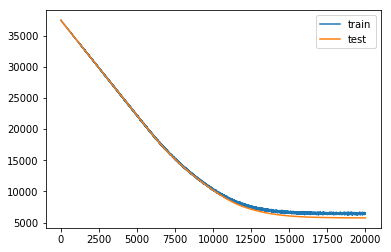

In [285]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [305]:
validateY

array([47599.121094, 47650.570313, 47541.320313, 47563.339844,
       47787.988281, 47842.230469, 47626.980469, 47398.699219,
       47416.96875 , 46459.171875, 46720.960938, 46154.199219,
       45767.570313, 45922.910156, 45871.039063, 46341.328125,
       46929.191406, 47975.050781, 47778.480469, 47252.539063,
       47731.839844, 48046.558594, 47672.070313, 47245.800781,
       47601.929688, 47909.269531, 48141.421875, 47944.769531,
       47596.601563, 48264.960938, 48014.398438, 47915.121094,
       47741.539063, 47701.449219, 47657.328125, 48106.121094,
       48492.609375, 48274.25    , 48418.398438, 48431.25    ,
       48093.53125 , 47805.441406, 48114.671875, 48007.199219,
       48009.28125 , 47303.308594, 46683.800781, 46694.808594,
       48050.25    , 48470.988281, 47390.660156, 45224.378906,
       44978.25    , 45306.480469, 45023.648438, 44901.570313,
       44919.691406, 44364.171875, 44838.761719, 45184.078125,
       45265.898438, 45357.851563, 45470.609375, 45372.

In [301]:
yhat

array([[38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],


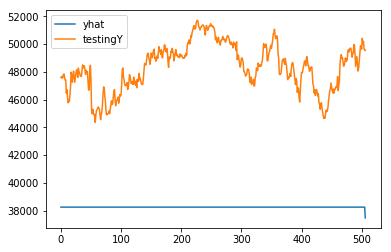

In [287]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [288]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 < prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 > prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

IndexError: index 507 is out of bounds for axis 0 with size 507

In [ ]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()